# Tanzanian Water Wells Status Prediction

By Melody Bass



![

## Introduction

The focus of this project is to build a classification model to predict the status of water wells in Tanzania.  The model was built from a dataset of the sources of water and status of the waterpoint using an iterative approach and can be found [here](./data/training_set_values.csv).  The dataset contains information on 54,000 waterpoints in Tanzania.  Following is a description of the features that we will include in our model:
* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

The first sections focus on investigating, cleaning, wrangling, and engineering some new features.  The next section contains models and evaluation of each, ultimately leading to us to select our best model for predicting waterpoint status.  Finally, I will make recommendations and provide insight on predicting the status of waterpoints making predictions from historical data.

## Business Problem

## Data Understanding

The dataset used for this analysis can be found [here](./data/training_set_values.csv).  It contains a wealth of information about waterpoints in Tanzania and the status of their operation.  The target variable has 3 different options for it's status:
* `functional` - the waterpoint is operational and there are no repairs needed
* `functional needs repair` - the waterpoint is operational, but needs repairs
* `non functional` - the waterpoint is not operational

Below I will import the dataset and start my investigation of relevant information it may contain.  Let's get started! 

In [131]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.dummy import DummyClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, label_binarize, MinMaxScaler

# Categorical Create Dummies
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Data Import Train Set
df_train_set = pd.read_csv('data/training_set_values.csv', index_col='id')
df_train_set

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [4]:
# Data import Training set labels
df_train_labels = pd.read_csv('data/training_set_labels.csv', index_col='id')
df_train_labels

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [5]:
#Merge datasets
df = pd.merge(df_train_labels, df_train_set, how = 'inner', on='id')

In [6]:
#Reset index
df.reset_index(inplace=True)
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [8]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [9]:
sum(df.duplicated())

0

In [10]:
for col in df.columns:
    print(df[col].value_counts())

2047     1
72310    1
49805    1
51852    1
62091    1
        ..
46396    1
36155    1
34106    1
38200    1
0        1
Name: id, Length: 59400, dtype: int64
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64
2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-19      1
2013-01-06      1
2011-09-28      1
2011-09-23      1
2011-09-06      1
Name: date_recorded, Length: 356, dtype: int64
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Drwssp                       1
Lotter

In [11]:
# Check null values
df.isna().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [12]:
# Check unique values for categorical data
obj_df = df.select_dtypes(include=['object'])
obj_df.nunique()

status_group                 3
date_recorded              356
funder                    1897
installer                 2145
wpt_name                 37400
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

### Initial Observations

#### Missing Values

__scheme_name__ has the most missing values, followed by __funder__, __installer__,  __public_meeting__, __scheme_management__,  and __permit__ with ~3,000 null values, and then __subvillage__ with 371 null values.  Several of these columns will be deleted as they appear to duplicate other columns, and I will investigate __installer__, __permit__, and __subvillage__ further.

#### Data types

* __wpt_name__, __subvillage__, __ward__, __scheme_name__, __installer__, __funder__, and __date_recorded__ are categorical features that have unique values in the thousands.  This will be a problem with dummy variables, will likely remove. 
* I will drop __recorded_by__ as it has the same value for all rows.
* __num_private__ is not defined on the DrivenData site, and it is not obvious what the feature indicates. 
* __id__ column will be dropped.
* __public_meeting__ and __permit__ are boolean.
* __construction_year__, __latitude__, __longitude__, __gps_height, __amount_tsh__, and __population__ all have thousands of rows of 0 entered.  I will drop rows for most of these variables that have 0 entered, and will have to investigate further for real data on some columns.  
 
#### Duplicate  and Similar Data
 
The following columns all contain duplicate or similar data, will remove features that will cause multicollinearity:
* __extraction_type__, __extraction_type_group__, and __extraction_type_class__
* __payment__ and __payment_type__
* __water_quality__ and __quality_group__ 
* __quanitity__ and __quantity_group__
* __source__ and __source_type__
* __waterpoint_type__ and __waterpoint_type_group__
* __region__ and __region_code__

## Data Cleaning

In this section, I will clean the dataset by removing similar and unnecessary columns and trim the dataset of remaining null values.  I will also further investigate whether some columns contain the same information if it was not immediately obvious.  There are several rows containing 0 enteries in some column information.  I will investigate whether I believe the data to be real instead of a placeholder.

### Drop duplicate and columns with similar information

I will keep __extraction_type_class__ and remove __extraction_type__ and __extraction_type_group__ as it's columns values appear to be the most relevant for the project. __scheme_name__ will be dropped for it's many null values.  Other columns will be removed at this point due to irrelavancy, duplicates, null values, and some others will have to be investigated after the first drop.

In [13]:
# Columns to be dropped
dropped_columns = ['extraction_type', 'extraction_type_group', 'payment', 'scheme_name', 'quality_group',
                   'quantity_group', 'source', 'waterpoint_type_group', 'recorded_by', 'num_private', 'id', 'subvillage',
                  'wpt_name', 'ward', 'funder', 'date_recorded', 'public_meeting', 'region_code', 'district_code', 'lga',
                  'scheme_management', 'source_class']

In [14]:
df = df.drop(dropped_columns, axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   installer              55745 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   population             59400 non-null  int64  
 9   permit                 56344 non-null  object 
 10  construction_year      59400 non-null  int64  
 11  extraction_type_class  59400 non-null  object 
 12  management             59400 non-null  object 
 13  management_group       59400 non-null  object 
 14  payment_type           59400 non-null  object 
 15  wa

### Dealing with null values

In [16]:
#Check for nulls
df.isna().sum()

status_group                0
amount_tsh                  0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
permit                   3056
construction_year           0
extraction_type_class       0
management                  0
management_group            0
payment_type                0
water_quality               0
quantity                    0
source_type                 0
waterpoint_type             0
dtype: int64

In [17]:
# Drop all remaining null values from our dataset
df = df.dropna()

In [18]:
#Check to see that it worked
df.isna().sum()

status_group             0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
permit                   0
construction_year        0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source_type              0
waterpoint_type          0
dtype: int64

In [19]:
# Convert boolean permit to integers
df['permit'] = df['permit'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55102 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55102 non-null  object 
 1   amount_tsh             55102 non-null  float64
 2   gps_height             55102 non-null  int64  
 3   installer              55102 non-null  object 
 4   longitude              55102 non-null  float64
 5   latitude               55102 non-null  float64
 6   basin                  55102 non-null  object 
 7   region                 55102 non-null  object 
 8   population             55102 non-null  int64  
 9   permit                 55102 non-null  int64  
 10  construction_year      55102 non-null  int64  
 11  extraction_type_class  55102 non-null  object 
 12  management             55102 non-null  object 
 13  management_group       55102 non-null  object 
 14  payment_type           55102 non-null  object 
 15  wa

### Investigate management and management_group

I need to investigate these 2 columns further to see if they contain similar information.

In [21]:
df['management'].value_counts()

vwc                 37416
wug                  6314
water board          2705
wua                  2307
private operator     1891
parastatal           1588
water authority       825
other                 733
company               656
unknown               491
other - school         99
trust                  77
Name: management, dtype: int64

In [22]:
df['management_group'].value_counts()

user-group    48742
commercial     3449
parastatal     1588
other           832
unknown         491
Name: management_group, dtype: int64

The most data is contained in the user-group subcategory of __management_group__.  I will groupby to investigate if the information is similar.

In [23]:
df.loc[df['management_group']=='user-group']['management'].value_counts()

vwc            37416
wug             6314
water board     2705
wua             2307
Name: management, dtype: int64

The data is identical to the data contained in the management column in the subcategory of 'user-group'.  I will drop __management_group__ from our features.

In [24]:
#Drop column
df = df.drop('management_group', axis=1)

In [25]:
#Check to see that it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55102 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           55102 non-null  object 
 1   amount_tsh             55102 non-null  float64
 2   gps_height             55102 non-null  int64  
 3   installer              55102 non-null  object 
 4   longitude              55102 non-null  float64
 5   latitude               55102 non-null  float64
 6   basin                  55102 non-null  object 
 7   region                 55102 non-null  object 
 8   population             55102 non-null  int64  
 9   permit                 55102 non-null  int64  
 10  construction_year      55102 non-null  int64  
 11  extraction_type_class  55102 non-null  object 
 12  management             55102 non-null  object 
 13  payment_type           55102 non-null  object 
 14  water_quality          55102 non-null  object 
 15  qu

In [26]:
for col in df.columns:
    print(df[col].value_counts())

functional                 29885
non functional             21381
functional needs repair     3836
Name: status_group, dtype: int64
0.0        37811
500.0       3071
50.0        2333
1000.0      1442
20.0        1427
           ...  
38000.0        1
1400.0         1
8500.0         1
6300.0         1
26.0           1
Name: amount_tsh, Length: 95, dtype: int64
 0       18310
-15         54
 303        51
-16         51
-13         50
         ...  
 2424        1
 2405        1
 2628        1
 2552        1
 2576        1
Name: gps_height, Length: 2426, dtype: int64
DWE                 17361
Government           1788
RWE                  1203
Commu                1060
DANIDA               1049
                    ...  
TANEDAPS Society        1
John gemuta co          1
DDSA                    1
Yasini                  1
MANGO TREE              1
Name: installer, Length: 2056, dtype: int64
0.000000     1793
32.984790       2
37.540901       2
37.328905       2
37.252194       2
        

After our first round of cleaning, there are several features we need to examine further:
* __status_group__ is an unbalanced target, may need to look into further during modeling.
* There are several columns with thousands of 0 entries - __amount_tsh__, __gps_height__, __longitude__, __latitude__, __population__, __construction_year__.

### Construction year

In [27]:
df['construction_year'].value_counts()

0       18392
2008     2568
2009     2490
2010     2427
2000     1565
2007     1557
2006     1447
2003     1276
2011     1211
2004     1107
2002     1064
1978     1027
2012     1025
2005      983
1995      978
1999      950
1985      941
1998      921
1984      777
1996      766
1982      741
1972      705
1994      703
1974      675
1990      666
1980      647
1992      632
1997      612
1993      595
2001      530
1988      520
1983      487
1975      437
1986      431
1976      411
1991      322
1989      316
1970      310
1987      297
1981      237
1977      199
1979      192
1973      183
2013      173
1971      145
1963       84
1967       83
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

In [28]:
# Finding mean and median without zero values
df.loc[df['construction_year']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year
count,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000,36710.000000
mean,471.881843,982.395015,36.015003,-6.358975,268.881694,0.717379,1996.888096
std,3074.841656,623.784917,2.609370,2.762486,542.812926,0.450280,12.452883
min,0.000000,-63.000000,29.607122,-11.649440,0.000000,0.000000,1960.000000
25%,0.000000,351.000000,34.671850,-8.855908,30.000000,0.000000,1987.000000
50%,0.000000,1116.500000,36.691907,-6.351197,150.000000,1.000000,2000.000000
75%,200.000000,1471.000000,37.896261,-3.731978,304.000000,1.000000,2008.000000
max,250000.000000,2770.000000,40.345193,-1.042375,30500.000000,1.000000,2013.000000


In [29]:
#Replace 0 values in construction_year with mean of data without 0s.
df['construction_year'].replace(to_replace = 0, value = 1996, inplace=True)

In [30]:
#Check to see if it worked
df['construction_year'].value_counts()

1996    19158
2008     2568
2009     2490
2010     2427
2000     1565
2007     1557
2006     1447
2003     1276
2011     1211
2004     1107
2002     1064
1978     1027
2012     1025
2005      983
1995      978
1999      950
1985      941
1998      921
1984      777
1982      741
1972      705
1994      703
1974      675
1990      666
1980      647
1992      632
1997      612
1993      595
2001      530
1988      520
1983      487
1975      437
1986      431
1976      411
1991      322
1989      316
1970      310
1987      297
1981      237
1977      199
1979      192
1973      183
2013      173
1971      145
1963       84
1967       83
1968       68
1969       59
1960       45
1964       40
1962       29
1961       20
1965       19
1966       17
Name: construction_year, dtype: int64

### Latitude/Longitude zeros

In [31]:
df.longitude.value_counts()

0.000000     1793
32.984790       2
37.540901       2
37.328905       2
37.252194       2
             ... 
39.002868       1
37.095964       1
36.658462       1
33.116994       1
38.592731       1
Name: longitude, Length: 53261, dtype: int64

In [32]:
# Investigate longitude entries that are 0
df.loc[df['longitude'] == 0]

,status_group,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source_type,waterpoint_type
21,functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,unknown,unknown,shallow well,hand pump
53,non functional,0.0,0,Government,0.0,-2.000000e-08,Lake Victoria,Mwanza,0,1,1996,submersible,vwc,unknown,unknown,dry,borehole,communal standpipe multiple
168,functional,0.0,0,WVT,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe
177,non functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,other,wug,unknown,soft,enough,shallow well,other
253,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Mwanza,0,1,1996,handpump,vwc,never pay,soft,insufficient,shallow well,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,other,soft,enough,shallow well,hand pump
59208,functional,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,soft,enough,shallow well,hand pump
59295,functional needs repair,0.0,0,DWE,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,never pay,soft,enough,shallow well,hand pump
59324,functional,0.0,0,World Vision,0.0,-2.000000e-08,Lake Victoria,Shinyanga,0,0,1996,handpump,wug,unknown,soft,enough,shallow well,hand pump


The 0s that are entered into the longitude column are also 0s in gps_height and -2e8 for latitude columns.  I will drop these values from the dataset.

In [33]:
# Drop rows with 0 entered in longitude column
df = df.loc[df['longitude'] != 0]

In [34]:
# Check to see if it worked
df.describe()

,amount_tsh,gps_height,longitude,latitude,population,permit,construction_year
count,53309.000000,53309.000000,53309.000000,53309.000000,53309.000000,53309.000000,53309.000000
mean,337.580181,692.509670,35.186804,-5.849440,188.814515,0.702508,1996.611567
std,2714.547122,691.264883,2.670974,2.806529,474.147131,0.457159,10.341978
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,0.000000,1960.000000
25%,0.000000,0.000000,33.167340,-8.441371,0.000000,0.000000,1995.000000
50%,0.000000,438.000000,35.295878,-5.144420,45.000000,1.000000,1996.000000
75%,40.000000,1322.000000,37.353028,-3.359390,240.000000,1.000000,2005.000000
max,250000.000000,2770.000000,40.345193,-0.998464,30500.000000,1.000000,2013.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53309 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           53309 non-null  object 
 1   amount_tsh             53309 non-null  float64
 2   gps_height             53309 non-null  int64  
 3   installer              53309 non-null  object 
 4   longitude              53309 non-null  float64
 5   latitude               53309 non-null  float64
 6   basin                  53309 non-null  object 
 7   region                 53309 non-null  object 
 8   population             53309 non-null  int64  
 9   permit                 53309 non-null  int64  
 10  construction_year      53309 non-null  int64  
 11  extraction_type_class  53309 non-null  object 
 12  management             53309 non-null  object 
 13  payment_type           53309 non-null  object 
 14  water_quality          53309 non-null  object 
 15  qu

Looks like it all worked!  I believe the __amount_tsh__ and __population__ 0 values are real so I will leave all data as is for vanilla models.

### Installer - Several different spellings for same installer

In [36]:
#Check unique values after inital cleaning
df.nunique()

status_group                 3
amount_tsh                  95
gps_height                2426
installer                 2024
longitude                53260
latitude                 53262
basin                        9
region                      21
population                1026
permit                       2
construction_year           54
extraction_type_class        7
management                  12
payment_type                 7
water_quality                8
quantity                     5
source_type                  7
waterpoint_type              7
dtype: int64

Upon checking the unique values for our categorical variables after trimming the dataset, installer still has 2024 unique entries, which will be a problem when we create dummies.  We will need to cut down the amount of unique entries to not overload our model.

In [37]:
#Investigate 2024 unique values for installer
pd.set_option("display.max_rows", None)
df['installer'].value_counts()

DWE                               16214
Government                         1633
RWE                                1178
Commu                              1060
DANIDA                             1049
KKKT                                894
0                                   777
TCRS                                702
Hesawa                              647
Central government                  619
CES                                 610
DANID                               552
District Council                    546
Community                           538
HESAWA                              528
World vision                        408
LGA                                 408
WEDECO                              397
District council                    391
Gover                               383
TASAF                               371
TWESA                               316
AMREF                               313
WU                                  301
Dmdd                                286


There are several entries with typos and different variations of the same installer. I will attempt to fix some of the clerical errors and narrow down the amount of unique identifiers we will use for our model.

In [38]:
# Correct variations and misspellings in the installer column
df['installer'] = df['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT','Central govt', 'Centr', 'Centra govt', 
                                          'Tanzanian Government', 'Tanzania'), value = 'Central Government')

df['installer'] = df['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'District  Council'), 
                                          value = 'District Council')

df['installer'] = df['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Village Council', 'Villagerd', 
                                          'Villager', 'Village Technician', 'Village Office', 'VILLAGE COUNCIL',
                                          'Village community members', 'VILLAG', 'Village Government', 
                                          'Village govt', 'VILLAGERS', 'Village  Council'), value ='Villagers')

df['installer'] = df['installer'].replace(to_replace = ('District Water Department', 'District water depar',
                                          'Distric Water Department'), value ='District water department')

df['installer'] = df['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER'), 
                                          value ='Fini Water')

df['installer'] = df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Ch') , value ='RC Church')

df['installer'] = df['installer'].replace(to_replace = ('world vision', 'World Division', 'World vision', 
                                          'WORLD VISION', 'World Vission'), value ='World Vision')

df['installer'] = df['installer'].replace(to_replace = ('Unisef','Unicef'), value ='UNICEF')

df['installer'] = df['installer'].replace(to_replace = 'DANID', value ='DANIDA')

df['installer'] = df['installer'].replace(to_replace =('Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                          'Adra /Community', 'Communit', 'Adra/Community', 'Adra/ Community'), 
                                          value ='Community')

df['installer'] = df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN',
                                          'Gover', 'Gove', 'Governme', 'Governmen'), value ='Government')

df['installer'] = df['installer'].replace(to_replace = ('Hesawa', 'hesawa'), value ='HESAWA')

df['installer'] = df['installer'].replace(to_replace = ('JAICA', 'JICA', 'Jica', 'Jeica', 'JAICA CO'), 
                                          value ='Jaica')

df['installer'] = df['installer'].replace(to_replace = ('KKKT _ Konde and DWE', 'KKT', 'KKKT Church', 'KkKT'), 
                                          value ='KKKT')

df['installer'] = df['installer'].replace(to_replace = '0', value ='Unknown')

In [39]:
df['installer'].value_counts().head(20)

DWE                   16214
Government             2468
Community              1791
DANIDA                 1601
HESAWA                 1180
RWE                    1178
District Council       1173
Central Government     1115
KKKT                   1102
Fini Water              952
Unknown                 780
TCRS                    702
World Vision            660
CES                     610
RC Church               484
Villagers               482
LGA                     408
WEDECO                  397
TASAF                   371
Jaica                   358
Name: installer, dtype: int64

In [40]:
# Make df for top 20 installer for visualization
installer_df = df.loc[(df['installer'] == 'DWE') | (df['installer'] == 'Government') | (df['installer'] == 'Community') 
                  | (df['installer'] == 'DANIDA') | (df['installer'] == 'RWE') | (df['installer'] == 'District Council') 
                  | (df['installer'] == 'Central Government') | (df['installer'] == 'KKKT') 
                  | (df['installer'] == 'Fini Water') | (df['installer'] == 'Unknown') | (df['installer'] == 'TCRS') 
                  | (df['installer'] == 'World Vision') | (df['installer'] == 'CES') | (df['installer'] == 'RC Church') 
                  | (df['installer'] == 'Villagers') | (df['installer'] == 'LGA') | (df['installer'] == 'WEDECO') 
                  | (df['installer'] == 'TASAF') | (df['installer'] == 'Jaica') | (df['installer'] == 'HESAWA')]
                  

### Reduce categories for installer

In [41]:
# Keep only top 20 installers as unique values
installer_20 = df.installer.value_counts(normalize=True).head(20).index.tolist()  


df['installer'] = [type_ if type_ in installer_20
                      else "OTHER" for type_ in df['installer']]

In [42]:
df.installer.value_counts()

OTHER                 19283
DWE                   16214
Government             2468
Community              1791
DANIDA                 1601
HESAWA                 1180
RWE                    1178
District Council       1173
Central Government     1115
KKKT                   1102
Fini Water              952
Unknown                 780
TCRS                    702
World Vision            660
CES                     610
RC Church               484
Villagers               482
LGA                     408
WEDECO                  397
TASAF                   371
Jaica                   358
Name: installer, dtype: int64

## Modified Features Exploration

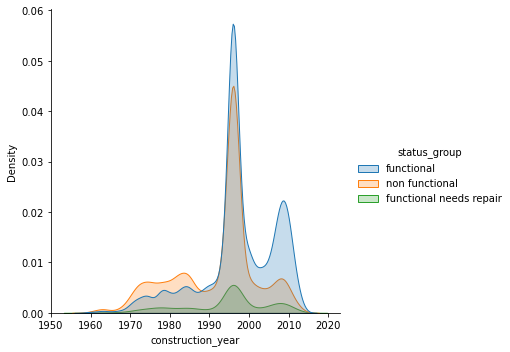

In [43]:
sns.displot(data=installer_df, x='construction_year', hue='status_group', kind='kde', fill=True);

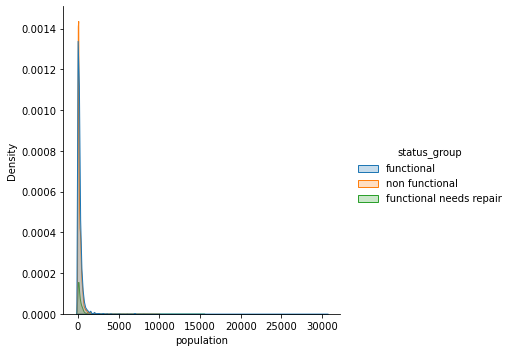

In [44]:
sns.displot(data=df, x='population', hue='status_group', kind='kde', fill=True);

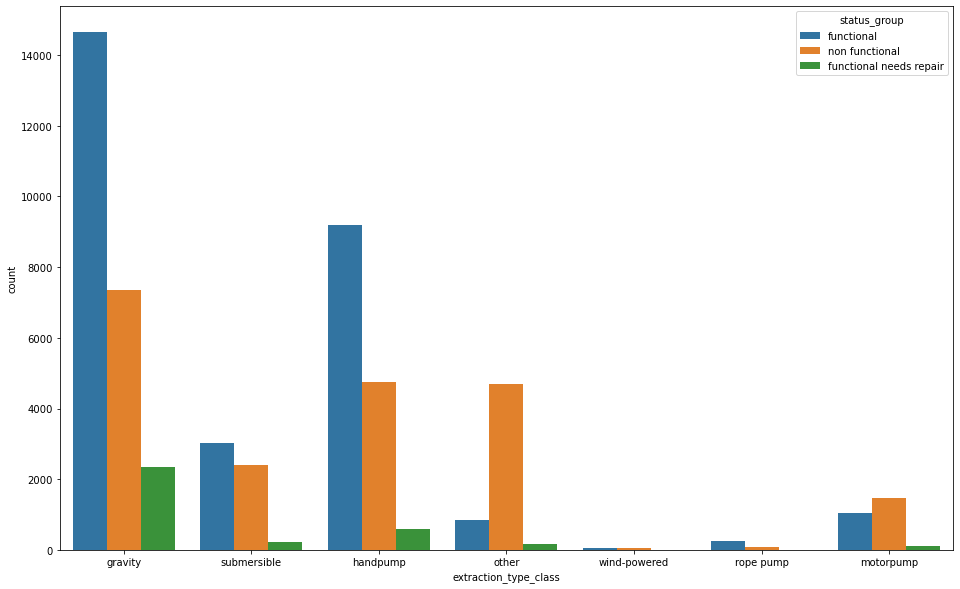

In [45]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='extraction_type_class', hue='status_group', data=df)

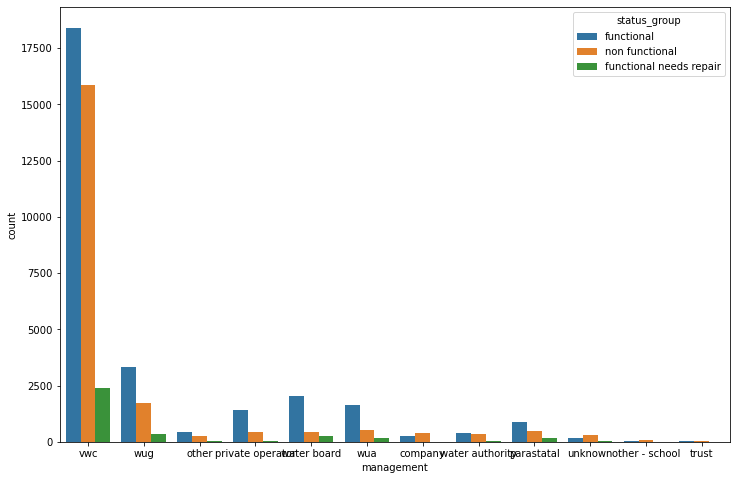

In [46]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='management', hue='status_group', data=df)

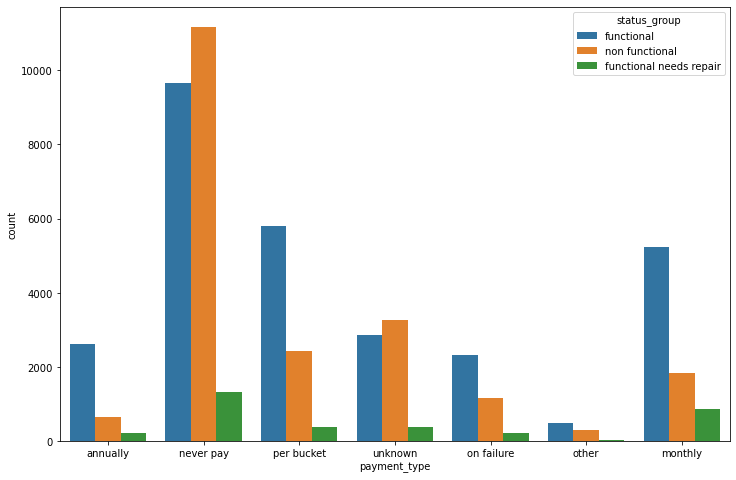

In [47]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue='status_group', data=df)

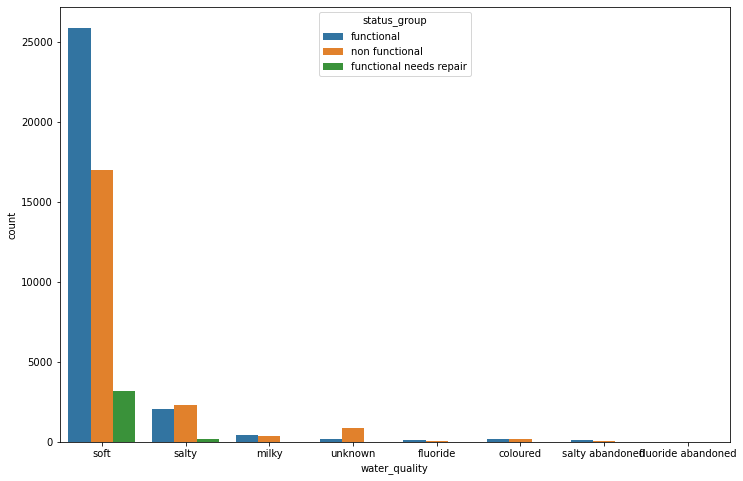

In [48]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='water_quality', hue='status_group', data=df)

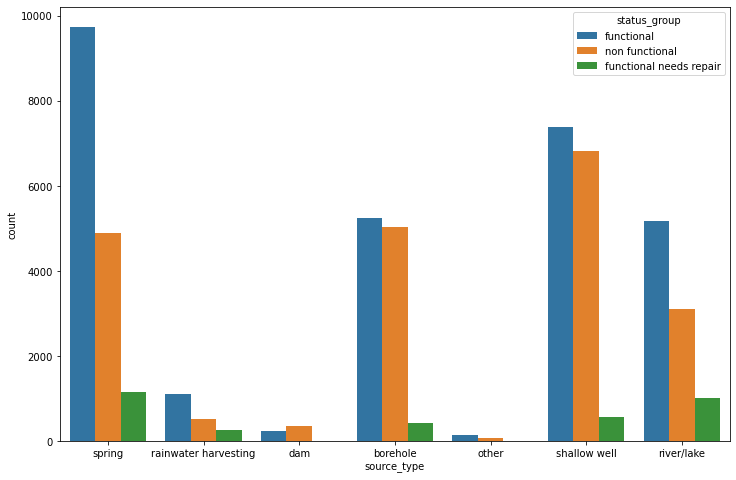

In [49]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='source_type', hue='status_group', data=df)

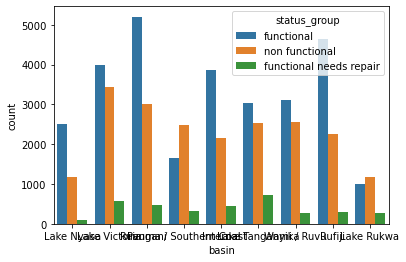

In [50]:
ax = sns.countplot(x='basin', hue='status_group', data=df)

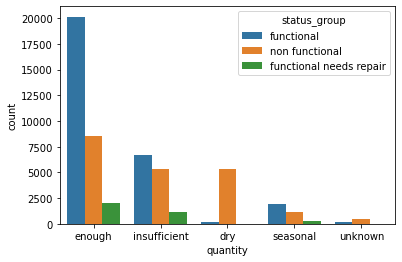

In [51]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

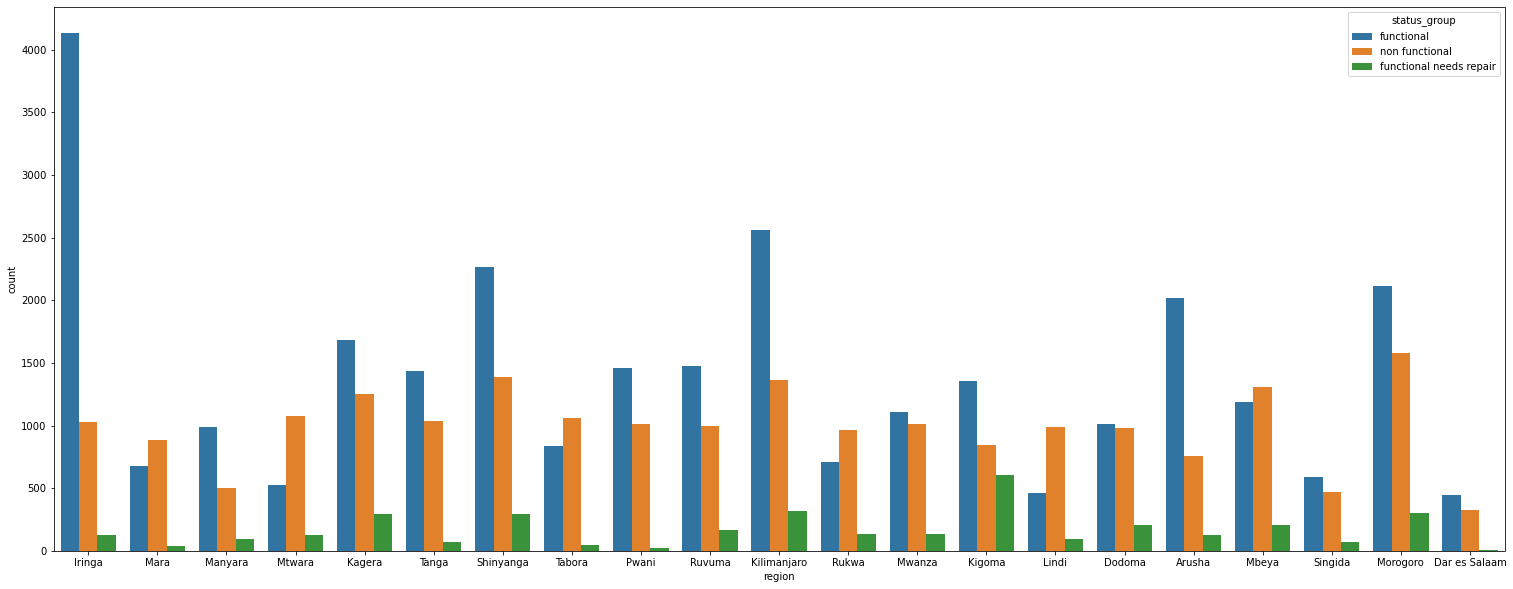

In [52]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='region', hue="status_group", data=df)

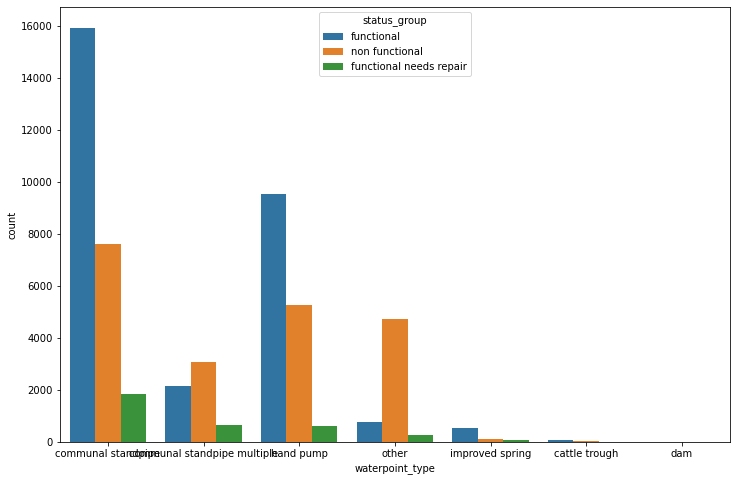

In [53]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='waterpoint_type', hue='status_group', data=df)

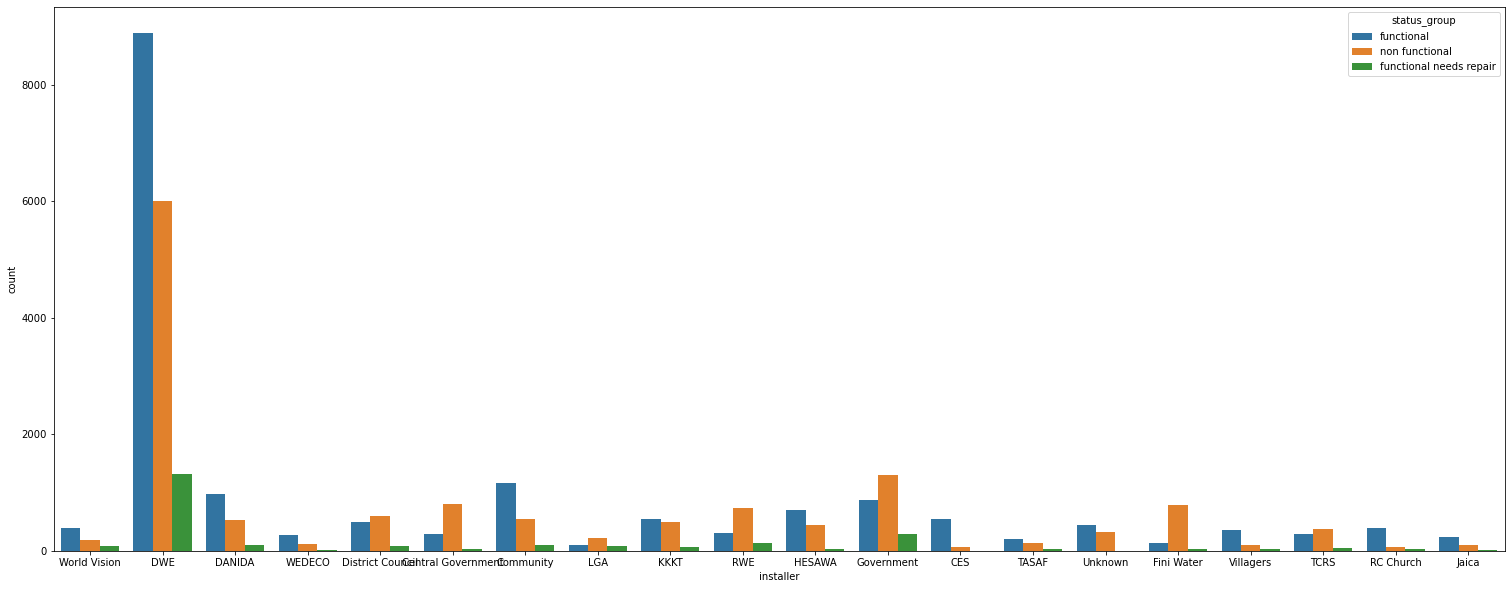

In [54]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=installer_df)

### Functioning wells map

In [55]:
import folium

In [56]:
df_f = df[df['status_group'] == 'functional']
df_nf = df[df['status_group'] == 'non functional']
df_fnr = df[df['status_group'] == 'functional needs repair']

In [149]:
lat_long_f = [(df_f['latitude'][i], df_f['longitude'][i]) for i in range(len(df_f['longitude']))]
lat_long_nf = [(df_nf['latitude'][i], df_nf['longitude'][i]) for i in range(len(df_nf['longitude']))]
lat_long_fnr = [(df_fnr['latitude'][i], df_fnr['longitude'][i]) for i in range(len(df_fnr['longitude']))]

KeyError: 3

In [62]:
#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
data.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save('html_map_output/simple_dot_plot.html')

this_map

In [147]:
mapit = folium.Map(location=[np.mean(df_f['latitude']), np.mean(df_f['longitude'])], zoom_start=6)

for coord in lat_long_nf[::5]:
    folium.CircleMarker(location=[df_nf['latitude'], df_nf['longitude']], opacity=0.7, color='red', radius=1).add_to(mapit)
for coord in lat_long_f[::5]:
    folium.CircleMarker(location=[df_f['latitude'], df_f['longitude']], opacity=0.7, color='blue', radius=1).add_to(mapit)
for coord in lat_long_fnr[::5]:
    folium.CircleMarker(location=[df_fnr['latitude'], df_fnr['longitude']], opacity=0.7, color='green', radius=1).add_to(mapit)  

mapit

ValueError: Location should consist of two numerical values, but 3       -11.155298
6        -3.766365
7        -4.226198
8        -5.146712
16       -9.106185
17       -9.085515
28       -3.263526
35       -3.293003
36       -9.638520
39       -3.894561
45       -3.838998
51       -8.571661
55       -3.356538
57       -3.339812
61       -4.647289
63       -3.350026
67       -1.285780
68       -8.889594
69       -4.471809
70       -8.934950
73       -1.888020
78       -4.834836
84       -1.609691
85       -2.378772
87       -2.026469
88       -6.638696
91      -10.476566
92       -6.557903
94       -1.194390
96       -4.236378
99       -3.566020
100      -4.994237
107      -3.025106
108      -7.710549
110      -3.330743
114      -6.372797
115      -1.080485
117      -2.063494
119      -5.592345
120      -9.344921
122      -2.770169
125      -5.067269
128      -3.779393
129      -2.690442
136      -9.095043
137     -10.133632
140      -9.596084
142      -5.418031
144      -6.862000
148     -10.027721
152      -6.988748
153      -1.720685
155     -10.915576
161      -8.688751
167      -5.100701
171      -7.806376
174      -6.642609
179      -5.172277
183      -8.689387
186      -8.436398
193      -6.608731
197      -3.084655
198      -2.152353
208      -6.636412
210      -8.917165
211      -9.527480
212      -5.569488
215      -9.611654
222      -3.349854
224      -6.704975
231      -2.073638
233     -10.992804
234      -4.502684
235      -8.959208
236      -4.201366
239      -5.125519
240      -6.095388
241      -2.476370
242      -6.031137
243      -4.954952
249      -7.368293
252      -3.264963
255      -3.911655
257     -10.372438
259      -7.509218
260      -1.295240
261      -5.855305
262      -6.321180
263      -3.751391
265      -3.392858
271      -5.630633
275     -11.166762
277      -4.754611
283      -3.330789
286      -3.221739
289      -3.411977
290      -6.895590
291      -4.262444
296     -10.846660
297      -1.849874
298      -9.247810
299     -10.876661
303      -9.575247
305      -3.152555
310     -10.531045
311      -8.874812
312      -9.632860
313      -1.289055
314      -7.165410
315      -3.598787
317     -10.320959
318      -5.108219
325      -7.972010
329      -5.929901
330      -9.940148
336      -5.634046
337      -9.212647
342      -6.233394
345      -3.314453
347      -3.146513
356      -3.527256
358      -8.951061
360      -6.220157
361      -5.844639
364      -4.503713
374      -9.061377
375      -8.141222
386      -7.458257
387      -4.271405
391      -8.863043
393      -6.902548
394      -3.261305
397     -10.667092
398     -10.991834
400     -10.925890
403      -9.446025
404      -2.996585
410      -7.366940
411      -8.667173
412      -7.132896
415      -9.721475
417      -6.938013
422      -6.720418
424      -7.759924
425      -3.245168
427      -1.212314
428      -6.973206
431      -3.809319
435      -3.449358
437      -3.607916
438      -7.658263
440      -9.611283
441      -9.991094
450     -10.903084
453      -3.455047
456      -8.088466
461      -6.408139
466     -11.093051
468      -9.520342
469      -5.591650
471      -6.337430
475      -9.495545
478      -3.111077
483      -3.358115
485      -7.101357
486      -3.597275
487      -6.129626
489      -9.506480
494      -3.699318
495     -10.796995
498     -10.808674
499      -6.553264
502      -3.247513
503      -7.096279
504      -3.244633
505      -3.642015
506      -1.485249
508      -7.665141
510     -10.634766
515      -5.270952
523     -10.926111
525      -8.836057
526     -10.294306
532      -6.560582
537      -6.902250
538      -8.986199
539      -8.787415
540      -6.728258
545      -3.250221
547      -7.351138
549      -8.787363
555      -6.842173
563      -3.277968
564      -9.088171
565      -5.993192
570     -10.901914
574      -6.781314
575     -10.804092
576      -7.319786
577      -9.729017
578      -7.271084
580      -4.100078
584      -3.234591
585      -3.569927
586      -7.836698
587      -4.279300
589      -3.487229
590      -1.929164
592      -1.382989
594      -4.349436
602      -6.146142
603      -3.159374
605      -7.752889
608      -5.257279
609      -8.939506
611      -3.550493
616      -1.490752
617      -9.516261
626     -10.117453
629      -5.115387
632     -10.082495
633     -10.325065
635      -3.288400
636      -6.901908
638     -10.792622
640      -4.572323
644      -6.516204
645      -4.134977
648      -6.383478
656      -4.259686
658     -10.749991
660      -9.899206
662     -10.160585
664      -3.321070
668      -4.263736
671      -8.879889
674      -5.307213
681     -10.702365
685      -7.056617
690      -3.825468
693      -3.441661
696      -5.679437
698      -8.952626
702      -6.890041
706     -10.913883
708      -3.156964
710      -7.041046
714      -2.530751
715      -3.613217
716      -3.281487
718     -10.029702
722     -10.590527
723      -3.638983
724      -3.454458
725      -9.227873
730     -10.546667
731      -8.373836
736      -3.733956
744      -4.873773
745      -8.390235
749      -3.246954
750      -6.589666
757      -3.982670
758     -10.795299
762      -8.097199
766      -5.878311
767      -8.780690
772      -8.154298
776      -2.757556
778      -6.135398
779      -9.725771
780      -5.417388
787      -8.855928
789      -5.564196
793      -7.538176
794      -3.650352
800      -6.977740
801      -5.405154
803     -10.861311
806      -3.369603
808      -9.096642
809      -1.162528
810     -10.561089
811     -10.272221
812      -7.521903
814      -8.409474
815      -6.862066
816      -6.664972
818      -5.522756
822      -6.097213
824      -1.277618
826      -9.547190
827      -2.513834
828      -6.499620
831     -11.044231
835      -3.324297
838      -3.504327
842      -2.995551
845      -3.369751
850      -7.510188
852      -5.302266
854      -5.250544
860      -5.420823
861      -1.784045
862     -10.703494
863      -5.595418
864      -3.064887
868      -4.414366
872      -1.724577
879      -2.505189
883      -8.911885
884      -6.783582
889     -10.850718
894     -10.404717
895      -6.576130
900     -10.625667
902      -3.286307
905      -4.417648
914     -10.554417
915      -1.607301
918      -4.263218
920     -10.796877
923      -2.730588
924      -6.555185
929      -1.797559
932      -4.550344
933      -9.171215
937     -11.330984
940      -2.009796
941      -2.523600
943      -4.228499
944      -5.271671
948      -8.526634
949      -7.190242
952      -5.349193
955      -3.803178
956      -3.221963
958      -9.272657
961      -2.966909
963      -5.054747
964      -9.102639
968     -11.143343
973      -1.461039
974      -3.548215
975      -7.910656
980      -9.591415
983      -3.316957
987      -1.729022
994      -4.625360
996      -4.248860
997      -8.964035
1001     -4.049685
1008     -3.978509
1016     -8.092875
1017    -10.699161
1018     -4.464609
1019     -3.281536
1024     -8.426193
1026     -7.477334
1028     -3.244474
1029     -4.537170
1031     -8.294257
1032     -1.251827
1033     -4.882837
1034     -3.297257
1035     -3.299915
1036     -3.146873
1044     -6.899170
1047     -3.812231
1050     -5.796263
1051     -1.121984
1055     -2.535302
1057     -8.632933
1059     -3.253344
1060     -7.332491
1069    -10.965711
1072     -7.591554
1074     -2.044983
1080     -7.750499
1081     -7.565606
1083    -11.091216
1084     -1.770166
1086     -8.168409
1087     -4.900831
1089     -7.499133
1091     -8.549658
1093     -7.141831
1096     -6.130916
1097     -6.279125
1102     -2.478662
1106     -9.532080
1107     -4.976764
1123    -11.174850
1125     -9.878845
1126     -4.857368
1129    -10.204770
1138     -4.315476
1139    -10.329293
1144     -8.149305
1146     -4.762459
1149     -5.802180
1150     -5.714014
1151     -1.439924
1158     -1.216423
1161     -6.803188
1171     -3.845437
1174     -3.326179
1175     -6.311565
1176     -4.880437
1178     -3.476789
1179     -5.108290
1180     -1.530705
1181     -3.269837
1182     -9.943002
1183     -2.642597
1185     -4.522411
1186     -3.573512
1188     -2.900688
1189    -10.572385
1193     -3.149066
1194     -2.149245
1195     -1.350616
1198     -6.443172
1204     -7.629243
1205     -7.944274
1206     -6.690796
1207     -3.286361
1209    -10.463625
1213    -10.987504
1214     -8.279103
1215    -10.617964
1218     -4.918004
1219     -8.690185
1221     -1.834310
1222    -10.743785
1226     -8.483393
1228     -9.619763
1229     -6.917138
1231     -3.301237
1233     -3.258892
1235    -10.389816
1236     -5.948728
1237    -11.164013
1238     -3.317508
1239     -5.746971
1245     -2.070074
1246     -3.290778
1253     -2.561914
1263     -6.087341
1264     -3.318133
1266     -4.458745
1268     -9.485595
1272    -10.877220
1273     -6.140398
1274    -10.545700
1275     -3.127737
1277     -5.706788
1286     -3.324539
1287     -3.658704
1292     -3.109928
1293     -6.246896
1294     -2.092587
1295    -10.760760
1299     -5.227888
1300     -5.832368
1301     -4.857985
1304     -8.071894
1310    -10.536056
1318     -3.151533
1320     -2.850434
1321     -2.681878
1323     -7.911761
1325     -8.469356
1327     -4.496772
1329     -5.861498
1336     -6.906581
1337     -9.666579
1339     -6.781456
1344     -5.784053
1345     -3.255124
1347     -6.981656
1350     -8.591090
1351     -6.084782
1354     -6.263172
1361     -3.616229
1363     -1.743898
1368     -8.929315
1372     -1.906929
1374     -9.094795
1379     -9.128250
1384    -10.862096
1394     -6.287559
1399    -10.818232
1407     -9.800890
1408     -3.609757
1417     -6.252821
1418     -8.542532
1427     -2.015908
1428     -1.634489
1430    -11.347410
1432     -2.151813
1435    -11.227759
1438     -7.311881
1440     -6.995456
1442     -6.527814
1443     -5.894536
1445     -8.914890
1446     -3.516568
1447    -10.665629
1451     -8.937150
1453     -6.750922
1457     -4.739595
1458     -2.664847
1459     -1.401503
1460     -7.237274
1461    -11.117916
1462     -3.475419
1466     -3.171392
1469     -3.809502
1474    -10.742649
1475    -10.562810
1476     -3.646709
1480     -5.345212
1484     -7.445232
1486     -6.562013
1490     -6.781272
1491    -10.186594
1492     -2.693612
1493     -3.358224
1494     -9.272156
1495     -3.512463
1504     -7.144544
1505     -8.085838
1507     -2.055778
1510     -3.032826
1516     -6.078504
1518     -4.077079
1520     -2.123621
1521     -8.888000
1527     -3.355011
1533     -3.252582
1534     -8.638300
1535     -5.173053
1539    -11.067845
1540     -1.782549
1543     -9.087130
1544     -8.572629
1545     -3.611025
1548    -10.911234
1550     -3.217065
1552     -8.102161
1555     -3.309784
1556     -7.434930
1557    -10.549606
1560    -10.756705
1563     -3.246388
1564     -2.552665
1566     -4.077582
1567     -8.579806
1570     -7.770491
1585     -6.636669
1586     -3.269799
1591     -5.753816
1593     -2.955178
1594     -8.860222
1595     -6.488105
1597     -3.457108
1599     -2.065751
1602     -1.575862
1603     -6.212625
1604    -10.535683
1605    -10.861969
1607    -10.552016
1613     -6.208361
1619     -3.666473
1622     -3.393292
1625     -3.324245
1627     -7.736454
1631     -4.978114
1632     -2.717474
1638     -5.830050
1639    -10.630806
1641    -10.706916
1642     -3.097608
1643     -4.376418
1650     -3.344916
1651     -8.653196
1654     -5.814887
1662     -8.387673
1664     -4.967635
1665    -10.683525
1670     -9.013066
1675     -6.934974
1676     -6.791027
1680     -5.077071
1681     -6.119778
1683    -10.212224
1688     -7.440749
1689     -9.206388
1691     -7.700258
1692    -10.556462
1693    -10.832452
1694     -7.628747
1695     -3.201823
1707     -3.362398
1713    -10.732828
1716     -6.486934
1719     -7.320802
1723     -9.320132
1726     -8.477248
1727     -1.443265
1728     -4.511947
1733     -3.036546
1739     -1.505974
1743     -3.761348
1744     -3.210840
1747     -4.427919
1748     -9.544645
1749     -1.744747
1755     -1.368639
1757    -10.492332
1760     -3.517337
1761     -3.780333
1762     -1.352296
1766     -9.087796
1768     -4.826817
1777     -6.178491
1778     -2.731359
1782     -4.647463
1785     -5.602424
1786     -1.274608
1787    -10.547241
1788     -4.138691
1790     -2.735106
1791     -3.615974
1794     -3.542043
1795     -8.547837
1796     -5.417522
1800     -3.741697
1808     -7.772091
1812     -6.064716
1813     -5.614888
1814     -4.671014
1816     -9.506875
1818     -4.820506
1824     -3.468669
1837     -4.860451
1840     -3.232701
1841     -3.438713
1842     -5.801417
1843     -9.169264
1846     -8.513644
1848     -6.417067
1853    -10.472197
1856     -9.482449
1858     -3.129865
1860     -8.107859
1866     -3.376461
1870     -1.302225
1872     -2.444741
1877     -4.260973
1878     -3.493928
1881     -3.182028
1882     -2.754455
1883    -10.583864
1885     -8.953719
1887     -5.187028
1888     -1.965746
1889     -6.523154
1890     -6.451864
1891    -10.796375
1892     -8.517292
1893     -3.579186
1900     -2.545377
1902     -1.926797
1911     -4.852295
1912     -8.780131
1913     -3.276106
1914     -6.587846
1916     -3.560722
1921     -9.936231
1926     -3.389362
1929    -10.547610
1932     -4.849286
1935     -5.762366
1944     -2.531213
1949     -5.988725
1951     -5.804785
1955     -6.740693
1956    -10.930065
1962     -8.527564
1964     -4.123457
1968     -4.245070
1975    -10.311576
1978     -5.743842
1979     -3.272103
1980     -4.856979
1982     -9.526797
1983     -3.084169
1986     -4.601950
1994     -5.424145
1997     -9.678841
2000     -9.941074
2003     -3.275186
2004     -8.926502
2008     -3.871123
2009     -3.631517
2010     -6.220203
2011     -5.361439
2013     -6.401475
2017     -9.430412
2018     -9.063719
2019    -10.750080
2020     -7.023162
2022     -5.832384
2027     -1.941709
2030     -4.575663
2032     -1.657700
2034     -2.444996
2037     -3.363819
2040     -4.848760
2044     -8.474417
2046     -5.933700
2047     -4.209663
2049     -4.723087
2053     -4.478604
2057     -4.476301
2061     -4.879992
2065     -4.655578
2066     -6.460641
2069    -10.801342
2074     -3.738273
2084     -3.062183
2085     -3.755383
2086     -1.112799
2087     -6.014463
2090     -9.073916
2091    -10.217925
2092    -10.682506
2094     -5.735600
2095    -10.730865
2096     -2.787150
2097     -8.102629
2098     -6.021030
2099    -10.483661
2101     -7.404215
2102     -8.353303
2103     -4.888829
2107     -9.646130
2108    -10.682247
2110     -8.884963
2128     -7.035014
2130    -10.038673
2131    -10.314058
2137     -6.591455
2140     -6.377277
2142     -3.834137
2143     -7.068749
2144     -4.287227
2147     -3.344741
2148    -11.467658
2150     -4.245252
2151    -10.146368
2155     -8.813633
2158     -3.613179
2161     -2.532266
2164     -3.854020
2165     -4.564989
2170     -3.863823
2171     -8.585036
2173    -10.832633
2179     -2.110581
2181     -2.566844
2182     -6.428248
2184     -2.017429
2187     -6.378394
2189     -9.665828
2196    -10.789487
2200     -1.247248
2202     -4.559699
2204     -5.099856
2205     -1.928628
2208     -8.519241
2209    -10.632636
2213     -3.101439
2214     -8.143620
2215     -7.460277
2218     -5.530607
2219    -10.934609
2223     -5.645421
2232     -1.689482
2240     -2.820344
2245     -2.520859
2246     -5.321683
2248     -9.068477
2254     -4.341885
2256     -6.703779
2257     -6.484845
2259     -6.032361
2260     -4.196307
2265     -8.058217
2266     -3.180727
2270     -5.879501
2271     -1.401962
2272     -1.722277
2273     -6.244807
2274     -3.774498
2276     -8.987188
2277     -2.570656
2278     -6.579066
2286     -6.160798
2293     -1.667411
2294     -2.525226
2297     -5.440722
2301     -4.150940
2303     -1.439312
2305     -2.561691
2307     -3.184001
2308     -6.800325
2310     -2.089083
2313     -4.961005
2314     -2.062944
2318     -7.596328
2322    -10.656321
2326     -1.670521
2328    -10.516397
2333     -1.616889
2336     -5.938908
2338     -4.080682
2339     -9.449419
2341     -9.027059
2343     -6.099289
2345     -1.978674
2346     -8.956331
2347     -6.386237
2354     -5.627173
2355     -4.320775
2356     -2.683011
2357     -1.971101
2359     -1.733987
2360     -1.995758
2365    -10.894565
2367     -5.266330
2377     -8.020204
2378     -2.641980
2379     -5.516591
2381     -8.897420
2383     -2.452730
2384     -8.499541
2386     -8.483028
2387     -9.449007
2393     -8.951191
2395     -4.655737
2396     -3.321760
2397     -6.182755
2399     -1.901619
2401     -2.489378
2403    -10.404037
2409     -9.550991
2410     -3.204478
2413     -6.902840
2415     -4.993480
2417     -4.383089
2418     -5.771072
2419     -4.956414
2420     -9.195111
2421     -9.206006
2428     -8.623345
2431     -2.515600
2436     -5.902202
2439     -8.836361
2444    -10.587059
2445     -3.101378
2447    -11.074819
2453     -3.230020
2457     -2.494353
2458     -3.006413
2459     -3.452889
2460    -11.000771
2474     -3.316690
2476     -5.267025
2478     -1.978284
2480     -6.379896
2482     -7.705950
2484     -2.534203
2487     -6.214758
2488     -1.253194
2489     -3.596071
2490     -3.209243
2491     -1.278083
2499     -6.410970
2502    -10.201845
2505     -4.943113
2508     -4.538922
2512     -2.768077
2514     -7.133759
2515     -4.849140
2518     -2.004418
2525    -10.463274
2527    -10.188706
2530     -2.052968
2531     -8.407912
2535     -6.830873
2543     -9.474157
2547     -7.988110
2548     -6.815041
2553     -3.365363
2556     -5.048815
2557    -10.324677
2558     -1.424511
2560    -10.624823
2563     -3.818209
2573     -5.359190
2574     -3.528009
2579     -9.618293
2580     -8.983550
2585     -8.361169
2589    -10.628197
2594     -2.569054
2596     -3.617556
2598     -4.112789
2599     -4.269893
2608     -3.334722
2610     -5.174808
2612    -10.641868
2616     -1.377930
2618    -10.526544
2619     -9.498146
2621     -3.037959
2624     -3.225549
2628     -7.001847
2630     -4.637698
2636    -10.832896
2638     -5.664773
2640    -10.519551
2646     -7.040599
2647     -9.812062
2648     -9.600601
2650     -3.926304
2652     -4.689027
2653     -5.250205
2654     -3.248299
2660    -10.799447
2665    -10.815803
2666     -8.531563
2667     -8.767072
2673     -6.324191
2674     -3.645950
2679     -3.336203
2681     -6.085503
2682     -3.186039
2683     -5.251042
2687     -3.219979
2694     -4.604715
2695     -2.084277
2696     -3.464417
2701     -9.050780
2702     -3.660257
2703    -10.213048
2704     -3.350319
2709    -10.688920
2711    -10.795687
2713     -3.347322
2716     -3.340079
2724     -4.904045
2725     -4.372733
2729     -8.927996
2732     -5.132980
2733    -10.042343
2734     -9.647192
2735     -7.410589
2738     -8.916951
2739     -3.537861
2742     -4.900173
2744     -5.476629
2746     -2.480539
2749     -1.374003
2750     -9.153920
2756     -3.037883
2760    -10.731963
2761     -8.084204
2763     -3.802070
2764     -3.163137
2765     -2.545131
2766    -10.308786
2767     -4.938421
2768     -5.405754
2769     -3.954663
2772     -5.213319
2780     -3.988511
2791     -7.982393
2796     -3.268205
2797     -4.529425
2800     -7.578145
2803     -6.974577
2805     -7.270191
2807     -1.753303
2811    -10.500324
2821     -5.177179
2823    -11.077879
2824     -3.547993
2832     -1.144869
2834     -7.725105
2835     -3.775672
2836     -8.726749
2837     -3.867488
2840     -4.826719
2843     -9.066073
2844     -9.494404
2845     -5.247035
2847    -10.671293
2849     -7.291328
2851     -2.527239
2852     -3.592963
2856     -6.136639
2861    -10.856133
2862     -4.071651
2865     -1.865566
2868     -7.139383
2871     -4.087972
2874     -3.628162
2875     -3.288746
2878     -7.644902
2883     -3.375417
2887     -9.104871
2891     -7.908785
2892     -4.096698
2894     -8.886949
2897     -3.776456
2898    -10.755419
2899     -8.894192
2903     -8.299631
2911    -10.346202
2913     -7.715793
2918     -8.797740
2920     -3.677489
2923    -10.756822
2928     -7.736228
2929     -9.010364
2930     -9.269303
2933     -6.038565
2934     -2.152855
2936    -10.671634
2938     -3.512984
2940    -10.459928
2941     -9.630343
2943    -10.394403
2944     -8.627536
2946     -4.248082
2947     -2.767488
2948    -10.914953
2949     -2.973296
2950     -6.521970
2955     -2.733427
2956     -8.745169
2960     -4.850524
2961     -3.318917
2964     -3.874147
2967     -4.562951
2968     -4.486185
2970     -9.404839
2971     -3.842918
2973     -3.248916
2975     -5.940907
2976     -2.544339
2977     -3.273512
2980     -3.596360
2983     -8.384792
2984     -7.772314
2986     -5.739270
2987     -1.629357
2988     -3.563054
2993     -6.838679
2994     -9.066942
2999     -3.988666
3003     -4.266832
3004     -3.717975
3006     -5.567606
3012     -3.281945
3017     -9.677876
3018     -5.505029
3021     -2.014945
3023     -7.555401
3025     -3.492119
3026    -10.379636
3029     -3.917910
3030    -10.981932
3031     -1.830724
3039     -7.350617
3040     -5.127567
3041     -3.387024
3045     -6.865826
3049     -9.001059
3051     -1.904735
3056     -9.275128
3058     -4.222105
3064     -4.858918
3076     -4.015893
3078     -3.834730
3087     -4.772291
3089     -3.613904
3097     -7.550026
3098     -3.261491
3099     -3.663275
3103     -4.060570
3111     -8.771100
3113     -7.204287
3114     -7.723360
3120     -3.797579
3121     -2.795408
3123     -8.919550
3126     -3.768270
3128     -7.152686
3129     -3.583074
3130     -6.853203
3131     -7.349859
3132     -4.200453
3136     -9.732248
3139     -9.468777
3140     -4.807064
3141     -6.266413
3142     -8.918133
3143    -10.733473
3152     -4.809754
3155     -7.881976
3156     -4.762020
3157     -6.269924
3158     -4.555408
3161     -3.276019
3162     -9.722684
3165     -8.954962
3167     -6.044401
3170     -4.767401
3176     -1.154587
3178     -5.789129
3180     -3.334549
3182     -2.091153
3183     -8.676635
3184     -6.461479
3186     -7.955493
3188     -9.269145
3190     -3.258531
3191     -4.874799
3198     -3.324430
3201     -5.415501
3203     -2.150255
3204     -2.401365
3207     -1.204196
3210    -11.285452
3213     -8.254488
3215     -5.421520
3221     -3.341851
3229    -10.720238
3234     -5.007133
3243     -6.589803
3248     -5.069295
3250     -6.390707
3251     -5.205907
3252     -1.218847
3253     -8.726090
3254     -5.613354
3260     -9.338278
3265     -3.063114
3273     -2.163225
3277     -5.493623
3278     -3.858483
3279     -6.139407
3282     -6.757280
3288     -5.036949
3292     -5.478990
3303     -5.647664
3304     -3.751296
3305    -10.582915
3313     -1.871000
3314     -4.305585
3316     -5.906631
3317     -1.028991
3318     -8.950384
3320     -2.843205
3322     -3.418053
3324     -6.930704
3325     -5.174553
3326     -4.279342
3327     -1.482101
3328     -6.073533
3329     -1.207720
3331     -5.174471
3332     -3.326299
3334     -4.159880
3336    -11.012633
3359     -3.313203
3362     -7.805641
3363    -10.298135
3370     -3.325123
3372     -7.953914
3374     -8.881326
3377    -10.473814
3380     -5.100236
3385     -3.586655
3387     -5.795810
3390     -6.229048
3391     -1.606258
3394     -7.059124
3406     -2.970707
3408     -7.863417
3412    -11.390446
3413     -3.251353
3418     -3.210541
3419    -10.548934
3422     -2.386345
3423    -10.329447
3424     -3.344899
3425     -5.122434
3429     -2.965014
3430    -10.648624
3433    -10.701461
3437     -2.077497
3439     -3.659083
3443    -10.728410
3444    -11.205777
3445     -3.592585
3446     -1.732201
3447     -3.647223
3449     -3.221955
3450    -10.166825
3452    -10.348060
3453     -3.022467
3454    -10.653361
3456     -8.582422
3464    -10.600091
3465     -1.535944
3470     -6.748722
3472     -8.342916
3473     -3.604619
3475     -4.696906
3478    -10.809165
3479     -6.718632
3483     -5.805975
3484     -3.410172
3486     -8.670915
3489     -3.863177
3491     -4.401248
3493     -4.577348
3494     -7.461402
3501     -5.649536
3502     -9.577824
3503     -3.636103
3508    -10.246337
3510     -5.431041
3512     -3.591652
3514    -10.841647
3515     -3.532200
3516     -8.143631
3517     -9.434201
3518     -3.186169
3524     -3.183313
3527     -3.678830
3528     -9.938278
3530     -4.919444
3532     -4.924388
3537     -3.255592
3542     -3.588757
3543     -3.445129
3547     -3.807875
3548     -3.649663
3552    -10.854989
3553     -5.647575
3554     -7.734969
3559     -6.174597
3560     -4.900304
3561    -10.617063
3567     -9.509703
3570     -9.152907
3571     -6.977692
3574     -2.030877
3575     -2.533658
3582     -4.256169
3583     -6.371742
3586     -7.073670
3587     -7.451475
3591     -4.830105
3596     -5.760600
3599     -4.479609
3605     -6.369775
3609     -1.230655
3611     -8.789561
3614     -3.340924
3615     -3.192628
3618     -6.756246
3626     -7.879351
3636     -9.337399
3637     -4.595656
3641     -4.443156
3648     -1.604567
3652     -5.427067
3653     -6.486443
3656     -9.623871
3659     -6.913913
3660     -6.780038
3664    -10.842184
3667     -9.625125
3668     -9.063138
3669     -1.303709
3672     -5.292729
3674    -10.753528
3676     -2.623808
3679     -1.789029
3684     -5.700683
3687     -4.948446
3689    -11.468221
3697     -8.841538
3698     -2.466146
3699     -1.427029
3702     -4.626208
3703     -9.449016
3707     -1.236130
3709     -4.079561
3710     -3.476931
3714     -6.978140
3717     -1.964693
3718     -3.821356
3720     -9.785094
3723     -1.615563
3733     -5.668330
3735    -11.045385
3736     -3.668549
3738     -8.520694
3744     -8.502549
3745     -6.896691
3757     -4.202655
3759     -3.722701
3760     -2.722982
3768     -7.996317
3769     -7.882056
3770    -10.616625
3773    -10.381681
3779     -4.971341
3780     -3.619989
3789    -10.329806
3793     -7.687258
3795     -5.484483
3800     -7.406679
3802     -5.086573
3803     -5.871323
3804     -3.346201
3805     -4.328275
3808     -8.953257
3812     -7.836794
3814     -5.966064
3816     -7.165129
3818     -3.880741
3820     -1.385872
3821     -5.127671
3823    -10.518319
3827     -3.338658
3832    -10.911793
3833     -6.378929
3834     -8.577629
3835     -5.523374
3836     -9.721252
3839     -1.615885
3843     -2.641083
3847     -3.998672
3849    -10.732372
3852     -4.773411
3854     -5.264364
3859     -5.678428
3862     -3.377326
3864     -8.532616
3866    -11.141010
3868    -10.709619
3870     -6.044955
3871     -7.513557
3874    -10.109993
3875     -2.614005
3878     -9.592212
3881     -6.963063
3889    -10.554902
3890     -2.922768
3891     -5.250701
3895     -4.989167
3896     -3.695401
3899    -10.587107
3902     -4.823628
3904     -7.356751
3906    -10.893056
3907     -8.840081
3909    -11.048318
3910     -9.518892
3911     -7.249249
3913     -7.063674
3914     -2.571828
3915     -4.866285
3916     -1.922449
3919     -3.606659
3926     -3.325594
3928     -9.972232
3933    -10.572394
3934     -9.110064
3936     -5.273440
3944     -9.911780
3946     -1.451038
3947     -7.260180
3948     -3.184990
3949     -6.743441
3953     -5.512515
3955     -7.863475
3957    -10.544361
3958     -3.724646
3962     -9.633184
3967     -9.962003
3977     -3.369238
3982     -8.065091
3985     -1.422399
3986     -8.395728
3988    -10.968688
3989     -9.537572
3997     -1.681029
4003    -10.221799
4008     -6.135497
4012     -6.741372
4014    -10.538819
4015     -4.593733
4021     -4.457055
4023     -8.415270
4024     -4.914567
4029     -8.136607
4030     -9.198530
4032     -9.010567
4033     -9.881434
4038     -4.611123
4041     -4.881994
4043    -10.843404
4046     -2.521054
4047     -2.546906
4054     -6.024777
4055     -5.040643
4056     -5.319089
4057     -5.022311
4059    -10.414099
4068     -8.506355
4070     -9.616882
4071     -6.828424
4073     -5.617456
4075     -3.670843
4076     -1.179590
4086     -4.154839
4087     -4.152338
4089     -6.772106
4090     -6.174609
4092     -6.393714
4093     -6.276823
4095     -4.592514
4098     -3.987510
4108     -7.057061
4109     -5.177214
4110     -5.141389
4112     -1.705662
4114    -10.352639
4115     -9.477391
4126     -8.621171
4127     -6.842979
4128     -3.380877
4131     -3.688039
4132     -2.760020
4134     -6.861641
4135     -5.806169
4140     -2.809170
4142     -9.487857
4146     -9.462767
4148     -3.371179
4150     -8.796337
4151    -10.911501
4152     -9.328218
4154     -4.870872
4155    -10.902015
4160     -9.799300
4164     -6.742862
4165     -2.039968
4166     -1.407397
4174    -10.962528
4175     -4.379739
4177    -10.880149
4178     -7.956749
4184     -9.557943
4186    -10.767532
4187     -4.288688
4188     -3.347447
4190     -4.695893
4193     -3.258849
4195     -6.272120
4201     -8.390880
4203     -4.777546
4209     -1.369764
4213     -2.055494
4215     -3.233956
4217     -4.190302
4218     -4.275529
4219     -3.239262
4221     -6.425059
4222     -3.250962
4223     -9.046503
4236     -9.831264
4237     -4.536372
4240     -7.199647
4245     -1.640085
4253     -3.024896
4256     -3.004395
4258    -10.492600
4260     -2.958690
4262     -6.380448
4275     -8.921676
4277    -10.730934
4279     -7.105570
4282     -2.725863
4283     -6.311873
4286     -9.055501
4288     -2.589122
4290     -3.762281
4293     -7.303630
4297     -1.787443
4299     -6.498248
4302     -4.907388
4305     -6.143907
4312     -4.195962
4317    -10.556140
4318     -8.043511
4327     -2.598965
4330     -4.734265
4331     -4.380879
4333     -3.050190
4334     -3.090824
4335     -2.740684
4344     -4.802462
4345     -7.937298
4346     -2.499463
4349     -6.247633
4357     -2.153433
4367    -10.053989
4370     -9.770943
4372     -5.346661
4375     -3.325873
4376     -2.525706
4379     -2.506817
4382     -4.579618
4383    -10.356621
4386     -7.171464
4387     -4.134105
4388     -2.529347
4389     -5.935689
4393     -2.495658
4395     -3.581831
4397     -7.253796
4400     -1.445922
4402     -4.801774
4403     -3.817416
4404    -10.278223
4407     -6.061857
4410     -5.155836
4411     -9.582325
4419    -10.812353
4420     -1.401720
4422     -8.063074
4424     -3.291018
4426     -7.045718
4432    -10.905170
4435     -6.909661
4437     -6.179975
4438     -3.308944
4441     -7.858230
4446     -2.829206
4447     -8.339764
4451     -5.663875
4453     -8.838850
4454     -6.964752
4462     -6.075078
4465     -7.484008
4466     -6.857896
4468     -8.440152
4470     -8.309260
4471    -10.894660
4473    -10.247610
4475     -4.201775
4476     -3.699637
4477    -10.176199
4479     -3.181475
4481     -7.193243
4482    -10.598173
4484     -6.710552
4485    -10.898402
4488     -2.516619
4489     -1.750975
4501     -1.391322
4503     -4.409065
4506     -2.413709
4508    -10.384910
4511     -6.085021
4518     -2.730885
4525     -6.757168
4527    -10.059460
4531     -3.704526
4538     -3.329993
4541     -9.903061
4548     -7.116151
4551     -7.184620
4558     -9.562405
4560     -9.490377
4562     -5.422951
4565     -6.376136
4567     -3.221179
4568     -9.682849
4569     -3.902697
4572     -7.361919
4574     -7.098592
4576     -1.408583
4578     -1.413742
4584     -2.404051
4587     -4.290969
4588     -3.309957
4589     -5.544649
4592     -1.420161
4594     -4.996547
4600     -2.433187
4601     -8.895693
4605     -6.814542
4610     -3.402824
4613     -7.494866
4615     -6.447993
4623    -10.765078
4626     -8.943011
4628     -4.794127
4631     -1.674498
4632     -4.995196
4635     -2.037229
4637     -6.213482
4638     -2.085478
4639     -3.777309
4642     -9.401109
4643     -9.791233
4646     -3.627326
4653     -5.386314
4660     -5.633067
4666    -10.596479
4668     -6.057734
4673     -3.392348
4675     -7.632895
4676     -2.512735
4679     -1.584924
4682     -5.519212
4685     -9.279240
4686     -3.288262
4687     -9.271838
4689     -4.889958
4693     -1.772329
4701     -5.247054
4702     -8.924454
4703     -5.461146
4706     -6.448534
4710     -6.970555
4711     -1.371034
4716     -3.569419
4720     -5.063148
4722     -8.524355
4725     -8.309064
4726     -4.118774
4734    -10.548951
4735     -3.126425
4740     -3.244341
4741     -2.900801
4743     -4.460227
4750    -10.705430
4753     -7.068259
4756     -9.923153
4765     -5.422988
4771     -8.901900
4772     -6.286530
4774     -4.695505
4777     -3.133580
4779    -10.975686
4781     -3.368305
4783     -2.586225
4784     -6.645277
4786     -5.683073
4788     -8.557316
4795    -10.186272
4799     -7.132262
4802     -4.019610
4806     -8.781662
4808     -3.407949
4812     -6.996210
4815     -5.095823
4816     -9.098483
4818     -3.176372
4820     -3.320725
4821    -11.172571
4828     -1.186410
4833     -6.726613
4837     -8.867363
4838     -2.514166
4843     -4.008055
4845    -10.898532
4856    -10.859952
4859     -1.114230
4863     -1.910670
4864     -5.384626
4865     -6.369484
4866     -3.836112
4867     -2.979878
4869     -3.641058
4871     -7.485723
4872     -2.566903
4873    -10.765240
4876     -5.707912
4883     -4.495344
4885     -8.090044
4888     -7.442828
4891     -2.524317
4892    -10.867724
4893     -6.305267
4898     -2.493183
4899    -10.149493
4900     -7.873817
4902     -6.318594
4908     -4.641456
4914     -2.490669
4916     -7.799612
4920     -7.781195
4922     -1.836208
4923     -4.101028
4927    -10.705990
4930     -6.299845
4935    -10.520379
4938     -3.270900
4941     -2.474913
4942     -6.718109
4944    -10.204395
4945     -3.877453
4948     -7.739276
4955     -2.494910
4958    -10.655274
4963     -2.521190
4971     -6.327325
4977     -3.379358
4980    -10.839309
4988     -8.338990
4989     -5.572674
4992     -9.665494
4999     -3.373772
5000     -1.813150
5001     -9.431203
5013     -5.112835
5018     -1.388074
5021     -3.712604
5022     -5.907864
5024     -5.649316
5028     -4.558783
5031     -1.955597
5035     -5.019143
5041     -3.559722
5042     -7.235009
5043    -10.046972
5046    -10.389916
5048     -3.218984
5049    -10.771321
5053     -3.762367
5057     -4.861326
5059     -6.179627
5063     -3.396477
5068     -3.163535
5073     -3.947945
5076     -6.034120
5080     -1.262773
5081     -8.630227
5084     -5.088753
5085     -6.332301
5096     -9.190913
5107     -8.912066
5109     -9.867891
5112     -4.644294
5114     -6.359674
5118     -9.244577
5121     -6.294896
5123     -3.700207
5126     -7.027634
5129     -5.789450
5130    -10.554924
5132     -3.751669
5135     -6.114266
5137     -3.340786
5138    -11.225732
5139    -10.122638
5140     -8.817823
5146     -9.671887
5152     -7.658081
5153     -8.520567
5158     -4.125210
5160     -5.068032
5164     -6.481197
5169     -7.071675
5170     -8.433142
5171     -9.645249
5178     -8.583878
5179     -7.363129
5180     -2.621575
5188     -5.627526
5193    -10.518462
5194     -6.976417
5206     -6.071755
5212     -3.293672
5217    -10.405887
5223     -2.811462
5226     -6.248045
5229     -5.782898
5240    -11.025439
5242     -1.986605
5244     -8.099934
5247     -4.668328
5251     -6.367349
5253     -6.113496
5257     -2.362754
5259     -3.370010
5261    -10.361656
5263     -6.836960
5264     -3.609035
5265     -5.629988
5268    -10.800055
5272     -4.155204
5274     -9.347859
5277     -4.222175
5281    -10.186605
5282     -2.548185
5286     -5.888887
5289     -6.112970
5291     -9.476979
5292     -1.705917
5296     -1.051829
5297     -4.631407
5300     -5.398927
5304     -5.833134
5305     -3.469252
5308     -3.684181
5310     -7.862153
5314    -11.029891
5319     -6.912520
5325     -2.899514
5328     -3.073972
5332     -2.681433
5333     -8.884893
5334     -4.971797
5336     -6.230243
5338     -7.883818
5340     -5.145552
5344     -6.054446
5347     -4.568337
5352    -11.050970
5355     -7.203862
5357     -9.239269
5358     -4.017118
5360     -6.863799
5362     -1.204634
5364     -3.038705
5365     -7.309484
5369     -8.969365
5373    -10.329577
5376    -10.845848
5377     -3.225377
5379     -4.366183
5381     -3.320234
5382     -6.933870
5388     -6.368239
5389     -7.630849
5390     -5.147159
5391     -6.744280
5399     -8.258035
5400     -7.866490
5406     -8.132723
5409     -4.052281
5411     -5.540058
5421     -1.570965
5423     -6.797456
5424    -10.873784
5425     -2.693996
5427     -7.170835
5428    -10.421340
5434     -6.284058
5440     -8.967390
5443     -5.261583
5444     -5.393852
5446     -8.626398
5448     -4.641729
5450    -10.271680
5453     -7.300898
5454     -5.691217
5455     -6.752762
5457     -9.195834
5458     -8.451037
5460     -3.181535
5461     -2.127034
5467     -4.291915
5470     -9.329361
5474     -3.584822
5476     -7.201835
5477     -4.124469
5478     -2.509623
5481     -1.442643
5483    -10.460801
5486     -2.149205
5490     -4.403066
5491     -5.209436
5494     -9.490739
5498     -3.327381
5499     -4.930827
5500     -9.589427
5504     -3.099975
5506     -2.944995
5513     -3.624305
5517     -8.314887
5518     -4.053698
5519     -8.822785
5520    -10.824499
5521     -8.519798
5522     -8.897658
5528     -5.533346
5534     -7.244887
5536     -3.248489
5537     -9.659312
5538     -4.922701
5540     -9.057552
5542     -2.038721
5543     -6.921173
5544     -6.276765
5545     -2.535985
5552     -2.635326
5554     -1.377618
5556     -1.641999
5561     -2.524359
5562     -3.273269
5564     -3.033058
5568     -5.477478
5570     -3.727763
5573     -6.964468
5576     -5.426045
5578     -9.611452
5579     -4.991751
5583    -10.147503
5584     -3.622422
5585     -2.429800
5589     -3.666880
5590    -10.281706
5591     -6.490167
5593     -8.653159
5594    -10.654237
5597     -2.156240
5601     -6.784995
5604    -10.355109
5605     -7.410273
5606    -11.140860
5614     -9.943561
5617     -2.508859
5625    -10.838969
5626    -10.742257
5633     -9.059022
5634     -9.563948
5635     -9.274290
5636     -3.630512
5647     -2.687112
5649    -10.543132
5652     -3.287358
5656     -7.244333
5662     -4.286505
5664     -2.958684
5669     -1.515141
5674     -5.586704
5675     -5.924512
5676     -3.367193
5677     -4.122552
5682     -6.059836
5684     -8.860699
5685     -2.911593
5686     -1.299572
5690    -10.712837
5691    -10.176532
5692     -1.293055
5693     -2.557186
5694     -3.635479
5698     -7.911285
5699     -4.671744
5700    -10.410596
5701     -3.643934
5702     -5.134444
5703     -8.761472
5706     -8.702063
5707     -9.900863
5708     -3.546817
5711     -3.955051
5712     -9.069232
5713    -10.731832
5719    -10.475107
5720     -6.171793
5722    -10.019945
5724     -3.957546
5726     -9.442331
5732     -4.299284
5734     -4.639374
5735     -6.018952
5737     -8.080651
5744     -8.782431
5749     -7.205125
5756     -3.246389
5760     -3.401104
5761     -3.626011
5764    -10.711908
5770     -8.469867
5773     -3.286654
5775     -8.790999
5778     -4.164203
5779     -6.262929
5781     -7.950546
5783    -10.899303
5787    -11.351206
5788     -4.875531
5801     -6.766307
5804     -3.668329
5805     -5.421268
5807    -10.520480
5812     -7.371602
5813     -2.713120
5815     -2.546287
5821     -9.173619
5825     -5.766171
5834    -10.579196
5835     -4.055083
5836     -8.897398
5843     -9.449492
5845     -6.241897
5847     -4.765942
5851     -4.766872
5852    -10.652738
5857     -3.734318
5858     -9.912930
5863    -11.473120
5865     -4.398491
5868     -3.532525
5869     -2.753256
5872     -8.996184
5873     -8.064142
5874     -9.151206
5878     -8.266501
5887     -2.054068
5889     -3.345729
5890     -9.362233
5891     -3.222011
5893     -3.184371
5901     -9.914684
5903     -6.736612
5907     -8.858839
5908     -1.663048
5912     -3.806349
5913     -4.876318
5916     -3.351792
5921     -4.277217
5926     -6.830304
5928     -8.981779
5934     -1.979763
5939     -6.618929
5940     -3.157664
5942     -9.024285
5946    -10.193497
5959     -9.200435
5962    -10.357340
5965    -10.449082
5966     -1.401493
5971     -3.378374
5972     -6.222045
5977     -1.684905
5978     -1.687831
5980     -7.495539
5986     -4.908536
5988     -9.053280
5989     -9.521603
5990    -10.059954
5993     -3.351408
6000     -4.162914
6002     -1.207785
6003     -4.669229
6007     -9.721407
6008     -4.843749
6010     -1.612857
6011     -3.431283
6013     -5.754952
6014    -10.797268
6015    -10.786646
6017     -3.803838
6018     -3.223702
6019     -4.342031
6023     -7.152996
6031     -6.577199
6038     -7.627973
6041     -6.795280
6042     -3.648035
6043     -3.339135
6048     -4.918620
6049     -1.685567
6050     -3.141018
6052     -1.674896
6053    -11.142568
6054     -9.762303
6055     -9.790636
6057    -10.832875
6058     -9.201744
6061     -4.655984
6064     -5.993270
6065     -6.082722
6067     -7.248392
6068     -9.488202
6070     -7.039106
6071     -1.309451
6073    -10.383047
6074     -1.229442
6075     -8.672414
6077     -3.459575
6080     -8.928577
6081    -10.599088
6082     -3.275546
6086     -3.289648
6090     -4.354934
6093     -8.954435
6095     -2.783798
6096     -1.258851
6100     -6.933914
6101     -2.981288
6105     -1.792590
6107     -5.554374
6111     -3.766163
6114     -4.203021
6116     -8.053383
6122     -5.175924
6125     -7.054289
6129     -4.711537
6137     -2.589866
6139     -8.903862
6140     -9.341664
6141    -10.836310
6142     -1.428526
6144     -1.932757
6145     -6.639230
6146     -6.979444
6153     -4.178142
6155     -7.458700
6159     -6.864238
6162     -3.124530
6166     -2.705864
6167     -2.724040
6168    -10.590286
6169     -4.460539
6171     -6.009645
6172     -6.339051
6173     -3.135180
6176     -3.412737
6178     -3.620592
6185     -2.013555
6199     -2.099995
6201     -9.906606
6203     -3.284128
6207     -3.647942
6211     -2.870227
6213    -10.376277
6214     -6.422959
6221     -1.889174
6226     -5.583156
6231     -3.837300
6239     -7.287069
6240    -10.347566
6241     -6.805348
6242     -6.818563
6244     -2.594907
6245     -9.233931
6247     -4.780807
6254     -7.120968
6261     -2.714588
6262     -7.158236
6264     -3.682826
6266     -8.864309
6271     -4.453204
6273     -6.322806
6281     -3.957573
6289     -2.007878
6292     -4.601136
6294     -5.865366
6303     -3.232805
6313     -8.110691
6314     -7.426904
6317     -5.714733
6318     -6.047950
6327     -3.705625
6328     -4.569470
6329     -8.099305
6331     -9.789666
6332     -7.593768
6334    -10.520122
6335     -5.954188
6337    -10.729023
6339     -7.035616
6345     -3.328764
6347     -6.379510
6348     -7.408618
6349     -8.251954
6350     -9.260935
6352    -10.286956
6354    -10.725107
6355     -5.884428
6357     -9.773373
6359     -6.133041
6369     -2.521986
6370     -2.875836
6373    -10.810761
6376     -3.326920
6377     -1.513997
6378     -2.968593
6379     -5.104174
6380     -3.345693
6381     -2.065712
6384     -3.698764
6385     -3.620035
6386     -9.784796
6388     -3.385223
6392     -3.440313
6395     -4.576492
6397     -4.296334
6404     -1.872286
6408     -9.527665
6415     -1.392408
6417    -10.797885
6419     -1.385942
6420     -9.616473
6422     -2.005957
6430     -3.488100
6435    -10.251564
6436    -10.576947
6437     -2.945806
6439     -3.583059
6441     -7.204863
6442     -3.249829
6446     -6.948075
6447     -4.430302
6450     -5.247715
6453    -11.152109
6461     -6.970397
6469     -7.633643
6472     -7.030832
6474     -5.296566
6475     -4.593702
6477     -8.386073
6484     -7.015314
6485     -1.535097
6489     -8.958148
6491     -3.662262
6492     -1.717691
6495     -8.009665
6499     -2.669003
6502     -8.937810
6503     -9.881352
6504     -1.912390
6505     -3.675318
6508     -7.866575
6509    -10.513828
6511     -5.526301
6513     -5.063305
6516     -6.957328
6518     -3.294361
6524    -10.534263
6525     -4.294144
6529     -5.026651
6530     -3.338151
6532     -5.419900
6533     -9.353927
6534     -7.209235
6536     -8.553627
6541     -6.735762
6542     -4.953324
6544     -5.552580
6545     -1.893492
6547     -3.337906
6551     -6.379006
6552     -3.887865
6557     -4.748393
6558     -2.843026
6560     -2.993519
6561     -9.056219
6566     -4.167810
6567     -3.846307
6568     -3.727423
6571     -5.841455
6572     -9.670063
6574     -2.697696
6575     -4.649046
6578     -4.172047
6579     -4.231058
6580     -9.866664
6585    -10.607958
6586     -3.609770
6587     -1.721771
6589     -9.957367
6590     -4.075760
6592     -9.495650
6596    -10.858752
6597     -6.867886
6600    -11.513231
6609     -6.133941
6614     -6.480207
6615     -5.811659
6619     -3.391833
6620     -3.595002
6623     -5.883099
6627     -2.505473
6630     -4.134065
6631     -4.395337
6633    -10.694068
6635     -6.689558
6636     -8.440669
6638    -10.728634
6646     -7.414671
6650     -4.052539
6659     -4.800316
6660     -9.234487
6668     -5.595819
6669     -3.351179
6671     -2.074662
6675     -7.391819
6681     -3.863850
6684     -6.100522
6690     -3.314690
6692     -2.719656
6694     -4.810682
6695     -8.961444
6702     -6.011642
6705     -5.142050
6706     -7.224038
6707     -7.338634
6717     -4.458957
6719     -8.631901
6720    -10.517743
6722     -8.516735
6726     -2.528293
6732     -8.093046
6733     -2.679636
6743    -10.806979
6745     -6.200602
6746     -8.537988
6747     -4.868923
6748     -9.622897
6750     -3.119413
6751     -8.138244
6753    -10.704456
6757     -4.315337
6760     -1.236595
6763     -5.320093
6764     -7.768691
6767     -3.493782
6768     -3.502314
6770     -7.302749
6772    -10.156420
6777     -6.740003
6780    -10.839678
6782    -10.753163
6784     -8.939324
6786     -9.167553
6787     -3.382383
6792     -5.070204
6793     -6.894742
6797     -6.679964
6798     -1.773966
6802     -2.599024
6804     -3.574050
6806     -3.140651
6808     -7.080503
6809     -4.231856
6812     -2.071220
6819     -2.056228
6823     -1.763048
6824     -1.287545
6829     -6.257516
6831    -10.495485
6832     -3.728359
6837     -3.712480
6839     -7.883692
6842    -10.214948
6844     -4.086100
6846     -4.937217
6847     -3.387660
6848     -2.519461
6852     -9.615915
6853     -4.170836
6857    -10.606796
6858     -4.223558
6860     -3.501388
6865     -5.115844
6869     -4.825580
6872     -4.913757
6876     -6.482425
6879     -3.760394
6880     -2.434171
6881     -8.385893
6889    -10.254752
6893     -8.389829
6895     -6.429660
6897     -8.921542
6898     -1.903902
6901     -7.651792
6902    -10.461541
6903     -5.420643
6906     -4.175768
6907     -3.151931
6911     -1.714536
6912     -8.532106
6913     -7.391700
6914     -4.822377
6915    -10.278851
6916    -10.830594
6917     -6.889944
6918     -5.428267
6919     -8.256482
6922     -1.221186
6923     -2.636292
6925     -9.990775
6927     -4.476561
6929     -7.400852
6930     -5.765852
6935     -9.605068
6939     -5.790185
6940     -3.355023
6943     -8.847802
6950     -3.802695
6955     -3.217254
6956     -3.203809
6958     -7.882633
6964     -8.661579
6967     -9.593253
6968     -2.019033
6971     -1.891980
6975     -4.639901
6976    -10.574873
6977     -6.925546
6983     -6.917508
6985     -5.322409
6986     -2.468259
6987     -6.798536
6990    -10.459929
6992    -10.240498
6993     -7.629743
6998     -4.511032
7000     -3.109669
7007     -5.809687
7011     -7.888030
7014     -4.085607
7022     -8.665395
7023     -9.990985
7024    -10.864108
7025     -3.329704
7031    -10.462190
7032     -3.629872
7033     -3.796536
7035     -5.999287
7038     -4.816546
7041     -7.773881
7042     -8.061211
7043     -2.843788
7053     -3.941389
7054     -2.437333
7055     -7.928451
7056     -9.489539
7061     -4.541670
7063     -5.459896
7072     -2.962573
7076     -4.352437
7078     -4.189331
7080     -5.121408
7084     -2.647352
7089     -3.244884
7090     -2.724471
7094     -1.803567
7095    -11.329736
7097    -10.595407
7100     -3.193366
7110     -3.797127
7115     -2.957456
7121     -4.509989
7125     -4.982270
7128     -7.685609
7129     -8.051753
7131     -1.205321
7132    -10.424161
7134     -8.178357
7135     -6.360300
7137     -9.586278
7145     -6.958202
7147     -5.594993
7149     -6.222513
7155     -4.083576
7165     -3.275427
7166     -2.801254
7167     -3.826014
7168     -6.954875
7169     -7.361375
7171     -1.851248
7176     -7.962078
7177     -8.540459
7179     -3.678751
7184     -2.558231
7187     -6.897819
7188     -8.439560
7189     -1.729454
7191    -10.701917
7192     -8.975598
7193     -3.758065
7194     -1.463067
7195     -8.480397
7196     -5.595289
7200     -5.899836
7201     -9.881510
7206     -1.442122
7207    -10.997723
7211     -3.340322
7214    -10.373116
7218     -2.582889
7219     -9.578679
7222    -10.785282
7223     -6.460334
7225     -5.426483
7226     -3.415527
7227     -3.139659
7233     -5.750877
7235     -5.562998
7238     -8.502373
7240     -7.634624
7241     -3.277322
7247     -3.062548
7248     -4.214530
7251     -5.936261
7255    -11.313424
7256     -5.297251
7261     -6.348571
7269     -5.803106
7271     -1.240154
7272     -9.273550
7276     -9.553114
7280     -3.655169
7282    -10.399454
7284     -5.479886
7285     -3.454696
7286     -3.904280
7290     -8.186943
7291     -6.418552
7292     -2.558269
7293     -6.863411
7300     -1.376298
7304     -6.871828
7305     -4.764583
7307     -7.685072
7309     -3.317460
7310     -2.736898
7316    -10.725478
7321     -4.987827
7326     -1.349572
7327     -3.757793
7328    -11.586297
7329     -3.672733
7331     -4.804401
7332     -1.791940
7336     -7.259067
7337     -3.569796
7340     -3.323946
7341     -7.227797
7343     -1.859040
7344    -11.155461
7346     -7.120968
7354     -4.454639
7357     -4.592726
7358    -10.511382
7360     -6.902072
7361     -3.571436
7369     -9.019658
7370     -5.610187
7371     -4.645337
7372     -3.486847
7373     -4.466579
7375    -10.695284
7376     -1.118468
7378    -11.319506
7383     -9.781331
7385     -3.360142
7395     -7.190621
7398     -9.369704
7400     -8.839419
7401     -2.068950
7404     -7.141798
7412    -11.166079
7413     -5.760647
7414     -9.646226
7421     -1.699216
7423     -1.247871
7430     -8.124863
7433     -9.015316
7437    -10.133587
7438     -6.915764
7439     -8.308142
7440    -10.568742
7441    -10.889569
7442     -3.216168
7445     -5.805477
7447    -10.172096
7451    -10.744783
7452     -5.783324
7456     -8.577089
7464    -10.459387
7476    -10.767719
7477     -3.741920
7480     -7.090129
7481     -8.423025
7485     -4.692059
7488     -3.258623
7489    -10.598706
7492     -6.259632
7495     -5.423901
7497     -8.804267
7501     -3.273875
7502     -4.221403
7505     -9.092767
7507     -2.829633
7509     -3.820199
7510     -9.078503
7515     -6.802117
7517     -3.912272
7518     -6.239154
7520     -5.060440
7524     -5.782008
7526     -6.606430
7528     -8.134156
7530     -6.968748
7533     -3.090245
7536     -7.895591
7537     -8.920193
7540    -10.983407
7541     -3.320697
7544     -1.496544
7549     -7.800884
7550     -4.020504
7556     -3.355431
7557     -1.340787
7559     -6.692594
7560     -7.175174
7561     -6.326097
7569     -4.270063
7571     -3.149681
7572     -7.598534
7580     -2.945813
7585     -6.279686
7589     -6.965661
7592     -5.331149
7597     -2.915153
7603    -11.096616
7606     -5.949874
7609     -3.579054
7610     -4.933206
7614     -6.976596
7617     -8.828487
7620     -6.962251
7623     -2.574520
7627     -1.251404
7636     -1.620678
7637     -3.694643
7639     -8.313469
7642     -1.855902
7644    -10.803800
7645     -7.087760
7648     -4.589379
7649     -3.292307
7657     -2.729296
7660     -2.632641
7662    -10.593269
7663     -2.550557
7665     -9.095171
7666     -3.874995
7667    -10.021738
7669     -5.432638
7671     -6.867043
7672     -5.705041
7674     -4.904015
7676     -2.634115
7682     -6.422007
7685     -7.850472
7690     -5.177211
7691     -4.990185
7693     -3.799539
7695     -7.066163
7703     -2.671663
7708    -10.566219
7714     -8.909043
7718     -8.850796
7719     -4.857143
7720    -10.203722
7721     -9.651169
7723     -6.068072
7724     -7.423145
7725     -1.787969
7735     -4.367997
7738    -10.654152
7743     -2.460903
7745     -7.396976
7748    -11.334432
7749     -5.972716
7753     -7.617755
7761    -10.690430
7764     -6.871708
7769     -1.807855
7783     -4.212692
7788     -7.252459
7791     -4.067458
7796     -5.592185
7798     -2.078095
7802     -2.593149
7804     -4.595210
7805     -8.779671
7807     -2.027891
7808     -6.555700
7810     -3.388860
7812     -3.100369
7814     -3.868738
7816     -5.939426
7817     -7.440734
7819     -3.314485
7820    -11.135119
7821    -10.570885
7824     -6.646335
7827     -3.917903
7830     -3.359390
7831    -10.215701
7834     -2.978762
7835     -3.215029
7836     -8.790428
7837     -8.631265
7840     -8.718213
7842     -3.141919
7843     -3.958139
7846     -6.019761
7848     -2.518456
7849     -3.234920
7851     -9.016824
7859     -8.953000
7866    -10.731715
7867    -10.749446
7870     -1.388593
7875     -9.858770
7878     -7.022427
7881     -8.059500
7883     -5.430055
7884     -6.324293
7887     -9.257298
7890     -5.773348
7894     -3.918831
7898     -4.886541
7900     -9.108575
7906     -4.823448
7909     -7.900394
7911     -3.842653
7914     -6.485871
7916     -2.687456
7921     -1.426623
7922    -10.606593
7927     -7.601072
7928    -10.543520
7933     -4.674215
7934    -10.293758
7939     -6.899761
7940     -1.671304
7944    -10.530966
7945     -3.330291
7946     -5.039806
7947     -2.511749
7950     -4.542082
7956     -8.862488
7957     -3.200559
7958     -3.534309
7961    -10.270822
7965     -1.739616
7967     -1.471748
7974     -7.180430
7975     -7.170166
7980     -8.776775
7985     -1.570448
7986     -7.295363
7989    -10.194626
7990     -4.280088
7992    -10.567318
7997     -7.721934
7998     -3.740077
8008     -2.933736
8010    -10.237647
8015     -4.418392
8018     -8.949294
8022     -8.908209
8024     -2.602481
8025     -9.987411
8028     -6.832724
8030     -2.526569
8033     -3.870272
8040     -3.475387
8042     -2.527436
8045    -10.667983
8048     -7.551663
8050     -4.899242
8051    -10.630186
8054     -3.564905
8055     -1.544428
8057     -2.501627
8060     -9.165025
8063    -10.747849
8064     -6.942056
8068     -9.124335
8072     -7.880121
8073     -4.166934
8074     -2.839403
8075     -3.896730
8079     -1.997819
8081     -7.057001
8085     -3.760239
8086    -10.113770
8091     -5.090386
8099     -4.337737
8102     -8.841597
8103     -5.022579
8105     -3.281791
8107    -10.309757
8115     -5.002154
8119     -6.898529
8121     -1.828764
8130     -4.990301
8132     -6.509529
8138     -5.804778
8139     -1.201433
8142     -7.132144
8144     -5.355578
8149     -4.397898
8151     -3.337542
8163     -8.900787
8164     -2.586677
8167     -3.793537
8173     -1.804461
8174     -7.770751
8176     -1.930684
8178     -2.521452
8180     -7.736732
8181     -6.436153
8182     -5.837973
8193    -10.118247
8197     -7.780766
8198     -2.573482
8200    -10.323874
8201     -3.524802
8205     -4.200243
8209     -4.648141
8211     -6.142404
8218     -1.491289
8219     -6.795823
8224     -2.506541
8228     -1.455429
8229     -6.642993
8231     -2.886290
8233     -9.478370
8238     -7.651388
8239    -10.355965
8240     -3.936442
8243     -2.663304
8247    -10.205821
8249     -9.293481
8250     -3.480312
8262     -7.832649
8263     -2.567441
8265     -9.506767
8266     -7.084057
8271    -10.460764
8274     -3.219566
8275    -10.250168
8276     -9.069586
8280     -1.285779
8283     -9.066944
8284     -6.554975
8289     -4.452879
8292     -3.946903
8293     -3.586690
8294     -7.036110
8296     -9.691856
8297     -4.990418
8298     -4.417115
8299     -3.303107
8304     -3.438365
8307     -4.249688
8310     -3.382435
8315     -8.019420
8317     -4.337749
8318     -8.094527
8319     -5.964102
8320     -2.573366
8321    -10.631636
8327     -7.169200
8330     -1.795177
8331     -4.771255
8332     -7.127593
8333     -3.157621
8335     -4.416029
8339     -3.338220
8340     -6.956476
8341     -3.596651
8342     -6.062872
8343     -3.348253
8349     -5.067813
8350     -9.771263
8354     -8.034486
8355     -2.062481
8356     -3.646431
8358    -10.279452
8363     -7.616593
8367     -8.854361
8372     -6.081119
8373     -3.526118
8374    -10.743379
8376     -3.260870
8377     -3.019059
8378    -10.272718
8380     -3.221831
8383     -1.311982
8387     -8.935663
8389     -7.902941
8390    -10.913505
8391     -1.147183
8394    -10.536062
8402    -10.253571
8408     -3.931233
8413     -1.085645
8414    -10.196833
8416     -9.277045
8417    -10.836143
8424     -4.114261
8425     -1.566387
8429     -9.907690
8439     -2.120885
8440     -8.526696
8445     -4.463862
8447    -10.565304
8448    -10.886779
8449     -3.683781
8451     -5.155337
8452    -10.619731
8455     -6.777854
8456     -9.521386
8458     -4.228683
8459     -1.817199
8466     -8.126316
8467     -6.300977
8468    -10.938312
8470     -7.882894
8482    -10.251765
8486     -4.266127
8488     -2.947237
8489     -2.827850
8491     -2.508186
8494     -3.296746
8496     -1.181095
8497     -8.136180
8498     -3.712875
8500     -1.376296
8501     -4.384537
8503     -3.249479
8508    -10.027468
8512     -8.014021
8513    -11.179055
8519    -10.193345
8520    -11.109866
8521     -2.489090
8522     -5.758578
8530     -8.552869
8534     -3.579268
8536     -2.739341
8537     -3.188389
8542     -5.430604
8543    -11.401240
8546     -1.505665
8548     -9.496881
8549    -10.053176
8551     -3.632360
8554     -6.744410
8555    -10.842451
8561     -9.409364
8564     -3.220570
8567     -1.674142
8568     -5.011219
8569     -5.728875
8579    -10.378313
8580     -8.838156
8584     -5.991550
8585     -1.767318
8587    -11.234521
8589     -3.679701
8591     -4.095008
8593     -9.246999
8594     -2.151420
8597    -10.296894
8598     -2.786081
8601     -6.645536
8606    -10.830311
8607    -10.709917
8608     -2.979128
8609     -3.661136
8610     -6.638814
8611     -7.032884
8612     -9.069484
8614     -6.335334
8616    -10.353938
8620     -1.734265
8623     -9.574867
8626     -2.528716
8627    -10.768989
8629     -4.296823
8630     -6.957328
8631     -3.328851
8632     -8.142482
8633     -5.823400
8636     -5.566967
8638    -10.873050
8639     -7.547228
8642     -2.692206
8664     -5.350801
8666    -11.142567
8669     -8.526100
8675     -9.085525
8685    -10.464111
8687     -1.245003
8690     -3.399498
8691     -4.920444
8693     -6.589921
8696     -6.121030
8700     -6.745507
8702     -7.926404
8704    -10.687075
8705     -1.900884
8708     -7.061008
8715     -4.076472
8716     -2.660388
8719     -5.991760
8722     -6.646269
8725     -4.582413
8726     -6.798320
8727     -1.491637
8729     -5.247278
8733     -6.778384
8736     -8.990526
8737     -3.522768
8738    -10.369705
8740     -4.078292
8745     -3.824110
8746     -9.032529
8750     -3.501864
8751     -8.863740
8752     -2.578547
8754     -3.476016
8763     -8.800876
8767     -3.218117
8768     -9.003988
8770     -8.462578
8773     -4.249324
8775     -7.656481
8776     -1.486247
8783     -8.610285
8784     -3.571138
8789    -10.986618
8790    -10.695882
8793    -10.201476
8799     -8.350248
8801     -5.115511
8808     -4.780626
8809     -8.821030
8815     -3.513364
8816     -2.530725
8818     -5.151282
8819     -8.150699
8824     -3.713147
8825     -4.551181
8828     -3.302564
8829     -4.229765
8834     -7.532374
8835     -6.951003
8837     -5.778859
8841     -1.777425
8842     -5.137800
8844     -4.197030
8851     -4.579039
8853     -8.124730
8855     -1.856787
8856     -1.766761
8858     -7.785820
8859     -1.118879
8861     -9.617443
8863    -11.165946
8869     -1.211076
8870     -4.042752
8873     -3.566526
8874     -3.236278
8881     -8.948742
8884     -7.120757
8885     -2.501255
8886     -3.324302
8887     -2.805869
8891     -4.860020
8901    -10.733137
8903     -5.459862
8904     -2.053415
8908     -1.719872
8909     -9.050899
8913     -4.883218
8918     -1.298258
8919     -9.461309
8922     -7.397818
8925    -10.648151
8926     -7.160240
8927     -9.624488
8928     -9.041825
8931     -5.057221
8932     -4.257315
8934     -9.585487
8935    -10.620086
8936     -7.531975
8940     -6.829514
8944     -3.241979
8945     -9.782846
8949     -8.486544
8952    -10.283487
8955     -1.786580
8958    -11.151434
8960     -9.599309
8963     -1.740290
8967    -10.635365
8978     -9.148885
8981    -10.732311
8982     -3.218631
8983     -2.567038
8985    -10.556579
8988     -5.027792
8989     -8.136037
8991     -6.244726
8995    -10.420789
8997     -7.631633
9001     -7.048583
9011    -10.476432
9016     -3.500309
9018     -9.783748
9024     -1.984106
9025     -4.121216
9028     -6.266357
9029     -9.585065
9031     -9.973071
9035     -1.885047
9037    -10.489014
9038     -8.011059
9039     -3.290568
9041     -4.484106
9042     -5.650129
9044     -4.077954
9045    -10.805630
9047     -1.818429
9053     -4.494574
9057     -6.228745
9063     -6.141225
9064    -10.708758
9065     -8.470747
9068     -5.396473
9070     -3.453338
9072     -1.997915
9073     -2.641779
9074     -3.514572
9077    -10.266483
9080     -2.154466
9084     -3.226661
9086     -4.921767
9091     -9.024951
9095     -2.172041
9096     -3.464013
9098     -8.834150
9103     -4.488412
9108     -7.259525
9112     -4.212569
9114     -3.681039
9115    -10.472228
9116     -1.371228
9117     -9.580419
9120    -10.969078
9129     -2.501627
9130     -6.739662
9132     -6.335497
9133     -4.651496
9134     -3.656698
9136     -3.626554
9143     -1.196930
9147     -1.952258
9151     -5.232088
9157     -7.345655
9163     -3.206111
9167     -3.595082
9168     -4.743981
9171     -8.784664
9172     -5.144073
9176    -11.210172
9181     -9.666089
9185    -10.275358
9187     -6.959749
9190     -3.242856
9191     -7.846398
9192     -1.386090
9193     -1.973390
9196     -4.957322
9198     -5.972418
9199     -6.592555
9200     -6.413326
9202     -8.798264
9207     -4.451013
9212     -3.158432
9214     -3.241462
9215     -2.968395
9220    -10.659395
9222     -2.111761
9223     -7.318287
9224     -2.507683
9225     -4.977239
9228     -4.964545
9232     -8.424588
9234     -4.144908
9239     -3.246799
9241     -6.135864
9242     -6.563974
9243     -3.342360
9248     -9.596565
9251    -10.394912
9254     -6.060888
9260     -6.380268
9262     -5.807733
9265     -3.124506
9266     -4.589508
9269     -7.318554
9275     -2.631972
9281     -9.392681
9283     -2.504294
9284     -7.528592
9285    -10.914069
9286     -1.660288
9292     -6.205961
9295     -8.667390
9296     -4.233863
9297     -7.612661
9300     -6.339171
9312     -2.003909
9313     -6.371512
9315    -10.770084
9316     -7.012512
9320     -3.830644
9324     -5.093247
9328     -1.535312
9332     -8.353807
9334     -8.476779
9336     -8.954159
9339     -4.259278
9344     -1.827337
9355     -2.934401
9360     -3.957244
9368     -9.862299
9370     -7.811602
9371    -10.271989
9373     -3.591372
9374     -8.307991
9378     -8.929842
9379     -1.600897
9383     -6.538400
9384     -1.179166
9389     -3.686543
9390     -1.802216
9391     -7.400149
9392     -3.625141
9397    -11.214526
9398     -6.144472
9402     -5.105416
9403     -5.620561
9410     -5.118154
9411     -3.609876
9414    -11.104043
9415     -1.676552
9416    -10.146513
9417     -5.950235
9418     -5.045246
9420     -3.213625
9424     -3.316841
9425     -1.043683
9434     -3.253309
9439     -4.530754
9443     -6.322611
9444     -1.147027
9445     -1.757497
9448     -2.002385
9453     -6.227760
9462     -3.911778
9466     -3.618640
9467     -3.038144
9469     -9.776002
9473     -7.366689
9474     -8.400848
9477     -7.505841
9480     -3.211803
9485     -8.780099
9491     -3.995936
9494     -2.794943
9497     -9.326422
9499     -3.045958
9501     -3.797579
9504     -8.478435
9507     -2.388557
9508     -5.081669
9511     -1.573151
9512     -3.270813
9515     -7.541462
9516    -10.778901
9525    -10.268777
9526     -5.004705
9528     -3.254834
9529     -5.886971
9531     -5.056601
9536     -6.079574
9538     -2.742739
9539     -4.466225
9542     -2.985403
9543     -2.417087
9545     -3.639881
9546     -8.843528
9550    -10.896003
9553    -10.204824
9554     -6.089647
9558     -3.310458
9559     -4.847517
9560     -7.852976
9566    -10.453984
9567     -4.907544
9571     -2.956512
9573     -5.447030
9574     -5.531578
9575     -8.298704
9577    -10.130656
9578     -7.792922
9579     -3.162893
9586    -11.290979
9588     -3.771142
9590    -10.722147
9591     -2.071219
9593    -11.562316
9594     -1.406055
9597     -5.781261
9598     -8.654157
9601     -4.846268
9608     -6.790041
9611     -1.906604
9612     -3.130748
9615     -7.852025
9622     -8.116461
9625     -5.177126
9628     -9.596476
9629     -6.940442
9630     -1.255296
9635     -6.392797
9636     -5.719048
9637    -10.619884
9641     -4.886454
9642     -9.599947
9654     -6.244838
9655     -6.821619
9658     -3.184039
9665     -1.410669
9668     -7.362980
9672     -7.765203
9675     -7.048974
9677     -4.872571
9678     -1.582940
9679     -3.337880
9680     -8.388521
9682     -9.043972
9686     -3.333520
9687    -10.354552
9688     -3.830237
9698     -2.776042
9700     -2.531986
9701     -9.172122
9702     -3.017150
9706     -3.574190
9711    -11.040447
9712     -3.568141
9714     -2.009678
9715    -11.314926
9717    -11.182857
9721     -6.809288
9723     -8.134937
9724     -1.266722
9729     -3.353057
9732     -7.948331
9739     -6.734122
9746     -4.591661
9748     -3.190386
9752     -8.287481
9755     -1.641360
9759     -7.851734
9761     -4.498136
9762    -10.308704
9764     -9.547784
9766     -6.924636
9769     -4.977181
9771     -9.699242
9775     -5.391918
9776    -10.457088
9777     -4.961597
9781     -3.105196
9783     -9.686274
9787    -10.022930
9789    -11.364717
9791     -4.320595
9794     -9.526023
9795     -5.450254
9796     -4.960701
9801     -8.011811
9803     -1.753681
9806     -1.632150
9807     -8.985706
9808     -4.947876
9809     -3.122061
9811     -3.338024
9814    -10.732010
9816     -6.707699
9817     -8.952936
9820     -4.878566
9821     -7.882509
9823     -4.629680
9829     -2.645700
9830     -2.842052
9837     -5.221445
9838     -3.892433
9842     -6.401464
9849     -3.503576
9853     -5.597604
9854     -7.373785
9856     -3.285311
9861     -9.438111
9867     -4.480611
9870     -3.749289
9871     -6.615309
9872    -10.403454
9873     -6.898635
9877    -10.780499
9883     -3.315061
9888     -2.754562
9893     -4.636165
9894    -10.903632
9901     -4.004895
9906     -9.760488
9910    -10.323594
9912    -10.552194
9914     -3.345271
9915     -6.474605
9922     -1.191854
9923    -10.279459
9925     -4.865556
9926     -3.563854
9927     -3.337999
9929     -9.526853
9933     -5.555274
9939     -9.386210
9941     -2.791165
9942    -10.889626
9943     -9.091403
9945     -3.219645
9946    -10.536270
9951     -2.308953
9952     -8.542890
9953     -3.273958
9954     -1.533500
9964     -1.549466
9966     -4.240010
9968     -3.326376
9971     -6.934360
9974     -2.680356
9975     -8.961497
9979     -3.502461
9989     -3.567356
9992     -4.899233
9998     -3.244046
10000    -3.646153
10003    -8.811234
10009    -6.193557
10012    -9.129421
10014    -6.900623
10016    -3.212775
10030    -2.512853
10035    -6.897755
10040    -4.104111
10041    -2.833796
10044    -9.560349
10045   -11.117315
10048    -3.223008
10050   -10.787968
10052    -1.403273
10053    -2.963848
10056    -7.310696
10058    -4.183918
10060    -3.350523
10061    -9.649242
10064    -3.238231
10069    -4.284100
10071    -4.792558
10076   -10.357596
10079    -1.277048
10080    -7.940820
10082    -5.113767
10085    -4.599277
10086    -9.101143
10090    -6.631718
10095    -3.612123
10096    -6.352250
10098    -5.644337
10100   -10.027454
10101    -4.541583
10105    -9.609404
10106    -3.612405
10109    -7.720878
10112    -5.767351
10113    -5.804824
10115    -2.460308
10116    -4.274895
10121    -5.700479
10124    -3.347071
10125    -1.898942
10127    -2.708119
10129    -5.476598
10132    -2.049162
10136    -5.386400
10139    -7.770455
10160    -2.653920
10162    -5.976888
10164    -7.339239
10165    -8.955068
10166    -3.164002
10176    -4.816701
10178    -6.911385
10179    -3.582134
10180    -7.141793
10181    -1.794906
10183    -4.334802
10185   -10.983151
10187    -7.808827
10190    -7.546803
10192    -3.562298
10194    -3.368334
10198    -2.925264
10200    -4.263765
10202    -9.779828
10206    -4.600465
10207    -3.312876
10210    -3.619911
10211    -5.423346
10212    -6.808316
10222    -1.418851
10223    -3.016896
10228    -3.346220
10230    -1.736311
10233    -1.316974
10236   -10.406926
10237    -6.083390
10238    -7.007530
10239    -1.769359
10242    -3.327416
10252    -4.010881
10253    -3.313315
10258   -10.493468
10261    -7.196615
10262    -4.074013
10265    -6.851393
10266    -1.938504
10271    -1.064928
10272    -8.858150
10274    -6.974554
10275    -5.850764
10281    -9.264741
10283    -6.131063
10284    -2.878718
10287    -7.019022
10289    -4.831318
10290    -4.193508
10291    -7.497153
10297    -6.066748
10298    -4.365344
10306    -1.427825
10308   -10.907280
10309    -3.677711
10310    -1.934991
10313    -5.503198
10315    -6.583965
10322   -10.467803
10324    -3.163077
10328    -5.928750
10331   -10.626341
10332    -8.583735
10338    -3.784466
10339    -5.941040
10341    -1.285396
10343    -1.691258
10346    -8.320012
10348    -6.267973
10352    -2.563190
10354    -5.757221
10356   -10.360620
10359    -5.482274
10361    -7.384062
10363   -11.417271
10367    -7.827412
10369    -3.333451
10373    -7.760025
10375    -1.648746
10377    -5.529353
10380    -6.313938
10382    -4.355058
10388    -2.547899
10390    -4.137058
10391    -5.019169
10392    -4.284685
10395    -7.772213
10396    -1.395023
10399    -3.395500
10400    -4.129055
10403    -9.566759
10404   -10.510791
10406    -6.241861
10407    -3.486192
10408    -7.368133
10414    -6.313062
10415    -1.762472
10420    -4.722279
10421    -4.747286
10423    -9.082623
10426    -8.880906
10427    -1.161476
10429    -3.280616
10432    -3.340668
10433    -8.125871
10437    -3.272132
10439    -9.493812
10441    -7.298419
10443    -3.828200
10444    -9.906621
10446    -8.056935
10450    -3.038361
10451    -6.737368
10457    -9.595625
10459   -10.619929
10460    -2.412902
10462    -8.349696
10465    -9.056355
10466    -5.478734
10474    -2.930539
10475    -2.964843
10476    -6.741419
10483    -9.685862
10485    -3.097827
10486    -1.767404
10492    -3.239055
10499    -4.377836
10500   -10.733240
10501    -9.473892
10505    -6.913225
10511   -10.443038
10512    -5.114098
10514    -4.311165
10516    -8.769055
10520    -5.714313
10522    -4.171665
10526    -1.264729
10527    -5.880033
10529    -3.193856
10530   -10.735972
10531    -8.940943
10532   -10.652494
10534    -3.624620
10535    -1.080680
10538    -4.474217
10542    -4.982633
10544    -2.577524
10546    -1.766241
10547    -9.108299
10550    -1.797818
10552    -7.057475
10553    -9.679617
10555    -3.255501
10556    -1.802920
10557    -9.735215
10558    -5.963958
10560   -10.284766
10562    -2.506431
10563    -8.673727
10565    -2.510008
10567   -10.734842
10569    -1.248934
10570    -4.557371
10573    -4.800818
10577    -6.911859
10587    -8.633739
10592    -4.606029
10593    -6.757635
10595    -5.869669
10598    -7.287251
10599    -4.657602
10600    -7.646086
10601    -6.174439
10604    -2.033338
10605    -3.137372
10608    -3.590470
10610    -8.445632
10620    -3.304133
10624    -2.553306
10627   -10.049260
10630    -2.079404
10632    -8.905361
10633    -6.587058
10637    -9.431779
10638    -4.164975
10643    -3.632187
10647    -8.374069
10653    -8.541236
10654    -4.576416
10658   -10.756365
10660    -9.200212
10664    -8.512081
10667    -2.898359
10669   -10.396549
10671    -6.015603
10672    -9.662986
10675    -1.560007
10676    -4.642102
10678    -6.039365
10679   -11.180991
10680    -1.744399
10681   -10.194644
10684    -4.355888
10686    -6.899982
10691    -4.204684
10694    -9.220025
10695    -4.230760
10697    -8.087296
10698    -6.976543
10700    -8.266154
10703    -3.189381
10706    -9.673729
10711    -1.771576
10714    -6.956418
10719    -9.045194
10726   -10.282086
10735    -3.282152
10741    -1.679626
10743    -8.827316
10746    -7.701659
10748    -4.265228
10752    -6.807776
10755    -8.281018
10759    -8.942505
10760    -8.942887
10761    -3.214848
10763    -6.325241
10765    -3.950260
10767    -7.978271
10768    -2.796351
10771    -8.300314
10772    -4.892928
10775    -9.387418
10777    -3.456878
10779   -11.101151
10780   -10.583389
10784    -6.518812
10785    -9.000026
10791    -6.625903
10792    -5.945006
10794    -4.225756
10795   -10.565836
10798    -6.347318
10800   -10.774941
10806    -4.235109
10809   -11.134439
10813    -6.784447
10818    -7.039865
10820    -3.209224
10826    -2.532955
10832    -8.120387
10834    -2.738682
10835    -2.512189
10843    -3.446502
10844    -4.698964
10845    -8.115130
10846    -3.135493
10849    -3.822783
10854    -3.340063
10855   -11.316811
10858    -1.146791
10861    -6.280372
10863    -3.317356
10866    -3.613916
10872    -1.784211
10873    -8.950952
10875    -8.071436
10878   -10.982068
10879    -1.937572
10880    -6.841061
10883    -8.976758
10884    -8.152871
10885    -9.906075
10888    -8.855982
10889   -10.856359
10890    -4.595345
10891    -4.498194
10895    -3.505060
10897   -10.339659
10900   -10.845130
10909   -10.385323
10913    -7.767611
10914   -10.715187
10917    -9.607658
10918    -3.329398
10920    -2.482995
10921    -3.653056
10923   -10.716183
10924    -3.519834
10931   -10.429525
10933   -10.244324
10936    -9.202321
10937    -4.873212
10940    -4.669903
10941    -3.162642
10942    -8.785550
10944    -6.971462
10945   -10.602000
10947    -5.838592
10950    -6.806657
10951    -6.903328
10953    -7.931586
10955    -6.974045
10958    -5.565879
10959    -7.800113
10965    -7.602045
10979    -2.736104
10984    -3.305833
10987    -2.572768
10988    -1.714723
10989    -9.539736
10992    -5.803130
10994    -9.786471
10997    -6.067298
10998    -6.938952
10999    -1.774782
11004    -1.375316
11005    -5.797853
11007    -8.884172
11008   -11.011051
11009    -6.163544
11014   -10.693488
11024    -9.471423
11025   -10.539353
11026    -8.996911
11029    -2.699608
11030    -2.562596
11031    -3.322028
11033    -8.226255
11034    -8.435495
11038    -1.228269
11040    -1.629238
11041    -4.165652
11042    -3.394781
11045    -3.338430
11046    -3.290581
11047   -10.719940
11051    -2.537958
11058    -7.894578
11062    -3.058578
11063    -4.591626
11067    -2.724159
11068    -1.545803
11069    -3.402271
11070    -3.593608
11071    -6.518383
11073    -6.872240
11075    -5.763826
11076    -9.036920
11079    -4.132422
11087   -10.391017
11089    -7.645461
11090    -8.856877
11092    -3.489030
11093   -10.745056
11098    -7.216389
11100    -6.988268
11104    -9.033148
11106    -7.729778
11108    -6.985056
11118    -2.868360
11119    -2.635807
11121    -6.962475
11124    -6.913308
11125    -1.009458
11127   -10.216122
11128   -10.404112
11130    -5.263567
11132    -7.055902
11133    -1.787400
11140    -5.881864
11141    -2.656748
11142    -3.777492
11146    -6.739514
11147    -7.590064
11148   -10.596276
11149    -2.593686
11155    -2.737525
11156    -1.129977
11158    -5.105008
11159    -4.964358
11161    -9.740963
11162    -7.396757
11167    -6.987382
11169    -6.789180
11171    -4.279812
11172   -10.437928
11176    -9.543846
11177    -5.325250
11178    -3.084432
11179    -4.083637
11182    -4.458536
11183    -3.463847
11184    -6.251741
11185    -5.038892
11189    -4.901711
11192    -4.151524
11193    -3.561130
11196    -4.552931
11198    -7.341253
11199    -7.361191
11202    -1.858989
11204    -9.712737
11205    -6.383993
11207    -5.702397
11211    -5.833833
11212    -2.939113
11215   -10.493619
11218    -2.680613
11223    -9.625474
11224    -2.758865
11227    -3.706956
11229    -5.831738
11231    -2.518307
11232    -1.732290
11233   -10.277709
11234    -1.407664
11237    -5.960452
11242    -3.182600
11247    -4.536130
11248    -9.983034
11252    -8.090165
11254    -3.348737
11256    -5.063087
11261    -2.721332
11262    -8.993600
11264    -6.525885
11265    -3.563111
11266   -10.575750
11269    -2.975367
11272    -1.584677
11284    -3.249673
11285    -6.352664
11287    -3.371957
11293    -6.642126
11296    -7.258556
11298    -7.045814
11300    -3.291905
11301    -6.797208
11302    -5.555199
11310    -1.202414
11311    -3.697623
11314   -10.896378
11315    -3.563480
11319    -3.186992
11324    -3.753205
11325    -5.383197
11334    -2.158390
11335    -5.116310
11336    -4.480345
11338    -3.552203
11339    -1.347869
11341    -2.522978
11343    -3.214344
11344    -5.003179
11346    -6.031429
11347    -1.745401
11348   -10.717499
11350    -1.469717
11352    -8.129898
11354    -4.209323
11358    -7.833207
11360    -8.688060
11362    -7.957168
11364    -7.850336
11365    -6.992548
11368    -2.465711
11369    -4.862267
11379    -4.528540
11382    -8.928758
11385    -3.504757
11386    -2.778231
11387    -6.084794
11390    -7.124704
11391    -6.065287
11393   -10.021497
11396    -5.241986
11398    -4.823551
11402    -3.616277
11404    -5.420483
11406    -9.577177
11409    -7.725344
11412    -3.655192
11415    -7.134117
11417    -5.141617
11418    -3.236938
11423    -9.193036
11428    -3.258973
11430    -4.582235
11431   -10.545380
11432   -11.475379
11433    -5.543315
11435    -6.643905
11438    -3.319649
11441   -10.888883
11446    -2.148529
11448    -8.087067
11449    -6.056682
11451    -6.149652
11455    -8.523019
11457   -10.785821
11458    -8.294840
11460    -4.874495
11463    -3.236425
11464    -4.571610
11466    -9.104887
11469    -5.144491
11471    -8.964298
11475    -4.184229
11476    -7.923613
11479    -4.048482
11480    -6.642697
11488    -7.927134
11489    -6.253912
11490    -2.023355
11491   -10.750501
11493    -9.820757
11495    -3.611373
11496    -3.326561
11497    -3.610118
11498    -9.273345
11500    -7.490132
11518    -4.557859
11521    -6.816103
11526    -3.554789
11527    -4.950809
11529    -3.372922
11532    -3.686869
11534    -7.045455
11538    -4.023782
11540    -3.259442
11545    -4.173408
11547    -3.342437
11548    -7.100037
11549    -3.436256
11552    -3.492059
11555    -1.329326
11556    -8.968983
11557    -3.281694
11559    -8.945556
11571   -10.772380
11572    -3.335995
11575    -3.329194
11577    -4.057691
11578    -4.229317
11587    -9.908717
11591    -2.525136
11592    -3.985294
11593    -5.146399
11594    -9.080697
11598    -1.889152
11600    -7.657480
11603   -10.904115
11605    -3.643671
11606    -6.261799
11609   -10.069545
11610    -6.827570
11614   -10.408321
11615    -6.225736
11618    -5.154368
11619    -3.745970
11625    -8.525554
11630    -6.833519
11631    -4.127377
11632    -5.575889
11635    -7.180754
11639    -4.286783
11642    -9.540205
11644    -6.698795
11649   -10.152140
11650    -1.478652
11652    -2.757329
11656    -2.486754
11658    -3.499977
11661    -6.086410
11663    -3.332328
11667    -9.003642
11670    -3.016317
11680   -10.596141
11683    -5.806253
11688    -8.828084
11690    -2.343203
11692    -8.147180
11693    -4.198401
11694    -4.658769
11696    -5.418428
11701    -9.515432
11702    -3.298291
11704   -10.371532
11706    -6.077478
11710    -6.307485
11711   -10.547803
11721    -8.392168
11722    -3.426358
11723    -6.873062
11724    -9.253228
11727   -10.252597
11728    -7.857867
11729    -5.518101
11733    -5.240762
11740    -3.419579
11743    -7.630874
11744    -6.076170
11745    -6.839882
11749    -6.929791
11750    -3.286074
11756    -3.470954
11760    -6.055491
11763    -3.247855
11764   -10.591042
11766    -2.077492
11769    -4.179947
11773    -5.690022
11774    -3.914972
11778    -8.097133
11779    -2.452683
11780    -6.894725
11781    -3.346249
11786    -1.744227
11787    -2.059103
11788    -4.521301
11793   -10.468371
11795    -4.854290
11797   -10.562428
11798    -1.920643
11800    -3.746134
11801   -10.720649
11811   -11.012387
11812   -10.706901
11814    -2.148007
11817    -8.923163
11819    -3.014591
11820    -9.044774
11826    -2.813236
11830    -5.303820
11833   -10.696017
11835    -8.174651
11836    -5.054346
11840    -8.796543
11841    -7.558164
11845    -6.643042
11848    -4.478932
11850    -6.840804
11852    -8.496690
11863    -5.921489
11864    -3.607158
11866    -3.582583
11869    -5.926419
11872    -4.236404
11875    -6.147628
11883    -3.386903
11884   -10.120292
11885    -3.437539
11888    -7.238330
11889   -11.167634
11891    -5.798853
11898    -7.758537
11901   -10.149527
11904    -3.278532
11905   -10.286157
11906    -6.635394
11908    -7.265703
11909    -4.613670
11915    -4.091706
11916    -1.711211
11917    -1.818881
11921    -3.297410
11927    -2.056087
11931    -8.533988
11933   -10.823171
11937    -6.204882
11944    -2.522486
11947    -6.635275
11949    -9.576781
11950    -4.900023
11951    -3.005804
11954    -1.427677
11958    -3.099306
11960   -10.596195
11962    -1.402387
11963    -6.795720
11966    -3.613537
11971    -7.510068
11973    -4.562086
11975    -5.308176
11982    -8.137172
11986   -10.734236
11989    -6.738728
11990    -6.309318
11991    -4.058006
11993    -8.577313
11996    -3.295585
11998    -4.238133
12000    -4.223538
12001    -7.954800
12007    -7.713205
12009    -7.280285
12012    -7.778662
12014    -6.747414
12029    -1.350804
12030    -4.354555
12039    -3.336929
12040    -6.060585
12042    -9.731791
12045    -3.545712
12047    -3.261560
12049    -7.384111
12053    -6.056858
12054    -9.142299
12057    -1.353145
12059    -7.559282
12062   -10.597002
12064    -1.789578
12066    -1.735041
12067   -11.304632
12071    -6.359421
12072    -6.368987
12073    -3.370739
12076    -2.635825
12080    -3.911378
12081    -1.258929
12083    -3.417071
12084    -2.445570
12087    -5.058415
12088    -1.420072
12091    -4.523970
12093    -4.149730
12097    -8.134879
12103    -6.222107
12106    -9.515601
12108    -7.862530
12109    -3.263725
12113    -6.666135
12115    -6.749580
12123    -4.232426
12125    -2.521446
12126   -10.891265
12131    -7.315316
12133    -6.898419
12134   -10.883051
12137    -7.734390
12139    -4.780468
12141    -6.869474
12143    -7.241268
12144    -7.386866
12147    -3.207894
12152    -3.333356
12153    -9.837384
12154    -9.298699
12156    -6.734272
12159    -1.829971
12162    -4.993707
12165    -4.988735
12169    -6.646641
12172   -10.189132
12175    -8.087730
12178    -4.642933
12179    -2.149566
12184    -3.789186
12189   -10.933279
12194   -10.339886
12196    -3.527130
12198    -4.629539
12199    -6.434696
12200    -2.390280
12202    -8.117534
12203    -7.127764
12209   -10.373619
12211    -3.168263
12213    -9.811832
12214    -3.266206
12223    -3.629369
12224    -9.562251
12225    -1.795996
12226    -3.745684
12228    -8.266941
12232   -10.839603
12234    -6.121502
12235   -10.564578
12236    -2.963245
12237    -8.268784
12239    -7.546353
12240    -1.128691
12242    -5.018729
12244    -2.549010
12247    -3.347357
12254    -9.000453
12257    -2.691698
12260    -6.126917
12262    -1.325035
12269    -8.606442
12270    -5.983852
12271    -3.206603
12277    -4.528593
12278    -4.515899
12280    -8.419395
12281    -8.570338
12282    -3.275922
12286    -8.837585
12289   -10.818756
12292    -7.592285
12293    -2.938277
12300    -8.770425
12304    -3.680650
12306    -7.063105
12317    -6.265336
12318    -9.017116
12322    -8.444266
12327    -6.842804
12328   -10.435215
12334    -3.648036
12339    -6.373766
12341    -5.407132
12342    -4.443967
12347    -4.142602
12351    -7.066291
12355    -3.883735
12360    -4.134337
12361    -6.322281
12363    -2.675459
12373    -5.110828
12375    -5.605997
12377    -2.768293
12384    -5.101871
12385    -6.931976
12386    -6.643283
12389    -5.481238
12392    -1.879983
12393    -6.865657
12395    -4.868749
12402    -1.829701
12406    -4.877922
12409    -2.579320
12410    -2.940681
12411    -7.600330
12414    -1.407081
12415    -5.147084
12420    -4.749161
12422    -6.413645
12425    -1.578175
12427    -4.980302
12430    -8.856357
12442    -1.291462
12444    -4.343572
12450    -3.023873
12452    -3.940385
12463    -2.447918
12472    -4.424544
12475    -4.156037
12476    -6.081015
12478    -1.776673
12481    -8.077109
12485    -3.793058
12490    -7.802264
12492    -3.354312
12493   -10.206478
12500    -5.026684
12505    -2.103927
12508    -4.898894
12511    -4.618371
12513    -9.837740
12516    -5.722144
12522    -7.942236
12525    -4.320157
12526    -9.340105
12541    -4.769010
12543    -6.516764
12546   -10.727752
12551    -3.697868
12559    -8.835215
12565    -3.292050
12566    -3.998955
12568    -9.110569
12571   -10.292621
12581    -4.102953
12586    -8.050594
12587    -4.372569
12594    -8.875432
12595    -2.966303
12601    -4.079313
12604    -5.179380
12605    -6.938272
12606    -1.783211
12607    -6.580987
12608    -3.234220
12610    -2.104719
12611    -5.709177
12613    -9.608288
12614    -4.246232
12617    -4.502873
12618    -4.019280
12622   -11.561051
12625    -8.045511
12627   -10.467148
12630    -4.911860
12632    -3.353585
12633    -2.669749
12637    -8.938716
12638    -3.281482
12639    -5.463300
12640    -7.541840
12641    -9.939736
12644    -8.412532
12647    -1.931995
12648    -8.539011
12649    -9.754328
12650    -2.485123
12652   -10.083480
12653    -5.570110
12655    -8.986223
12656    -4.893601
12661   -10.359763
12672    -2.662082
12676    -7.904922
12678    -8.132202
12683    -4.371583
12686    -4.956507
12688    -4.172430
12689    -6.734868
12690    -1.299984
12692    -4.942579
12696    -3.271499
12697    -3.833829
12698    -6.376189
12699    -8.963155
12700    -3.055070
12702    -3.665682
12711    -6.989620
12712    -4.821845
12713    -3.549121
12719   -11.225744
12727    -3.277414
12729   -10.332783
12730    -4.642917
12731    -5.829077
12735    -9.351875
12739    -9.530558
12745    -5.239324
12747    -5.027831
12748    -1.149757
12749    -9.130708
12750    -9.011652
12752    -7.674209
12754   -10.567845
12761    -4.003942
12762    -6.528328
12763   -10.429477
12764    -1.395877
12766    -3.292150
12769   -10.880405
12775    -6.779686
12777    -4.898452
12779    -5.804683
12782    -3.314072
12784    -6.721698
12785    -2.008995
12786    -2.751904
12788    -2.721331
12789    -3.762045
12790    -1.864297
12794    -2.154822
12802    -4.849698
12805    -4.868671
12808    -8.107658
12822    -6.632083
12823    -3.642746
12825    -9.512589
12826    -8.128877
12828    -5.555725
12829    -4.491766
12833    -6.132067
12836    -3.768503
12845    -7.476134
12847    -3.277869
12850   -10.978090
12851    -8.931344
12853    -3.076053
12854    -7.687016
12856    -8.700499
12861    -5.798320
12862    -7.333625
12867    -6.749737
12868    -1.975397
12869    -2.707048
12870    -9.627995
12872    -6.865243
12874    -1.396642
12876    -4.302425
12878    -9.109934
12880    -3.519675
12881    -1.937853
12883   -10.732788
12892    -6.759406
12896    -6.797987
12901    -3.281606
12905    -3.026036
12906    -2.754624
12907    -7.210319
12909    -3.644477
12910    -6.941787
12911    -7.596160
12916    -7.423897
12919    -3.301008
12920   -10.895129
12927    -9.089439
12929    -2.088750
12934    -4.820483
12935    -5.995855
12943    -5.054294
12948    -5.019775
12953    -6.204828
12957    -4.379834
12960    -3.114404
12964    -3.824421
12968    -9.906257
12969    -8.470190
12971    -2.630852
12974   -10.391706
12975   -10.202522
12977    -1.240883
12980    -1.392082
12982   -10.289788
12987    -3.820336
12995    -4.920993
12996    -6.073088
12999    -4.398168
13001   -10.019654
13002    -3.143841
13016    -8.104484
13018   -11.223682
13019   -10.438004
13020    -6.144280
13022    -3.871707
13024    -1.743752
13025    -3.620021
13029    -2.720165
13033   -11.469026
13040    -6.233223
13042    -3.338108
13044    -6.797215
13051    -4.657109
13055    -9.634908
13057   -10.836510
13059    -7.076826
13060    -9.672242
13062   -10.858469
13065    -3.424823
13067    -4.671516
13071    -7.946827
13072    -9.978548
13074    -3.329234
13077    -2.507938
13082    -7.933221
13083    -2.509854
13084    -7.912199
13090    -8.628900
13091    -8.771055
13093    -4.019134
13099    -6.287314
13104    -3.061775
13108   -10.640307
13110    -4.075854
13111    -2.752234
13125    -7.360789
13127    -6.045551
13128   -10.457004
13130    -3.794389
13134    -6.566962
13137    -3.656784
13139    -4.387450
13141    -1.979216
13146    -4.896809
13147    -3.741372
13152   -10.596364
13154    -5.001786
13155    -1.838719
13156    -3.251293
13165    -9.088429
13166   -10.217178
13167    -7.865013
13170    -3.338464
13171    -4.395439
13174    -7.257854
13176    -7.462704
13178    -4.856486
13181    -8.834898
13185   -10.702134
13188    -4.442730
13189    -4.150060
13194    -2.471695
13199    -8.981307
13203    -7.783424
13205    -7.344886
13209    -5.070610
13210    -3.357904
13212    -8.997593
13217    -3.370670
13218   -10.416020
13221    -6.134993
13222    -5.142529
13223    -6.064171
13226    -4.949395
13229    -3.051002
13230   -10.549806
13233    -7.009213
13234    -4.900516
13236    -7.367987
13243    -8.794612
13244    -2.158809
13246    -3.726821
13248    -6.966854
13253    -9.839818
13258    -4.464845
13260    -9.106305
13262    -2.479360
13263    -3.613515
13264    -5.447177
13266   -10.944283
13268    -5.262852
13270    -3.721740
13274    -3.497825
13276    -3.322796
13278    -1.209631
13279    -9.492333
13280    -6.046222
13281    -9.071788
13284    -8.440641
13289    -3.178303
13293   -10.823023
13294    -8.378245
13298    -7.462059
13299    -6.139118
13305    -9.444947
13306    -3.685523
13307    -4.187963
13311   -10.933186
13313    -3.720975
13314    -3.301502
13320    -2.469766
13323    -6.342860
13328    -9.350794
13331    -4.590801
13335    -6.037609
13338   -10.117071
13339    -2.416600
13342    -2.402904
13343    -5.245553
13346    -5.139439
13357    -4.165937
13358    -8.775078
13364    -8.147201
13368    -6.242811
13373    -4.196563
13374    -4.801302
13378    -1.207499
13379    -3.228735
13387    -2.066200
13388   -10.244183
13389    -6.060501
13390    -4.434327
13392    -8.072728
13393    -1.182862
13397    -1.410006
13399    -3.331131
13400    -4.775770
13401    -1.697507
13405    -6.083884
13407    -9.680391
13410    -1.148452
13414    -3.806001
13415   -10.540555
13429   -10.661703
13431   -10.830871
13432    -6.226207
13438    -6.258769
13439    -7.096026
13440    -5.123550
13445    -4.389790
13446   -10.728405
13447    -3.055983
13450    -7.198388
13455    -8.666386
13457    -1.627750
13463    -9.039380
13464    -2.739949
13465    -7.986942
13469   -11.013897
13471    -6.164327
13473    -4.869991
13474    -2.959875
13478   -10.486912
13480    -5.423725
13482    -6.267242
13483    -6.168259
13484    -4.556835
13485    -6.925886
13487    -9.634718
13491    -3.475713
13496    -6.317881
13499    -4.186935
13502    -2.753020
13504    -4.837919
13505    -4.425778
13506    -6.243157
13509    -1.770024
13512   -10.292780
13513    -6.797970
13527    -2.643183
13532    -1.392403
13536    -1.172990
13540    -2.637311
13544    -4.284653
13545    -3.336891
13548    -3.106497
13549    -5.763287
13552   -10.911628
13557    -5.297596
13558    -7.315454
13563    -6.019435
13564    -3.737424
13568    -6.740832
13569    -9.348838
13572    -3.353151
13576    -6.558973
13582    -6.060192
13596    -6.974234
13600    -2.156719
13604    -8.186140
13610    -4.911145
13612   -10.853993
13617    -3.272120
13619    -7.865118
13620   -10.368411
13622    -6.380201
13624    -2.507882
13628    -3.806693
13631    -7.043804
13632   -10.936744
13639    -4.621343
13649    -2.518477
13650    -1.599680
13651    -3.280218
13652    -5.987801
13656   -10.188676
13658   -10.668397
13659    -9.683461
13662    -7.601321
13664    -2.643209
13670    -9.491373
13675    -9.666680
13677    -2.987837
13685    -3.059124
13686    -8.084864
13690    -5.026557
13702    -6.911610
13706    -3.052066
13709    -2.720379
13711   -10.303667
13712   -10.385327
13713    -4.606974
13715   -10.079063
13717    -8.313269
13718    -6.264471
13720    -5.525644
13721    -6.665723
13722    -8.600125
13723    -5.464927
13727    -3.222086
13728   -10.454284
13730   -11.028919
13732    -3.171882
13734    -3.536939
13736    -9.528467
13741    -5.757467
13751   -11.162066
13752    -5.583852
13756    -4.919857
13759   -10.572497
13761    -4.763273
13763    -8.577603
13766    -6.798794
13767    -2.754873
13769   -10.667128
13774    -5.485274
13780    -4.053327
13781    -8.130769
13782    -2.401632
13783    -1.007073
13788    -9.442236
13791   -11.220801
13796    -6.635095
13798    -2.579430
13800    -6.960065
13801   -10.854085
13802    -4.825010
13807    -6.934516
13813    -4.681377
13817    -7.439713
13818   -10.368692
13828    -5.635080
13831    -4.852642
13832    -2.595189
13844    -5.686052
13848    -1.427863
13849    -2.608654
13850   -10.451326
13851    -9.052022
13852    -6.487559
13853   -11.134596
13855   -10.296294
13856   -10.699155
13861    -3.026765
13863    -7.564350
13864    -6.962475
13868   -10.234012
13869    -3.020252
13870    -3.623316
13874    -8.872528
13876    -2.635611
13878    -4.461382
13882    -5.011696
13883    -4.135612
13884    -3.264555
13885    -4.989137
13886    -2.351739
13887    -3.164893
13889    -3.447963
13896    -9.413150
13901    -3.262536
13902    -3.952433
13906    -2.925467
13907    -4.820743
13912    -3.311007
13917    -4.854672
13928    -8.741019
13930    -3.514214
13932    -6.828968
13934    -8.714014
13938    -9.722733
13939    -8.903833
13944    -5.266902
13947    -5.941504
13948    -3.289530
13950   -11.078778
13954   -10.111932
13956    -4.514860
13959    -5.036098
13960    -6.067511
13961    -9.342923
13964    -7.583894
13966    -4.256631
13971   -10.728507
13973    -4.357230
13977    -1.739816
13978    -9.931493
13979    -4.466737
13980    -5.626585
13981    -1.917958
13982    -3.905665
13985    -8.313273
13988    -9.657186
13991    -6.062877
13992    -5.457972
13994    -8.780849
13995    -3.889426
13999    -1.126552
14004    -1.830555
14010   -11.128781
14014    -3.231708
14016    -1.738601
14017    -5.037845
14024    -6.907088
14028    -3.592494
14032    -1.613606
14033    -4.907045
14034    -8.413123
14037    -3.344048
14038    -6.633128
14044    -1.207541
14045    -3.235488
14047    -4.315835
14051    -5.931723
14055    -5.393341
14056    -7.047333
14058   -10.686043
14060    -5.439465
14062    -9.718986
14064    -3.684709
14065    -6.535484
14071    -7.634570
14072    -2.384377
14079    -6.328355
14085    -9.060844
14086   -10.720995
14088   -10.864161
14090    -9.867729
14094    -4.650041
14095    -4.025046
14096    -5.605300
14109   -10.241689
14110    -5.208324
14111    -8.296176
14115    -7.085736
14118    -1.374571
14122    -1.343833
14124    -3.198077
14125    -6.936693
14127    -4.500940
14128    -4.331153
14130    -5.004669
14131    -4.766445
14134    -3.298873
14140    -3.477799
14143    -3.281972
14144   -10.774039
14147   -10.840660
14150    -6.873224
14151    -5.434784
14152    -4.176227
14153    -1.718094
14157    -7.359257
14158    -2.503828
14159    -4.515950
14160    -3.950852
14161    -4.468186
14165   -10.163589
14167    -2.982257
14169    -7.825037
14182    -4.876160
14184    -3.860387
14186    -7.904657
14187    -9.518689
14192    -4.379391
14193   -11.075762
14196    -4.166516
14197    -3.684777
14201    -1.764511
14210    -9.768203
14216    -3.402340
14218    -9.567918
14219    -3.445534
14222   -10.924470
14228   -11.012746
14231    -6.376898
14233    -8.151272
14235   -10.726788
14239    -3.724897
14240    -6.902832
14242    -7.812787
14245    -2.977349
14249    -6.776524
14253    -6.278376
14255   -10.630670
14256    -4.954943
14261    -7.051806
14265    -1.275057
14266    -7.499476
14268    -3.198845
14269    -2.546172
14271    -9.391779
14277    -4.389811
14283    -4.992314
14285    -6.865505
14288   -10.477087
14289    -4.554141
14293    -9.011815
14295    -7.096031
14299    -5.757578
14300    -2.603036
14301    -5.109649
14303    -3.219436
14309    -8.808806
14311    -4.801793
14312    -6.175347
14313    -1.997276
14315    -3.615105
14317    -3.952942
14319    -5.764202
14324    -8.437908
14325    -1.795965
14327    -6.970610
14328    -5.089363
14330    -8.451534
14331    -9.009364
14332    -6.506932
14333    -8.447108
14335   -10.666229
14340    -3.585887
14341    -5.808394
14342    -8.150922
14350    -2.592842
14351    -4.224825
14355    -8.461481
14356    -3.232173
14363    -7.445036
14369    -6.863875
14374    -1.974162
14379    -5.419828
14382    -9.105989
14383    -3.301695
14384    -3.834719
14386    -9.469803
14388    -9.046695
14392    -3.312811
14396    -5.007763
14400    -4.407811
14401    -2.474599
14402    -5.723341
14403    -3.122518
14404    -5.976960
14408    -8.866511
14409    -5.033766
14411    -3.498861
14414   -10.588042
14420   -10.871721
14422    -1.306742
14427    -3.955814
14431    -3.907677
14434    -3.810081
14442    -6.319367
14443    -1.382673
14444    -3.149837
14445    -3.763591
14448    -5.731564
14449    -1.382038
14450    -5.007372
14451    -2.686245
14461    -8.827018
14462    -7.971081
14466    -2.867636
14467    -3.723844
14470    -3.352585
14471    -4.880139
14472    -7.949409
14474    -4.868364
14476    -3.471104
14479    -3.150543
14481    -9.608245
14482    -3.335045
14484    -7.147966
14485    -3.629096
14487    -4.872720
14489    -8.519495
14491    -7.051069
14498    -7.304284
14499   -11.473453
14501    -3.667290
14502    -7.167395
14506    -4.324943
14517    -3.340849
14521    -3.396164
14529    -3.370022
14532    -8.015448
14533    -8.381294
14542    -5.774958
14543    -3.359819
14544    -3.335196
14545    -9.977970
14546   -10.356175
14550    -3.383625
14554    -2.457507
14558    -9.760526
14562    -3.206672
14568    -4.153331
14571    -7.160257
14577    -9.868531
14588    -6.300348
14590    -8.563013
14591   -10.915612
14593    -8.662805
14594    -5.908978
14595    -3.417657
14603    -3.369366
14604    -5.939101
14606    -4.823710
14611    -7.820946
14613    -4.265592
14616    -3.706009
14618    -2.615908
14621    -2.572108
14626    -5.559060
14629    -2.662127
14630    -3.124517
14632    -1.734841
14633    -6.303468
14635    -5.411114
14636    -3.626613
14638    -3.152434
14640    -4.950248
14641    -9.507201
14642    -3.209337
14643    -2.626817
14647    -3.334934
14651    -4.205877
14652    -6.375711
14654    -5.953539
14661    -9.000108
14664   -10.581338
14669    -1.290868
14675    -1.862469
14678    -9.283989
14679    -8.572166
14681    -7.632127
14687   -10.848946
14691    -5.044148
14695    -7.598703
14696    -4.172549
14697    -2.398956
14699    -5.966773
14706    -3.312380
14711   -10.432373
14714    -1.371112
14715   -11.096064
14716    -6.151274
14719    -9.082591
14723    -9.192489
14727    -3.277284
14729    -5.695480
14730    -3.346114
14731    -3.654207
14734    -3.529417
14737    -3.405134
14742    -6.923980
14743    -3.016461
14744   -11.012379
14747    -5.049536
14752    -4.888179
14754    -8.768396
14755    -2.380994
14757    -5.804824
14761    -1.486507
14762    -9.053965
14763    -6.206588
14764    -5.562721
14770    -1.717189
14774    -4.431859
14777    -4.563421
14781   -10.709911
14782    -8.983387
14784    -3.644620
14785    -1.004616
14788    -3.337499
14789    -3.525554
14792    -2.553519
14797    -7.405279
14799    -3.217849
14804    -4.879140
14806    -7.302709
14808   -11.142589
14809   -10.289187
14811    -8.868331
14812    -8.938466
14814    -5.121605
14816    -5.778655
14817    -4.373318
14828    -6.707884
14829    -9.611565
14830    -4.426649
14834    -3.941083
14837    -5.353935
14838    -5.631734
14839    -6.218085
14841   -10.162608
14842    -1.777282
14846    -3.621879
14847    -7.002206
14850    -1.950841
14851    -8.726940
14852    -8.095796
14856    -3.728101
14858    -9.837074
14862    -3.800306
14864    -1.483018
14865    -9.496244
14867    -1.399112
14868    -3.702143
14870    -4.095361
14871   -10.373589
14875    -1.834594
14878    -4.609303
14892    -3.217477
14893   -10.309454
14897    -8.944512
14900    -9.513695
14902    -9.579709
14903    -1.676989
14904    -2.669873
14908   -10.053659
14911    -1.457400
14912    -8.954366
14914    -8.799934
14915    -8.350459
14916    -1.481856
14917    -4.361405
14919    -4.889509
14920    -5.345462
14923    -7.988188
14926    -4.176431
14933    -9.525157
14936    -3.476664
14938    -8.355617
14939    -7.698613
14943    -4.604704
14946    -1.551167
14947    -7.929153
14948    -3.352965
14952    -8.652215
14956    -5.208798
14957    -3.717269
14960    -3.347928
14967    -1.346041
14968    -8.264728
14971    -9.541949
14972    -4.840223
14973    -4.138778
14974    -4.840096
14979   -10.246458
14982    -5.783146
14987    -1.809605
14988    -3.223250
14991    -7.869139
14992    -9.167824
14994    -7.026060
14998    -6.051816
15000   -11.153518
15001   -10.641391
15004    -1.954410
15006    -3.089586
15007    -6.004261
15009    -8.563334
15015    -2.008876
15016    -3.223370
15017   -10.022231
15019    -8.362348
15021    -3.298198
15023    -6.273061
15034    -4.272705
15036    -4.623894
15037    -8.952864
15040    -7.257042
15046    -2.060066
15050    -7.118231
15055    -3.879833
15056    -2.055224
15069    -3.521254
15071    -3.928057
15072    -9.133068
15076    -6.985173
15080    -5.553579
15081    -8.525665
15086    -3.619065
15092    -8.101907
15093    -7.178905
15094    -8.930529
15103    -1.044372
15112    -5.397772
15119    -3.342405
15123    -8.442134
15124    -4.450971
15130    -5.381770
15132    -4.305397
15133    -4.381241
15138    -1.213732
15145    -8.584889
15149    -5.315819
15150    -3.147258
15151    -3.338501
15152    -1.386106
15153    -4.278819
15158    -3.110790
15160    -2.079060
15162   -10.967158
15164   -10.571763
15168    -6.296996
15171    -5.063756
15175    -3.329261
15178    -3.327316
15180    -4.426337
15187    -5.876234
15188    -7.855361
15189   -10.245235
15195    -3.653817
15197    -5.671826
15199    -6.779139
15201    -2.019683
15202    -3.963126
15204    -5.704397
15205    -2.106579
15206    -2.495313
15208    -9.670219
15211    -3.866751
15216    -8.957320
15217    -2.511966
15222    -7.655536
15223    -1.000585
15227    -8.249225
15229    -4.227735
15231    -4.332613
15233    -4.535589
15235    -3.206509
15236    -5.247762
15238    -8.934627
15239    -5.962320
15243    -8.924242
15248    -3.046826
15249    -8.951659
15250    -8.567484
15255    -9.910890
15258   -10.301031
15260    -4.452659
15266    -3.848705
15269    -7.931489
15274    -6.900617
15277    -5.120293
15278    -1.720508
15280    -1.621003
15281   -10.375234
15283   -10.589193
15284   -10.757591
15286    -8.289074
15290    -8.050613
15294    -2.988902
15296    -8.053668
15304    -3.743778
15305    -3.254475
15307   -10.556047
15312   -10.863421
15315    -2.941937
15319    -7.716688
15320    -9.485140
15325    -6.140326
15327    -2.617416
15328    -3.992769
15329    -4.432764
15330   -10.779994
15331    -3.875469
15342   -10.169348
15346    -7.017025
15348    -8.371469
15351    -6.116215
15354    -5.101013
15356    -5.733238
15358    -3.355103
15359   -10.404395
15360    -6.325145
15361    -3.627572
15368    -6.743610
15374    -6.434914
15375    -2.775466
15378    -4.543833
15381    -6.081226
15384    -3.176683
15385    -3.162604
15389   -10.781588
15391    -7.742022
15392    -8.441688
15399    -7.408653
15400    -3.849511
15404    -3.241943
15408    -2.602574
15410    -6.371912
15412   -10.549610
15413    -6.227253
15415    -4.465687
15418    -9.580540
15422    -6.317832
15424    -1.697568
15425    -5.688715
15427    -3.319343
15430    -5.608659
15431    -3.238682
15434    -7.381911
15441    -5.609702
15445    -7.778181
15448    -3.633165
15453    -6.195903
15455   -10.022677
15460    -3.600928
15463    -2.534674
15472   -11.346519
15479   -10.330930
15481    -4.308389
15482   -10.766386
15485    -3.284290
15488    -3.147773
15490    -3.343231
15493    -1.716558
15500    -8.148777
15509    -7.913725
15510    -7.915035
15514    -1.464135
15519    -4.151953
15521    -5.678750
15523    -5.196147
15528    -3.324645
15532   -10.921792
15533    -3.268733
15534    -3.528167
15537    -1.901531
15538   -10.258352
15541    -4.267706
15543    -3.664738
15546    -1.242332
15547    -4.857601
15548    -1.392537
15550    -4.908009
15551    -7.053350
15552   -10.833454
15553    -1.637400
15554    -8.595256
15555    -7.002724
15561    -2.026562
15562    -4.642884
15564    -3.727265
15566    -1.255938
15568    -3.720757
15576    -4.768378
15582    -6.838345
15592    -1.686029
15593    -6.377729
15595    -8.386239
15597    -3.846570
15603    -8.855307
15611    -6.733516
15612    -4.863061
15613    -1.903508
15618    -9.516619
15620    -5.598435
15626    -5.808004
15631    -5.101987
15639    -3.236376
15641    -9.972548
15644    -3.149959
15647    -1.487973
15649    -8.553429
15657   -10.525778
15661    -8.596096
15664    -6.109580
15665   -10.728766
15668    -4.708331
15672    -3.143761
15673    -8.029579
15679   -10.195002
15680    -9.806726
15682    -7.967177
15685    -8.241594
15691    -8.219500
15692    -3.367631
15694    -4.467560
15695    -6.375168
15698    -6.427580
15699    -9.037752
15705    -1.321064
15706    -3.552445
15707    -1.620868
15711    -2.634407
15714    -2.550583
15716    -3.341831
15719    -8.698914
15720    -4.438782
15723    -5.334116
15728    -7.129443
15730    -4.241427
15733    -8.771278
15735   -10.724024
15737    -2.023140
15741    -4.413401
15742    -4.182171
15744    -8.153332
15746    -9.055628
15748    -5.580823
15751    -8.115380
15752    -1.610258
15753    -4.402060
15755    -3.346575
15756    -2.516047
15764   -10.786963
15769    -4.197271
15777    -4.211488
15781    -3.645922
15782   -10.220226
15784    -9.215288
15792    -4.186608
15796    -4.194601
15798   -10.559261
15799    -1.867235
15800    -7.984074
15801    -8.953601
15804   -10.614405
15806    -7.726233
15807    -3.265613
15808   -10.312514
15811    -7.633687
15816    -1.902590
15817    -9.669535
15819    -8.076547
15821    -3.477345
15823   -10.291640
15825    -3.342313
15828    -3.109416
15830    -2.433376
15840    -6.078033
15845   -10.282520
15846    -2.663001
15848    -4.364626
15851    -8.934417
15856    -4.069915
15858    -6.339421
15859   -10.407268
15864    -2.066824
15868   -10.583404
15869    -8.102678
15872    -7.396576
15876   -10.473677
15877    -8.143996
15880    -2.578646
15884    -1.716271
15888    -9.909194
15889    -9.861040
15890    -9.614827
15892    -6.325900
15894    -6.986203
15895   -11.513886
15905    -5.579289
15909   -11.176920
15921    -6.758599
15923    -2.066404
15925    -9.901218
15926    -8.439861
15931    -7.056554
15932    -6.012934
15933    -3.290689
15934    -3.916911
15935    -4.785932
15941    -2.755663
15942   -10.850966
15943    -2.448840
15948   -11.090550
15958    -6.427377
15959    -3.650579
15962   -10.392603
15963    -3.564894
15966    -9.256047
15967    -6.959111
15969    -3.916111
15975    -4.546899
15977    -3.853602
15980    -3.361655
15981    -1.715202
15987    -1.336466
15988    -6.247453
15994    -3.499482
15995    -3.128161
15997    -3.307854
16002    -9.171232
16004    -7.163564
16005    -2.537713
16008    -2.558971
16009    -1.836545
16018    -5.102034
16024    -8.935495
16025    -5.699294
16027    -2.528724
16029    -5.122320
16031    -9.727902
16032    -9.487387
16036    -5.817099
16037    -9.601859
16042    -6.939853
16043    -6.841539
16049    -1.548122
16051    -7.059601
16053    -7.725721
16056    -2.035940
16059    -6.962357
16060    -4.463560
16063    -8.992349
16066    -5.766042
16073    -4.208064
16075    -7.185723
16079    -2.983878
16082   -10.270447
16083    -8.936938
16086    -4.259927
16088   -10.917080
16090    -4.193741
16091    -6.971294
16092    -1.830987
16094    -1.763717
16100    -3.747897
16102    -3.191863
16107    -8.039920
16108    -3.500993
16111    -3.139132
16112    -3.684341
16118    -1.400922
16119    -4.823025
16127   -10.573212
16131    -5.614095
16146    -3.322101
16149    -1.330670
16153    -2.802387
16160    -5.050575
16163   -10.229793
16167    -4.518701
16174    -5.430400
16175    -4.399058
16176    -5.065525
16177    -8.388311
16178    -7.381022
16180    -3.028277
16181    -3.366557
16182    -7.409599
16183   -10.984560
16187    -6.492388
16189   -11.138778
16190    -1.434557
16192    -9.172707
16193    -6.583100
16194    -4.204781
16196    -8.923517
16198    -6.380946
16202    -1.495917
16212    -4.660419
16218    -7.538151
16221    -8.546012
16222    -3.052100
16233    -3.536242
16234    -6.930367
16241    -1.613415
16242    -4.585564
16246    -9.210653
16248   -10.748770
16249    -9.098913
16250   -10.239985
16251    -4.265102
16255    -4.604063
16257    -6.682532
16259    -5.398131
16261    -9.446054
16263    -8.907984
16265    -9.313881
16266    -2.057227
16269   -10.859845
16271    -5.149379
16273    -6.944957
16274   -10.981044
16278    -6.030319
16280    -3.311134
16281    -4.155251
16283    -9.063502
16288    -1.779969
16290    -4.255250
16292    -3.863304
16295   -10.446726
16300    -8.856859
16302    -5.642527
16306    -5.170124
16308    -3.946261
16313    -4.411155
16315    -8.862667
16319    -8.944296
16325    -7.058704
16326    -6.873148
16329    -6.142196
16330    -3.355665
16337    -9.592057
16338    -5.429209
16350   -10.461513
16352    -6.157030
16353    -4.934881
16354    -9.163484
16359    -7.125018
16360    -4.151469
16362    -5.073100
16363    -7.856250
16372    -4.595492
16374    -3.379537
16376   -10.829832
16378    -3.621472
16379    -3.318146
16380    -6.222580
16385    -8.787664
16388    -6.768216
16390    -2.699629
16394    -8.783594
16400    -6.909443
16402    -2.602085
16403    -4.457826
16405    -3.676347
16411    -3.216245
16415    -6.205089
16416    -3.436117
16418    -3.089432
16422    -1.416548
16424    -5.444665
16428    -6.814205
16429    -4.176003
16433    -7.099845
16434    -4.190808
16440    -8.052300
16442   -10.883281
16443   -10.455219
16446    -5.445405
16447    -4.957128
16449    -7.994593
16450    -9.278870
16451    -1.889361
16452    -7.003624
16457    -8.973660
16458    -2.498869
16460    -4.594936
16463    -5.422824
16465    -6.488620
16466    -8.937322
16469    -7.170357
16470    -2.444672
16472    -6.395019
16479   -11.009320
16483    -9.630349
16484    -9.663131
16486    -5.264306
16488    -8.600631
16493    -4.159177
16494    -4.884528
16505    -3.285267
16506    -6.708447
16508    -7.809657
16509    -6.395680
16510    -3.347933
16511    -9.480514
16517    -3.240674
16519    -2.465949
16522    -2.588901
16527   -10.278599
16529    -3.666195
16533    -6.064106
16540    -3.342160
16541    -6.002595
16547    -4.065260
16548    -1.008346
16549    -4.541960
16552    -6.413753
16555    -8.932825
16557   -10.323948
16559    -2.834153
16563    -8.964689
16567    -5.338609
16568    -8.540151
16569    -4.991971
16571    -3.284584
16572    -6.278498
16573   -11.066346
16576    -3.018478
16578    -9.172778
16580    -2.036888
16583    -3.287563
16585   -10.824129
16588    -2.753615
16591    -3.281439
16593    -9.681765
16598   -10.875866
16605    -8.973381
16608    -2.710478
16610    -2.580164
16612    -7.047570
16615    -6.150566
16616    -9.487597
16617    -9.637200
16621    -6.371254
16623    -3.318298
16629    -5.555456
16630    -6.646966
16631    -3.213817
16632    -9.002385
16634    -8.784382
16636    -8.184756
16637    -2.560277
16653    -3.361943
16657    -5.623072
16659    -9.061616
16660    -5.429210
16662    -2.518757
16663    -6.097736
16666   -10.871395
16668    -3.559022
16669    -6.139964
16671    -1.015149
16672    -4.642216
16681    -5.057460
16685    -2.494970
16689    -5.439206
16692   -10.450720
16694    -7.736845
16696    -9.137531
16698    -8.882701
16699    -6.239477
16700   -10.801363
16707    -8.946294
16709    -6.145610
16710    -9.161983
16711    -3.361130
16712    -2.490865
16716    -5.188160
16718    -3.130761
16721    -5.561946
16723    -6.408928
16724    -7.518509
16726    -8.961802
16730    -4.657451
16731    -7.659702
16734    -4.567407
16735    -4.278017
16737    -4.909053
16741   -10.648977
16743    -3.054351
16747    -6.492280
16751    -9.048744
16756    -3.828959
16757    -9.047414
16758   -10.582667
16759    -8.054444
16761    -5.484042
16762    -2.917508
16763    -3.331295
16765    -6.714690
16769    -5.941626
16770    -6.779185
16771    -6.344879
16772    -5.810569
16774   -10.233261
16780    -4.390906
16781    -9.340268
16788    -5.764181
16791   -10.870682
16792    -8.849346
16793   -10.998450
16794    -5.715405
16799    -1.821351
16803   -10.796726
16805    -4.506020
16808    -9.399474
16810    -5.534334
16814    -7.507242
16817    -1.087258
16819    -6.946683
16820    -8.555874
16822    -5.925619
16824    -4.098093
16826    -2.806603
16828    -6.496670
16832   -11.283076
16841    -2.629521
16842    -4.153438
16843    -7.692743
16847    -2.984514
16851    -8.417344
16853    -4.587693
16858    -7.368288
16864    -8.544335
16868    -8.664138
16871    -5.183196
16873    -8.520473
16883    -4.538599
16884    -7.045354
16887    -6.943657
16888    -2.691419
16889    -6.451078
16893   -10.865259
16894    -1.697407
16895    -7.229400
16896   -10.390971
16902    -4.962098
16905    -2.615903
16907    -7.636789
16909    -3.645864
16910    -8.844519
16911    -7.248565
16913    -3.443037
16914    -4.259404
16919    -6.219860
16921    -6.740503
16923   -10.915904
16924    -2.576465
16931    -3.510439
16933    -9.875513
16938    -6.955855
16941    -3.886278
16944    -1.303950
16948    -7.191869
16952    -6.053831
16956    -1.829365
16963    -3.226625
16964    -8.532746
16968    -4.284498
16975    -4.208311
16977   -10.584236
16978    -6.994704
16980    -3.270705
16981   -10.871053
16983   -10.544510
16986    -3.747459
16989    -5.429950
17003    -3.898553
17004   -10.697730
17005    -3.351406
17006    -5.764272
17014    -3.291420
17019    -4.075655
17022    -9.086163
17023    -7.100798
17024    -2.604997
17025   -10.552521
17027    -1.974955
17028    -6.133342
17029    -2.458636
17036    -3.597627
17045    -7.286482
17052    -9.036082
17053    -4.142746
17057    -8.391023
17058    -2.512341
17062    -8.976937
17068    -9.064479
17069    -3.859550
17071    -7.881938
17073   -10.519489
17075    -9.042153
17081    -1.276109
17083   -10.618834
17092    -6.835897
17093    -2.147583
17096    -6.948179
17098   -10.878343
17100   -10.276072
17101    -3.306171
17102    -4.980275
17103    -8.880221
17106   -10.260593
17109    -2.473451
17112    -6.064043
17114    -4.671998
17116    -6.897617
17117    -5.797659
17118   -10.730404
17120    -6.847701
17121    -1.205471
17125   -10.138774
17126    -3.619392
17127    -9.220160
17128    -8.789298
17136    -3.430102
17137    -9.730889
17140    -9.072160
17143    -6.377285
17144    -5.764754
17146    -3.875919
17147    -9.483383
17148    -5.679816
17149    -9.049553
17150    -4.778622
17151    -3.838888
17152    -7.112074
17155    -2.093886
17158    -8.662729
17162   -10.417737
17163    -6.896881
17164    -7.189203
17172    -8.780768
17175    -5.624198
17186    -7.342903
17189    -1.796014
17190    -5.766779
17191   -10.768079
17196    -5.627651
17198    -3.046908
17199    -2.431553
17202   -10.737508
17203    -6.383295
17207    -2.074454
17208   -10.766167
17215    -3.185582
17217    -7.059840
17219    -3.415024
17226   -10.383793
17231    -3.341290
17240    -6.167385
17244    -1.398916
17248    -1.183113
17251    -6.134352
17253    -8.852097
17254    -3.292752
17256    -9.627424
17259    -5.316695
17264    -4.327566
17266    -3.834400
17270    -3.138260
17273    -7.531635
17274    -7.007760
17275    -1.998824
17277    -4.286612
17283    -3.332606
17288    -3.180981
17294    -6.958716
17295    -7.591504
17297    -6.085618
17302    -9.599799
17309    -3.369006
17310    -8.445269
17314   -10.999342
17321    -9.777021
17322    -8.822407
17324    -2.726113
17325    -1.395273
17326    -8.583836
17331    -4.116655
17332    -3.370916
17333    -8.580524
17335    -6.107113
17336    -5.070811
17346    -1.903310
17347    -4.622583
17349    -3.344580
17350   -10.643804
17351    -6.285483
17363    -3.276800
17368    -6.875041
17373    -9.573250
17377    -5.964062
17379    -5.223207
17381    -3.184308
17382    -8.931787
17383    -6.236047
17384    -4.244362
17385    -8.306717
17387    -2.731463
17388    -3.147984
17389    -9.556262
17391    -2.448042
17393    -7.019814
17400   -10.462960
17401    -4.084028
17404   -10.793507
17405    -3.217186
17409    -2.855509
17416    -9.282731
17421    -5.749108
17425   -10.476951
17429   -10.275946
17430   -10.619775
17436    -3.681396
17439    -2.007454
17445    -8.816519
17447   -10.897919
17450    -3.843816
17452    -3.731499
17454    -3.190992
17455   -11.147116
17460    -7.591846
17463    -8.981436
17464   -10.542412
17465    -1.232188
17467    -9.487477
17468    -2.645801
17469    -6.806019
17471    -8.945936
17474   -10.121381
17480    -5.876426
17481    -6.179367
17492    -3.561203
17496   -10.435535
17497    -1.425383
17500    -5.038948
17501    -5.953109
17502    -5.063624
17504    -6.765519
17506    -7.512713
17510    -5.813662
17515    -2.923598
17519    -2.554362
17522    -8.847940
17531   -11.117428
17532    -3.356234
17534    -7.474524
17542    -1.028912
17543    -9.634444
17548    -5.566939
17550    -1.301134
17552    -3.662557
17554    -7.047802
17555    -2.159580
17557    -4.148803
17561    -6.275216
17572    -6.218030
17573    -1.264210
17574    -6.932195
17575    -4.837294
17579   -10.276900
17581    -1.361975
17589   -10.751564
17593    -7.025981
17595   -10.926320
17598   -10.892959
17600    -1.378156
17602    -8.630300
17609    -5.416573
17610   -10.474942
17611    -1.241764
17612    -6.394862
17613    -2.964814
17620   -10.068308
17621    -9.655719
17625   -10.556311
17629    -9.763719
17632    -2.068736
17633   -10.435376
17641    -7.938753
17643    -3.633569
17645    -3.803942
17646    -8.021802
17647    -3.449197
17648    -7.035558
17653    -1.708972
17655   -10.765573
17660   -11.132695
17661    -4.914879
17662    -3.249336
17664    -2.654344
17665    -6.140413
17668    -6.460818
17670    -4.521311
17675    -4.598508
17679    -6.947364
17681    -4.908272
17683    -3.939059
17685    -8.954343
17691    -4.215108
17692    -8.933212
17693    -1.197934
17696    -3.307538
17701    -8.776140
17704    -9.730687
17706    -9.780829
17708    -9.006048
17709    -1.011835
17710    -3.319377
17715    -6.785932
17719   -10.888674
17723    -8.416808
17724    -6.456732
17725    -4.766551
17727    -3.229184
17730    -6.590166
17731    -4.147274
17732    -4.551989
17738   -11.197603
17745    -6.941153
17746   -11.096902
17747   -10.741735
17748   -10.532397
17749    -2.141253
17750   -10.490204
17757    -4.177109
17759    -4.379351
17760    -1.955313
17763    -8.407331
17764    -3.304280
17767    -3.305117
17773    -4.188758
17780    -9.631980
17781    -1.369952
17784    -3.185678
17789   -10.273695
17790    -1.093960
17791    -3.671758
17792    -5.332224
17793    -4.634685
17794    -6.629144
17795    -5.284173
17798    -3.114855
17799    -3.618507
17805    -3.515451
17810    -1.200328
17812    -2.906218
17813    -9.026819
17818    -2.974475
17820    -6.038514
17822    -4.068975
17827    -2.830118
17835   -10.107291
17837    -6.411718
17839    -2.698074
17850   -10.491079
17858    -7.655171
17859    -4.855081
17860   -10.797350
17861    -6.558827
17870   -10.592601
17871    -2.705175
17874    -3.347902
17875   -10.936941
17876   -10.775081
17879   -10.922284
17881    -7.361566
17882    -3.317593
17883    -1.800742
17884    -7.480817
17886    -6.538616
17888    -5.747582
17895    -7.986753
17896    -3.795074
17897    -8.686615
17903    -5.309779
17905    -1.450144
17906    -3.670591
17909    -9.252329
17912    -2.599163
17915    -3.289458
17916    -5.183420
17917    -7.008224
17919    -7.050389
17923    -3.596491
17924    -6.067384
17927    -4.804581
17929    -4.621283
17934    -3.241904
17937    -2.149862
17946    -1.519907
17947    -9.793447
17952    -3.264469
17955    -4.210966
17957    -8.957100
17958   -10.368427
17962   -10.524226
17967    -1.058935
17971    -3.746330
17977    -9.692240
17978    -2.573942
17979    -5.006001
17984    -6.013037
17985    -5.850748
17989   -10.462321
17992    -5.589842
17993    -8.996473
17996    -4.881092
18000    -8.941479
18007    -3.332738
18008    -4.188560
18016    -1.620037
18024    -8.004135
18030    -6.071152
18031    -2.080682
18039    -1.652232
18043    -2.693113
18045    -6.045390
18047    -9.597604
18048    -4.904096
18050    -6.265524
18054    -5.785488
18060   -10.581308
18062    -6.706910
18068    -1.714976
18071    -7.944565
18079    -3.654390
18083   -10.496390
18085    -3.155475
18086    -2.972294
18090    -6.585366
18093   -10.575434
18096    -4.806709
18103    -4.271410
18106    -4.880362
18108    -6.306453
18110    -7.127144
18114    -7.490621
18115    -2.711515
18117    -2.104035
18118   -10.810763
18122    -5.241847
18128    -3.232442
18129   -10.498975
18130   -10.281455
18131    -2.470486
18132    -3.185680
18133    -4.205210
18135    -3.463842
18136    -6.831676
18141   -10.671671
18145    -2.746064
18147    -8.600494
18151    -5.278110
18154    -9.419198
18157   -10.126753
18159    -7.972788
18160    -3.945928
18161    -9.447408
18164    -5.065727
18165    -2.407600
18167    -2.585434
18172    -9.617192
18174    -6.137585
18176    -3.321675
18177    -5.028306
18180    -7.453957
18182    -8.813182
18183    -3.765289
18184    -4.417552
18194    -8.551388
18196    -5.039007
18198    -2.599584
18199    -8.076109
18202    -6.131657
18205    -5.255342
18206   -10.004660
18207   -10.718647
18209    -7.507544
18210    -8.139361
18212    -8.833888
18220   -10.392465
18222    -7.563598
18223    -6.426113
18224    -5.904201
18234    -7.185159
18236    -9.537746
18244   -10.240220
18248    -4.875324
18249    -5.103190
18254    -3.632016
18264    -3.192812
18267    -3.561909
18269   -10.365348
18274    -8.438013
18276   -10.815659
18278    -4.697020
18287    -3.775662
18289    -5.006746
18290    -7.235158
18291    -5.560042
18293    -1.162401
18299    -8.085445
18303   -10.849923
18304    -9.182853
18305    -3.832115
18308    -3.147284
18309    -3.109983
18310    -3.196611
18313    -6.497890
18319    -9.777424
18321    -3.646109
18322    -4.404429
18325    -1.113252
18326    -2.070148
18328    -7.197396
18330    -8.080940
18331    -7.704111
18332    -3.368939
18333    -3.281891
18336    -4.859474
18338    -3.913930
18351    -8.978815
18353    -1.420794
18355    -7.784941
18359    -2.967639
18361    -8.903786
18364   -10.601996
18370    -1.516470
18372    -3.823603
18379    -7.433126
18380    -4.112701
18384    -3.670323
18385    -3.284382
18389    -6.443146
18392    -1.729594
18393    -7.550991
18395   -10.678582
18396   -10.846296
18402    -9.068752
18404    -6.786362
18405    -4.414261
18407    -6.698274
18408    -6.183688
18410    -9.607103
18414    -2.064525
18416    -3.433101
18419    -6.083994
18423    -2.433355
18424    -4.877228
18426    -4.267129
18430    -3.492623
18432    -1.627821
18436    -2.446610
18437    -4.783620
18438    -7.238595
18440    -2.066661
18451    -4.954970
18452    -3.183817
18455    -8.531525
18457    -3.899247
18459    -8.477555
18460    -7.368789
18461    -3.435202
18466    -2.531712
18468    -3.331170
18470    -9.787375
18471    -4.433325
18472    -2.483205
18476    -1.431814
18480   -10.457896
18482    -8.142956
18484    -7.832470
18485    -3.319266
18487    -6.067483
18490    -3.014293
18492    -6.230408
18497   -10.759264
18501    -6.369334
18502    -9.416887
18508   -10.625688
18509    -3.249739
18512   -10.566636
18513    -7.885194
18514    -8.968356
18515    -8.673968
18516    -9.476450
18517    -8.769159
18527    -3.676996
18529    -5.609559
18536   -10.939002
18547    -6.138614
18561    -3.240154
18562    -3.693458
18566   -10.325689
18567    -5.113246
18568    -1.059038
18569    -3.302025
18574    -6.893906
18575    -3.845463
18580    -4.765353
18581   -10.242768
18583    -8.541308
18586   -10.453506
18587    -3.280728
18589   -10.857845
18590    -2.962933
18592    -3.047438
18593    -4.432187
18594    -9.578394
18595    -5.084283
18597    -9.490585
18600    -5.064337
18604    -6.264920
18608    -8.607252
18609    -3.281079
18610    -8.040373
18616   -10.467508
18617    -3.220338
18627    -2.139394
18630    -7.396686
18633    -3.207948
18640    -4.186547
18642    -2.780280
18646    -4.977349
18647    -4.599824
18648    -8.142937
18658    -5.404515
18659    -5.758075
18661    -1.259864
18664    -4.442300
18665    -3.449467
18670    -5.804953
18672    -3.711001
18675    -9.623854
18678    -9.102374
18679   -10.852952
18680    -2.649270
18681    -8.789034
18682    -1.720046
18683    -5.502883
18685    -7.834168
18687    -1.375831
18693    -3.624477
18695    -3.339533
18698    -3.316780
18702    -8.133329
18704    -5.804709
18708    -9.156522
18709    -5.584067
18711    -5.045740
18712    -3.280174
18719    -7.416461
18721    -2.639781
18722   -10.298862
18723    -8.124328
18724    -4.282642
18726    -4.390004
18733    -3.337726
18735   -10.362283
18736    -4.565384
18738    -3.209788
18740   -10.971712
18744    -3.873077
18746    -7.838269
18748    -3.356009
18749    -6.870412
18750    -3.834644
18754    -1.690059
18755   -10.471479
18756    -4.289926
18761    -7.829983
18766    -1.705444
18771    -7.846981
18775    -7.994427
18776    -3.645436
18777    -3.595412
18778   -10.833951
18781    -4.960393
18783    -7.182502
18787    -3.038247
18788   -10.475113
18789    -3.767969
18791    -7.913145
18793   -10.283635
18796    -4.658735
18798    -7.205130
18800    -2.014006
18805    -5.744065
18814    -8.829255
18815    -3.350517
18816    -7.366996
18820    -3.578778
18821   -10.823104
18823    -4.484372
18830    -7.802562
18834    -3.583829
18835    -6.146312
18837    -8.997915
18839    -1.403907
18840   -10.196124
18842    -4.592204
18845   -10.770599
18852    -5.341279
18853    -2.017281
18858    -7.733997
18860   -10.871151
18863    -8.566619
18865    -3.959266
18866    -9.504232
18867    -5.626891
18870    -5.986363
18871    -8.982571
18875    -5.070770
18876    -2.151808
18879    -3.331251
18880    -5.219605
18882    -3.446282
18885   -10.836326
18889    -6.907992
18891    -3.315112
18892    -2.381708
18895    -6.984665
18900   -11.061540
18904    -4.098921
18913    -5.595850
18921    -1.939382
18924    -4.004580
18928    -3.144374
18930    -3.323734
18933    -1.901262
18937   -10.152374
18941    -8.667571
18945    -7.411445
18949   -10.357939
18952    -4.095511
18955    -8.937786
18956    -4.314236
18957    -4.982414
18958    -1.879723
18961    -8.419243
18962   -10.431800
18963    -2.711763
18970    -6.057330
18972    -5.080879
18974    -1.747868
18976    -6.611173
18977    -6.288653
18982    -4.406699
18983    -6.909457
18985    -7.018483
18987   -10.247842
18990    -7.970985
18992   -10.641347
19002    -2.004639
19003    -5.782464
19005    -8.949300
19006    -5.559104
19007    -7.623627
19008    -8.554726
19011    -3.459701
19013   -10.891208
19019    -4.879337
19022    -3.088431
19026    -6.891374
19030    -9.172365
19031    -6.417672
19032    -8.281230
19037    -8.674072
19038    -3.832602
19040    -3.320665
19041    -5.641633
19044    -8.134956
19046   -10.690549
19047    -7.941293
19053    -8.841036
19057    -3.262020
19058    -4.465492
19063    -3.377846
19068    -9.063767
19074    -4.262472
19083   -10.548185
19084    -3.311219
19087    -1.417353
19088    -8.853545
19091    -5.432241
19096    -3.245042
19098    -9.491251
19099   -11.244440
19102    -5.930000
19112    -3.222085
19119    -5.430301
19122    -5.801916
19128    -4.886866
19134    -8.531181
19136    -5.288764
19137    -8.283393
19140    -6.759336
19142    -9.940826
19143    -3.747973
19144    -7.544019
19148    -8.520123
19149    -3.432272
19150    -3.399682
19155   -10.836161
19157    -6.750544
19158    -6.907996
19160    -3.242792
19161    -1.488141
19163    -8.214259
19167    -3.135224
19169    -9.717137
19174    -6.935116
19180    -8.912456
19193    -3.291398
19194   -10.116514
19196   -10.028892
19205    -9.037932
19207    -7.005865
19211   -10.588883
19213    -8.572073
19215   -11.014937
19217    -2.875151
19219    -3.499056
19221    -5.241397
19222    -8.899106
19223    -2.008775
19225    -2.047618
19231    -7.509249
19232    -2.925249
19234    -6.982386
19235    -9.468794
19236    -4.286470
19238    -8.473212
19240    -4.855316
19242    -3.451664
19245    -7.055803
19248    -4.606462
19254    -8.838753
19259   -10.082014
19261    -4.377917
19263    -1.395040
19270    -1.487258
19271    -3.625599
19275   -10.881749
19277    -3.248029
19278    -7.012233
19281    -8.852500
19282    -8.926293
19283   -10.475516
19284    -6.267483
19285    -4.845669
19287    -3.608810
19291    -3.235193
19292    -2.609646
19294    -7.550612
19298    -7.009558
19302    -1.882831
19303    -3.368434
19307    -3.457223
19308    -1.028433
19309    -9.907109
19314    -3.553438
19315   -10.034962
19317    -2.637534
19320    -7.874107
19321    -3.326669
19322    -2.415347
19323    -9.652999
19324   -10.467220
19325    -1.958801
19326    -4.831100
19328    -3.476924
19329    -3.635184
19330    -5.816946
19333    -8.113573
19335    -3.241334
19336    -8.130745
19337    -3.038446
19338    -2.992298
19343    -8.545363
19344    -5.010506
19345    -5.120029
19351    -3.311902
19355    -5.107820
19361    -1.396570
19362    -5.064963
19364    -4.643227
19365    -9.539199
19367    -3.607347
19369    -2.527605
19373    -5.239923
19375    -3.755415
19376    -8.054355
19378    -7.099487
19380    -3.285747
19381    -7.206539
19389    -3.373279
19392    -4.218009
19395   -11.030376
19397    -7.898834
19398    -7.412126
19399    -6.928137
19401    -5.912856
19402    -4.674984
19413    -4.465904
19414    -6.913190
19417    -4.182506
19418    -8.871556
19420    -2.544716
19423   -10.114639
19425    -9.630210
19426    -9.845850
19427    -2.156018
19432    -2.731299
19433    -8.483856
19437   -10.672484
19438    -2.637877
19440    -8.855546
19441    -3.311279
19442    -1.001521
19445    -3.227315
19446    -8.852326
19449    -4.846165
19450    -9.655842
19455   -10.286741
19458    -5.237730
19462    -3.241056
19466    -3.116061
19468    -1.899752
19471    -4.567173
19472    -6.108469
19475    -7.494505
19476    -3.851149
19478    -8.903950
19480    -5.595799
19481    -5.986561
19483   -10.566768
19486    -3.230296
19488   -10.005924
19490    -6.911417
19495    -3.243548
19496    -3.399492
19497    -6.942369
19499    -8.141932
19502    -3.244169
19504    -9.975687
19510    -6.277055
19515    -7.724450
19516    -6.275078
19519    -3.330428
19520    -4.479443
19523    -1.393983
19532    -6.790801
19533   -11.063262
19539    -3.618955
19553    -3.883174
19554    -2.017418
19559    -2.907575
19562    -6.778707
19563    -9.649809
19565    -2.000794
19569    -9.603613
19571    -3.321909
19572    -4.443064
19573   -10.297701
19577    -3.495783
19578   -10.667316
19581    -5.799209
19585    -8.588737
19586    -9.042203
19588    -7.430980
19591    -6.446351
19597    -4.950303
19598    -6.761699
19603   -10.728756
19604    -2.657776
19605    -6.808576
19606    -7.494477
19607    -7.901342
19609    -9.188990
19614   -10.524380
19619    -6.863497
19623    -3.570131
19629    -1.474222
19631    -3.307649
19632    -3.118046
19645    -8.240907
19647    -3.360668
19648    -5.483144
19649    -4.938068
19650    -2.069809
19656    -4.251002
19658   -10.715361
19660    -1.809671
19668    -8.250413
19669    -8.818653
19673   -10.762679
19675    -4.757590
19676    -3.444921
19677    -2.658258
19678    -2.944274
19680   -11.034535
19681    -8.100604
19684    -8.982795
19687    -5.207058
19689    -6.894224
19690    -3.278297
19695    -4.817284
19697    -9.264493
19700    -2.979866
19701   -10.156600
19703    -9.031596
19705    -7.395476
19706    -3.817987
19707    -4.204777
19709    -6.793368
19710    -5.108024
19712    -4.663214
19722    -7.703241
19724    -3.323021
19732    -3.151065
19735    -5.110914
19737    -8.531785
19743    -6.980199
19748    -4.631629
19749    -2.730212
19754    -5.222953
19755    -6.277515
19756    -4.768153
19758    -1.436660
19763    -2.523925
19765    -5.615303
19771    -7.150483
19774    -3.565540
19775    -4.839293
19779    -6.255412
19783    -9.622965
19784    -3.231064
19786    -1.585460
19789    -6.792548
19796    -5.828560
19802    -4.838189
19806    -9.575981
19807    -3.239877
19809    -3.287619
19811    -3.268579
19815    -8.932060
19816   -10.575417
19819    -7.595047
19823    -7.398355
19825   -11.400966
19826   -10.824566
19827    -2.023771
19830    -9.567644
19831   -10.699057
19832    -5.563503
19833    -9.529685
19836    -6.859818
19840    -7.158446
19846   -10.371155
19847    -7.952313
19848    -4.179093
19857    -7.928434
19859    -5.391734
19860   -10.554371
19864    -3.355935
19865    -8.787900
19866    -7.093914
19867    -4.488624
19868    -3.230018
19875    -8.108370
19876    -8.715218
19878    -7.955524
19879    -3.711812
19881    -5.022212
19886    -3.924535
19888    -4.585061
19889    -1.604713
19893    -1.253807
19894    -4.116133
19896    -3.313227
19898    -9.651121
19901    -3.212861
19902    -2.082697
19903    -1.851338
19909    -5.146848
19910    -8.988180
19913    -5.342561
19917    -3.824831
19923    -6.149607
19926    -6.244534
19927    -4.912891
19928    -2.979003
19930   -10.800583
19933    -1.932524
19935    -6.865843
19937    -7.614781
19938    -3.835768
19939    -8.829770
19942    -1.879878
19943    -9.174723
19945    -8.524421
19947    -9.809744
19951    -9.455257
19955    -7.552943
19956    -5.576684
19959    -9.610059
19965    -5.790955
19967    -3.523137
19969    -9.554808
19970    -2.784039
19971    -9.638268
19972    -2.738583
19975    -4.051386
19976    -5.928815
19977    -4.446430
19981    -5.416350
19989    -3.467112
19991    -4.127978
19992   -10.728348
19993    -6.272115
19995   -10.278200
19996    -9.976577
19998    -3.915889
20000    -8.479731
20001    -7.377985
20002    -6.448614
20007    -3.217454
20010    -1.925617
20017    -3.352647
20018    -5.947226
20019    -9.528764
20020    -8.641091
20022   -10.263029
20024    -4.357027
20026    -6.379203
20028    -6.979858
20031    -4.960971
20032    -3.067549
20033    -3.801902
20036    -6.480816
20037    -1.965399
20039   -11.383845
20040    -5.973123
20042   -10.490870
20044    -6.302505
20048    -5.473440
20049    -7.089340
20051    -3.071058
20053    -3.541280
20055    -8.388649
20059    -2.469395
20066    -4.453132
20071    -6.708099
20074   -10.794079
20076    -8.150558
20078   -11.290134
20079    -1.645240
20080    -4.720785
20083    -6.741217
20085    -5.644219
20089    -4.431833
20094    -4.089755
20095    -6.132344
20096    -2.911389
20097    -1.720163
20102    -7.001679
20103   -10.554210
20104    -6.512742
20105    -4.861858
20106    -3.948488
20108    -3.395406
20110    -3.335080
20112    -5.877241
20114    -1.747099
20115    -4.634331
20123    -3.273006
20125    -6.202649
20133    -3.914830
20136    -6.327155
20137   -10.454708
20139    -2.699214
20140    -7.347050
20143    -7.629304
20149   -10.848521
20153    -3.127708
20155    -4.753630
20156    -4.333023
20157    -1.781569
20162    -3.124071
20164   -10.309386
20167    -4.213184
20170    -6.757526
20172    -5.532961
20174    -4.624345
20179    -1.725800
20180    -1.714095
20186    -6.417103
20188    -7.200399
20189    -9.340664
20200    -5.908369
20201    -1.399175
20207    -7.735026
20209   -10.831240
20210    -6.546033
20212    -6.733334
20214    -5.931885
20223    -8.771609
20224    -4.977886
20227    -3.700128
20228   -11.063586
20229    -6.058333
20232    -3.468340
20235   -10.744937
20240    -7.780649
20247    -3.603609
20248    -2.072425
20250    -3.652844
20251    -5.781652
20253    -7.352730
20257    -4.958234
20258    -3.844504
20260    -4.248068
20264    -3.438295
20265    -2.838172
20268    -6.354688
20269    -1.290927
20273    -3.259355
20275    -1.541096
20278    -6.142171
20279    -2.015272
20281   -10.463639
20282   -10.852070
20283   -10.856325
20284    -1.807567
20285    -2.108033
20286    -4.955551
20289    -4.534467
20292    -7.141405
20293    -6.931258
20294    -6.711500
20299   -10.283240
20302    -4.103629
20303    -3.750277
20304   -10.894003
20307    -8.634929
20308    -1.249707
20309    -3.712112
20310   -10.067355
20312    -6.386218
20315    -5.942109
20323    -8.788797
20324   -10.896766
20325    -8.524047
20326    -6.282988
20332    -5.937352
20333    -3.763739
20334    -2.797178
20335    -2.535522
20344   -10.393500
20348    -2.489384
20349    -3.251618
20350    -3.779752
20351    -6.995250
20352    -2.526449
20356    -8.950886
20357    -1.211074
20359    -8.315733
20365    -3.722787
20370    -8.570380
20372   -10.043842
20373    -4.504741
20376    -8.321515
20377    -5.030874
20380    -3.612261
20382    -6.132131
20383    -3.793690
20386    -3.333440
20388    -8.820734
20389    -9.096364
20392   -10.646737
20393    -5.598332
20394    -3.767964
20396   -10.665630
20403    -5.514954
20405    -3.827499
20408    -3.521847
20411    -3.609872
20413    -9.081222
20414    -8.921848
20419    -8.141562
20427    -2.526898
20428    -1.345574
20429    -7.804667
20430   -10.692303
20435   -10.558633
20436    -7.527994
20437    -6.316804
20441    -5.112586
20442    -3.435573
20443    -1.698855
20448    -1.425158
20453   -11.110637
20455    -3.265905
20458    -2.030565
20460    -5.802657
20462    -4.260805
20465   -10.855287
20467   -10.168854
20470    -1.906466
20472    -7.940951
20474    -7.455460
20476    -2.522841
20477   -10.771693
20478    -5.722395
20484    -9.255082
20485    -5.596282
20489    -3.480492
20490    -1.382700
20491    -7.221351
20492    -4.264802
20496    -8.887435
20497    -3.340415
20498    -4.893840
20502    -9.502597
20503    -3.535489
20506   -10.367147
20507    -3.543147
20516   -10.235511
20519    -5.469327
20520    -5.640331
20521   -11.006284
20522    -6.815096
20524    -2.308924
20525    -5.407676
20526    -1.969407
20528    -1.713677
20532    -3.354680
20533    -7.365563
20534    -4.139984
20536    -9.607197
20537    -6.965286
20538    -1.198971
20539    -1.688544
20541    -7.863291
20545    -2.614820
20547    -6.777569
20548    -4.700798
20550    -5.631416
20554    -3.315664
20556   -10.353662
20559    -5.504021
20560    -9.482094
20561    -8.355429
20577    -4.259170
20579    -2.385720
20587    -6.911164
20591    -4.696063
20592    -8.936764
20594    -9.356385
20597    -6.410892
20601    -8.349466
20603    -3.563579
20604    -6.917341
20608    -4.411062
20611   -10.391923
20618    -2.860907
20621    -2.494598
20626   -10.773329
20628    -6.042506
20636   -10.435683
20640   -10.920846
20641   -10.577700
20643   -11.009120
20649    -6.834132
20650    -3.337697
20651    -2.826320
20654    -1.781735
20655    -4.658841
20656    -1.905201
20657    -1.260740
20659    -9.520742
20660    -2.089801
20661    -3.745329
20662    -3.671486
20666    -4.051521
20682    -6.562353
20683    -1.927033
20684    -8.956183
20685    -2.051066
20686    -6.588552
20688    -3.327652
20689    -7.279869
20690    -6.196840
20691    -6.821350
20692    -3.284854
20693    -3.632762
20695   -10.566882
20698    -3.066266
20699    -7.238591
20700    -4.137630
20704    -8.139729
20705    -7.044482
20708   -10.292706
20714    -3.530334
20715    -5.388881
20716   -10.889891
20732    -4.340430
20738    -4.959886
20742    -7.829402
20746   -10.459613
20751   -11.349581
20752    -6.299681
20754    -3.856924
20755    -7.017496
20757    -9.934633
20761    -6.856426
20763    -6.502861
20765    -4.617404
20766   -11.053930
20767    -9.257328
20770    -8.578697
20771   -10.364866
20778    -6.127793
20786    -3.833161
20788    -5.957417
20791    -7.381112
20794   -10.811004
20795    -7.046261
20796    -3.858462
20799    -2.508521
20800    -3.357257
20802    -3.155954
20807    -8.943065
20808    -2.574843
20811    -4.193508
20813    -6.167876
20814    -7.599280
20820    -5.064409
20821    -3.736347
20822    -7.257477
20823    -8.395797
20824   -10.459342
20826    -3.631718
20830    -1.154123
20831    -4.903230
20839    -7.127519
20844    -3.219477
20845    -1.983557
20848   -10.838226
20851    -7.432049
20853    -2.802004
20858    -3.344786
20859    -4.339542
20866   -10.398397
20869    -1.791632
20872    -5.424425
20877    -3.917670
20882    -5.748918
20884   -10.541461
20885    -4.022472
20886    -1.325184
20887    -3.291743
20888    -7.629123
20890   -10.682164
20893    -9.133109
20896    -3.428584
20897    -3.376023
20901    -9.589314
20902   -11.052267
20905    -3.798753
20913    -8.790113
20916   -10.194773
20917    -1.398725
20919    -3.399627
20920    -8.889664
20921    -5.589554
20923    -6.906156
20924    -9.236466
20927    -3.124975
20933    -3.263586
20934    -2.594960
20935    -4.264793
20936    -6.393457
20938    -3.645699
20941    -1.925189
20942    -3.357605
20946    -2.541875
20954    -4.607384
20958    -8.317251
20962    -7.079278
20963    -7.208576
20964    -3.783735
20965    -1.353606
20968    -2.508912
20969    -4.204114
20970    -3.350683
20972    -5.759046
20973    -8.139571
20974    -8.641814
20980    -4.922928
20982    -3.592429
20987    -9.442867
20990    -6.787316
20994    -3.330719
20995    -5.032589
20998   -10.940004
20999    -1.289184
21000    -8.106171
21002   -10.150262
21006   -10.947577
21009    -9.447136
21011   -10.262560
21012    -3.846934
21014    -1.208573
21015    -8.212677
21016    -3.234131
21017    -5.418792
21019    -3.553889
21020    -2.994256
21021    -4.667253
21023    -7.726659
21025    -3.673446
21027    -9.107249
21028    -4.389167
21031    -3.207897
21032    -5.218454
21033    -6.108002
21044    -7.070714
21046    -6.377378
21050   -10.998309
21055    -2.704780
21057    -7.090964
21063    -7.753795
21066    -4.762027
21068    -1.177218
21070    -7.116345
21075    -4.184574
21076    -4.849110
21078    -3.832288
21079    -5.441009
21081    -6.067470
21090    -8.825826
21091    -6.820217
21092    -8.665446
21093    -7.092277
21095    -3.322061
21098   -10.545033
21099    -2.011359
21100    -5.945413
21106    -9.561509
21109    -6.414853
21110   -10.779335
21112    -8.387474
21113    -4.490910
21117    -4.309538
21118    -3.321994
21122    -3.340712
21129    -1.694581
21130    -7.203942
21132    -8.041999
21134   -10.994499
21138    -6.009364
21141   -10.222264
21142    -1.979213
21146    -3.681237
21148    -3.930471
21151    -3.515904
21154    -7.264203
21156    -4.675106
21160    -8.426630
21161    -4.886049
21162    -7.048796
21163    -2.445143
21164    -4.277209
21165    -3.102429
21169    -1.613041
21171    -8.487829
21173    -4.378503
21175    -5.398340
21177    -5.035310
21181    -3.361547
21184    -9.541552
21187    -2.547046
21189    -2.670876
21190    -1.389234
21191    -3.345437
21193    -4.503274
21201    -2.516495
21202    -3.344205
21203    -3.059404
21204    -6.310001
21205    -2.911576
21207    -2.588938
21210    -3.298420
21211    -6.613828
21212    -3.736183
21214    -2.710273
21218    -9.097793
21221    -6.868510
21222    -2.453599
21223    -3.199393
21225    -5.557750
21227   -10.472279
21229    -9.554389
21230    -2.552774
21232   -10.796423
21238    -1.459364
21239   -10.716681
21242    -6.902851
21243    -4.074462
21244    -1.766459
21251   -10.864726
21256    -8.515174
21260    -9.398433
21261    -1.861073
21262    -1.212192
21265    -6.119348
21268    -3.318499
21271    -3.281570
21272    -2.516210
21277    -8.905013
21278    -3.648645
21282    -8.906186
21283    -5.509960
21290    -4.831874
21295    -2.643494
21296    -9.572541
21298    -9.549467
21301    -6.562768
21303    -7.191411
21304    -3.584417
21310    -2.596841
21316    -6.344815
21317    -2.486466
21320    -2.567992
21321    -5.059628
21322   -10.555112
21330   -10.286690
21334    -5.588247
21339   -10.871211
21347    -8.439713
21350    -1.646804
21353    -4.448492
21358    -3.581413
21359    -6.244980
21362    -1.936075
21363    -4.799806
21364    -7.755021
21365    -8.208815
21366    -6.412744
21368    -4.358653
21371    -9.263455
21379    -7.701500
21389   -10.949264
21390    -9.081635
21391    -3.472464
21392    -3.578822
21393    -6.905739
21395    -6.662706
21396    -5.083377
21399    -8.890345
21401    -6.369488
21402    -6.171628
21405    -2.148627
21406    -3.625341
21407    -5.443799
21411    -2.752030
21416   -11.082657
21418    -6.835401
21419    -3.271896
21420    -1.214929
21421    -8.888797
21422    -3.276602
21424    -6.805683
21429    -3.483720
21431    -7.399773
21435    -2.955351
21437    -3.123307
21439    -9.089708
21441    -8.529737
21443   -10.629607
21444    -7.927521
21446    -5.006573
21449    -3.490870
21450    -2.036284
21451    -7.558883
21452    -3.227613
21454    -8.911675
21456   -10.868092
21457    -8.527057
21459   -10.594051
21460    -9.587212
21461    -3.530497
21462    -4.569853
21467    -6.260506
21468    -4.297602
21470    -9.759822
21471    -9.653197
21472    -7.163229
21477    -3.911257
21478    -7.930582
21480    -6.347093
21481    -3.012168
21484    -3.574891
21486    -6.417347
21487    -4.970384
21490    -6.373926
21494    -1.962768
21499    -3.441014
21500    -3.203123
21501    -9.577202
21502    -1.699583
21504    -7.468000
21505    -6.137834
21508   -10.877081
21513    -3.456634
21514    -2.105062
21518    -4.884580
21524    -3.206020
21528    -6.243722
21530    -6.940045
21536    -5.227027
21541    -3.225382
21543   -10.216452
21551    -5.794250
21552    -6.730349
21556    -8.990321
21558   -10.590163
21560    -4.352236
21561    -6.578558
21564    -7.359001
21565    -6.351225
21573   -10.554462
21578    -9.622757
21584    -9.585377
21586    -2.887806
21590    -3.221017
21591    -4.593571
21592    -8.641670
21593    -3.351927
21596   -10.612596
21603    -8.271827
21605    -7.137114
21618    -2.973669
21620    -5.720374
21621    -4.539337
21625   -10.717522
21626    -4.013546
21633    -6.488759
21634    -7.828886
21635   -10.596489
21636    -9.179054
21641    -5.798699
21643    -9.081154
21646    -1.290055
21648    -9.334038
21649    -5.509420
21650   -10.252203
21651   -10.704726
21654    -1.681268
21661    -6.307453
21666    -5.020871
21667    -4.882504
21668   -10.772067
21669    -9.535481
21675    -1.661364
21677    -9.240176
21680    -7.378108
21687    -7.392660
21691   -11.070802
21693    -3.337393
21700    -2.762117
21702    -2.518532
21706    -6.219004
21707    -4.132726
21709    -1.976065
21711    -3.461777
21713    -8.519867
21714    -5.535634
21716    -1.150043
21717    -3.618242
21718    -4.923128
21726    -2.391684
21728   -10.857919
21729    -8.384815
21730    -7.484454
21736    -2.480257
21740    -4.129307
21742    -9.607179
21743    -3.668349
21749    -1.981570
21751   -10.373338
21752    -7.158994
21755    -1.478067
21757    -3.136602
21758    -3.736075
21759    -6.344885
21762   -10.731602
21771    -6.090965
21773    -6.923020
21778    -6.371457
21779    -7.973005
21780    -4.903545
21781    -7.806727
21785    -8.141365
21790    -5.223272
21799    -5.400350
21800    -3.275071
21805    -5.222118
21807    -4.360074
21808    -1.751402
21809   -11.562289
21812    -9.940786
21813    -8.920005
21814    -1.889992
21818    -7.941256
21822    -4.555244
21827    -3.358961
21834    -4.704082
21835    -1.535898
21837    -5.754340
21841    -1.024649
21842    -3.048482
21843    -4.750016
21845    -6.294554
21850    -8.994851
21851    -6.866275
21853    -3.248512
21855    -8.980827
21858    -3.911630
21862    -4.872163
21863    -2.620759
21865    -6.139926
21866    -3.379746
21870    -5.424781
21871    -3.333583
21876    -1.212674
21879    -3.622269
21880    -6.275868
21881    -1.716811
21885    -6.115285
21886    -4.185566
21891   -10.840815
21900    -5.041233
21901    -5.271976
21902    -3.076249
21903    -2.391566
21904   -10.250942
21905   -10.592999
21907    -7.973601
21908    -4.083173
21909    -1.025751
21911    -1.966011
21913    -4.556482
21915   -11.326951
21917    -4.577847
21922    -4.164554
21923   -10.373561
21926    -5.535073
21929    -1.861407
21931    -6.130923
21932    -6.421237
21936    -9.171259
21940    -4.830651
21950    -4.536680
21951    -5.172670
21954    -4.539676
21955    -9.235844
21956    -1.194243
21957    -8.352717
21958    -9.086598
21963    -3.373772
21970    -3.668821
21971    -8.539036
21972    -3.051765
21979    -5.573538
21985    -7.050575
21988    -8.463138
21991   -10.892663
21992    -6.648034
21999    -3.488088
22000    -1.777041
22002    -3.651763
22007    -1.144977
22009    -8.942610
22010    -7.048150
22011    -3.337536
22012    -7.464753
22014    -6.215046
22017   -10.436410
22020    -7.342224
22027    -6.736926
22032   -10.981247
22033   -10.271778
22035    -1.465359
22036    -4.556708
22038    -9.523761
22043    -7.172711
22048   -10.867746
22049    -7.833690
22050    -3.317090
22052    -3.435274
22053    -1.761023
22055    -2.054455
22057    -2.075634
22059    -9.298967
22061   -10.610848
22065    -2.591680
22070    -3.250247
22071   -10.935297
22076    -2.486946
22079    -2.046711
22087    -3.764999
22088    -5.334256
22090    -5.098870
22094   -10.871992
22098    -3.681120
22099    -5.736696
22101    -4.866679
22102    -3.715731
22110    -5.106122
22113   -10.412509
22114   -10.434460
22124    -8.276689
22125    -4.726418
22126    -1.681316
22128    -6.869576
22130    -3.565025
22133    -5.247084
22142   -11.090957
22143    -9.644531
22144   -10.913437
22146    -5.793718
22151    -5.221447
22152    -0.998916
22153    -5.030721
22154    -8.979975
22162    -3.999548
22163    -6.739418
22164    -6.368496
22166    -1.423999
22170    -5.811346
22171    -8.803535
22172    -8.631041
22174    -2.624053
22176    -6.139894
22177    -4.471343
22181    -8.906774
22185    -6.989171
22189    -3.063063
22193    -3.324782
22198    -7.590757
22200   -10.909374
22201    -3.625786
22209    -3.325424
22210   -10.131181
22216    -8.854277
22220    -9.542891
22224    -8.902049
22225    -3.182673
22227   -10.561165
22229    -4.918500
22231    -4.286928
22232    -7.342531
22236    -6.398999
22237    -7.098600
22238    -5.328189
22240    -6.738145
22241    -3.356538
22242    -1.204167
22244    -5.249717
22247    -5.279919
22248    -3.345809
22251    -8.329682
22253    -3.712683
22255    -7.157597
22256    -3.420463
22266    -3.771672
22268    -7.630116
22275    -6.685702
22281    -2.661918
22285    -6.653844
22288    -9.434118
22289    -7.146979
22291    -3.261113
22295    -6.468684
22299    -8.823688
22303    -8.102528
22304    -3.356469
22305    -9.083167
22306    -2.777889
22307    -5.623639
22314    -4.430998
22316   -11.030657
22320   -10.374934
22325    -3.210665
22332    -1.736193
22334    -4.945622
22335    -1.693513
22339    -4.354642
22340    -5.552122
22341    -8.791713
22345    -3.371300
22348    -3.641184
22349    -3.766654
22361   -10.539805
22366    -3.343313
22368    -2.080472
22372    -3.293007
22375    -5.541155
22376    -2.796655
22379    -5.998872
22381   -10.965075
22384   -11.022387
22388    -8.509416
22389   -10.221334
22390    -7.136986
22392    -5.552385
22393    -9.914566
22397    -4.049614
22403    -6.484798
22404    -4.804966
22410    -4.420754
22420    -2.828389
22422   -10.816779
22424    -8.812591
22426   -10.842695
22428    -8.960027
22434    -9.351767
22437    -8.602384
22440    -7.099934
22443    -3.778685
22445    -5.791586
22446   -10.271991
22447    -3.571594
22449    -7.700206
22452    -8.941853
22454    -6.343295
22457    -7.000402
22462    -3.050534
22464    -1.769597
22465   -10.371366
22468    -7.885810
22471    -2.887291
22474   -10.807802
22477    -4.908093
22480    -2.066454
22481    -5.936304
22483    -1.674302
22486    -3.321093
22488    -7.544821
22489    -3.786313
22494    -4.864414
22495    -2.688797
22496    -3.203878
22501    -2.387042
22502    -4.769528
22506   -10.825157
22507    -3.113578
22509    -4.187696
22511    -3.289801
22512    -2.383119
22516    -4.625125
22517    -7.485995
22520    -5.618760
22524    -5.826716
22525    -7.657774
22529    -4.120140
22533    -5.006466
22534    -2.634350
22535    -4.125855
22539    -3.442282
22541    -6.692967
22543   -11.035646
22544    -9.476122
22548    -7.615007
22560    -3.730953
22562    -9.651934
22564    -2.865274
22566    -8.543245
22569    -5.095810
22570    -2.050035
22571    -3.316937
22573    -3.717321
22574    -7.162956
22578    -8.078017
22579    -2.975041
22581    -8.262827
22583   -10.896687
22584    -1.429477
22586    -1.029911
22587    -3.301468
22588    -9.492724
22589    -3.114831
22597    -5.571571
22598    -9.671654
22600    -5.923661
22601    -4.650400
22604    -5.021029
22606    -4.631918
22611    -3.376357
22613   -10.707331
22614    -2.714816
22616    -3.905518
22618    -1.256340
22621    -1.838600
22622    -2.016070
22623   -11.114927
22624    -4.558071
22628    -9.486072
22631    -3.297036
22632    -6.167355
22635   -11.319762
22636    -6.825662
22641    -6.317476
22643    -2.611291
22645    -8.997672
22647    -7.540591
22648    -4.619952
22650    -9.384813
22651    -3.342166
22653    -3.551326
22654    -1.710203
22658    -1.773281
22662    -3.286375
22663    -9.997670
22670    -8.133749
22673    -3.468945
22674    -5.747160
22677    -3.255104
22678    -7.447266
22679    -1.797263
22683    -2.921740
22687    -5.608143
22688    -1.905993
22690    -9.554911
22694    -6.886804
22695    -8.451557
22697    -9.122848
22698    -3.621868
22699    -4.924282
22701    -4.762915
22702    -3.263119
22703    -5.942158
22707    -6.304681
22712   -10.681307
22713    -4.321438
22715    -5.696688
22716    -8.937389
22735   -10.027979
22737    -4.283535
22741    -3.173864
22747   -10.300480
22749    -9.911070
22753   -10.152854
22754    -1.935430
22756    -3.474868
22757    -2.984781
22758    -2.538378
22760    -6.833678
22762    -4.738559
22764    -1.469065
22765    -4.884508
22768   -10.368272
22774    -3.825244
22779    -1.300979
22785    -9.831561
22790   -10.630071
22795    -5.418100
22799    -8.925824
22800    -4.841938
22805    -1.241556
22808    -6.787008
22812    -9.030966
22818    -1.712365
22820    -6.522064
22824    -3.488825
22827    -8.616645
22828    -6.824415
22830    -6.063602
22833    -9.194552
22835    -8.330141
22839    -6.084925
22840    -6.907061
22841   -10.282407
22843   -10.708564
22847    -3.316147
22849   -10.862550
22853    -9.582641
22854   -10.250917
22862    -6.567556
22864    -3.534096
22866    -3.156511
22868    -6.615980
22869    -7.149926
22873    -6.138112
22875   -10.097973
22876    -9.125593
22882    -6.527373
22884    -7.088579
22887    -4.985508
22893    -1.453469
22896    -3.282013
22904    -9.235534
22906    -3.475795
22910    -4.925023
22916    -3.844264
22917    -6.997288
22918    -9.660577
22922    -1.829431
22926    -9.061718
22933   -10.754222
22934    -8.944655
22938    -9.610881
22939    -8.042476
22940    -3.349186
22942    -5.960198
22950    -9.596596
22951    -1.207395
22952    -9.755031
22953    -1.845620
22955    -5.175434
22958   -10.531215
22963    -3.740880
22968    -3.837440
22970    -5.085504
22976    -8.389661
22977    -8.989696
22980   -10.786128
22981    -4.362551
22983    -3.128361
22984    -5.002352
22988    -7.346361
22990    -5.716683
22992    -2.961616
22998    -4.526767
23000    -1.150419
23012    -3.484451
23013    -8.019290
23014    -7.344842
23015    -1.377647
23018    -8.553306
23021    -6.201266
23022    -3.252969
23023   -10.888825
23024    -4.890140
23026    -3.754587
23029    -6.581953
23030    -6.729397
23031    -1.427881
23034    -2.293556
23035    -1.815267
23054   -11.236062
23057    -6.448071
23066    -3.251317
23067    -3.306068
23072    -3.695311
23074    -3.188680
23075    -8.390194
23076    -9.066340
23077    -3.918889
23078    -3.740196
23079    -8.991843
23080   -11.114086
23085    -1.834123
23091    -4.628130
23092    -4.661031
23095    -5.641788
23098    -7.051427
23099    -4.510414
23101    -7.348756
23104    -5.641946
23105    -3.647769
23106   -10.696854
23107   -10.349949
23111    -6.427529
23114    -7.520390
23116    -4.110727
23124    -2.794791
23126    -4.830782
23142    -9.439533
23144    -8.265873
23145   -10.296758
23146    -4.538259
23148    -9.497458
23152    -8.138092
23153   -10.990692
23157    -2.815853
23159    -7.041168
23160   -10.164477
23161   -10.582869
23166    -1.966762
23171    -3.623757
23179   -10.411192
23181   -10.745045
23182    -3.888001
23184   -10.576323
23187    -6.875422
23193    -1.679622
23195    -3.987639
23198    -8.217479
23201    -4.014608
23202    -6.744516
23206   -10.639987
23209   -10.331103
23211    -3.248615
23212    -2.601724
23214    -4.445598
23216    -5.497901
23224    -9.934652
23229    -5.575329
23230    -2.580537
23233   -10.830649
23239   -10.092850
23244   -10.240065
23245    -1.480391
23246    -2.035901
23253    -9.526681
23254    -4.516621
23256   -10.111258
23257    -2.999914
23263    -7.916681
23270    -2.913425
23274    -4.931743
23275    -3.560063
23278   -10.373683
23282    -3.435568
23284    -5.547543
23285    -3.489847
23286    -2.529319
23289   -10.882717
23292    -8.994916
23296    -4.070120
23301   -11.198283
23305    -6.868385
23307    -3.908679
23310   -10.742922
23312    -3.041979
23313    -8.726240
23315   -11.332204
23316    -4.183356
23317    -3.565244
23319   -10.373116
23324   -10.577451
23327    -3.852928
23329    -7.058435
23332    -8.946624
23333    -2.940239
23336    -2.879132
23338    -7.711371
23341    -3.317047
23342    -3.287074
23347    -6.927728
23350    -2.709034
23353    -6.436342
23356    -6.269437
23357    -7.352030
23358    -7.062791
23360    -2.864982
23361    -7.118525
23367    -3.895872
23380    -3.444587
23382    -9.638487
23383    -8.107737
23384    -7.084862
23388    -1.674936
23389    -5.801424
23390    -8.472392
23392    -7.701925
23397    -4.905349
23398    -2.643140
23402    -8.935555
23405    -8.110060
23406    -5.020734
23407    -3.377066
23409    -3.446131
23411    -9.238318
23412    -1.788684
23413    -3.326669
23417   -10.255031
23419    -4.690746
23424    -1.339232
23447    -7.062391
23448    -3.995772
23450    -1.333380
23454    -4.243436
23457    -9.898758
23459    -2.000225
23460    -1.789921
23463    -3.179684
23465    -9.783847
23466    -3.338967
23470    -1.966266
23471    -7.556108
23473    -2.618379
23475    -5.596721
23476    -8.541392
23478    -4.664620
23484    -1.793732
23485    -3.624363
23486    -7.114069
23487    -1.730181
23489    -8.722395
23491    -6.020057
23492   -10.063562
23493    -9.537263
23497    -8.707566
23498    -6.366542
23500    -5.609979
23513    -3.077286
23523    -2.519497
23525    -3.421952
23528    -3.162024
23530    -4.235394
23533    -4.690509
23538    -6.181133
23539    -2.451080
23543    -3.339712
23550    -3.530373
23551    -3.113980
23553    -2.182305
23556    -6.114447
23559   -10.860985
23562    -4.267444
23569    -6.376741
23575    -1.971113
23578    -8.821165
23581    -5.037936
23582    -8.808929
23586    -3.515587
23588   -10.589969
23593    -7.521099
23597    -5.678501
23598    -3.689765
23600    -7.697019
23601    -6.921179
23608    -2.014831
23610    -2.434537
23613    -3.384759
23615    -3.476175
23618    -5.419360
23622   -10.282243
23624    -5.559092
23629   -10.519477
23630    -8.897927
23632    -1.468212
23633    -6.903595
23637   -11.251869
23646    -8.139728
23647    -2.380853
23656    -7.859030
23658    -5.424017
23662    -1.816216
23663    -8.137233
23665    -2.699358
23666    -2.018784
23667    -3.612152
23668    -3.847734
23675    -9.088919
23679    -8.080468
23684    -2.505383
23685    -3.242235
23686   -10.769767
23691   -10.397866
23692    -9.613851
23695   -10.866031
23700    -4.619324
23704    -3.224683
23706    -8.086541
23707    -2.635881
23708    -5.045210
23709    -8.842674
23712    -3.284692
23713    -7.459274
23715    -3.832323
23718    -4.682762
23720    -4.963292
23721    -1.186904
23727    -6.930500
23735    -2.968124
23737   -10.893237
23739    -6.485463
23741    -8.508832
23743    -6.270245
23745    -8.992214
23748    -3.539479
23761    -4.848526
23762    -3.406684
23768    -8.717214
23769    -1.304854
23770    -3.149451
23773    -6.206705
23775    -1.541053
23779    -5.928259
23780    -3.532679
23783    -7.575234
23785    -6.999287
23786    -7.082307
23787    -3.791111
23792    -5.160483
23793   -10.724177
23796    -5.682597
23797    -6.738283
23799    -9.486021
23804   -10.523875
23806    -4.484157
23809    -7.531083
23812    -8.885581
23813    -8.424451
23814    -6.989225
23818    -9.098770
23819    -3.663476
23827    -3.849302
23836   -11.016313
23839    -3.372741
23840    -2.053451
23841    -2.527674
23845    -4.491587
23849    -3.554029
23854    -2.282459
23856    -2.516619
23862    -3.396065
23867    -3.914473
23872    -1.605170
23879    -3.653373
23882    -8.045406
23884    -5.755806
23890    -2.532936
23893    -6.862871
23898    -7.932255
23900    -4.230998
23905    -9.155124
23907    -3.425795
23911    -3.646320
23913    -6.917947
23918    -6.838513
23920   -10.814609
23921    -9.596315
23923    -5.704402
23924    -6.863754
23928    -5.779565
23934   -10.542153
23935    -3.208258
23938    -9.257502
23942    -9.491284
23949    -2.426688
23950    -3.640675
23952    -7.282373
23954    -2.029786
23957    -1.883725
23961    -3.329825
23962    -4.643385
23964    -1.845361
23965    -3.503850
23966    -9.836720
23967    -9.579986
23969   -10.840324
23979   -10.995102
23981    -1.206659
23982    -4.238198
23986   -10.379653
23988    -3.975399
23991    -9.186002
23995    -9.364591
23996    -3.832901
23999    -4.398781
24000    -6.947164
24001    -3.274564
24004    -6.229950
24007    -8.050353
24013    -4.145191
24014    -7.526133
24018    -1.834567
24019    -1.503957
24020    -6.245426
24021    -3.623514
24022    -6.438650
24023    -7.786777
24026    -6.221180
24028    -8.958039
24031    -4.879882
24034    -9.296040
24035    -4.264710
24042    -4.269480
24044    -1.810551
24056    -6.265395
24058    -4.555197
24060    -3.237538
24061    -4.613041
24064    -3.876958
24065    -5.026478
24066    -9.172011
24074   -11.063435
24079    -3.315341
24080    -8.592791
24081    -8.525807
24082    -4.906904
24083   -10.367844
24085    -5.797028
24087    -6.816881
24089    -2.829969
24091    -1.527534
24094   -11.048858
24095    -9.531129
24098    -9.665819
24099    -2.528651
24101    -5.991881
24102    -3.322207
24104    -2.939962
24106    -8.982367
24107    -5.947691
24109    -1.993196
24114    -1.692715
24115    -6.189883
24123   -10.638151
24125    -6.870740
24129    -7.393438
24130   -10.531417
24136   -10.529560
24137    -1.419640
24139    -2.731661
24143    -9.633276
24146    -1.410279
24148    -8.488215
24150    -5.231177
24151    -3.346053
24152   -11.150190
24154   -10.856365
24155    -3.984919
24161    -4.515850
24162    -8.784549
24163    -3.562800
24165    -8.939651
24166    -3.542245
24169    -6.519816
24170    -6.865650
24171    -9.612584
24182    -9.713784
24197    -6.820962
24199    -1.742859
24202    -5.421316
24204    -2.066202
24206   -10.603080
24215    -5.066157
24217    -4.394114
24220    -3.610111
24222    -3.356607
24225    -1.220144
24228    -3.336426
24229    -6.973915
24231    -5.992101
24232    -1.303416
24233    -6.912362
24234    -3.600800
24236    -2.150404
24238    -4.602644
24240    -3.159545
24242    -4.958844
24251    -5.624326
24257    -6.530981
24259   -10.539209
24263    -3.302557
24264    -6.082092
24266    -8.764977
24268   -10.584578
24269    -2.041170
24274    -3.505111
24282    -3.234552
24284    -2.982978
24285    -7.845641
24287    -1.449718
24288    -2.615844
24292    -3.317653
24293    -4.550040
24297    -6.385562
24301    -7.261422
24303   -10.765911
24311    -6.973995
24313    -3.073744
24318    -2.477245
24322   -11.110394
24328    -5.966642
24331    -4.698141
24333    -7.862744
24336   -10.683842
24338    -5.792410
24339    -8.981640
24340    -5.321633
24345    -3.306609
24347    -6.762652
24351    -4.283950
24353    -3.256128
24358    -3.353292
24364    -2.716209
24365    -1.804211
24366    -6.135142
24387    -9.627674
24391    -5.226652
24392    -4.163212
24394    -6.470986
24395    -3.326930
24396    -8.354783
24397    -1.765759
24398    -8.125912
24400    -1.774072
24401    -7.441198
24405    -8.510569
24409    -2.620961
24414    -1.989157
24424    -7.162493
24425    -3.191850
24427    -4.904026
24428    -8.049873
24430    -9.323885
24431    -4.996336
24433    -4.768215
24435    -5.905373
24436   -10.264425
24438    -3.623524
24439    -9.628655
24440    -8.569185
24441   -10.536780
24442    -8.660763
24445    -2.389413
24450   -10.557977
24451    -7.001523
24454    -3.081682
24459    -3.858048
24461    -5.834814
24470    -3.610826
24472   -10.860315
24473    -3.594170
24476   -10.649734
24477    -4.311580
24487    -4.321640
24488    -2.491660
24490    -1.482392
24491    -4.597173
24492    -5.097481
24496   -10.845238
24500    -3.313506
24502    -3.401975
24509    -4.758932
24510    -9.592290
24511    -9.045691
24513    -7.341304
24515    -6.891754
24519    -1.728310
24523    -7.633143
24525    -7.263083
24529    -5.218284
24530    -6.812140
24532   -10.671239
24543    -8.542255
24545    -2.527829
24547    -1.651508
24548    -1.197996
24550    -8.527743
24560    -4.903583
24562    -8.687984
24568   -10.830664
24569    -6.135041
24573    -6.944294
24575    -6.145619
24577   -10.149053
24578    -6.944330
24580    -9.900291
24582    -9.053835
24583    -2.732613
24592    -4.293173
24601    -6.331076
24602    -7.884620
24604    -1.825841
24607    -6.243076
24608    -6.066709
24612    -4.601009
24618    -2.730818
24625    -3.919886
24629    -8.434747
24630    -9.664232
24631    -3.289604
24632    -8.208386
24633    -6.116988
24635    -3.147200
24642    -5.768242
24643    -5.150318
24646   -10.031852
24647    -6.955429
24648    -1.674192
24649    -5.740705
24650    -6.240810
24653    -3.282422
24656    -1.397940
24657    -3.318436
24667    -3.645748
24671    -7.631477
24677    -3.445656
24680    -8.076444
24684    -3.404152
24687    -8.241921
24689    -2.513112
24690    -4.876171
24692    -1.539173
24695   -11.030817
24701    -8.965070
24703    -2.925315
24711   -10.546553
24715    -1.970749
24717    -4.024097
24719    -2.595932
24725    -2.824103
24726    -7.268840
24728    -4.453610
24729    -4.723057
24732    -8.244415
24740    -5.411608
24743    -3.406521
24744    -3.782719
24745    -3.228018
24747   -10.384447
24751    -4.621760
24754    -4.886804
24759    -4.057028
24762    -3.843450
24764    -4.970547
24769    -3.515190
24771   -11.309931
24775    -3.306055
24779    -6.834267
24781    -6.788419
24782    -8.810386
24783    -3.748442
24786   -10.884092
24787    -8.625379
24788    -3.037540
24789    -9.424536
24792    -9.487462
24793    -3.509611
24796    -5.105029
24797    -2.071761
24800    -6.718339
24801    -6.894956
24803    -3.729144
24808    -6.268629
24809    -2.659069
24821   -10.743770
24822    -1.791645
24824    -1.324295
24827    -2.539875
24828    -6.581826
24833    -9.327998
24837    -5.561717
24841    -8.437525
24842    -1.199000
24845    -1.204303
24850   -10.857207
24857    -3.855511
24858    -7.809047
24860    -6.479123
24861    -3.373352
24862    -3.856061
24863    -9.510886
24864    -5.951168
24865    -2.696483
24871    -9.519029
24873   -10.765685
24875    -3.954908
24876    -1.833298
24878    -1.669674
24887   -10.252926
24892    -6.378987
24894    -8.857580
24898   -10.702577
24901    -3.373576
24910    -3.656382
24911    -5.049074
24915    -1.986420
24917    -1.233705
24918    -9.574246
24920    -8.714476
24928    -4.551997
24929    -3.636160
24933    -2.635558
24944    -4.663618
24945    -3.072195
24946    -8.576902
24947    -6.087137
24951    -1.696190
24952    -8.251528
24954    -1.717592
24958    -6.056767
24961    -3.299098
24962    -8.779962
24963    -7.509707
24970    -5.601353
24972   -10.831906
24976    -3.330064
24984    -9.330475
24988    -9.091051
24989   -10.386654
24990    -9.110400
24992    -7.768084
24996    -4.526979
24997   -10.575394
25001    -4.647531
25005    -2.057536
25007    -3.625882
25012    -4.595181
25016    -7.433003
25017    -3.317873
25021    -8.076226
25026   -10.555082
25027    -5.430272
25031    -3.292788
25032    -9.019422
25033    -5.518643
25039    -6.350632
25040    -3.703051
25048    -8.724951
25052    -6.040907
25060    -2.553032
25071    -3.050441
25077    -5.385393
25079   -10.925741
25082    -7.250228
25083    -8.777731
25084    -7.054042
25088    -6.980525
25094    -2.523030
25096   -10.816170
25099    -6.585385
25101    -1.593100
25107    -3.221506
25108    -5.358785
25110    -3.056021
25112    -7.232502
25113    -6.934833
25116    -3.629422
25119    -1.992448
25122    -6.376868
25133    -8.449676
25134    -2.728611
25138    -3.258203
25141   -10.084222
25144    -1.746850
25145    -3.616939
25147   -10.387697
25151    -5.081280
25152    -3.117950
25153    -2.637610
25154    -9.547580
25155    -6.283988
25160    -1.640425
25161    -7.470317
25166    -3.196319
25168    -7.197163
25169    -8.800718
25170    -3.534174
25174    -2.522956
25176    -3.340252
25178    -4.277897
25179    -4.432691
25187    -9.094471
25188    -3.653910
25191    -5.766239
25194    -3.226248
25196    -6.062417
25197    -4.028725
25198    -2.643374
25200    -2.100034
25205    -4.954646
25209    -8.382487
25212    -9.578855
25213    -3.302487
25222   -10.795495
25223    -2.705799
25224    -5.037585
25231    -3.343978
25232    -9.167318
25233    -9.432677
25234   -10.957856
25239    -7.503908
25240    -5.019355
25246    -1.482097
25248    -4.746367
25250    -6.766213
25252    -8.967323
25254   -10.658395
25256    -2.088777
25257    -4.050717
25262   -10.242271
25264    -8.757544
25269    -6.662727
25272    -2.575415
25283    -7.294907
25284    -7.775132
25294    -8.979174
25295    -1.791453
25296    -8.940466
25301    -9.106512
25308    -5.238757
25311    -7.069893
25316    -4.903022
25319    -4.829539
25321    -4.831718
25324    -4.824293
25326    -7.104233
25329    -6.296062
25332    -1.152517
25333    -4.820900
25335    -4.579253
25340    -1.287046
25342    -4.130104
25344    -3.247900
25348    -6.652361
25350    -4.419710
25351    -2.089013
25352    -7.767075
25358    -3.299429
25360    -3.146489
25362    -3.832392
25363    -9.900209
25364   -10.697416
25369   -10.279251
25370    -6.488759
25373    -2.983291
25375    -5.579218
25377   -11.174910
25378    -2.155091
25381    -9.774883
25382    -3.776982
25384    -6.879687
25387    -1.963338
25389    -6.380856
25394   -10.916711
25395    -4.592839
25399    -1.629180
25404    -9.600287
25409    -8.361427
25412    -6.132550
25415    -6.149373
25416    -4.624346
25417    -3.427899
25418   -10.356935
25419    -5.557424
25420    -2.287778
25422    -2.107761
25426    -1.295227
25428   -10.576432
25431    -1.702268
25432    -5.629490
25433    -9.244784
25434    -8.515604
25439    -9.943788
25441    -1.742279
25442   -10.716445
25444    -3.257543
25446    -2.077896
25448    -7.369192
25449    -6.708948
25454    -3.916337
25466    -4.556877
25468    -1.192473
25472    -6.120502
25477    -4.078641
25479    -8.082946
25482    -4.151327
25484    -8.780561
25487    -8.914616
25489    -9.685940
25490    -5.485499
25491    -5.628476
25494    -8.310592
25499    -2.438983
25501    -8.117675
25505    -5.781579
25509    -1.672144
25520   -10.779864
25527    -7.507175
25528    -3.277575
25533   -10.766095
25534    -6.348859
25537    -7.701638
25538   -10.154866
25539    -9.025853
25541    -9.606863
25543    -3.293214
25544    -1.721076
25545    -6.867127
25546    -4.295550
25552    -7.894363
25554    -3.221605
25555    -3.344454
25556    -7.973107
25557    -6.469446
25558    -3.068641
25564    -2.137495
25565    -5.990875
25566    -5.564705
25571    -5.518549
25572    -2.046885
25574   -10.555116
25575    -7.271061
25578    -8.276795
25579    -3.901147
25580    -9.461964
25584   -10.772897
25586    -9.087105
25587    -2.379874
25588    -9.501956
25590    -5.619796
25591   -10.509811
25596    -3.519861
25600    -4.085396
25602    -6.986423
25605   -10.706094
25606    -3.390806
25611    -4.979147
25612    -3.270315
25613    -5.193576
25616    -8.931136
25619    -4.474485
25623    -3.416951
25624    -3.178162
25627    -6.473051
25631   -10.503360
25632    -2.629051
25633   -10.278598
25636    -5.974032
25637    -4.067979
25641    -8.913279
25649    -4.903470
25652    -3.387779
25654   -11.079467
25656    -9.544751
25665    -7.528145
25666    -1.576138
25673   -11.145380
25680   -10.593070
25681    -3.693203
25687    -3.502271
25688    -2.523234
25694    -8.502183
25695   -10.515881
25699    -8.936038
25700    -7.584795
25701    -9.533888
25704    -5.567187
25707   -11.109534
25711    -7.614608
25713    -4.352248
25719    -1.845726
25722    -2.804293
25723    -8.673240
25729    -5.774430
25731   -10.582091
25733    -6.583871
25735    -9.621743
25739   -10.298265
25742    -7.690842
25747    -5.029236
25748    -9.147466
25758   -10.691913
25759   -10.557435
25761    -2.520693
25763    -8.925921
25770    -7.393026
25775    -8.566237
25776    -6.536571
25777    -8.522922
25780    -6.264315
25785    -7.849988
25788    -2.777239
25789    -2.608376
25791    -9.846958
25794    -8.830178
25796   -10.260178
25799    -3.781525
25800    -3.344571
25808    -5.560402
25811    -4.018683
25812    -3.452640
25822    -5.104697
25823    -3.900851
25827    -6.606732
25828    -1.365077
25832    -3.356098
25836    -8.777140
25837    -5.783247
25839    -3.175183
25840    -3.235398
25843    -2.285954
25849    -6.906446
25852    -3.089505
25853    -4.925031
25855    -9.348014
25856    -2.970262
25859    -6.144974
25861    -7.702656
25862    -0.999117
25864    -5.046675
25865    -8.961473
25866    -4.102948
25867    -3.127036
25869    -4.875435
25870    -5.806241
25871    -3.316926
25872    -6.036727
25875    -5.102178
25877    -3.052539
25880    -6.171546
25887    -1.535928
25888    -9.476010
25889    -4.441543
25891    -4.026188
25894    -4.506066
25903   -11.155741
25904    -8.519193
25906    -3.571933
25909    -3.320262
25910    -2.948566
25917    -3.034656
25918   -10.253083
25919    -4.426212
25926    -7.176491
25927    -2.158406
25929    -3.452538
25935    -2.125866
25936    -2.644444
25938    -6.546839
25939    -3.029013
25941    -2.069262
25942    -8.851724
25946    -5.178253
25950    -4.591281
25953    -9.044701
25955    -7.159004
25956    -8.369818
25957    -8.636775
25961    -5.059194
25962   -10.950234
25966    -9.085175
25969    -8.926065
25972    -6.847639
25973    -9.621603
25975    -7.663156
25978    -8.990589
25986    -2.524418
25988    -6.927827
25990    -2.470213
25992    -3.616018
25994    -9.670545
25997    -6.781263
25999    -4.425571
26003    -9.066825
26007    -9.148000
26010    -9.250932
26015    -9.586442
26016    -7.389394
26019   -10.177599
26022   -10.188820
26024    -6.781089
26026    -6.116538
26027    -7.275667
26028   -10.326037
26035    -8.590014
26043    -6.829755
26045    -8.276837
26047    -1.141004
26048    -6.118393
26056    -1.975007
26061    -1.885169
26062    -1.060571
26068    -1.467897
26076    -5.222966
26080    -3.594799
26082    -8.503472
26084    -9.133898
26088    -4.243120
26091    -4.386187
26101    -2.452409
26102    -7.360655
26105    -5.904108
26106   -10.858331
26112    -5.706156
26119    -4.174749
26122    -8.527753
26123    -8.460593
26125    -3.966514
26127    -2.042845
26128   -10.192907
26129   -11.197169
26133    -6.022076
26141    -9.263692
26144    -2.165645
26145   -10.354224
26147   -10.370306
26148    -4.260034
26150    -4.673301
26151    -2.472239
26152    -8.321591
26156    -3.872755
26157    -3.205412
26159   -10.221490
26162    -6.814745
26163    -7.141385
26165    -4.575210
26169    -6.326091
26171    -3.681374
26172    -7.564745
26177    -2.105619
26186    -3.243406
26187    -6.983461
26189    -5.421199
26195    -6.581341
26198    -3.443533
26201   -10.387733
26202    -9.019625
26203    -4.098976
26208    -4.124620
26211    -9.099260
26214    -3.890257
26219    -9.235121
26224    -6.900774
26225    -4.678839
26226    -1.761947
26228    -4.569380
26229    -9.476883
26231    -8.093210
26237    -1.305122
26239    -5.126462
26240    -1.636789
26242    -1.594575
26245    -9.286100
26247   -10.284265
26253    -2.063077
26255    -1.962996
26259    -7.197111
26261    -6.412942
26266    -5.431907
26271    -7.799691
26275    -2.506802
26281    -5.738141
26282    -3.153199
26283    -4.803739
26284    -1.796308
26285    -6.596626
26292    -3.713771
26296    -3.270869
26301    -6.954418
26302    -7.526231
26303    -3.316414
26305    -1.613030
26311    -5.678168
26314    -3.745933
26321    -8.805083
26322    -3.221844
26323    -3.817793
26326    -8.207742
26327    -8.502633
26333    -3.643162
26334    -2.963543
26335    -5.929100
26336    -4.500718
26338   -10.621775
26339    -6.021832
26342    -9.696299
26343    -9.573246
26344    -3.066040
26347    -8.929582
26350    -2.525916
26353    -3.710049
26354    -3.798317
26355   -10.747534
26359   -10.710210
26360    -7.798588
26365    -2.536370
26366    -3.635778
26368    -6.790432
26371    -7.438507
26373    -8.064618
26375    -6.544518
26377    -1.212016
26384    -5.307748
26385    -6.641004
26386    -5.174422
26388    -2.403148
26392    -3.465087
26401    -8.563705
26402    -3.117312
26404    -7.400267
26405    -1.930480
26409    -4.444685
26413   -10.583067
26414    -8.987938
26421    -6.544971
26422    -9.725661
26424   -10.204521
26429    -6.612107
26430    -6.416849
26433    -2.580141
26434    -1.990207
26439    -3.293759
26442    -7.464530
26446    -4.312676
26448    -2.049962
26451    -6.487677
26455    -2.527845
26458    -9.978564
26460    -6.980122
26462    -2.003744
26464    -2.442352
26465    -1.976664
26468   -10.368949
26477    -3.324220
26480    -1.603199
26482    -3.863749
26483   -10.969331
26485    -2.734317
26486   -10.272427
26487    -2.069069
26492    -3.149732
26494   -11.142209
26495    -3.559003
26496    -4.536228
26499    -8.618104
26500    -3.280345
26503    -5.183240
26515    -2.478499
26516    -6.960987
26521    -2.417925
26524    -5.414245
26531    -5.385377
26544    -7.926206
26545    -4.100600
26548    -3.252388
26550    -6.937012
26551    -3.185632
26553    -1.840435
26559    -2.090133
26560    -3.693273
26563    -5.460063
26565    -3.904314
26566    -8.989857
26567    -7.137219
26568    -9.670310
26569    -6.762143
26572    -2.384674
26573    -5.653226
26578    -5.887734
26579    -6.783685
26580    -6.031746
26586    -9.076177
26592    -5.534752
26594   -10.925920
26599    -4.222819
26600    -8.388616
26601    -3.365049
26611    -9.090651
26613    -2.949675
26615   -10.246910
26617    -8.150751
26618    -2.631829
26623    -7.863361
26627    -1.938153
26629    -5.716096
26630    -7.107855
26634    -6.782334
26638    -1.620091
26639    -1.645462
26640    -4.459954
26641    -2.870183
26653   -10.888059
26654   -11.002950
26656    -9.446567
26659    -6.499285
26668    -9.087471
26669    -3.344485
26670    -9.587615
26671    -5.801019
26674    -8.709785
26677   -10.392385
26678    -5.430150
26682    -8.785787
26684    -8.366886
26685    -3.319015
26687    -6.537670
26688    -6.084322
26689   -10.515842
26690    -3.570041
26692    -4.053792
26694    -3.453804
26698    -7.820096
26699    -3.333597
26701    -5.048134
26703    -2.024239
26704   -10.891234
26705   -10.713998
26706    -6.203733
26711    -5.480929
26716    -2.986596
26718    -5.800916
26719    -3.546414
26720    -6.248449
26721    -7.466181
26722    -7.274033
26728    -3.580972
26729    -6.865737
26730    -3.614897
26731    -1.391196
26735    -4.177818
26736    -7.600823
26739    -7.629126
26740    -3.250014
26742    -8.469590
26743   -10.764809
26748    -1.247861
26750    -3.820977
26751    -4.195821
26755    -7.341811
26756    -8.936268
26758    -4.777329
26759    -6.768692
26761    -4.538626
26765   -10.378450
26769    -3.220685
26771    -9.773210
26772    -3.804506
26775    -2.064183
26776    -3.490704
26778    -2.413924
26779   -10.586445
26785    -1.728596
26787    -8.887898
26793    -2.413838
26798    -9.544441
26799    -8.166959
26804    -4.526985
26810    -8.914614
26815   -10.549595
26816    -1.640548
26821    -4.943514
26822    -4.415172
26825   -10.893751
26834    -6.983745
26837    -3.078049
26845    -6.147407
26848    -1.968720
26852    -4.196793
26853    -8.980018
26858    -1.639358
26861    -3.596629
26862    -4.524196
26864    -2.641717
26868    -5.103677
26874    -2.045182
26877    -5.992336
26881    -1.419955
26887    -1.697534
26890    -4.751856
26891    -4.833412
26894    -5.179231
26897    -7.759282
26900    -8.710412
26904    -5.494425
26907   -11.061871
26908    -4.651712
26911    -3.591381
26913    -8.159244
26918    -1.768459
26923    -3.825238
26924    -9.459565
26930   -10.610082
26932    -1.579571
26933    -8.031668
26934    -3.348152
26935    -7.864522
26943    -3.288139
26944    -5.025434
26946    -3.564862
26950    -3.369638
26957    -5.296058
26959    -9.575491
26962    -3.041595
26964    -5.407461
26966    -3.865632
26972    -9.521818
26978    -4.861059
26979    -3.866457
26980    -3.634987
26982    -4.865143
26985    -7.365206
26987    -6.932375
26988    -8.788634
26989    -3.711751
26990    -7.604497
26992    -6.487426
26995    -4.145545
26999    -5.703540
27002    -1.151017
27003    -3.036641
27004    -8.896889
27013    -5.856371
27017   -10.972032
27018    -3.519377
27021    -6.224477
27023   -10.986044
27025    -2.862975
27029    -3.476063
27031    -7.339205
27034   -10.662502
27036    -6.394132
27038    -1.757185
27043    -3.126181
27046    -3.679365
27047    -1.911385
27048    -7.263592
27050    -7.937421
27053    -3.782313
27054   -10.224812
27057   -10.643979
27058    -3.612360
27059    -4.841892
27061   -10.489881
27065    -2.520119
27066    -4.513529
27067    -6.195912
27072    -4.825346
27074    -1.251062
27075    -9.166771
27081    -6.838099
27087    -3.587589
27089    -3.303177
27092    -6.345884
27096    -3.720595
27098    -4.380387
27100    -6.050629
27108    -8.004243
27113    -6.741588
27115    -4.878186
27116    -7.378984
27122   -10.491150
27125    -3.392308
27126    -6.398837
27127    -4.555239
27128    -4.267338
27129    -3.199696
27131    -4.251199
27132    -3.867568
27135    -3.912548
27138   -10.811970
27145    -3.913543
27148    -5.656652
27149   -10.592957
27150    -6.899138
27151    -4.198946
27154    -3.526751
27156    -4.737883
27162    -2.460319
27163    -9.678097
27171    -3.349992
27172    -4.277900
27173    -1.299646
27174    -5.260614
27179   -10.767820
27180    -5.244434
27182   -10.596053
27184    -5.426664
27185    -4.371918
27193    -4.452999
27197   -10.574386
27201    -5.549038
27211    -1.744859
27213    -5.632733
27218    -4.457321
27223    -5.551999
27225    -8.622947
27228    -6.635600
27230    -1.385320
27231    -6.203175
27234    -6.733854
27238    -3.079902
27240    -7.480240
27244    -3.439772
27250    -5.283382
27251    -3.322780
27252    -5.424687
27255    -7.645041
27256    -7.845690
27261    -3.268576
27267    -9.595189
27268    -6.683615
27272    -6.618617
27273    -4.253007
27276    -4.810888
27278   -10.376330
27282    -4.574344
27283    -1.374488
27285    -9.198506
27289    -8.905826
27292    -4.827040
27294    -7.538579
27295    -1.006552
27296   -11.258877
27297    -3.263928
27300    -7.789154
27302    -5.008086
27303    -9.108748
27304    -5.175317
27305    -5.779758
27306    -6.422318
27309    -3.886875
27310    -4.857497
27313    -9.604114
27315    -4.418094
27317   -10.343702
27319    -5.240641
27321   -10.787005
27322    -6.209061
27324    -3.116025
27331   -10.914666
27338    -2.159846
27341    -6.801203
27342    -3.573100
27346    -4.634595
27348    -9.125953
27350    -4.294275
27352    -2.076975
27354    -5.221646
27355   -10.622780
27357    -9.011110
27359    -3.245040
27362    -3.036514
27367    -2.958427
27372    -5.272892
27377    -6.141181
27384    -2.018995
27387    -6.249425
27388    -4.540749
27392    -5.217300
27396    -9.532872
27398    -3.302819
27400    -7.189733
27403    -6.920435
27408    -6.743363
27411    -3.322514
27413    -2.061810
27414    -7.642401
27420    -5.307241
27428    -3.724619
27429    -7.753613
27430    -3.450039
27431    -4.631354
27435    -9.348459
27436   -10.864399
27438    -4.836480
27440    -3.223760
27444    -1.268945
27446   -10.704456
27450    -7.068066
27460    -7.923575
27461    -5.930176
27467    -9.181598
27468    -1.280054
27473    -9.580500
27475    -3.669350
27476    -6.913489
27478    -9.504903
27482    -3.243105
27485    -6.933387
27486    -2.990230
27487    -4.075092
27489    -4.984659
27492    -4.943578
27493    -6.797419
27494    -4.571157
27497    -2.785085
27502    -9.566440
27507    -9.581057
27509   -10.211967
27511    -9.254510
27513    -8.458839
27519   -10.457391
27522    -3.879302
27526    -3.705850
27527    -3.788768
27533    -9.222139
27538    -6.347599
27540   -10.722312
27541    -3.897875
27542    -3.272095
27545    -3.270920
27546    -3.269554
27547    -6.800098
27549    -4.726220
27551    -8.826347
27556   -10.870514
27558    -7.681321
27560    -1.113589
27562   -11.448628
27569    -6.956746
27573    -7.186494
27584    -9.157377
27589    -8.961330
27590    -1.721956
27592   -10.476965
27596    -7.723629
27598    -8.569044
27599    -6.107343
27600    -7.562941
27601    -5.062951
27603    -6.589262
27604    -9.032612
27605    -9.055646
27606    -1.859294
27607    -5.940030
27608    -7.452167
27609    -6.959244
27614    -5.788897
27617    -6.490528
27618    -3.515348
27620    -4.727763
27621    -7.028291
27622    -3.908247
27634    -6.780177
27636    -8.050629
27637    -2.161425
27638    -3.479258
27643    -2.123670
27645    -6.310030
27648    -3.637978
27650    -3.166923
27652    -2.829448
27655    -5.477949
27656    -6.970117
27657    -1.495834
27659    -1.966345
27660    -3.822066
27661    -4.400284
27662    -6.987571
27663    -7.195293
27665    -4.029133
27666    -8.857382
27669   -11.048605
27673    -1.433562
27678    -8.986183
27679    -8.510336
27699    -3.339010
27701    -3.272894
27702    -8.115757
27704    -8.685144
27707    -8.874091
27708   -11.566805
27710    -1.757686
27711   -10.546271
27717    -3.251276
27718    -3.132431
27719    -4.542904
27724    -7.441986
27727    -3.207246
27728   -11.068214
27730   -10.370254
27732    -8.553382
27733    -6.911431
27739    -3.678767
27741    -4.242814
27743    -1.457295
27746    -9.476199
27747    -6.407085
27751   -11.012553
27752    -9.648121
27758   -10.251905
27761    -8.184379
27763    -6.119007
27766    -6.069622
27768    -5.242406
27771    -9.544966
27775   -10.714140
27781    -4.848365
27784   -10.729093
27792    -8.025729
27793    -4.491927
27794    -3.987949
27796   -11.045177
27799    -8.306349
27801    -2.486153
27802    -8.108498
27803    -7.987517
27804    -9.521657
27805    -2.502777
27807    -5.961083
27808    -4.847469
27809    -1.377481
27810    -4.228915
27813    -5.137399
27815    -4.657978
27817    -1.872063
27818    -6.796800
27819   -10.653055
27820    -3.218455
27824    -3.214988
27832    -4.445991
27833   -10.255266
27835    -8.929716
27836    -8.123353
27839    -2.049286
27841    -7.955726
27842   -10.919843
27845    -2.602797
27847    -8.431491
27848    -5.726001
27852   -10.715810
27855    -3.330319
27856    -4.747888
27859    -3.928870
27863   -11.112352
27865    -2.072978
27872    -3.953454
27874    -6.046062
27876   -10.656383
27877    -6.694680
27878    -2.433751
27879   -10.243909
27882    -7.619716
27883    -9.615486
27889   -10.878636
27890    -8.913652
27891    -6.687633
27892    -3.144554
27897    -2.380476
27899    -2.450141
27900    -3.420534
27901    -3.327297
27902    -8.176417
27903    -3.347642
27905    -6.127303
27906    -2.470409
27908    -9.607771
27909    -5.061103
27912    -3.155558
27913    -3.296641
27916   -10.373025
27921    -2.372071
27924    -1.774377
27925    -1.791472
27928    -3.895027
27931    -3.180535
27933    -1.755421
27934    -6.960396
27936    -8.672698
27944    -9.638458
27948    -3.089633
27949    -3.882506
27951    -5.805676
27952    -3.219746
27953    -4.429577
27966    -1.374921
27967   -10.698015
27978    -4.067389
27985    -5.379512
27988    -2.867766
27993    -5.328746
27995    -8.607714
27996   -11.025846
27997    -5.026734
27999    -4.773591
28002    -1.279141
28003    -9.971994
28006   -10.238194
28007    -4.949560
28008    -4.754680
28013    -7.773575
28018    -1.172247
28026    -8.544883
28031    -5.650302
28034    -8.142244
28036    -8.837691
28037    -4.936866
28038    -7.791762
28042    -8.141347
28046    -3.160287
28048    -1.226306
28050    -4.000426
28051    -5.804634
28060    -6.331204
28061    -4.488354
28072    -9.490612
28073    -6.645620
28075    -5.211097
28076   -11.033269
28077    -4.950317
28080    -7.451562
28082    -1.937737
28095   -10.891988
28100    -5.244212
28101    -4.476731
28108    -5.400809
28118    -4.264782
28119    -6.259700
28121    -8.689164
28126    -3.528095
28129    -3.317236
28134    -1.856700
28135    -7.757814
28136    -6.917434
28138   -10.200054
28140    -7.556359
28144    -1.976213
28145    -9.480031
28148    -3.638391
28151    -9.190061
28152    -3.297874
28157    -2.804275
28159    -3.833927
28166    -5.796318
28175    -3.588220
28176   -10.163969
28177    -5.885371
28181    -9.228134
28184    -3.058156
28185    -2.435239
28186    -3.611556
28187    -3.298778
28188    -5.618431
28194    -6.824051
28195    -2.585047
28198   -11.118597
28200   -10.744703
28204    -6.616998
28205   -10.453341
28208    -5.943528
28213    -6.616536
28214    -8.475562
28215    -5.059312
28218    -1.086766
28221    -8.299208
28224    -5.583909
28228   -11.054725
28231    -4.389083
28232    -5.414646
28235    -9.482404
28237   -10.509437
28240    -5.000280
28243    -5.318915
28247    -3.648291
28248    -1.179973
28250    -3.325862
28251    -1.602663
28252   -11.151879
28253    -3.272498
28254    -4.806684
28256    -5.938405
28265    -5.927430
28270    -6.017694
28275    -6.279993
28279    -8.977824
28280    -7.889847
28281    -3.151145
28282    -3.822286
28283    -4.638682
28287    -3.339618
28293    -5.731767
28294    -5.010310
28295    -3.632825
28296    -8.639323
28302    -2.599852
28305    -1.729242
28311    -9.911143
28312    -6.358251
28313    -6.199319
28315    -8.632576
28319   -10.641775
28322    -5.481902
28324    -7.403157
28325   -11.234417
28326    -4.902242
28333    -4.623164
28334    -3.023520
28335    -2.651512
28338    -1.549423
28339    -8.507946
28340    -4.270001
28341    -2.587996
28342    -8.086348
28350    -6.877850
28357    -3.087562
28361    -8.081433
28363    -8.631382
28368    -9.348645
28370    -3.489659
28383    -4.652296
28384    -5.628141
28387    -8.372473
28390    -6.084485
28393   -10.858071
28394    -2.662107
28395    -9.065831
28407    -1.599043
28408    -4.857467
28409    -8.132494
28418    -1.393008
28422    -7.538151
28427    -4.465161
28438   -10.330884
28439    -7.630559
28442    -4.888471
28446   -10.683651
28447    -1.415307
28450    -6.917410
28451    -8.582617
28454   -10.338203
28455    -9.046549
28456    -5.150921
28460    -8.910855
28464    -3.242720
28467    -3.258953
28469    -8.358822
28470    -5.978505
28471    -6.616231
28474    -3.233698
28476    -3.350878
28478    -1.626524
28480   -10.467261
28482    -5.296111
28484    -9.521229
28487    -5.502106
28491    -6.818007
28494    -6.437573
28495    -8.208276
28496    -4.101690
28499    -4.306130
28501    -2.618717
28502    -1.735516
28503    -9.477121
28505    -6.142273
28507    -9.160830
28515    -6.981886
28516    -1.712190
28521    -3.749749
28523    -6.005290
28531    -3.080570
28537    -3.362873
28538    -1.714877
28541    -5.694202
28546    -8.200124
28550    -5.597381
28552    -9.492576
28555    -4.451790
28560    -8.120555
28561    -3.348699
28563    -2.527315
28565    -4.924438
28567    -8.434950
28570    -4.500905
28572    -2.551470
28573   -10.289606
28574   -10.664444
28576    -5.049052
28581    -3.308630
28586    -3.680980
28592    -1.618007
28595    -6.832137
28601    -9.798837
28603   -10.889023
28606    -6.636505
28607    -3.296854
28612   -10.395628
28615    -8.588960
28618    -1.493248
28620   -10.912887
28624    -6.053470
28628    -8.124530
28630    -3.632783
28634    -9.631498
28640    -7.044894
28645    -2.525605
28646    -4.147836
28648    -5.089798
28651    -6.574963
28654    -6.318854
28656    -8.246506
28657   -10.926359
28661   -11.201262
28662    -1.766140
28664   -10.453555
28665    -3.128808
28667    -3.398685
28668    -5.096621
28669    -2.772471
28670    -1.419084
28672    -3.917122
28675    -4.507468
28676   -10.751736
28678    -5.171899
28682    -6.894345
28687    -6.875189
28691    -4.176759
28692   -10.888226
28700    -4.805067
28706    -3.764658
28709    -2.943562
28718    -2.961711
28719    -3.158927
28720    -2.723449
28721    -2.150525
28722   -11.222359
28725    -9.931169
28731   -10.370863
28734    -1.394333
28735    -1.368365
28737    -3.252865
28738    -2.301066
28748   -10.335600
28754    -6.585129
28758    -9.299912
28759    -4.201094
28763    -7.112273
28765    -6.068896
28770    -5.012292
28771    -2.586153
28773    -2.357465
28775   -10.930207
28778    -6.738815
28779    -6.392002
28781    -6.772586
28782    -4.578532
28789   -10.804553
28791    -7.563466
28794   -10.451110
28796    -5.950926
28799    -8.385962
28801    -2.534706
28805    -7.258439
28808    -9.140528
28809    -4.321187
28812    -3.356217
28818    -3.305047
28828    -8.779231
28829    -3.340714
28830    -1.313282
28831    -8.954954
28839    -8.142522
28842    -3.142067
28848   -10.183546
28849    -7.694711
28854    -6.365159
28855    -2.563223
28857   -10.581406
28861    -5.104794
28865    -7.825643
28870    -2.954030
28872   -10.682358
28874    -9.971630
28875    -2.033276
28878    -2.564464
28879    -9.289166
28881    -7.300187
28884    -8.931178
28885    -3.259638
28886    -4.591616
28887   -10.847719
28888    -4.662454
28890    -3.253829
28892    -2.964540
28894    -3.209606
28897    -2.551266
28900    -1.942290
28903   -10.793815
28909    -4.741851
28910   -10.968937
28912    -8.923739
28915    -4.170138
28919    -7.193225
28920    -5.862695
28924    -2.065948
28927    -4.766554
28930    -9.144668
28932    -1.232551
28933    -1.355454
28934    -9.396025
28935   -10.862074
28936    -2.675268
28939    -4.488764
28940    -6.638534
28943    -2.022397
28947    -3.860254
28949    -7.196355
28954    -6.776814
28958    -4.265984
28964    -3.954440
28969    -1.522318
28973    -7.707730
28976    -3.293262
28978    -6.857384
28983    -6.078822
28986    -6.320018
28991    -4.791419
28992    -6.806489
28993    -3.467459
28994    -5.346295
28995    -7.055138
28996    -2.447941
28998    -7.058242
28999    -8.931127
29000    -1.202455
29001    -7.544478
29003    -4.944706
29006    -3.290873
29008    -2.525597
29010    -3.940881
29011    -6.076229
29012    -1.494073
29013    -9.553221
29016    -5.028319
29020    -7.793234
29021   -10.338294
29022    -8.791077
29030   -11.465261
29031    -3.695008
29033    -2.682170
29034    -7.417908
29035    -9.239382
29036    -6.077886
29040    -6.138672
29042    -3.325538
29043    -1.665712
29045    -7.671141
29046    -6.125792
29051   -10.539425
29056    -9.976714
29060    -6.741443
29063    -1.462261
29064   -10.528404
29076    -2.572625
29082    -4.444392
29083    -3.057007
29086    -3.525594
29091    -9.494455
29095    -7.549241
29103    -3.248043
29105   -10.880904
29107    -3.353269
29109    -1.210976
29110    -7.962165
29111    -9.106199
29112    -9.043993
29113    -6.986025
29115    -5.449922
29118   -11.304750
29122    -3.594344
29124    -5.871752
29126    -8.943777
29127    -6.865332
29128    -3.496359
29131    -5.106511
29132    -1.453614
29135    -5.983107
29144    -9.631172
29145    -9.977973
29146    -2.654986
29149    -9.262536
29151    -3.935786
29155    -8.932528
29161    -3.281422
29164   -10.868851
29171    -6.476857
29178   -11.148415
29183    -9.351921
29187    -4.037288
29190    -8.598328
29194    -1.198211
29195   -10.799358
29196    -6.834466
29201    -1.377177
29205    -2.614557
29208    -3.293619
29213    -6.847913
29214    -8.527939
29218    -2.571774
29220    -5.250555
29227    -6.661262
29228    -3.342025
29230    -6.993815
29232    -6.870996
29233    -5.751396
29234    -3.217181
29245    -1.305019
29246    -5.999100
29248   -10.578890
29250    -8.136504
29251   -10.358344
29253    -9.604194
29258    -1.448147
29261    -3.453011
29262    -6.165590
29264    -5.010746
29266    -3.684453
29268    -1.904931
29269    -7.036624
29272    -2.807565
29273    -9.787929
29275    -3.322450
29277   -10.405339
29285    -3.150336
29295   -10.006083
29305    -1.832768
29310   -10.296354
29311    -5.434814
29318    -5.625207
29324    -7.621241
29325    -2.726543
29326    -2.589525
29328    -5.886412
29330    -2.632091
29331    -5.766845
29333   -10.174091
29338   -10.582155
29340    -9.526656
29341   -10.280996
29344    -3.871775
29345    -4.239102
29347    -1.379698
29348    -6.350558
29350    -2.411535
29360    -1.852954
29362    -2.580507
29363    -5.717260
29364    -4.107939
29367    -7.093914
29370   -10.593962
29371    -9.537510
29372   -10.472236
29377   -10.372588
29380    -1.278624
29381    -8.865934
29382    -2.574399
29385    -3.681112
29386    -7.859279
29388    -4.238103
29393    -8.331536
29398    -4.619761
29404    -4.955593
29409    -6.878280
29410    -1.494238
29412   -10.849371
29420    -5.237717
29422    -4.264754
29427    -5.395716
29429    -7.138644
29435    -2.577094
29437   -10.287350
29442    -6.500255
29448    -3.331672
29452    -6.025539
29455    -2.163524
29458    -5.390158
29462    -3.207797
29465    -7.832526
29466   -10.583688
29473    -6.014358
29475    -3.882996
29480    -3.867619
29481    -5.351011
29485    -3.006144
29486    -5.528405
29488    -7.001963
29489    -8.803914
29490    -7.164061
29491    -1.878714
29492   -11.319035
29497    -1.657030
29500    -6.301297
29504    -4.903752
29506    -4.743181
29507    -7.239746
29509    -4.900266
29510    -8.275124
29514    -8.928817
29515    -3.751162
29517    -5.236535
29518    -5.058083
29519    -7.805354
29523    -8.174035
29531    -3.089709
29533    -5.010246
29536    -8.043867
29537    -5.518827
29538    -1.802719
29546    -9.487215
29547    -3.282495
29550    -9.007890
29552    -3.334876
29553    -6.892571
29555    -3.248534
29556    -3.610978
29557    -1.284694
29558   -11.112429
29561    -2.499545
29565    -8.266012
29568    -4.589512
29569   -10.503437
29572    -5.603282
29573    -2.502413
29576    -4.586693
29580    -2.636788
29584    -3.372615
29590    -4.588918
29591    -3.279528
29593    -2.641497
29595   -10.328428
29596    -2.496459
29601   -10.455520
29602    -6.704198
29605    -2.492879
29606    -1.838083
29610    -2.628091
29614    -5.074673
29620    -8.761679
29621    -8.784946
29623    -2.645964
29624    -3.702689
29625    -2.015530
29629    -8.904923
29630   -10.570517
29631    -4.173368
29632    -5.390350
29634    -6.086549
29638    -9.256159
29639    -5.809210
29640    -7.103742
29642    -3.618667
29648    -2.707631
29650    -6.045638
29655    -6.982670
29658   -10.405232
29660    -6.707421
29662    -5.611796
29663    -3.346661
29668    -3.251916
29669    -5.784697
29671    -4.623658
29679    -3.306808
29680    -3.262457
29681    -5.622243
29682   -11.107118
29683    -1.983658
29686    -4.585782
29687    -8.182550
29690    -8.441084
29693    -6.063872
29696    -3.647593
29698    -4.522274
29700   -10.991437
29701    -6.699203
29703   -10.305670
29704    -6.218267
29705    -4.139321
29708    -7.539332
29709    -9.690693
29713    -7.406446
29716    -2.935731
29718    -4.169725
29719    -8.221122
29720    -2.128224
29726    -3.708853
29731    -1.403789
29732    -6.227562
29735    -7.802241
29736    -8.316903
29737    -1.375599
29739   -10.261119
29741    -8.417817
29744    -8.948928
29745    -7.869436
29746    -3.254330
29752    -2.968975
29753    -4.382252
29754    -5.046964
29758    -7.446211
29764    -6.787816
29765    -6.790871
29766    -7.169611
29767    -4.983670
29769    -6.044373
29770    -3.574618
29774    -3.331021
29775    -7.638440
29776    -5.004369
29777    -6.912843
29778    -6.304478
29779   -10.096954
29783   -10.537353
29784    -3.212001
29786    -7.778412
29789    -6.388809
29790    -3.839554
29794   -10.856207
29795    -8.897191
29798    -8.542796
29800    -7.796942
29802    -7.047261
29807    -7.896259
29808    -8.522538
29810    -7.114541
29816    -6.379109
29819    -3.632955
29820    -7.205670
29821   -10.729579
29826   -10.849958
29832    -2.674835
29833   -10.953409
29835    -3.264226
29836    -8.930349
29838    -2.688200
29839    -8.705692
29842    -4.312536
29844    -9.629207
29845    -9.543239
29846    -7.435224
29847    -9.554973
29853   -11.103322
29856    -4.843347
29858    -1.596553
29859    -4.993658
29867    -7.411371
29869    -5.150918
29870   -10.213296
29881   -11.208474
29882    -9.719315
29883    -3.325537
29886    -8.143317
29888    -6.326518
29889    -4.352579
29891   -11.069810
29892    -3.852983
29894   -10.748180
29896    -3.154747
29899    -7.864648
29902    -8.931079
29903    -3.319836
29904    -4.231923
29909   -10.026738
29912    -4.391678
29916    -4.229691
29917    -7.098416
29919    -7.989978
29923    -6.738740
29924    -3.692863
29933   -10.409455
29939    -4.853926
29941    -6.898569
29942   -10.871533
29944   -11.086611
29951    -4.461925
29952    -3.379673
29954    -3.351220
29957    -4.074466
29960   -10.809744
29966    -2.700342
29972    -8.097022
29973    -8.100584
29974    -5.667201
29976    -8.969188
29982    -2.448187
29989    -4.945221
30001    -8.137991
30004    -3.249359
30009    -5.677792
30013   -10.652189
30014    -1.795440
30016    -3.489097
30017   -10.289537
30020    -5.288758
30022    -3.349255
30031   -10.577785
30034    -9.254548
30035    -4.662190
30039   -10.803441
30044    -8.258001
30047    -6.250047
30049    -8.569718
30050    -3.534495
30052    -6.046273
30055    -5.154629
30056    -4.412659
30057   -10.290221
30058   -10.587881
30059   -10.469638
30060   -10.601791
30061    -9.817245
30066    -2.437680
30070    -5.836763
30078    -6.913610
30079    -5.945870
30080    -8.083302
30087    -6.322526
30096    -1.797116
30097    -2.070883
30106    -3.123096
30107    -8.113585
30110    -4.607945
30111    -7.805534
30114    -3.291595
30115    -7.636093
30117    -2.959061
30119    -4.555283
30120   -10.946635
30125    -1.730992
30126    -1.681855
30129   -10.892340
30139    -1.406255
30143    -9.807402
30146    -8.078367
30149    -1.401879
30152    -3.935537
30154    -3.680575
30156    -3.308361
30159    -1.992914
30161    -3.296176
30164    -4.593324
30173    -4.415240
30174    -9.204206
30179    -1.807446
30180    -7.791673
30182    -9.481740
30183    -9.575555
30185    -6.318803
30186    -3.353397
30187    -3.654327
30188    -6.279685
30190    -7.138433
30191    -7.015605
30192    -7.269727
30196    -6.510418
30200    -2.476491
30202    -6.101123
30207    -2.051934
30209    -8.374410
30211    -8.968505
30214   -11.155293
30215    -8.139325
30216    -3.663029
30220    -3.328401
30223    -3.308982
30228    -4.421984
30233    -3.270551
30235    -8.938762
30236    -2.566992
30243    -4.531287
30245    -3.261206
30252    -8.784916
30254    -4.036198
30255    -6.265033
30257    -6.273955
30260    -9.373681
30266    -3.784850
30267    -3.939178
30272   -10.786332
30275    -6.926421
30278   -10.899801
30280    -7.187314
30285   -10.529600
30288   -10.599595
30289   -10.203895
30291    -3.261409
30294    -8.414611
30296    -1.409338
30301    -3.475012
30302    -9.046096
30307    -8.769583
30311    -5.685530
30312    -3.285267
30320    -3.322209
30324    -8.292325
30325    -7.006695
30327    -9.491031
30329   -11.095809
30331    -1.774936
30334    -7.539565
30335   -10.732129
30336    -5.015775
30340    -4.775543
30343    -5.177730
30346    -6.472192
30347   -10.510740
30348    -5.121054
30353    -1.826235
30355    -8.410004
30356    -8.861389
30358    -6.981326
30359    -7.429387
30362    -6.959719
30363   -10.016165
30364    -5.002155
30365    -3.857728
30370    -3.701348
30379    -3.357120
30382    -6.953054
30383    -4.814785
30385    -9.056775
30389   -10.665701
30390   -10.109586
30397    -3.312046
30399    -8.659811
30401    -6.139788
30405    -4.347173
30407    -4.847905
30409    -1.087355
30413    -1.486957
30420    -3.601465
30422    -3.802196
30431    -8.438792
30436    -1.472080
30439    -4.057779
30441    -9.196162
30443    -7.568757
30445    -9.492401
30448    -6.553979
30449    -6.948273
30450    -3.359096
30452    -3.951671
30457    -1.406661
30460   -10.955086
30462    -3.336362
30463    -6.291783
30464    -6.701685
30466    -1.181888
30467    -5.569683
30468    -6.937519
30469    -9.263075
30472    -4.309999
30475    -1.764802
30476   -10.507778
30481    -2.506354
30482   -10.190478
30487    -6.198383
30489    -4.853084
30490    -9.573418
30492    -2.496459
30493    -4.873150
30495    -4.080111
30497    -5.756028
30498    -5.637443
30501    -3.212816
30503    -1.144749
30505    -4.876878
30506    -8.385444
30511    -3.402340
30512    -9.795841
30513    -6.025794
30514    -5.601344
30515    -3.558720
30519    -1.407649
30520    -8.491097
30523    -5.995917
30528   -10.616193
30532    -1.209057
30533    -1.497741
30534    -1.538876
30536    -3.359691
30538   -10.575563
30539    -6.817740
30541    -4.252184
30545    -3.596898
30548    -5.769722
30550    -2.775698
30552    -3.700663
30554    -3.653117
30557    -3.813984
30559    -3.595528
30560   -11.281881
30563    -2.492737
30564    -4.580078
30570    -3.634535
30573    -3.303558
30576    -4.992781
30577    -9.474161
30579    -9.301298
30581    -4.141155
30582    -1.852705
30585    -7.364359
30586    -8.876646
30588    -3.063561
30589    -5.687853
30591   -10.767480
30592   -11.161173
30595    -6.273926
30602    -8.373476
30608    -9.967420
30614    -6.939463
30615    -5.125577
30616    -6.701977
30621   -10.406873
30624    -5.263019
30626    -5.600608
30629    -9.482543
30630    -6.193591
30632    -3.188829
30634    -1.864616
30635    -8.385796
30639    -3.053604
30641    -2.502183
30643    -4.944176
30646    -1.351764
30648    -1.044570
30650    -1.844905
30652    -2.973378
30654   -10.956845
30661   -10.891089
30669    -4.705580
30671    -3.620099
30673    -9.686412
30679    -4.507371
30684    -8.422814
30685    -3.301211
30688    -3.306488
30689    -6.548758
30692    -6.432540
30693    -7.403975
30695    -8.948961
30699    -1.994296
30700    -9.792183
30703    -3.794351
30707    -1.859561
30712    -8.968619
30713    -5.925826
30716    -5.467904
30719    -4.162958
30722    -7.884953
30724   -10.954252
30726    -1.971382
30728    -8.809521
30729    -8.519995
30730    -8.353182
30731    -9.070424
30732    -6.137738
30737    -7.458673
30738    -5.038847
30740    -5.883570
30742    -6.479843
30744    -3.953637
30748    -3.330429
30749    -7.881821
30756    -5.173076
30761    -8.399128
30767    -9.274059
30768    -8.525999
30770    -6.310328
30771    -1.413008
30774    -8.868755
30778   -10.671525
30779    -7.104892
30781    -2.058730
30782    -7.033821
30790   -10.225962
30799   -10.865469
30801   -10.536415
30803    -5.698781
30808   -10.404881
30813   -11.335773
30817    -5.775830
30818   -10.752854
30824    -9.549100
30828    -4.928532
30830    -7.913353
30836    -8.704032
30843    -8.986324
30844    -4.929974
30846    -2.807980
30848    -4.011385
30850   -10.459023
30851    -4.352686
30855    -7.557116
30856    -9.080959
30857    -3.676787
30866    -4.264459
30869   -10.795519
30870    -2.612440
30885    -7.003631
30889   -10.721238
30890    -3.309017
30893    -1.741296
30894    -6.332054
30895    -4.783940
30896    -1.475394
30898   -10.865504
30899    -4.242582
30902    -4.178658
30903    -1.723481
30904    -4.952185
30906    -5.003882
30907    -3.815797
30909    -3.453358
30911    -1.825335
30912    -3.490556
30913    -4.112710
30915    -7.931396
30920    -9.484748
30922    -4.990889
30926    -3.944247
30928   -10.254166
30934    -5.207356
30935    -5.198029
30936    -1.981598
30937    -4.352892
30940    -5.595346
30942    -5.733714
30943   -10.166452
30957    -4.957573
30959    -4.316893
30961    -3.561545
30965    -3.626403
30969    -4.343141
30972    -6.513651
30977    -8.637924
30978    -4.798643
30979    -1.541531
30982    -2.033178
30984    -7.696346
30985    -3.110112
30987    -4.922838
30988    -7.095935
30991    -5.174955
30992    -2.527753
30993    -1.787868
30994    -5.211765
30995    -4.513748
31003    -1.632355
31004    -2.319111
31014    -3.034137
31016    -5.512493
31017   -10.088853
31020   -10.557239
31022    -1.644875
31026   -10.222727
31035    -3.419909
31036    -3.250013
31039    -3.304899
31041    -4.631774
31044    -8.687386
31045    -4.993766
31047    -9.727892
31050    -4.785987
31051    -7.630599
31053    -4.729674
31058    -3.360093
31059    -8.343347
31068    -7.316460
31070    -1.668421
31071    -2.702283
31073   -10.265161
31074    -4.578086
31075    -5.797507
31076    -3.562524
31077    -5.049589
31078    -6.090819
31080    -4.229187
31083    -8.469865
31090    -1.327900
31091    -7.903943
31095   -10.616353
31099   -10.621322
31100    -1.860547
31107    -5.841303
31111    -6.040560
31117   -10.932742
31118    -1.752433
31120    -5.987889
31123    -9.623183
31124    -2.099827
31125    -2.551095
31126    -1.691288
31130    -1.300001
31131    -3.688715
31132    -3.251363
31134    -2.633403
31137   -10.826676
31141   -10.166623
31147    -9.943937
31156    -5.756254
31157    -9.204521
31158    -1.629626
31160    -6.650210
31161   -10.659191
31165    -3.591822
31167    -5.606011
31168    -8.829858
31170    -3.347911
31172   -10.443576
31174   -10.195426
31176    -4.911281
31178   -10.456297
31179    -7.596207
31180    -5.430278
31182    -5.106074
31183    -6.998581
31186    -2.662407
31187   -10.660946
31188    -3.227647
31191    -6.596088
31195    -3.337098
31197   -10.421669
31205    -3.180732
31209    -4.372972
31212    -5.973581
31214   -10.426474
31216    -8.712965
31218    -3.863426
31219    -1.345195
31220    -1.373044
31221    -3.845251
31222    -8.443053
31224    -3.509494
31229    -2.058446
31230    -1.126895
31236    -4.383415
31237   -11.017909
31243   -10.764974
31244    -2.592254
31246    -3.443125
31249    -4.151711
31251    -6.808479
31253    -4.211563
31254    -3.031528
31255    -3.462398
31256    -9.607418
31258    -5.106785
31262    -4.728629
31266    -8.519896
31267    -5.809864
31269    -1.864336
31270    -6.291777
31271    -6.275159
31272    -9.608783
31276    -4.181458
31277    -3.249051
31283    -4.094492
31285    -8.139441
31287   -10.125471
31288    -5.622467
31296    -8.995228
31297    -4.643746
31298    -4.997600
31299    -3.585223
31309    -4.271852
31314    -9.040657
31315    -5.108092
31318    -9.800533
31320    -3.004513
31321    -3.624835
31322    -9.649232
31324    -3.293661
31328    -2.725742
31335    -9.054401
31336    -8.839042
31337    -7.767355
31338    -8.900970
31340   -10.369790
31344    -8.861600
31359    -9.569949
31360    -8.820327
31369    -1.749476
31370    -8.594582
31376    -6.466814
31377    -6.120669
31378    -6.728004
31380    -5.751187
31382    -8.524976
31385    -9.013815
31392    -6.148500
31395    -7.195851
31396    -9.354229
31398    -4.917223
31401    -7.347257
31404    -9.464592
31411   -10.857735
31412    -1.763562
31417    -3.873143
31418    -8.249911
31421    -9.520283
31422    -9.415106
31424    -4.895024
31425    -1.404983
31426    -6.237653
31428   -10.310057
31430    -6.682003
31431    -4.989756
31436    -3.764079
31438    -6.146655
31447    -3.210215
31451   -10.049388
31452    -8.667731
31453    -9.083704
31454   -10.605374
31457    -2.507988
31459    -1.768239
31470    -3.465712
31473    -6.462070
31474    -4.426317
31475    -5.522461
31477    -6.738261
31479    -2.582697
31484    -5.753779
31488    -2.045401
31491   -10.280399
31493    -3.430797
31496    -2.918014
31502    -9.912793
31503    -9.491081
31508    -7.108923
31513    -3.150211
31516    -2.083935
31522    -4.548534
31523    -3.805345
31524    -6.430894
31526    -4.557159
31532    -4.433739
31536    -9.490349
31537   -11.314976
31541    -7.152363
31542    -2.975586
31543    -3.283338
31545    -6.740785
31547    -7.359459
31549    -4.153466
31550    -7.899705
31555    -7.055405
31556    -6.434053
31560    -9.527207
31568    -3.863598
31573   -10.799476
31577    -7.412580
31578    -3.895947
31580    -4.012882
31586    -8.992399
31588    -2.718651
31591    -3.004407
31592    -3.123087
31594    -3.370192
31596    -5.996892
31597    -7.692653
31600    -7.821796
31603    -6.537977
31608    -9.530650
31610    -1.356428
31613    -3.704432
31614    -3.489220
31623    -9.130895
31624    -8.573038
31628    -9.609493
31631   -10.468273
31632    -6.583502
31633    -4.497701
31636    -8.261828
31639    -5.243137
31644   -10.924009
31645   -10.256905
31648    -2.509702
31650    -4.461227
31651    -5.119169
31655    -2.945432
31658   -10.395215
31661    -3.612471
31665    -4.863961
31668    -9.572963
31669    -1.640931
31671    -4.143550
31672    -1.494934
31675    -2.531729
31678    -4.792187
31680   -10.244730
31682    -7.594529
31685    -9.658305
31686    -7.345170
31688    -4.281023
31693    -1.576847
31697   -10.659753
31698    -4.884521
31699    -3.173596
31701    -6.820654
31705    -8.983281
31709    -1.274745
31711   -10.662875
31712    -1.209156
31714   -10.811892
31717    -1.248748
31723    -4.931895
31724    -2.161717
31726    -3.221372
31727   -10.335539
31730    -3.441827
31731   -10.558444
31740    -4.905507
31741    -8.521461
31748    -3.904450
31749    -3.920513
31750    -3.481905
31751    -9.870742
31753    -5.418745
31754    -2.742876
31755    -5.781239
31757    -2.488136
31762    -1.827982
31765    -6.808223
31768    -8.600545
31773    -9.035600
31779    -7.199431
31780    -8.118436
31785    -6.817077
31786    -3.211221
31789    -6.164208
31790   -10.526704
31791    -2.444525
31792    -3.252505
31797    -8.125713
31798    -7.001266
31800    -4.268713
31804    -3.916705
31806    -1.623704
31808    -4.126028
31809    -4.486319
31810    -2.663634
31811    -9.554517
31812    -1.129960
31815    -1.860453
31816    -4.420843
31819    -3.307572
31821    -3.989706
31823    -9.578123
31824    -4.854696
31830    -8.502787
31833    -3.727640
31834    -4.113091
31837    -4.482496
31838    -6.387175
31839    -8.959895
31840    -1.195031
31843    -6.238632
31845    -4.949629
31847    -8.165446
31848    -6.294341
31849    -8.069686
31850   -10.302898
31851    -2.510639
31853    -1.984224
31855    -7.369554
31862    -6.821049
31864    -1.235547
31866    -4.634840
31873    -5.167525
31874    -2.659486
31876    -2.887676
31877    -8.576003
31883    -3.417604
31884    -4.924254
31886    -2.996879
31889    -3.216935
31893   -10.263700
31896   -10.027894
31897    -3.285843
31898    -6.966875
31900    -2.402909
31903    -4.576202
31912    -3.302249
31914   -10.491961
31917   -10.272409
31919    -1.435737
31920    -9.475454
31923    -4.555408
31930    -2.620044
31932    -4.382828
31934    -3.822209
31935    -5.175002
31937    -5.287252
31941    -9.805400
31942    -6.142086
31944    -7.728911
31945    -4.382856
31946    -8.869324
31951    -4.517584
31952    -9.013948
31956    -2.860183
31958    -3.475495
31959    -2.631973
31962   -10.791905
31963   -10.524414
31972   -10.557531
31977    -1.737011
31984    -3.239086
31985   -10.520764
31986    -6.168961
31988    -9.590166
31989    -5.176001
31990    -8.140245
31991    -5.482279
31994    -3.553217
31996    -6.079295
32000    -5.940683
32002   -10.923537
32011    -6.992611
32016   -11.303868
32018    -7.407337
32020    -8.633921
32026    -2.587569
32033    -4.172507
32034    -2.664048
32035    -6.244042
32036    -8.897386
32039   -10.807428
32041    -3.284003
32042    -8.251577
32046    -2.550737
32047    -8.778497
32048    -3.194553
32049    -8.514270
32051    -3.408116
32060    -5.962460
32062    -1.971878
32065    -8.169539
32068    -7.098350
32070    -3.331609
32072   -10.208633
32073    -4.048169
32082    -7.698387
32086    -4.011189
32087    -9.193288
32092    -4.618665
32097    -3.535205
32101    -6.665809
32103    -3.352115
32106    -1.742650
32113    -1.448728
32121    -3.258323
32135    -4.217679
32136   -10.146394
32140    -3.076572
32145    -7.409679
32147    -5.492165
32150    -5.098960
32153    -5.011403
32157    -2.796359
32158    -5.225280
32163    -8.984760
32164    -5.067224
32168    -7.794392
32169    -5.939464
32170    -7.684703
32173    -8.140417
32174    -2.140467
32176    -6.244943
32181    -7.885916
32182    -3.712934
32183    -8.681629
32184    -5.408215
32189    -2.582858
32190    -5.567144
32193    -6.531602
32196    -4.341863
32198    -7.636277
32199    -7.406434
32200    -7.766062
32201    -7.362240
32202    -7.180568
32204    -4.805421
32205    -3.630377
32207    -2.726536
32215    -9.483475
32219    -6.971597
32222    -2.117535
32223    -2.644958
32224    -2.041200
32225    -4.542733
32226   -10.510072
32229    -6.930407
32238    -3.354782
32241    -1.494101
32246   -10.707120
32247    -6.363730
32248    -3.884563
32249    -3.179319
32252    -4.446593
32253    -2.592198
32255    -4.551958
32256   -10.351275
32260    -4.206549
32265   -11.123191
32268    -3.108959
32269    -7.643767
32271    -3.705316
32272    -3.748850
32273    -5.755247
32279    -1.793656
32280    -2.040223
32287    -2.078420
32288    -5.525574
32289    -9.598896
32290    -6.975965
32292    -4.992223
32295    -1.248939
32297    -7.267130
32300    -3.318613
32301   -10.927475
32302    -5.531469
32304    -8.119455
32309    -3.001708
32310    -8.451821
32312    -4.991981
32313    -3.423056
32314    -1.241794
32316    -9.003525
32321    -6.176191
32327    -6.758994
32334    -3.495499
32336    -9.441314
32338    -3.565680
32339    -8.385531
32348    -7.617724
32349    -5.705454
32351    -2.076349
32353    -5.734628
32355    -3.238030
32359    -7.696120
32363    -2.436831
32366    -9.544014
32367    -6.240067
32368    -5.175243
32373    -9.710513
32378   -10.699030
32383    -5.736489
32387   -11.316327
32389    -4.924316
32392    -7.196775
32397    -4.769777
32398   -11.160638
32400    -6.707343
32404    -4.349981
32408   -10.958104
32410    -6.873750
32414    -2.777221
32418    -1.306884
32419    -5.479968
32425    -5.802285
32426    -8.955817
32427    -8.882877
32434    -3.909604
32436   -10.614366
32441    -2.653842
32442    -4.648490
32446    -5.705940
32447    -4.557741
32449    -4.159763
32451    -3.529452
32456    -4.381946
32461    -3.611296
32464    -2.046452
32466    -4.160610
32467    -8.316017
32470    -7.203711
32473   -11.066000
32475    -4.210723
32478    -2.513093
32479    -5.996260
32481    -1.807691
32482    -6.238977
32494   -10.145717
32499    -6.125036
32500    -3.650445
32502    -3.871683
32510    -6.648072
32511    -5.755746
32513    -6.324074
32518    -2.496348
32519    -7.416852
32522    -3.566312
32532    -3.332752
32537   -10.944799
32542    -6.905048
32543    -3.284584
32546    -4.425201
32551    -8.662958
32560    -9.783653
32563    -3.256813
32564    -5.418890
32566    -6.376648
32568    -2.528998
32571    -5.670009
32579    -4.148119
32583   -10.620810
32584    -2.887568
32589   -10.239071
32594    -8.852673
32596   -10.519713
32600    -6.811736
32605   -10.456430
32609   -10.688266
32613    -1.612854
32615    -3.583076
32616    -3.731867
32617    -9.086618
32619    -7.983106
32623   -10.865360
32630    -9.568442
32631    -6.046763
32636   -10.124669
32641   -10.129209
32642    -3.276542
32643    -2.732002
32646    -7.944143
32654    -6.864250
32655    -3.974764
32658    -5.877224
32661    -6.301561
32669    -3.256806
32672    -2.980424
32673    -9.810507
32679    -2.665447
32684    -9.642705
32687    -3.340406
32691    -9.402571
32700    -4.227679
32705    -5.580484
32706    -4.103890
32709    -6.787049
32712    -6.845707
32715    -7.884583
32719    -8.810601
32721    -7.198650
32722    -8.839826
32725    -2.138968
32726    -5.010557
32730    -6.868991
32731    -6.819850
32732   -10.982458
32733    -1.776857
32735    -6.802482
32749    -2.633848
32750    -2.509084
32751    -4.649146
32752    -8.548627
32753    -6.345935
32755    -6.375221
32762   -10.861767
32766    -3.873675
32767    -7.047429
32768    -6.599850
32770    -5.411951
32773    -3.712421
32780    -5.566457
32781    -3.285155
32782    -4.622598
32785    -1.316792
32788    -7.139250
32793   -10.774321
32794    -1.650167
32795   -11.053493
32797    -4.935738
32798    -1.541002
32806    -3.354840
32809    -4.603754
32810    -2.644403
32811    -3.248443
32816    -5.693652
32819    -8.610607
32827    -6.007404
32830    -6.268839
32831    -5.069549
32833    -2.483885
32835    -5.508108
32838    -1.739623
32839    -4.284133
32841    -2.006002
32844   -10.751640
32848    -8.542046
32852    -3.812775
32853    -4.132728
32854    -2.645581
32855    -4.918685
32856    -1.960813
32857    -3.329069
32859    -5.423863
32860    -9.647828
32863    -8.111497
32865    -4.843924
32866    -3.323508
32867    -1.114427
32880    -3.529730
32882    -9.487583
32885   -10.528390
32886    -9.648381
32887    -7.041150
32895    -4.989035
32900    -6.810442
32901    -9.968225
32902    -6.153212
32903    -9.259861
32906    -9.630636
32907    -1.897212
32908   -10.888801
32909    -3.663218
32910    -6.770555
32912    -8.665647
32917    -7.896734
32918    -4.898799
32921    -9.549824
32922   -10.911502
32923    -7.344458
32927    -1.183841
32928    -5.776108
32929    -4.639313
32932    -8.827210
32935    -5.824763
32936   -10.823484
32939    -6.974244
32940    -3.283163
32942    -8.570960
32943    -7.412292
32945    -6.374543
32946    -5.347879
32950    -5.379934
32951    -4.768418
32952   -11.030607
32957    -2.957866
32958    -6.801511
32960    -2.696986
32965    -5.556984
32969    -5.591913
32972    -5.712596
32975   -10.469681
32976    -3.179583
32980    -7.260739
32981    -4.891590
32983    -4.420643
32984    -4.978761
32990    -6.041469
32993    -8.936374
32996    -3.662943
33000    -1.827013
33001    -5.021495
33003    -3.333714
33004    -7.112914
33005   -11.151291
33006    -8.854863
33009    -7.463445
33010    -5.960420
33016    -8.644724
33022    -7.903122
33029    -9.020205
33036    -2.943230
33037    -5.907269
33038    -3.016921
33039    -6.317975
33040    -2.506995
33049   -10.916826
33050    -3.313762
33052    -4.069827
33055    -6.863523
33058    -7.001656
33060    -4.026292
33062    -6.151971
33063    -6.855394
33064    -2.629743
33065   -10.168791
33066    -1.445028
33067    -6.356722
33068    -7.619869
33069    -7.746245
33070    -6.192401
33073    -5.766306
33074    -8.106820
33076    -5.099327
33077    -8.971151
33082    -8.975520
33085    -8.136600
33089    -3.305371
33091    -1.506516
33092    -3.196208
33093   -11.314971
33098    -5.704158
33099    -5.754814
33101    -9.270094
33102    -3.170552
33105    -9.161021
33106    -6.576661
33108    -5.242680
33110   -10.278469
33113    -9.876666
33117    -3.123550
33118    -9.831906
33122    -8.999418
33125    -3.298462
33126    -6.265425
33127   -10.672885
33130    -4.054020
33137    -6.896656
33140    -7.177831
33143    -2.437711
33146    -3.176490
33151    -6.563176
33152    -1.447564
33153    -3.253723
33155    -6.547199
33156   -11.138337
33163    -6.010896
33166    -5.516961
33173   -10.122634
33174   -10.682716
33175    -2.152615
33177    -8.809754
33181    -3.617700
33182    -3.718357
33183   -10.890675
33184   -10.250920
33187    -6.902199
33188    -6.467887
33189    -7.761943
33190    -1.271339
33193   -10.902645
33194    -4.847015
33199    -3.698342
33201    -3.603296
33202    -6.733406
33206    -9.838578
33210    -4.195638
33212    -2.907059
33213    -3.711402
33216    -6.974108
33222    -1.900801
33226    -5.178051
33227    -7.164787
33228   -10.923172
33229    -2.602947
33232    -6.325191
33235    -6.239283
33239   -10.544668
33241    -8.622322
33243   -11.314609
33244    -2.530978
33247    -6.581059
33253    -2.584624
33256    -2.140505
33257    -1.742618
33258    -9.104078
33266    -4.688614
33268    -6.242905
33272    -1.967384
33273    -6.004147
33276    -4.627548
33280    -7.462913
33283    -5.500770
33287    -5.881293
33289    -9.050230
33291    -6.049093
33298    -8.688030
33299    -1.722674
33300    -4.847003
33308    -2.087182
33313   -10.602813
33318    -2.155384
33322    -4.424466
33326    -3.622665
33327    -4.291620
33329    -3.611995
33330    -6.350439
33331    -3.502291
33332    -5.564556
33333    -1.800319
33334    -3.835429
33340    -7.088457
33343    -2.804334
33345    -5.181047
33346    -9.082416
33347    -4.148523
33354    -8.106996
33358    -4.845114
33359    -9.001168
33360    -9.255410
33361    -3.187989
33365    -3.008589
33366    -3.209600
33367    -6.376224
33372    -5.421209
33376    -4.649769
33381    -5.175518
33382    -3.195961
33383    -6.266013
33384    -5.430816
33387   -10.811347
33388    -3.444156
33396    -8.102922
33399    -3.955832
33401    -7.085482
33405    -4.070241
33407    -1.509592
33409    -3.412015
33410    -9.526221
33411    -9.629474
33413   -10.738885
33416    -4.249634
33420    -4.184220
33421    -3.474903
33423    -7.635571
33432    -1.611841
33438   -10.772262
33445    -9.813490
33446    -3.705594
33449    -5.345505
33455    -7.828346
33458    -2.578537
33466    -9.213329
33467    -4.290787
33469    -6.095398
33474    -9.255936
33476    -9.196999
33477    -4.633018
33480    -1.482196
33481    -1.852843
33483    -1.525853
33488    -4.580345
33490    -4.752630
33491    -4.287571
33495    -5.248049
33500    -8.629890
33502    -5.729564
33504    -3.232377
33505    -3.238050
33506   -10.242348
33517    -5.649635
33521    -3.313837
33524    -8.052895
33525   -10.020875
33530    -8.692299
33532    -4.662307
33534    -6.489295
33535   -11.307312
33539    -3.646059
33542    -8.902926
33549   -11.508439
33552    -3.727317
33553    -5.479998
33554   -10.297859
33557    -3.315166
33558    -8.832131
33566    -8.819816
33567    -7.052186
33569    -2.504294
33571    -4.479554
33575    -5.739951
33576    -7.296845
33578    -6.084744
33583    -7.286690
33584    -4.257477
33586    -5.281854
33588    -4.387471
33593    -1.860841
33596    -3.182724
33598    -8.765639
33599    -3.710024
33600   -10.452093
33601    -4.125755
33602    -3.515935
33603    -3.337648
33609    -3.500101
33612    -8.664386
33615   -10.449017
33619   -10.276035
33632    -5.481552
33633    -4.899187
33637    -5.784366
33643    -3.376602
33645   -10.493102
33650    -1.777084
33653    -8.315272
33657    -9.653084
33660    -5.045558
33663    -5.487513
33668    -2.516916
33670    -3.007136
33672    -9.445785
33673    -4.169611
33676    -4.619264
33677    -4.530997
33679    -4.340558
33682    -6.810292
33683    -4.424007
33685    -6.320762
33691    -3.614724
33692    -5.446822
33694    -1.499659
33695   -10.165510
33696    -5.106386
33697    -3.888720
33698    -8.635600
33699    -4.440804
33703    -1.409896
33707    -1.300099
33709    -2.499231
33711    -9.327442
33716    -4.883469
33720    -9.384532
33723    -3.785524
33726    -6.870355
33728    -3.342467
33732   -11.224457
33740    -7.721412
33742    -4.091484
33751    -5.881242
33752    -3.290317
33753    -3.269461
33755    -2.319029
33760    -4.543877
33761    -4.195497
33764    -7.867240
33768    -6.139163
33769    -8.408457
33775   -10.254228
33779    -3.306264
33780    -1.372560
33784   -10.309863
33785    -3.077546
33786    -6.241920
33787    -8.891667
33788    -6.978208
33789    -8.370450
33791    -6.702170
33792    -6.007430
33793    -4.992959
33794   -10.144164
33795   -10.517417
33802   -10.886556
33803    -3.128618
33805   -10.807890
33813    -3.512587
33815    -5.450363
33819    -2.161172
33822   -10.641562
33823    -7.019765
33825   -10.985116
33826    -8.951396
33827    -4.445135
33828    -2.892206
33833    -1.890782
33840    -8.983526
33841    -9.916857
33843    -7.007135
33848    -9.477953
33849    -3.033382
33850    -8.410386
33851   -11.122376
33852    -7.959317
33853    -4.649457
33857   -11.347711
33864   -10.693817
33867   -10.210980
33872    -1.744596
33873    -8.808231
33874    -9.344669
33879    -5.170113
33881    -3.328296
33884    -7.390371
33885    -3.678008
33887    -8.512030
33890    -4.910357
33893   -10.338881
33895   -10.668769
33896    -9.079296
33900    -8.109651
33901    -1.609736
33902    -2.973902
33905    -5.783681
33910   -10.632434
33913    -1.203118
33915    -5.052175
33917    -4.683354
33923    -3.611154
33926   -10.590512
33928    -9.031578
33932    -4.429269
33933    -5.877281
33934    -6.371048
33936    -8.931525
33942    -7.422852
33951   -11.279420
33954    -4.806797
33957    -5.144346
33959    -1.901943
33960    -6.471771
33963    -1.396391
33964   -10.267935
33968    -6.991032
33971    -8.639762
33972    -3.356707
33974    -4.103921
33982    -1.607204
33985    -4.524533
33986    -7.148464
33987    -9.533849
33989    -6.820364
33990   -10.352010
33992    -3.254803
33993    -3.286063
33996    -1.755238
33997    -7.746224
33998    -3.904753
33999    -3.561609
34001    -4.675404
34002    -4.502562
34004    -7.927481
34005    -1.256817
34008    -7.009693
34011    -3.296287
34013    -4.360733
34017    -4.499297
34018    -8.778168
34019    -4.709685
34020    -5.136127
34024    -3.341387
34026    -1.559623
34029    -3.707458
34036    -1.707880
34037    -8.537444
34039    -3.092897
34042    -4.746467
34046    -6.921179
34047    -8.014831
34049    -3.591303
34052    -4.770935
34057    -8.784797
34059    -6.012473
34060    -4.530522
34062   -10.844561
34065    -4.420136
34068   -10.120179
34069    -5.805560
34072    -7.354879
34078    -4.916578
34084    -6.901473
34086    -6.943149
34088    -3.178691
34093   -11.227395
34094    -3.453787
34096    -3.166980
34099    -1.384294
34102    -9.015638
34103    -4.010842
34105    -1.532340
34109    -5.076446
34110    -6.917449
34118    -5.031700
34123    -2.782919
34124    -9.460872
34126    -3.563907
34128    -8.972142
34129    -1.968789
34130    -3.588964
34133    -3.706987
34138    -1.006140
34140    -6.304642
34142    -6.305826
34144    -4.932177
34148    -9.604545
34152   -10.232945
34153    -1.504274
34154    -3.238153
34157    -6.692027
34160    -3.642568
34161   -10.330224
34163    -3.119555
34164    -9.222206
34168    -8.966509
34169    -3.256187
34170    -1.317175
34176    -6.309123
34178    -8.891802
34180    -9.340621
34186   -10.865608
34194    -7.555650
34196   -10.829571
34199    -4.117950
34200    -4.913137
34206    -3.214268
34207    -3.074272
34208   -10.642394
34211    -6.739618
34213    -9.345198
34216    -6.269774
34217    -6.938234
34218    -9.376237
34219   -10.364929
34221   -10.958317
34223    -2.836027
34224    -3.596474
34229    -3.558430
34232    -9.455654
34233    -6.364575
34234    -7.683985
34240    -4.990577
34241    -7.100723
34242    -3.895013
34250    -1.351053
34251    -7.008009
34252    -6.358338
34254    -4.278246
34256    -7.197576
34259    -4.324577
34260    -1.561518
34261    -6.131838
34268    -7.286351
34271    -3.023041
34278    -3.141667
34279   -11.036400
34280   -10.273436
34281    -3.636708
34282    -2.448371
34283    -5.576953
34288   -11.113605
34293    -2.399365
34295    -6.685412
34300    -7.188280
34302    -3.719093
34303    -6.361221
34304    -6.535096
34307    -6.358180
34308    -1.940515
34309   -10.491011
34311    -5.166486
34316   -10.262730
34319    -4.231860
34320    -9.569987
34324    -7.542951
34334    -6.866093
34335    -8.077666
34342   -10.286539
34343    -1.705038
34345    -8.823648
34346    -3.279262
34347    -5.634665
34348    -9.969406
34352    -6.242103
34359    -7.021140
34362    -9.692269
34363    -4.641656
34364    -2.368859
34367    -6.126288
34368    -7.896465
34369    -6.750600
34373    -5.814192
34377    -5.424488
34380    -5.426026
34381   -10.253375
34383    -1.996514
34384    -8.912494
34387    -4.335202
34389    -2.800315
34390    -9.595097
34395    -2.606776
34396    -7.128908
34398   -10.462513
34400    -3.488512
34402    -1.379942
34405    -9.582354
34410    -9.166575
34413    -6.931490
34414    -2.557266
34416    -5.044283
34417    -8.877997
34420    -2.094983
34425    -5.423671
34426    -8.965459
34431   -10.848727
34432    -3.560360
34433    -3.503922
34436   -10.765241
34438    -2.726262
34439    -1.548254
34441    -3.207341
34442    -2.084843
34444    -2.577896
34446   -10.745118
34452    -3.435027
34455    -4.812335
34457    -5.058193
34460    -4.690293
34462    -1.854036
34463    -9.235416
34464    -4.070132
34466    -7.956656
34468    -3.134127
34469    -9.576516
34470    -4.199118
34471   -10.041805
34473   -10.131731
34474    -2.561778
34484    -9.385907
34486   -10.024484
34488    -7.760679
34490    -4.647903
34494    -5.558596
34498    -4.666075
34501    -3.922899
34504    -3.609965
34505    -3.398293
34507    -7.141691
34508    -4.179065
34509    -3.409824
34516    -6.055365
34519    -4.162932
34524   -10.055737
34526    -2.639903
34530    -3.804853
34531   -10.302846
34540    -2.499425
34543    -5.011071
34544   -10.326197
34545    -9.685525
34547    -8.525839
34548    -8.127888
34549   -10.192498
34551    -6.358242
34552    -8.266084
34553    -3.871617
34557   -10.599446
34558   -10.851638
34561   -10.726851
34562    -5.767861
34566    -3.462401
34568    -1.591888
34572    -3.239108
34575    -3.322188
34579    -2.825257
34580    -1.417646
34582    -3.197792
34585    -6.912465
34586    -9.191234
34588    -9.387113
34589    -5.273934
34592   -11.501207
34597   -11.067080
34598    -1.752473
34601    -3.872539
34604    -8.209753
34606    -3.715588
34609    -2.089914
34611   -10.672237
34613    -2.595225
34616    -3.955757
34617    -1.170708
34621    -1.990110
34624    -3.685826
34628    -4.273991
34633    -7.628701
34634    -6.143551
34638    -4.552300
34640    -4.868687
34641    -4.460543
34647    -2.072632
34648   -10.987417
34649    -5.178533
34650    -3.700966
34652    -6.737707
34653    -3.175948
34656    -2.430444
34657   -10.542143
34660    -8.154146
34661    -7.839323
34665    -9.592069
34666    -5.805658
34667    -5.991695
34669    -9.262291
34671    -6.140000
34675    -3.834414
34676    -4.262626
34678    -9.123948
34681   -10.779703
34682    -6.933542
34683    -7.462535
34684    -6.426849
34685    -1.820692
34689    -3.163478
34694    -4.076633
34695    -6.334282
34698   -10.513702
34701    -3.809461
34703    -6.037715
34705    -2.129478
34706    -8.129338
34707    -7.902282
34715    -1.269446
34717    -3.225199
34718    -3.349067
34723    -4.501718
34733    -3.488625
34734    -7.512708
34737    -6.242339
34738    -2.104207
34739    -9.050650
34740    -5.779246
34743    -4.539521
34745    -4.853284
34746    -3.177991
34748    -3.171085
34752   -10.150567
34753    -3.839176
34754    -8.090111
34756    -2.682116
34757    -3.599430
34762    -7.637703
34765    -5.227893
34768    -4.661826
34769    -9.832574
34771   -10.681368
34772    -4.842118
34773    -6.914040
34774    -5.111898
34777   -10.824828
34783    -2.431423
34784    -5.692736
34789    -2.893529
34790    -3.312097
34791    -3.469324
34792    -1.966824
34793    -1.213985
34795    -6.047948
34798    -6.133049
34804    -3.021327
34806    -4.116897
34808    -7.222062
34809    -4.427048
34810   -10.112243
34811    -3.329671
34812    -9.673428
34813    -3.320229
34815    -3.251797
34825    -4.003728
34827    -6.956900
34828    -9.037309
34834   -10.753012
34835   -10.683485
34838    -6.323277
34839    -2.167140
34843   -10.841100
34847    -4.069348
34848    -5.481835
34854    -9.668902
34864    -7.917144
34867    -4.829194
34870    -8.977978
34873    -3.271519
34878    -7.598774
34881    -4.847784
34885    -2.710591
34887    -7.599387
34889    -1.466695
34896    -1.780711
34898   -10.850458
34902    -9.834788
34903    -6.516330
34906    -7.548680
34910    -4.166627
34914    -5.545452
34915    -5.496048
34916    -8.413668
34917    -6.303042
34918   -10.547441
34923    -6.698380
34924    -2.602606
34925    -3.508663
34938    -7.415076
34939    -3.353285
34942    -4.533915
34944    -7.379137
34946    -8.146833
34951    -3.072868
34952    -5.891002
34954    -4.389406
34959    -3.355298
34969    -3.038458
34973    -3.710556
34984    -3.293723
34994    -6.355618
34998    -3.376043
34999    -1.396697
35000    -4.878374
35002    -4.450503
35005    -1.783773
35006    -2.903307
35008    -3.737706
35011    -6.113655
35016    -4.273927
35018    -2.575898
35021    -3.237166
35023    -2.880652
35026    -6.872803
35028    -8.931082
35030   -11.246193
35031    -5.612538
35039    -3.340289
35041    -4.388514
35043    -7.843013
35046    -7.231753
35050    -1.593130
35054    -6.913569
35055    -6.446662
35058    -3.747224
35059    -8.732418
35063    -9.263184
35068    -4.799738
35069    -3.770149
35070    -7.949572
35072   -10.586461
35074    -6.840869
35076   -10.714468
35077   -10.918813
35078    -3.210493
35079    -3.036277
35080   -10.877463
35082    -4.587715
35085    -1.976238
35089    -6.859848
35090    -7.197187
35091    -1.025973
35092    -4.616922
35093    -2.482999
35096    -4.240169
35097    -3.650875
35099    -4.371426
35103    -8.798062
35108    -1.791459
35111   -11.037645
35113    -5.778625
35114   -10.663269
35121    -6.985261
35124    -6.614416
35126    -3.330562
35128    -3.815844
35129   -10.585390
35133    -6.900387
35136    -3.274876
35137    -3.057944
35139    -4.183238
35142    -3.550187
35145    -3.712517
35153    -6.201973
35157    -6.277700
35158    -2.825480
35161   -10.756431
35163    -8.133199
35165    -7.794149
35167    -4.747893
35168    -3.659690
35169    -2.630118
35171   -10.191361
35172    -4.400983
35174    -1.241029
35175    -3.285860
35179   -11.348808
35183    -2.836076
35185    -6.080498
35188    -3.203011
35190    -2.949627
35197    -4.067723
35199    -8.568122
35201    -3.884428
35202    -5.725286
35203    -9.869623
35205    -4.731634
35208    -2.910761
35209   -10.802773
35211    -4.667916
35212    -1.425083
35223    -3.413384
35224    -6.097444
35225   -10.716181
35226   -10.280345
35227    -1.610840
35229    -9.798765
35234    -5.019935
35235    -3.834865
35241    -4.168743
35243    -4.285505
35247    -7.252937
35248    -6.577283
35250    -9.101102
35255    -9.328185
35268    -1.442345
35269    -4.350838
35275    -9.279435
35279    -5.619815
35280    -8.264306
35282    -2.924643
35290    -4.579337
35291    -7.472300
35292    -6.992269
35293    -7.719897
35299    -1.794076
35305    -3.612001
35310    -3.485093
35312    -5.418537
35314    -5.160257
35325   -10.693820
35327    -8.967074
35329    -3.341868
35330   -10.954886
35332    -4.162426
35337    -9.087757
35340    -6.097341
35341    -8.656390
35342    -5.138543
35344    -1.585145
35345    -2.816269
35348   -10.721497
35350    -6.045969
35351    -4.906265
35356    -6.123416
35361    -2.875270
35365    -7.804479
35372    -8.230395
35373    -2.805471
35375    -4.631213
35377   -10.269665
35380    -9.055193
35385    -9.259196
35389    -3.558434
35391    -4.392952
35393    -3.220539
35395    -8.426417
35400    -5.147849
35401    -3.306601
35403    -2.019568
35405    -3.136343
35407    -4.464789
35408    -3.773437
35412    -3.251895
35413    -3.305619
35414    -6.265748
35415    -7.372253
35416    -2.776771
35420    -6.218905
35421    -4.717931
35423    -4.914795
35425    -3.348267
35426    -8.110919
35427    -6.471320
35429   -10.526964
35430    -3.905222
35431    -4.594068
35432    -6.085679
35433   -10.873091
35435    -4.583301
35436    -4.507567
35439    -3.267835
35448    -9.229721
35449    -3.350794
35450   -11.040141
35451    -5.558497
35455    -6.709759
35462    -1.859697
35463    -3.673222
35465    -6.321824
35467    -5.416368
35470    -5.777507
35474    -8.557442
35476    -5.995756
35478    -6.997664
35479    -3.335386
35493    -1.648055
35494    -4.895220
35497    -6.801965
35511    -8.294541
35514    -2.454438
35515    -2.622159
35517    -8.376507
35518    -4.634445
35519    -9.201038
35526    -8.538602
35537    -9.584327
35541    -3.492076
35542    -7.863368
35545    -8.094509
35547    -2.552672
35548    -6.019005
35557    -3.132259
35558    -9.533585
35563    -4.858704
35565    -3.966892
35567    -2.758410
35570    -4.825066
35573   -10.665388
35578    -2.717907
35579    -3.354866
35581    -6.835258
35583    -5.708984
35587    -1.112471
35589    -5.623745
35592    -5.159745
35594   -10.375930
35596    -3.307945
35598    -3.238140
35604    -3.209522
35607    -2.509606
35609    -6.925967
35611    -6.373599
35613    -6.377018
35614    -8.112468
35620    -4.219675
35621    -5.601712
35624    -2.932102
35625    -7.051700
35628    -4.571810
35631    -3.316602
35632   -10.445826
35633    -6.934496
35634    -3.337511
35635    -1.704553
35637    -5.084535
35638    -8.640432
35639    -2.497496
35642    -8.801090
35643    -7.055563
35646    -4.180009
35647    -4.828760
35648    -4.017229
35653    -2.029645
35656    -8.532415
35658    -3.339898
35659    -3.726169
35660    -8.111013
35666    -3.376030
35667    -7.043177
35676    -9.090833
35678   -10.825666
35682    -3.684402
35685    -1.561073
35687    -6.746095
35690    -7.917776
35691    -1.802706
35692   -10.546819
35695    -2.686716
35696    -2.460972
35700    -4.395881
35702    -5.593965
35705    -4.680913
35708   -10.049396
35710    -3.336328
35711    -8.823889
35712    -7.629905
35713    -4.337246
35714    -8.992995
35719    -5.698507
35722   -10.757431
35723   -10.985958
35727    -9.651954
35729    -7.703292
35735    -9.289029
35737    -5.051323
35738    -2.122349
35742    -6.918774
35743    -7.851662
35744    -4.059919
35745    -3.407231
35748    -5.093191
35749   -10.377962
35751    -7.631066
35753    -6.874865
35756    -2.954361
35761    -3.871676
35765    -3.748895
35766    -2.869448
35768    -3.612413
35774   -10.931709
35785    -8.532116
35788    -4.302688
35790    -3.336621
35793    -5.244452
35801    -3.334319
35803    -5.922212
35804    -2.773797
35808    -4.336253
35809    -7.883182
35814    -3.231776
35818    -5.790918
35823    -8.385716
35824    -6.334337
35825    -1.618704
35829    -3.324930
35831    -4.549729
35833    -3.339683
35838    -4.097980
35839    -4.830016
35841    -5.036214
35842    -6.433383
35843    -3.341728
35848    -3.838316
35850    -4.728361
35851    -8.997521
35856    -4.765280
35858    -4.839328
35860    -5.697495
35861    -4.629729
35865    -3.707381
35866    -5.886664
35867   -10.822096
35869    -6.864521
35873    -6.238872
35879    -2.012908
35880    -3.032020
35882   -10.412867
35883    -9.101472
35886    -5.963888
35887    -1.611420
35891    -8.589340
35893    -4.087391
35895    -7.452834
35896    -3.354343
35897    -9.557303
35898    -5.419492
35904    -8.043183
35905    -7.365564
35906    -1.691039
35909    -4.875080
35910   -10.732956
35913   -10.911045
35914    -3.277286
35918    -3.299496
35922    -6.313238
35923    -1.438118
35924    -2.578460
35930    -1.801148
35933    -2.527504
35934    -2.964757
35946    -5.005202
35953    -5.975749
35955    -9.094481
35959    -5.805746
35965    -7.454577
35966    -9.109120
35967    -1.550158
35968    -5.175411
35977   -10.778575
35978    -1.786810
35981    -5.716205
35982    -3.533658
35984    -6.052936
35988   -10.573949
35989    -6.642194
35993    -4.215237
35994    -3.168870
35999    -8.794351
36001    -4.931427
36003    -8.981188
36009    -8.926204
36010    -2.740634
36013    -8.149910
36016    -3.528698
36019   -10.607709
36021    -2.050944
36022    -6.250928
36023    -2.682612
36024    -4.350409
36027   -10.740020
36029   -10.236501
36030    -3.031893
36031    -6.964354
36033    -4.656404
36035    -2.796400
36039   -10.484003
36046    -4.299067
36047   -10.280509
36052   -11.173744
36054    -6.233891
36055    -1.774795
36057   -10.902843
36059    -5.449513
36061    -3.719003
36066   -11.143100
36067    -3.051120
36068    -2.509247
36076    -9.671559
36078    -7.484475
36085    -5.169462
36088    -3.228974
36096    -4.070829
36099    -7.992544
36102    -2.487704
36104    -8.248170
36105    -3.235884
36108    -3.712043
36111    -3.270216
36112   -10.260952
36115    -4.027415
36118   -10.652670
36123    -1.757962
36124    -5.237470
36127    -3.290247
36129    -5.920278
36131   -10.906601
36132    -9.476607
36133    -2.044408
36134    -5.991826
36135    -1.238734
36137    -3.468647
36141    -9.464510
36143    -8.803727
36144    -2.585926
36153    -3.767355
36164    -3.350489
36165    -1.903308
36167    -7.622740
36169    -3.664340
36175    -3.459529
36178    -9.029349
36179    -4.211621
36181   -10.219082
36183    -7.836401
36186    -3.618805
36187   -10.446966
36192   -10.490680
36194    -1.272308
36197    -8.351073
36198   -10.390834
36201   -10.442948
36204    -6.337562
36208   -10.297226
36210    -4.790107
36211    -6.375889
36213    -4.123844
36214    -5.346879
36215    -5.722995
36216    -6.948468
36218    -4.129461
36219    -7.855698
36220    -8.910941
36221    -6.795642
36223   -10.184849
36224    -2.685681
36228   -10.858662
36231   -10.272257
36232    -9.618512
36236    -5.238685
36245    -6.060209
36249    -3.895453
36250    -4.416715
36251    -1.263939
36256    -9.175688
36259    -8.116632
36261    -4.683600
36264    -7.856317
36265    -4.914454
36266    -3.665711
36267    -9.285295
36269    -2.746516
36270    -3.275381
36273    -7.138376
36274    -4.007062
36275   -10.734463
36277    -8.981114
36279    -4.118909
36282    -3.738712
36284    -9.729881
36287   -10.729814
36293    -7.979477
36296    -5.804843
36300    -4.786817
36302    -2.158226
36303    -6.125228
36305    -6.208465
36309    -1.104943
36315    -2.744047
36316    -8.307250
36317    -4.872215
36319    -6.019178
36323    -2.869079
36324   -10.301256
36325    -6.110098
36326    -6.927839
36330    -3.806929
36331    -3.408728
36336    -4.833787
36340    -2.736981
36341   -11.231885
36345    -3.464983
36351    -7.506325
36356    -8.990287
36358    -2.507440
36360    -9.602227
36361    -9.973753
36365    -6.035381
36366    -9.010044
36371    -4.150070
36375    -4.863816
36376    -3.373829
36379    -6.114479
36384    -7.769182
36386    -1.883598
36387    -7.355664
36391    -3.583671
36394    -6.892538
36395    -4.973797
36396    -6.023202
36402    -4.864717
36406    -8.955587
36408    -1.210909
36410    -4.911868
36412    -5.727310
36415    -3.308642
36422    -1.979150
36423    -8.327317
36426    -4.306229
36428   -10.270436
36435    -9.131571
36437    -4.803516
36438   -10.735801
36441    -5.804642
36443   -10.940712
36444    -6.348872
36447    -7.042112
36453    -9.430502
36458    -5.015340
36461    -3.714152
36462    -3.362799
36463   -10.910003
36464   -10.706741
36469   -10.060535
36470   -10.850755
36473    -4.315634
36481    -9.281083
36484    -3.642512
36486    -2.529395
36493    -7.589914
36496   -11.135808
36499    -7.299201
36508    -8.771968
36510    -8.828333
36511    -4.563725
36514   -10.519508
36517    -3.905459
36518   -10.772843
36519    -9.633390
36531    -8.983012
36534    -9.199749
36538    -3.340052
36541    -3.245977
36545    -3.891018
36547    -6.855785
36548    -3.937010
36554    -3.225760
36558    -6.072463
36559    -7.490951
36561    -7.559391
36569    -7.779673
36575    -5.200145
36576    -1.648619
36577    -1.287102
36580    -5.762578
36584    -3.595383
36589    -3.625504
36590    -3.952926
36591    -6.466440
36593    -9.299937
36595    -2.510639
36601    -5.264575
36606    -6.373481
36621    -3.189084
36622   -11.208554
36625   -10.916034
36626    -3.371768
36629    -6.144093
36630    -3.871634
36631   -10.881146
36634    -3.637206
36635    -7.077581
36639    -2.786190
36641    -4.753774
36646   -10.268210
36648    -1.777915
36651   -11.061068
36653    -5.341920
36654    -3.172825
36655    -7.700075
36656    -7.029979
36660    -5.934613
36661    -6.553186
36662    -4.593802
36665    -3.693470
36669    -2.993978
36671    -9.263329
36678   -10.642935
36680   -11.514937
36683    -7.259100
36685    -3.134775
36686    -9.439875
36691    -9.553082
36694    -2.010229
36697    -4.946491
36699    -5.774659
36700    -8.921305
36703    -1.266507
36704    -3.333385
36707    -3.898233
36708   -10.804547
36713    -8.741921
36719    -4.415897
36721    -4.386499
36723    -3.847657
36724    -9.490573
36725    -3.511214
36730    -2.735618
36733    -4.144571
36736    -1.959092
36737   -10.431320
36744    -7.057312
36746    -3.513262
36747    -4.462728
36749    -1.969436
36751    -4.835678
36755    -6.963134
36756   -10.785614
36761    -8.815276
36762    -5.273961
36765    -2.612299
36768    -3.317780
36771    -8.261610
36775    -2.318877
36784    -6.374783
36788    -8.900226
36795   -10.825606
36796    -9.440690
36797    -9.973388
36798    -8.956447
36800    -5.549999
36802   -11.166893
36806    -2.148643
36808    -2.978552
36809    -1.829938
36813    -3.277483
36815   -10.470503
36821    -3.251832
36822    -4.694814
36824    -9.448277
36825    -6.264398
36829    -6.062568
36830    -5.044416
36835    -8.939911
36838    -6.872649
36843    -3.708847
36845    -4.991304
36846    -7.549607
36848    -6.181978
36852    -3.150247
36861    -6.919049
36868   -10.227545
36869    -4.306772
36871    -2.986356
36874    -4.417072
36879    -3.334165
36882    -3.492219
36891    -5.125303
36895   -10.884070
36896    -7.065397
36897    -9.627069
36900   -10.680905
36901    -3.349056
36903    -7.926842
36905    -5.330597
36910    -3.298131
36916    -4.962067
36918    -9.691907
36923    -3.287893
36924    -5.724206
36925    -2.999785
36927    -3.568383
36932    -3.274605
36933    -3.800231
36935    -2.522148
36936    -6.799034
36939    -3.180851
36940    -6.062670
36942    -9.314702
36944    -7.425127
36948    -9.484737
36949    -1.469772
36956    -3.669532
36962    -2.557839
36966    -8.768993
36967    -7.836389
36969    -2.828610
36972    -2.837175
36976    -6.957116
36977    -5.929758
36979   -10.995771
36984    -8.422434
36991    -5.570771
36992    -8.939853
36993    -1.754956
36997    -4.067924
37004    -6.075891
37005    -3.322610
37006   -11.042088
37011    -1.190315
37012    -6.297376
37013    -6.781299
37015    -8.973854
37018    -9.346858
37019    -9.583243
37020    -3.597817
37021    -3.166960
37022   -11.225564
37023    -6.422870
37024    -5.609238
37025    -3.350060
37028    -5.528920
37031    -2.513465
37036    -9.796336
37037    -4.688318
37038    -9.123583
37040    -3.665652
37041    -3.227473
37045    -9.614915
37048    -7.374517
37049    -4.307994
37050    -7.071430
37051    -4.018868
37055    -9.055647
37062    -3.114991
37063   -10.165322
37064    -8.710170
37065   -10.864322
37068    -6.450757
37070    -3.063974
37072   -10.573042
37074   -10.476606
37077    -8.930794
37082    -1.541177
37088    -6.303616
37089    -8.936634
37091    -7.784637
37092    -5.510890
37093    -5.968322
37097   -10.273728
37110    -5.383790
37114    -1.402830
37118    -4.118768
37120    -3.496614
37123    -9.247613
37128    -9.087290
37129    -2.462163
37130    -3.494378
37138    -3.561987
37149    -5.229544
37153    -4.666802
37160    -3.343123
37162    -5.531824
37164    -3.297256
37168    -1.978197
37170    -4.256137
37175    -9.582755
37176    -2.741249
37177    -9.061485
37178    -9.350300
37180    -6.980220
37182   -10.217324
37184    -7.629973
37190    -3.394507
37196    -7.463928
37197    -8.189194
37198    -6.965834
37201    -7.546998
37204   -10.517571
37207    -3.306861
37210    -7.220212
37218    -3.822264
37222    -8.717162
37225    -9.603539
37228    -3.313371
37231    -6.894053
37236    -4.954001
37239    -5.424629
37245    -3.787360
37249    -3.621826
37250    -8.262608
37251    -4.805073
37258    -2.127432
37263    -4.928602
37264    -8.279795
37265    -3.474847
37267    -6.863900
37268    -5.282760
37269    -1.665948
37271   -10.896205
37273   -10.489379
37280    -7.924721
37281    -1.400471
37282    -5.456983
37283    -5.627390
37285    -5.045482
37286    -8.028737
37288    -9.500253
37289    -8.931895
37295    -1.721566
37296    -2.562358
37299    -6.900761
37302    -6.840489
37304    -3.355692
37308    -6.310868
37315    -1.805004
37318    -6.315598
37321    -4.629402
37323    -4.131061
37326    -9.655187
37327    -1.824924
37331   -10.835025
37336    -8.564368
37337    -6.216340
37338    -3.466966
37342   -10.821642
37347    -3.187150
37349    -5.115484
37351    -9.962162
37357    -3.886362
37360    -6.913354
37361    -8.862983
37372    -3.314044
37376    -2.680724
37377    -5.877535
37378    -8.944295
37384    -2.041902
37394    -6.894317
37396    -6.915766
37404    -9.089372
37405    -9.048443
37406    -1.855265
37411   -10.110605
37413    -3.147411
37421   -10.247663
37422    -6.995805
37425    -3.645881
37428    -8.788878
37431    -9.249866
37432    -8.107856
37435    -8.829942
37441    -6.865524
37443    -7.990402
37450    -1.907720
37451    -3.273351
37452    -8.422157
37453    -5.357209
37455   -11.256985
37461    -7.599089
37467   -10.239607
37468    -2.732320
37469    -6.435453
37474    -9.001033
37475    -7.904257
37478    -2.954946
37481    -3.826116
37482    -4.503885
37488    -2.851412
37493    -7.051592
37499    -6.285435
37501    -3.268834
37508    -3.254775
37509    -9.667203
37511    -3.838106
37520    -3.204585
37523    -9.453268
37525    -4.559180
37526    -3.316620
37527    -4.395497
37530    -4.269125
37531    -9.901703
37534    -8.568949
37543    -7.271050
37545    -8.670966
37547    -3.308328
37553    -7.799801
37557   -10.790664
37563    -3.856628
37565    -3.382278
37569    -3.221436
37572    -2.606355
37573    -3.366461
37574    -8.890572
37577   -10.819944
37578    -4.009375
37579    -2.829084
37583    -6.125482
37585    -8.855973
37588   -10.798635
37590    -3.254153
37592    -3.655820
37594    -9.831226
37602    -6.268369
37605    -6.279657
37606    -4.560424
37612    -1.830455
37614    -5.175240
37618    -9.831378
37621    -5.515219
37622    -3.280562
37623    -2.489212
37624    -9.516209
37626    -3.184392
37629    -3.363420
37633    -6.530658
37636    -3.466492
37638    -3.634897
37649    -8.812860
37654    -8.418469
37657    -4.416073
37662    -4.559324
37666    -6.906663
37669    -1.971789
37673    -3.959871
37678    -9.496418
37681    -5.014137
37682    -7.404375
37683    -2.562312
37687    -3.298250
37688    -6.785415
37689    -7.980337
37692    -5.023599
37693    -5.115755
37696    -4.635378
37699    -1.105769
37700    -6.371340
37701   -10.718806
37703    -3.885401
37704    -3.839261
37705    -5.630346
37706    -4.144982
37708   -11.141511
37711    -4.846813
37713    -3.673155
37714    -5.350791
37715    -3.333752
37721    -1.409777
37731    -3.310206
37732    -6.226605
37736   -10.932797
37742    -9.166347
37744    -3.409603
37745    -7.869125
37746   -10.942382
37747    -5.768111
37749    -5.557216
37750    -2.511012
37754    -7.188280
37755    -3.328768
37756    -7.792399
37759    -9.114892
37760    -6.110232
37765    -4.882091
37768    -5.003615
37773    -4.155786
37788    -4.354009
37789    -8.217262
37791    -2.903447
37792    -4.603625
37793   -10.712674
37800    -6.364259
37802    -5.888057
37803    -7.046961
37805    -5.563180
37811    -6.907993
37812    -2.124733
37813    -5.076874
37814    -3.629149
37821    -3.456895
37823    -3.219991
37829    -2.441796
37830   -10.759538
37835    -4.680371
37838    -2.146640
37841    -8.475380
37845    -5.899185
37848   -11.150697
37851    -5.753674
37854    -3.218670
37855    -5.603672
37856    -4.995672
37857   -10.678310
37862    -3.306652
37863    -3.331738
37864    -1.714947
37866    -6.268820
37867    -6.877538
37870    -7.460805
37871    -3.072412
37877    -9.599632
37881    -6.269626
37882   -10.914554
37883    -9.483254
37885    -5.108418
37887    -4.842472
37888    -5.982202
37893    -4.508275
37894    -7.100350
37897    -6.246000
37899    -7.779129
37904   -10.458625
37905    -6.301510
37908   -11.420562
37913    -3.611933
37918    -1.520188
37919    -4.294246
37924   -11.120549
37927   -10.251464
37928   -11.289107
37931    -8.558576
37936    -8.388866
37939    -4.507072
37944    -5.955759
37949    -5.065468
37951    -7.036346
37952    -8.203957
37953    -5.804468
37955    -7.178098
37956    -4.398296
37959    -1.699235
37960    -4.878966
37965    -4.194418
37968    -8.898749
37971    -5.425990
37977    -3.469723
37979    -5.080307
37986    -4.527714
37987    -7.929213
37989    -3.870346
37996   -10.506383
37999    -9.645042
38002    -8.755833
38014    -9.549373
38015    -5.874519
38016    -3.368224
38019    -7.664770
38025   -10.468887
38028    -9.769417
38031    -9.478269
38032    -4.033128
38033    -6.279441
38037    -3.606563
38041   -10.909789
38043    -5.620728
38047    -6.322066
38049    -3.145496
38054    -4.552956
38057    -8.040157
38060    -9.046244
38063    -4.017734
38065    -3.722220
38068    -7.692039
38070    -9.566265
38071    -3.999947
38076    -8.525186
38079    -3.313078
38080    -3.973630
38081    -1.308772
38085    -1.042219
38088    -4.742345
38089    -4.462328
38090    -6.286000
38091    -1.032713
38093    -8.954418
38097    -9.573415
38098    -4.634798
38099    -2.811549
38100    -6.479429
38102    -5.924340
38104   -10.932556
38105    -8.953097
38108    -1.706519
38109    -3.919806
38110    -1.363639
38113    -4.335242
38114    -8.314013
38117    -5.479047
38118    -3.187090
38119   -10.669769
38131    -1.241117
38135    -3.351681
38140    -4.772003
38141    -7.070231
38145    -6.221590
38146    -9.085164
38151    -3.328982
38153    -8.932076
38154    -6.855705
38161    -9.213555
38169    -9.630769
38173    -3.057215
38174   -10.606851
38175    -6.741675
38179    -7.640818
38181    -3.294863
38185   -10.367213
38187    -3.448315
38188    -2.158178
38189    -8.833879
38193   -10.896123
38194   -10.628796
38196   -10.265699
38197    -9.422596
38199   -10.900130
38205   -10.491758
38207    -2.959505
38209    -4.561511
38211    -5.878480
38219    -5.387662
38225    -8.856058
38226    -4.751296
38229   -10.052778
38230    -6.134051
38234    -9.561643
38238    -2.998814
38239   -10.470727
38240    -6.225967
38241    -3.274507
38242    -3.141561
38243    -6.146177
38247    -1.259588
38253    -1.427710
38257    -1.177726
38260    -3.232824
38265    -3.325144
38267    -2.600799
38269    -9.912419
38271    -6.346205
38275    -3.288970
38276    -2.729686
38284    -4.872383
38286    -8.566705
38290    -8.138191
38291    -3.689794
38292    -2.819722
38293    -6.975052
38297    -1.653660
38298    -4.618333
38300    -4.844988
38306    -6.818670
38307    -4.268368
38309    -3.986550
38313    -4.278587
38321    -6.321131
38322    -8.855881
38323    -7.143820
38325    -9.494690
38326   -10.788241
38330   -10.654595
38331    -9.610301
38336    -9.228435
38337    -4.981278
38339    -4.509981
38340    -1.726884
38342    -8.785968
38343   -10.972057
38344    -9.088215
38346    -2.465246
38347    -8.148637
38349    -7.190756
38350    -2.802898
38355    -5.920070
38356    -2.577130
38358    -5.604567
38359    -7.538477
38360    -4.596045
38362    -1.500897
38364    -6.306071
38365    -2.063470
38368   -10.582247
38374    -6.739262
38381    -1.181124
38384    -4.963548
38385    -3.319815
38387    -9.727074
38388    -2.800020
38389    -8.658510
38390    -3.134439
38394    -1.941054
38399    -7.538613
38410    -8.059085
38411    -1.241671
38412    -2.638712
38413    -2.907175
38416    -6.142455
38422    -3.209901
38423    -1.281439
38429    -3.611908
38431    -2.469116
38439    -4.619939
38451    -3.673851
38459   -10.823544
38460    -2.494916
38463    -9.603876
38468    -5.740920
38471    -3.336349
38473    -7.902521
38474    -7.270399
38478    -5.128848
38483    -7.167308
38485    -4.957373
38486    -7.274413
38490    -4.029049
38494    -9.373734
38497    -6.463357
38500    -3.793435
38505    -6.382101
38506    -5.520802
38508    -6.217030
38509    -7.590804
38514    -3.212618
38518    -3.149682
38519   -10.402046
38520    -9.555535
38522    -7.816804
38524    -5.976917
38525    -2.047503
38526    -5.843290
38531    -6.196204
38537    -3.351772
38538    -6.131533
38541    -2.591125
38544    -4.264028
38545    -7.830691
38550    -8.908205
38551    -8.260028
38554    -5.745961
38556   -10.667622
38557    -6.072039
38560    -3.441425
38561   -10.632134
38565    -7.419701
38568    -5.632906
38573    -7.607119
38576    -4.025903
38577    -5.683903
38580   -10.885324
38581    -8.634067
38582    -3.362843
38586   -10.669631
38588    -5.705991
38594    -7.006667
38596    -3.634245
38597   -10.598799
38598    -9.720373
38599    -9.619896
38600   -10.116491
38604    -7.175174
38607    -4.216519
38608    -4.003688
38616    -3.277406
38627   -10.266444
38630    -3.682589
38633    -8.079506
38635    -1.952593
38636   -10.754009
38638    -7.537142
38641    -8.909586
38643    -8.294877
38645    -6.103548
38653    -5.089720
38655    -4.023189
38657    -3.747931
38659    -8.966432
38660    -4.484710
38662    -8.924114
38663    -1.776562
38667   -10.155893
38671    -8.252260
38672    -9.504212
38675    -1.982442
38676    -2.337271
38679    -9.611674
38687    -5.784122
38689    -4.073717
38692    -3.281653
38694    -3.854052
38699    -3.457250
38705    -1.571040
38706    -6.414765
38707    -5.684228
38710   -10.727534
38713    -3.282689
38715    -3.302339
38720    -8.448109
38723    -9.163849
38729    -3.762068
38731    -5.056552
38734    -5.044660
38742    -6.217581
38745    -6.461523
38750    -8.523579
38752    -8.940927
38753    -3.319335
38755    -1.153359
38761    -6.446915
38764    -5.033876
38766    -6.545717
38768   -11.424795
38773    -8.805831
38774    -3.366487
38777    -3.224471
38778    -3.312354
38781    -3.998979
38785    -3.276176
38786    -4.145089
38789    -8.469217
38791    -3.646011
38793    -3.645409
38797    -3.139032
38799    -6.142465
38803    -2.706289
38806    -5.654838
38811    -8.145916
38816    -3.740849
38818   -10.956510
38821    -6.986869
38840    -9.236931
38846   -10.483027
38848    -4.040290
38851    -7.551380
38860    -3.262073
38861   -10.317160
38866    -9.695416
38867    -6.088119
38870   -10.720263
38871    -3.672569
38877    -9.579170
38883    -4.604464
38886    -3.266565
38887    -1.963493
38888    -4.409861
38891    -1.983055
38895    -3.841681
38897    -9.431138
38900    -7.437618
38902    -6.866167
38905    -7.226570
38908    -6.964055
38909    -8.148398
38910    -7.127265
38912    -5.054793
38915    -5.078850
38916   -11.007522
38921    -3.176986
38929    -6.140522
38933   -10.629786
38935    -8.157656
38936    -6.789544
38941    -6.609188
38944    -2.399736
38945    -3.163522
38947    -2.469680
38950    -7.791695
38953    -9.977212
38957    -8.892941
38965    -6.263228
38966    -3.634461
38968    -8.885272
38975    -4.156329
38976    -4.814022
38978    -9.756601
38980    -4.626040
38981   -10.363795
38982    -5.602218
38984    -4.590040
38986    -1.145331
38987    -8.123118
38989    -2.605995
38991    -4.910545
38992    -6.940968
38994    -4.202568
38997   -10.882037
38999    -3.756539
39001    -4.195547
39002   -10.856593
39004    -8.984871
39006    -4.852830
39010    -4.391883
39013   -11.016621
39014    -9.340123
39015    -3.442349
39016    -1.645567
39017    -9.674080
39027    -4.305935
39031   -10.506300
39032    -8.905776
39033   -10.812366
39038    -9.987443
39044    -8.908513
39045    -1.477726
39053    -8.942350
39056   -10.762413
39061    -5.715154
39063    -6.447244
39066   -10.433313
39067   -10.755538
39071    -6.376544
39072    -6.143990
39075   -11.210174
39077    -9.912586
39079    -8.845954
39080   -10.203022
39083    -7.726261
39088   -10.802352
39104    -9.776029
39105    -4.851102
39108    -6.041987
39110    -5.564024
39112    -8.915338
39115   -10.843375
39119    -9.761709
39120   -10.830746
39128    -8.938281
39131   -10.639270
39133    -3.351916
39136    -1.374981
39137    -3.157388
39141    -4.512683
39142    -3.336760
39144   -10.832250
39145    -6.226854
39147    -9.548897
39149    -1.096081
39151    -2.636583
39157   -10.201661
39160    -4.022858
39162    -4.847995
39164    -4.360674
39170    -7.670286
39172    -2.721025
39175    -4.332214
39176    -8.429596
39177    -3.278334
39179    -6.780020
39183    -4.096251
39186    -3.938076
39192    -3.017761
39193    -2.434432
39194    -3.455332
39196    -9.203691
39199   -10.158748
39203    -1.872513
39204    -3.481521
39208   -10.722616
39210    -8.128527
39215    -3.578646
39217    -6.656582
39221    -2.515709
39225    -9.243230
39226    -1.637517
39227    -2.921844
39232    -3.143956
39235    -8.853242
39236    -4.078083
39238    -6.340828
39240    -5.393629
39246    -8.961095
39247    -8.958702
39249    -6.315370
39250    -9.551808
39252    -9.068567
39253   -10.123635
39256    -6.489010
39259   -10.742612
39261    -2.502700
39262    -7.624229
39268    -8.568046
39280    -9.831019
39281    -8.132538
39282   -11.111462
39284    -3.235685
39287   -10.749765
39288    -6.999386
39289    -8.140355
39291    -4.047552
39295   -10.280865
39297    -9.683644
39302   -10.370507
39305    -9.872808
39306    -1.514525
39307   -10.598640
39309    -3.281433
39311    -7.365929
39312    -8.770777
39314   -10.531182
39316    -6.268707
39317    -3.155770
39319    -9.514389
39325    -9.247976
39329    -5.114137
39331    -3.278895
39332    -8.571961
39335    -1.666833
39336    -7.330124
39337    -9.001379
39338    -7.707044
39342    -9.166907
39347    -3.321529
39351    -7.075354
39354    -7.071056
39357    -2.006088
39358    -7.526762
39365    -8.487313
39366    -3.231177
39369    -5.121008
39377    -8.385803
39380   -10.462076
39385    -9.841306
39386    -4.637878
39390    -3.422793
39391   -10.902929
39393   -10.474540
39394   -10.690176
39396    -4.272051
39397    -9.088144
39398    -3.787804
39399   -10.165886
39402   -10.124248
39409    -8.017489
39410    -2.008342
39413    -4.802446
39414    -8.976481
39416    -1.594403
39420    -3.916960
39422    -1.750122
39426    -1.298747
39427    -6.213524
39429   -10.594185
39430    -2.866004
39431    -7.374323
39432    -7.680808
39437    -6.788495
39438    -3.175106
39440    -1.680974
39444    -5.508796
39445    -7.915398
39446    -5.773508
39447    -4.551483
39448    -5.725928
39449    -8.092896
39452    -6.609072
39453    -5.400226
39454    -8.914206
39455    -6.368236
39461    -4.923162
39463    -1.770142
39464    -9.162547
39467    -4.246376
39468    -8.026796
39473    -9.341853
39478    -3.147773
39483    -7.680870
39485    -2.958824
39486    -8.059113
39488   -10.860299
39490    -1.828389
39491    -1.673701
39494    -3.800723
39495    -2.643472
39503    -8.497893
39507    -8.135405
39519    -5.800062
39520    -9.007334
39525    -2.156645
39527    -3.836704
39528    -6.815207
39531    -1.708187
39534    -7.952707
39535   -10.873067
39538    -9.115463
39542    -3.819099
39543    -4.121367
39545    -3.331840
39546    -8.988092
39547    -8.546134
39550    -3.867070
39554    -1.430911
39555    -6.089502
39557    -8.153233
39558    -2.988128
39559    -5.140405
39561    -6.232841
39562    -1.468617
39568    -1.792099
39569    -7.276468
39570    -3.696848
39573    -3.355586
39577    -3.209297
39578    -9.271760
39579    -9.541133
39588    -4.502617
39590    -3.493768
39593    -1.718686
39598    -1.051251
39604    -3.502256
39607    -6.908980
39608    -3.691683
39614   -10.825737
39615    -3.346444
39618    -5.825532
39619    -6.246673
39620    -3.160174
39621    -6.587470
39624    -9.628941
39628    -2.134145
39634   -10.223618
39636    -4.849506
39641    -2.451296
39642    -6.074815
39644    -3.006898
39645   -10.701241
39647    -9.386200
39648    -9.010720
39649    -3.855889
39652    -4.856190
39662    -7.305943
39664    -5.733223
39668    -4.132135
39669    -5.975580
39671    -5.749099
39672    -5.747203
39673    -2.535359
39674    -9.557978
39677   -10.322575
39680    -7.600021
39681    -2.591463
39682    -6.778913
39696    -6.094568
39699    -2.560976
39705   -10.759525
39709    -6.455456
39712    -6.910492
39720    -3.588843
39721    -5.796256
39723    -7.026813
39725    -5.674631
39728    -3.592379
39731    -9.945355
39733    -3.416297
39734    -4.381180
39739   -10.292799
39744    -2.690105
39745    -5.592858
39752   -10.588303
39754    -5.030750
39755    -8.598897
39758    -3.674595
39759    -3.719762
39760    -3.907296
39761    -1.582917
39767    -1.427993
39771    -4.347322
39777    -3.801238
39778    -8.585196
39780   -10.560105
39785    -8.792315
39786    -7.616323
39788   -10.363942
39791   -11.044376
39793    -4.295042
39798   -10.060925
39802   -10.688609
39803    -4.055685
39804    -3.105138
39805   -10.655917
39809    -6.098600
39814    -6.354405
39817    -1.711923
39820    -6.132642
39823    -4.424411
39826    -6.371280
39829    -1.976783
39830    -7.134769
39838    -8.305085
39839    -8.783335
39842    -9.781622
39843    -8.573926
39846    -8.868957
39848    -3.113763
39850   -10.868476
39851    -3.757478
39860    -1.835225
39862    -9.569367
39870    -4.453608
39872    -3.263726
39873    -8.849419
39874    -5.187014
39875    -7.061601
39877    -2.931153
39878    -5.032900
39880    -3.240252
39883    -7.619947
39886    -8.300034
39888    -9.059386
39889    -4.888472
39891   -10.702703
39893   -11.147220
39894    -9.584449
39898    -4.603383
39900    -7.280199
39904    -4.771000
39913   -10.551622
39914    -6.953552
39917    -5.052412
39918   -10.026547
39919    -2.507097
39921    -2.518276
39925    -3.239017
39927    -6.943911
39928    -3.217410
39929    -1.876952
39932    -3.527275
39937   -10.712369
39938    -5.521685
39940    -6.269653
39949    -3.676237
39951    -3.440739
39952   -10.796040
39957    -6.233593
39961    -4.778446
39962    -6.823472
39963    -5.183528
39967    -4.078932
39969    -5.524740
39971   -10.391497
39972    -8.126917
39973    -3.451360
39974    -7.011683
39980    -1.631950
39981   -10.410296
39982    -1.868162
39986    -2.523338
39988    -4.438544
39990    -1.148572
39992    -9.967713
39993    -6.789543
39995   -10.745621
39999    -3.460899
40001    -8.992311
40014    -4.908894
40020    -5.720911
40021    -3.282321
40024    -6.138677
40026    -1.348047
40035    -3.186374
40036   -10.321410
40039   -10.683768
40047   -10.342248
40049   -10.585721
40050    -3.312360
40052    -4.993433
40062    -4.593829
40066    -1.306044
40068    -2.705991
40074    -8.474111
40075    -3.482213
40078    -9.332166
40079    -3.306657
40080    -3.623822
40082    -7.500590
40087    -6.893610
40089    -3.525159
40094   -10.078828
40096    -3.795302
40102    -9.804108
40105    -5.392203
40113    -4.797571
40119    -5.679027
40124    -9.627062
40126    -3.432367
40128    -5.222728
40135    -9.480378
40137    -8.317355
40144   -10.105968
40149    -5.965558
40160    -8.152813
40162    -3.302994
40164    -3.147431
40165    -5.948303
40166    -3.241049
40167    -8.964544
40168    -3.267462
40169    -3.274682
40171    -3.062963
40174    -8.669427
40178   -10.527937
40181    -3.437930
40183    -8.881294
40185    -6.274137
40186    -9.479775
40187    -5.955129
40189    -5.794350
40190    -5.439395
40195   -11.169929
40198    -4.044621
40199    -5.333972
40200    -6.308369
40201    -1.449138
40204    -3.332363
40206    -4.890159
40208    -5.137397
40209    -4.161883
40210    -5.117636
40211    -4.838200
40213    -7.019467
40215    -2.529283
40219    -2.488919
40221    -3.328638
40224    -8.319342
40233    -6.140479
40237    -4.876680
40241    -3.648869
40244    -3.526219
40245    -4.591812
40246    -3.503434
40255    -1.448825
40258    -2.504142
40264    -9.246410
40268    -5.755942
40274    -4.989972
40281   -10.766455
40285    -1.561635
40289   -10.243283
40291    -1.138546
40295    -4.480898
40305    -8.798169
40308    -1.436829
40309    -9.629504
40310    -5.945502
40312    -5.004834
40315    -9.657319
40316   -11.143083
40319    -3.343540
40320    -6.237909
40321    -2.380477
40328    -4.912941
40332    -4.389690
40335    -4.667724
40336    -3.265272
40341   -10.757734
40342    -2.725199
40344    -7.009174
40348    -5.341761
40353    -6.781934
40358   -10.526459
40360    -1.440637
40363    -1.855917
40365    -6.176409
40368    -3.904564
40369    -9.442070
40372    -4.177956
40374    -3.318331
40375    -3.187927
40376    -5.617703
40379    -9.666352
40383    -3.573112
40400    -4.795970
40401    -9.157884
40402    -6.223255
40404    -3.711074
40405    -3.861113
40407    -3.704920
40409    -5.786164
40412    -3.911678
40413    -3.476008
40415    -4.884514
40419    -8.774567
40421    -6.301273
40428    -1.397925
40430    -5.780151
40431    -5.430854
40434    -4.941491
40435    -3.330380
40437    -3.501207
40438    -1.801293
40439    -6.774411
40442    -9.137944
40445    -3.518312
40446    -7.214660
40452    -2.776996
40456    -4.410979
40463    -1.273769
40466    -4.420950
40467    -4.050510
40473    -5.062301
40474    -8.997816
40477   -10.659010
40481    -7.345973
40483    -2.346816
40485    -2.054648
40487   -10.596296
40490    -9.790555
40493    -4.969462
40494    -3.304758
40503   -10.570554
40507    -5.763134
40508    -6.086385
40509   -11.321587
40510   -10.522890
40518    -6.204190
40523    -7.861185
40524    -6.422646
40526    -5.697710
40528    -5.749246
40536    -4.380034
40540   -10.885731
40543    -8.238077
40545    -3.278914
40547    -3.327617
40549   -10.195640
40550    -2.981051
40552   -10.908284
40554    -4.263098
40555    -2.977193
40557   -10.563310
40560    -8.008301
40565    -1.078594
40566    -3.678229
40569    -8.823099
40570    -7.196162
40577    -6.956313
40579    -8.992554
40582    -1.487359
40583    -2.535101
40586    -4.474043
40591    -3.099266
40594    -1.790873
40598    -8.600008
40599   -10.707611
40600    -6.126744
40601    -8.517549
40602    -8.521503
40603    -5.477959
40607    -5.220339
40608   -10.399341
40618    -2.706557
40619    -8.995676
40623    -3.344171
40625    -6.085042
40628    -2.591229
40630    -3.274434
40632    -2.123392
40633    -3.438793
40635    -3.416504
40638    -4.584692
40643    -4.302367
40644    -4.518164
40649    -8.126880
40650    -3.632291
40651    -6.782307
40653    -5.764315
40656    -3.471502
40662    -5.986008
40663    -4.890474
40664   -11.168953
40665    -3.991923
40667    -5.707485
40668    -7.265973
40671    -3.361130
40672    -9.472108
40673    -4.867745
40674    -8.975794
40680   -10.869365
40681    -3.252978
40684    -4.209925
40685    -5.174559
40694    -3.159248
40702   -10.744374
40703    -5.011817
40705    -5.475736
40708    -3.835884
40711    -9.614413
40713    -6.401865
40714    -3.380632
40715    -6.844880
40717    -9.575842
40727    -5.353354
40728    -9.912979
40732    -6.900409
40733    -7.087759
40734    -6.046100
40735    -1.026848
40737    -4.557637
40739    -9.018051
40740    -1.998837
40747    -2.514032
40751    -4.183145
40754    -5.524451
40757    -3.609609
40760    -8.400207
40763    -9.653753
40764    -4.360524
40771    -8.077351
40776    -3.349503
40779    -8.018885
40786    -2.064373
40787    -3.272718
40791   -10.891936
40795   -10.558706
40801    -7.660981
40802    -7.249464
40809    -5.120056
40810    -7.516100
40814    -6.045599
40815   -10.641228
40816   -11.122144
40817    -8.393098
40818   -10.319131
40820    -4.535982
40823    -9.022438
40830    -3.472911
40832   -11.312130
40834    -1.200536
40837    -9.107942
40846    -7.916686
40848    -9.564210
40849    -7.194851
40850    -3.082735
40851    -1.715119
40853    -3.294063
40857   -10.689153
40861    -4.200150
40865    -4.090009
40875   -10.796993
40878    -9.546585
40880   -10.919886
40881   -10.271753
40883    -1.834861
40885    -8.780218
40886   -10.531263
40887    -9.338692
40891   -10.750957
40892    -4.253192
40895    -1.964860
40897    -6.201449
40899   -10.360023
40907    -7.236934
40908    -7.685522
40909    -7.286215
40919    -5.623038
40921    -4.847648
40923    -6.781867
40924    -8.963160
40925   -10.900923
40927    -3.241168
40928    -7.188588
40929    -4.987863
40930    -6.590589
40931    -2.158074
40933    -8.093684
40938    -5.714326
40944    -1.856954
40945   -10.995930
40949    -2.911398
40950    -9.042090
40954    -7.282801
40955    -3.168349
40956    -9.133074
40957    -9.484053
40961    -4.960248
40963    -4.633132
40965    -9.140954
40967    -4.261130
40974    -6.891485
40975    -1.180873
40976    -1.251714
40980    -3.219384
40982    -1.325553
40984    -5.009564
40986    -7.445459
40988    -4.914299
40990    -8.833373
40992    -1.342785
40995    -4.939458
40997    -1.425655
41000    -7.554466
41007    -3.632686
41018    -6.392169
41025    -6.962074
41027    -6.713618
41030    -8.113994
41039   -10.516402
41040    -9.444842
41041    -5.373760
41043    -5.102290
41051    -2.814396
41052    -3.301867
41054    -7.403596
41058    -5.619658
41059    -3.992364
41062    -4.656745
41063    -3.611811
41066    -6.470209
41069    -9.251503
41070    -8.555295
41073    -6.634749
41074    -4.530538
41077    -3.280316
41079    -7.812495
41081    -5.139096
41086    -9.107129
41090    -6.249858
41091    -5.068097
41093    -4.877206
41096    -9.692689
41097    -7.963345
41099    -2.596000
41101    -4.818648
41102    -8.924225
41103    -4.185485
41104    -9.595749
41107    -9.177572
41113    -2.636230
41116    -4.933585
41118    -3.348058
41119    -8.285525
41120    -3.331045
41122    -7.547206
41127    -2.552843
41128   -10.466071
41129    -8.066753
41131    -2.519309
41138    -2.635426
41139    -3.176408
41140    -2.529812
41143   -10.530899
41149   -11.303164
41154    -1.185311
41155    -5.384810
41156    -3.134475
41167    -8.098353
41168    -4.642228
41169    -5.039325
41170    -3.421416
41174    -9.695279
41177    -2.604892
41184    -1.711254
41189    -2.641877
41191    -3.178626
41196    -1.241540
41197    -9.090651
41199    -3.036147
41201    -2.912197
41206    -4.746855
41213    -5.640869
41215   -10.523925
41217    -6.953576
41219    -8.940993
41220    -3.334647
41221    -3.326910
41224    -3.266303
41233    -5.972885
41234    -9.500820
41240   -11.152197
41241    -7.095941
41245    -8.752458
41248    -3.741326
41262    -5.615496
41263    -7.648033
41266    -4.916564
41270    -9.699500
41271    -4.756728
41273    -5.245092
41275    -6.942636
41279    -3.524787
41282    -3.359986
41283    -2.732260
41289    -3.104250
41290    -9.509596
41292    -7.024697
41297    -5.695949
41301    -2.821009
41304    -4.218672
41305    -7.001220
41309    -9.832561
41318    -8.332680
41322    -4.177455
41323    -6.892978
41327    -5.412595
41328   -10.219425
41332    -1.683402
41333    -3.370187
41336    -7.510428
41337    -5.099891
41340    -8.937214
41342    -7.840064
41351   -10.594592
41354    -5.841095
41356    -4.476807
41358   -10.751993
41359   -10.682170
41363   -10.321827
41367    -6.183249
41373    -8.241214
41375    -4.944576
41379    -4.999663
41381   -10.688900
41383    -3.288459
41384   -10.051045
41386    -1.815276
41391   -10.553102
41395    -6.156935
41396    -8.877702
41397    -2.633184
41398    -6.956746
41399   -10.056894
41403    -4.293299
41406    -5.221302
41407    -9.578579
41410    -8.934912
41411    -4.078548
41416    -5.894824
41417    -2.508546
41418    -5.424825
41420    -5.553738
41423    -4.900717
41429    -1.918322
41430    -9.782136
41431    -2.713298
41432   -10.271745
41434   -10.987656
41435    -4.222403
41439    -4.064887
41441    -9.478077
41442    -3.052296
41445    -7.880987
41447    -6.753881
41450    -1.957269
41452    -6.249311
41453    -2.039307
41458    -7.984194
41459   -10.021226
41460   -10.279091
41461    -5.173222
41464    -6.243769
41465    -4.686147
41466    -8.934939
41470    -4.603360
41472    -5.179691
41473   -11.085262
41475    -3.069815
41476    -6.738578
41479    -7.325135
41480    -6.830331
41482   -10.584918
41483    -6.956111
41485    -3.057097
41486    -3.561010
41488    -6.774922
41492    -7.211067
41495   -10.078692
41498   -10.639240
41499    -4.815227
41500    -1.167450
41501   -10.653396
41503    -4.258439
41508   -10.885767
41509    -7.098583
41515    -6.121869
41516    -6.206382
41520    -7.058872
41521   -10.968846
41522    -3.315500
41529   -10.029406
41530    -3.285017
41537    -8.821882
41538    -4.496460
41541    -7.318291
41544   -10.615871
41549   -10.131840
41552    -4.928006
41553    -8.069723
41563    -8.356669
41570    -2.581392
41578    -5.772488
41584    -7.189164
41591    -4.497705
41595    -2.878655
41597   -10.828801
41598    -8.573366
41599    -2.682299
41601    -7.056923
41603   -10.531200
41604    -6.072187
41605    -7.773361
41606   -10.361824
41607   -10.896910
41608    -5.349798
41615    -3.554214
41616    -2.802000
41619   -10.898207
41620    -5.626964
41622    -8.549515
41623    -9.506679
41624    -5.974270
41630    -4.932410
41632    -6.588777
41635    -3.311566
41640    -2.487008
41641    -9.229529
41646    -2.989325
41648    -3.865965
41658    -6.438735
41659   -10.643522
41667    -6.466231
41668    -7.107771
41672    -4.908899
41680    -9.720953
41685   -10.455268
41686    -4.596030
41687    -3.917887
41691    -6.499336
41694    -3.842120
41697    -4.559987
41698    -2.034640
41700    -6.379359
41705   -11.116648
41707    -3.216203
41708    -6.601098
41711    -2.159441
41715    -2.004205
41718    -5.995503
41720    -1.730199
41726   -10.987397
41727    -2.505669
41728    -3.435866
41731   -10.026302
41732    -7.971922
41734    -7.512948
41735    -5.538560
41737    -1.976127
41739   -10.923642
41748    -5.503698
41752   -10.661570
41753    -6.822960
41754    -3.348014
41756    -5.054731
41757    -8.965451
41758    -1.013978
41762    -3.344279
41763    -8.980727
41773    -7.798222
41775    -3.258994
41776    -5.061682
41777    -1.222015
41779   -10.850875
41781    -9.444505
41782    -3.658310
41783    -2.644176
41785   -11.384497
41789    -1.734797
41794    -7.020253
41799    -3.372193
41801    -4.290186
41802    -8.840073
41807    -3.215130
41810    -4.823441
41811    -6.910381
41817    -9.480024
41818    -3.307242
41819    -6.025865
41821    -4.274798
41823   -10.617004
41827    -8.914562
41828    -9.209244
41831    -7.849151
41842    -8.586874
41844    -5.001568
41845    -6.489354
41846    -2.710208
41849    -2.542903
41852    -7.624986
41853    -3.205027
41854    -5.658589
41855    -5.867545
41858    -7.062948
41859    -9.907932
41861    -9.216892
41863    -6.869397
41864    -6.861952
41865    -3.832053
41866   -10.900084
41867    -4.121196
41868    -7.750848
41876    -7.759421
41877   -10.981571
41885    -2.606991
41893    -8.853550
41897    -8.141818
41898    -2.996400
41899    -2.678404
41904    -5.083496
41906    -5.712083
41907    -3.833483
41908    -5.320953
41909    -3.027979
41912    -9.215176
41913    -9.431032
41915    -4.370349
41920    -1.932566
41925    -3.318240
41926    -1.955346
41927    -7.675385
41932    -3.659967
41934    -9.637535
41937    -9.209498
41941   -10.815229
41942    -3.609919
41948    -1.868363
41951    -8.392091
41953    -7.434290
41955    -4.380462
41956    -5.011390
41958    -2.473698
41962    -8.802864
41965    -4.596755
41966    -4.148880
41967    -5.066880
41971    -1.189498
41974    -3.545738
41976    -8.718292
41981    -4.969428
41983    -3.101896
41984    -3.346189
41985    -4.860831
41986    -3.568746
41991    -7.635326
41995    -4.784826
41998    -6.148009
41999    -3.233211
42000    -6.555423
42003    -9.105960
42004    -5.527779
42005   -10.280440
42010    -5.688136
42011    -6.561917
42012    -1.676085
42013    -5.620081
42024    -4.772773
42027    -9.514286
42029    -6.994683
42032    -4.179148
42034    -2.659511
42035    -5.213782
42040   -10.775816
42043    -3.499638
42044    -3.446528
42045    -3.083702
42046    -1.795819
42048    -2.534282
42053    -3.203572
42055    -3.343259
42057   -10.856357
42062    -7.723876
42065    -1.382363
42066    -4.072336
42067    -1.789040
42068    -3.458157
42071    -4.262290
42074    -1.057693
42081    -3.379612
42082    -8.951158
42084    -3.304894
42087    -2.583336
42093    -5.707030
42096    -1.010717
42097    -4.185697
42101    -6.131018
42103    -6.247643
42105    -1.076284
42108   -10.945133
42109   -11.153026
42117    -8.967742
42120    -3.419135
42122    -4.901948
42126    -3.286733
42132   -10.984334
42136   -10.565232
42139    -1.981722
42140    -3.667627
42141    -8.151352
42143    -8.766019
42150    -3.259454
42153    -3.581010
42155   -10.400789
42158    -2.672078
42159    -6.908739
42161    -1.673350
42163    -2.519950
42168    -8.522750
42171    -8.626531
42174    -3.944048
42176    -8.948372
42177    -2.532350
42178    -1.345237
42180    -3.315830
42186   -10.715816
42187    -6.728681
42193    -4.292651
42194    -8.156665
42195    -9.253746
42214    -2.035514
42217    -4.510628
42220   -10.604957
42222    -3.597824
42224    -8.100533
42227    -3.374430
42228   -10.488039
42229    -8.955693
42230    -6.822576
42233    -4.782393
42234    -4.592611
42236    -9.514418
42238    -5.785201
42240   -10.559437
42243    -8.149293
42244    -3.090688
42246    -2.641481
42250    -7.779353
42254    -2.558945
42255   -11.141826
42263    -7.682275
42266    -6.114059
42269    -3.834662
42270    -4.249420
42271    -1.472590
42274    -3.047248
42279    -3.928436
42283    -5.862983
42287    -1.898462
42288    -9.216204
42289    -5.071511
42292    -4.504034
42293    -3.221606
42300    -5.592674
42302    -5.964023
42306    -7.918069
42307   -10.366986
42308    -8.653682
42310    -4.197069
42313    -2.799120
42315    -4.380624
42316    -9.612440
42317    -6.607997
42318   -10.637349
42320   -10.326491
42324    -4.458144
42326    -1.868426
42330    -1.326398
42333    -4.198334
42334    -8.078346
42339    -8.961493
42341    -8.829736
42343   -10.787028
42346    -4.203403
42351   -10.959350
42352    -1.977825
42353    -3.437876
42357    -4.257548
42358    -3.403300
42364   -10.751995
42367   -10.556288
42368    -2.073976
42379    -2.007127
42380    -2.654696
42383    -1.061111
42384   -10.297651
42385    -6.074719
42395    -4.826074
42397    -4.202496
42401    -6.067099
42402    -2.601370
42406    -3.955444
42407    -5.695185
42411    -8.133249
42412    -4.722157
42416    -2.101181
42417   -11.045417
42421    -8.037715
42424    -8.242006
42427    -6.694872
42429    -7.868336
42437    -8.936669
42441    -5.684776
42465    -4.266148
42468    -3.600872
42469   -10.899680
42476    -9.444528
42479    -4.520555
42480   -10.309512
42481    -3.348195
42482    -6.085899
42484    -3.217520
42494    -6.055066
42495    -9.494225
42497    -6.798363
42498    -7.004145
42499   -10.706048
42501    -3.546340
42508    -2.390775
42516    -6.635538
42521    -8.907299
42528    -4.914738
42530    -3.196037
42533    -8.911338
42537   -10.801804
42538    -8.266950
42540    -9.032679
42542   -10.510552
42545    -6.338525
42546    -8.617714
42549    -3.343411
42553    -7.654468
42557    -4.322066
42559   -10.526554
42564    -6.857168
42565    -5.576024
42568    -8.511631
42570    -5.272708
42571    -6.638909
42573    -2.493176
42580    -4.500407
42581    -5.755494
42586    -6.797023
42588    -3.773774
42589    -4.199261
42590    -6.873822
42591   -10.650722
42592    -8.585896
42598    -8.658260
42599    -3.325491
42603    -1.208632
42607    -1.904226
42610    -9.057599
42612    -8.706667
42616    -6.763281
42617    -1.556272
42619    -6.036528
42625    -6.858228
42632    -6.123643
42638    -8.710408
42644   -10.537309
42646    -3.711043
42647    -9.496089
42649   -10.199266
42651    -3.631610
42653    -3.590373
42657    -9.488776
42658   -10.566263
42661    -7.100019
42664    -9.698597
42665    -8.986268
42682    -6.955242
42683    -8.674310
42685    -5.715322
42687    -7.001725
42690    -3.926802
42693    -3.193809
42694    -2.412352
42696   -11.059917
42697    -8.841269
42706    -8.649714
42715    -4.614188
42717    -8.149840
42719    -2.872438
42722    -2.711357
42724    -2.511239
42728    -8.018696
42731    -1.738157
42735    -2.441336
42739    -8.858470
42744    -2.524949
42745    -5.686899
42747    -4.089372
42748    -4.477516
42752    -4.631597
42754    -1.970940
42755    -1.725595
42756    -8.473579
42758   -10.449209
42760    -6.914337
42767    -7.354275
42768    -3.340522
42777    -6.374863
42778    -6.347885
42779    -3.135384
42782    -3.356560
42783   -10.403656
42786    -4.733400
42788    -9.189360
42789    -1.754780
42791    -4.411306
42798   -11.140361
42804    -6.749795
42808    -3.562854
42809    -5.043410
42810    -1.756459
42817    -1.091757
42820    -2.718568
42822   -10.219049
42827    -5.482016
42838    -4.873546
42839    -3.490365
42841    -5.555942
42849    -4.914877
42850    -3.719889
42851    -9.669151
42856    -3.975870
42857    -7.042272
42864   -10.870485
42878    -3.211019
42879    -5.243317
42882    -2.598321
42883   -10.008901
42884    -4.973988
42885   -10.286055
42891    -1.369749
42892    -6.242480
42897   -10.634450
42903    -1.308702
42905    -4.636048
42908    -3.487358
42911    -6.573941
42912    -3.358083
42919    -8.941053
42925    -3.298850
42934    -6.738272
42935    -3.158049
42936    -7.781674
42940    -4.080987
42944   -10.567867
42949    -2.954582
42950    -5.053477
42951    -2.485184
42956    -6.482038
42959    -3.588833
42962    -6.864442
42966    -3.898854
42971    -4.370172
42973    -4.846640
42974    -3.668924
42977    -7.130617
42979    -5.423126
42980    -2.044224
42981   -10.621452
42986    -3.296731
42987    -7.958681
42991    -3.119716
42992   -10.397692
42994    -6.558130
42995    -2.503189
43001    -3.359582
43004    -6.880453
43007   -10.690301
43008    -7.138047
43015    -7.424469
43017    -4.257852
43019    -6.934063
43021   -10.554628
43023    -1.462487
43024    -5.613439
43025    -6.219278
43031    -3.644351
43033    -1.156337
43034   -10.640746
43040    -7.689919
43041    -2.405314
43045    -3.371598
43046    -2.117415
43048    -3.822899
43051    -8.963147
43053   -10.616678
43055    -8.356875
43057    -6.917461
43061    -5.739736
43063    -4.562778
43066    -2.543088
43069    -9.129801
43070   -10.027568
43071    -3.748720
43076    -3.802835
43082    -9.053311
43085    -4.871773
43092    -7.882193
43097    -4.177381
43098    -3.344225
43105    -4.726168
43106    -3.780363
43108   -10.858389
43115    -6.163012
43117    -1.761441
43119    -5.755393
43124   -10.314576
43125    -2.636939
43128   -10.530000
43131   -11.107307
43132    -3.443676
43135    -6.985191
43141    -7.341321
43143   -10.739195
43148    -3.331289
43149    -3.996258
43152    -6.391552
43153    -3.321327
43162    -7.541697
43164    -1.616056
43167    -3.301094
43168    -3.597219
43171    -4.374234
43172    -5.173959
43173    -2.982000
43175    -5.101347
43179   -10.236638
43180    -3.929252
43181    -1.709350
43183    -4.138239
43191    -1.324457
43199    -2.114489
43201    -3.862796
43204    -7.628251
43206    -4.811853
43207    -8.817813
43215    -9.045891
43217    -3.531641
43219    -8.144393
43223    -3.304298
43224    -8.579911
43225   -10.342912
43226    -3.328535
43227    -3.278548
43233   -11.196935
43234    -3.224790
43236   -10.533207
43239    -1.123917
43240   -10.521241
43241    -6.841646
43243    -3.261459
43244    -7.323493
43245    -8.798903
43246    -6.351046
43249    -2.071936
43251    -6.726834
43253    -7.655872
43258    -4.459064
43259    -3.258009
43265    -7.998226
43266    -4.522700
43269    -8.788047
43270    -8.354270
43274    -3.311837
43276    -4.896791
43284    -3.269296
43290    -3.485066
43292    -7.550149
43295    -2.393219
43296    -6.211929
43298    -5.159776
43301    -3.279222
43313    -8.961065
43314   -10.355859
43316    -5.527410
43319    -5.417915
43323    -3.314910
43330   -10.817856
43331    -7.920960
43336   -10.527618
43340    -4.681640
43344   -10.660609
43348    -4.272699
43349    -2.205590
43359   -10.976295
43365    -3.314838
43369    -4.228535
43370    -4.876693
43372    -7.066005
43374    -2.767949
43375    -5.554301
43376   -10.341984
43377    -6.018308
43381    -3.244124
43382    -1.976489
43383    -6.420669
43384    -6.450413
43387    -3.335589
43394    -5.127366
43395    -6.937160
43396    -3.190995
43401    -7.290151
43402    -8.978883
43403    -3.654467
43408    -5.553676
43409    -6.351498
43411    -1.151314
43412    -6.926287
43414   -10.307721
43418   -10.657285
43419    -3.469869
43421    -6.116599
43428    -2.774834
43431    -8.142924
43434    -4.217636
43445    -3.362003
43454    -2.551614
43455    -2.539777
43456    -3.261585
43459    -7.983974
43469    -7.056913
43471    -6.133844
43472    -8.295952
43473    -3.153903
43475    -9.298319
43476    -4.930713
43478    -4.810001
43485    -3.351237
43494    -7.409187
43495    -8.946486
43498    -4.307734
43500    -9.225065
43502    -7.975719
43504    -8.902933
43509    -4.999318
43510    -3.664940
43513    -3.443088
43515    -8.491662
43516    -3.483349
43517   -10.840270
43520    -6.375633
43522    -2.504250
43524   -10.529440
43527    -4.237184
43531   -10.579044
43534   -10.955614
43535    -9.719830
43539    -2.397848
43546    -8.272284
43547    -2.477399
43548    -3.037134
43549    -8.145055
43551    -7.465348
43554    -4.234990
43555    -3.747135
43561   -10.755526
43566    -2.538399
43569   -10.793087
43573    -5.485041
43576    -4.675762
43577    -5.004685
43578    -6.929376
43579    -2.772545
43586    -8.668906
43588   -11.180985
43595    -3.875162
43596    -2.493469
43599   -11.153855
43600    -7.615327
43602    -7.949254
43603    -7.030095
43604    -1.761450
43608    -7.035317
43609    -4.689019
43611    -1.610664
43612    -9.069363
43616    -6.143666
43617    -3.814613
43618    -8.163031
43622    -3.302727
43626    -6.945217
43627    -5.249319
43628   -10.280014
43629    -1.892826
43631    -5.862530
43632    -8.784201
43640    -3.335237
43641    -3.172507
43647    -2.779725
43650    -3.115690
43653   -10.559171
43654    -6.751288
43657    -3.276139
43661    -3.191728
43667   -10.545986
43668    -3.145929
43669    -8.370100
43677   -10.584835
43684    -9.088933
43685    -3.328707
43686    -5.249132
43692    -5.846796
43693    -9.641245
43698    -3.240091
43699    -3.321345
43700    -9.267821
43701    -8.120675
43703    -6.084898
43707    -1.763769
43711    -2.531255
43713    -3.259079
43715   -10.605272
43717    -4.645865
43718    -3.835980
43719    -2.318975
43720    -8.782893
43723    -1.735062
43724    -1.240623
43727    -3.707070
43729    -2.510411
43731    -9.517180
43732    -3.109652
43735    -3.245345
43737    -5.469803
43738    -3.198877
43740   -10.948994
43746    -4.391902
43747    -9.482740
43748   -10.767895
43749    -6.098358
43751    -2.490324
43752    -3.939402
43754    -2.451263
43756    -5.729724
43761    -1.434712
43762    -4.451608
43763    -6.806003
43766    -4.818278
43771    -7.717999
43772    -4.114344
43773    -3.315230
43784    -3.908198
43785    -5.057077
43787    -3.630467
43789   -10.950982
43796    -3.258010
43802    -3.076264
43804    -5.424258
43805    -1.872654
43807    -2.970422
43815   -10.539785
43819    -3.257177
43820    -7.633214
43824    -7.442092
43825    -4.927640
43826    -2.600955
43829    -3.291045
43838    -2.542040
43841    -7.943754
43845    -4.323710
43846    -3.190373
43847    -4.658022
43849   -10.181375
43855   -10.165027
43857    -1.088825
43866    -8.864873
43875    -4.657045
43879    -9.438619
43886    -9.175078
43887    -8.726445
43888    -5.569723
43889    -1.689841
43891    -3.148859
43892    -2.731817
43901    -1.723905
43910    -7.980425
43913   -10.589939
43915    -6.236672
43917    -3.363432
43924    -8.609318
43932    -3.327979
43933    -7.504202
43936    -9.157239
43937    -5.670829
43938    -5.747147
43945   -10.856166
43948    -2.465246
43949    -6.837129
43951    -4.462252
43952   -10.746276
43958    -5.939408
43960    -1.281073
43970    -2.694712
43974    -2.430755
43978    -3.725578
43979    -6.948939
43988    -8.136835
43991    -5.393821
43993    -4.275398
44000    -7.627179
44001    -3.870144
44002    -2.224404
44006    -4.276857
44007    -6.528142
44011    -1.761079
44013    -3.089262
44021    -5.787287
44023    -1.147794
44024    -4.031145
44026    -3.230723
44027    -8.063271
44028    -3.249246
44031    -4.931343
44034    -6.875474
44035   -10.398908
44036    -4.516191
44037    -7.866873
44039    -5.092346
44040    -4.353643
44041    -3.295016
44043    -5.386428
44044    -9.939369
44054    -2.577301
44056    -9.024959
44061    -1.873177
44063    -3.472994
44065    -3.693732
44073    -6.971994
44075    -9.477308
44077    -6.483137
44078    -3.312078
44079    -2.528716
44082    -8.057887
44086    -8.132441
44098    -7.375701
44100   -10.976702
44103    -2.460987
44104    -2.069008
44105    -3.489873
44107    -8.778229
44110    -4.458283
44111    -1.841929
44124    -1.528236
44129    -8.482462
44132   -10.331869
44135    -8.651923
44138    -5.569554
44140    -3.798249
44143   -10.874578
44146    -3.825405
44148   -11.320499
44155    -8.929597
44158    -2.523237
44159    -8.715819
44165    -8.439754
44166    -3.615670
44174    -4.745988
44176    -6.300468
44178    -6.062749
44179   -10.922312
44182    -5.935711
44186    -8.114280
44190    -6.866081
44192    -6.493087
44193    -5.154510
44195    -8.765549
44196    -4.423612
44198    -3.068639
44199    -6.892027
44204    -4.564825
44207    -6.576480
44218    -2.868642
44219    -8.359776
44220    -3.620104
44222    -6.583660
44223    -3.169926
44224    -6.538168
44228    -3.355487
44240    -5.549216
44247    -4.881278
44249    -3.259635
44250    -2.581781
44252    -7.355645
44256    -4.667645
44259    -4.752029
44260    -6.060066
44264    -8.636445
44267    -6.328522
44269    -3.339009
44272    -4.342686
44276    -3.668631
44279    -8.126436
44283    -1.946479
44286    -2.744520
44287    -2.604206
44290    -8.937886
44292    -9.835682
44294    -3.743630
44295   -10.697640
44300    -3.585510
44303    -1.885808
44310    -4.769222
44311    -7.933898
44316   -10.920089
44320    -9.674842
44327    -2.565929
44328   -10.105898
44334    -6.392202
44341    -2.636644
44345    -5.488812
44351    -8.446126
44352    -4.555090
44354    -3.272866
44359    -3.532045
44360    -8.155406
44364    -3.500216
44366    -3.371450
44368    -2.826791
44370    -4.930434
44380    -5.423326
44382    -6.578568
44390    -3.765770
44399    -3.335927
44402    -2.984550
44403    -4.372967
44406    -7.880786
44408    -2.605525
44412   -11.189690
44414    -1.663539
44416    -4.906011
44418    -5.206902
44422    -8.871685
44423    -5.891346
44428    -7.376795
44430    -3.200399
44432    -7.224492
44433    -4.649800
44434    -4.500541
44435    -4.308082
44439    -9.266424
44449    -8.385449
44452    -7.079989
44459   -10.634105
44461    -9.751828
44463    -5.961109
44471    -1.513604
44474    -6.242933
44485    -5.223182
44487    -8.608968
44489    -5.592145
44490    -1.134334
44497    -6.244491
44499    -3.864477
44500    -8.101741
44501    -3.667864
44503    -9.158797
44505    -1.959416
44511    -4.540711
44512    -9.189297
44513    -6.843277
44515    -4.425083
44519    -8.984521
44520    -5.806456
44526    -4.034966
44528    -2.946670
44529    -1.732965
44531    -5.634499
44534    -1.808505
44535    -9.506596
44536    -5.853801
44537    -7.027045
44540    -3.115869
44542    -5.017705
44545   -10.530728
44547    -7.402963
44548    -5.615830
44549    -1.816710
44550    -1.176839
44551    -3.222742
44553    -5.953923
44554    -7.698050
44556    -3.952261
44559    -4.174305
44560   -10.764774
44564    -3.643086
44566    -1.389149
44568    -9.984160
44570    -1.052271
44571    -1.314874
44572    -2.371472
44573    -7.912360
44580    -5.432828
44581    -3.940845
44583    -2.017349
44588    -9.666345
44591    -2.070593
44593    -3.512106
44602    -8.284934
44603    -8.652531
44606    -9.074937
44608    -8.958900
44612    -3.344128
44614    -1.242508
44630   -10.461650
44632    -3.322386
44633    -3.711309
44634    -3.128552
44641    -4.436926
44643    -8.621413
44645    -2.532979
44648    -3.230817
44649    -8.956924
44653    -2.424647
44655    -5.094245
44656    -6.420452
44660    -3.591420
44664    -6.948122
44667    -9.351587
44668    -9.539144
44670    -6.246408
44680    -2.067744
44686    -5.521622
44688    -6.010230
44691    -6.304157
44696    -8.398026
44700    -8.351790
44702    -4.165063
44703    -7.634982
44704    -4.156426
44706    -6.349971
44708    -7.365892
44711   -10.700290
44712    -7.886062
44715    -4.047013
44719    -8.568081
44721    -9.391148
44723    -9.583905
44731    -1.250700
44736    -5.103916
44738    -4.826189
44739    -8.391348
44741    -7.041054
44742   -10.531743
44743    -5.885055
44747    -3.676268
44748    -3.700509
44749    -9.669023
44755    -1.978054
44756    -3.068963
44759    -1.353748
44760    -3.362789
44762    -1.385492
44763    -5.716242
44765    -4.174498
44770   -10.539168
44772    -9.637149
44773    -4.958117
44775    -1.619753
44778    -5.670836
44780    -2.519380
44781    -2.788074
44782    -3.430348
44783    -4.015282
44785    -8.292478
44790    -1.876895
44791    -2.525232
44793    -4.680930
44796    -7.587254
44800   -10.589602
44807    -8.529964
44810   -10.966649
44815    -8.984626
44816    -1.857076
44818    -3.464584
44819    -3.337238
44824    -3.285353
44830    -3.609751
44835    -7.158306
44838    -3.182043
44839   -10.461355
44844    -7.595178
44845    -9.142814
44846    -3.167315
44853    -7.252994
44854    -3.581602
44860    -4.708830
44863    -4.642502
44869    -1.479053
44870   -11.114083
44873    -4.293711
44877   -10.725959
44880    -4.491770
44881    -3.140753
44883    -9.578826
44884   -10.651045
44886   -10.870506
44889    -8.976234
44895    -4.511146
44897   -10.796679
44901   -11.112546
44902    -1.943626
44914    -6.483668
44919    -1.682652
44926    -1.277173
44931    -7.952312
44934    -9.560198
44935    -6.167117
44936    -3.285116
44939    -7.725453
44943    -7.935517
44946    -3.493453
44947    -6.785301
44950    -2.901525
44954    -4.823567
44959    -9.770933
44960    -1.600547
44963    -3.714752
44964    -7.839094
44967    -6.199337
44969    -6.139130
44980    -2.900633
44981    -2.569453
44984    -4.872846
44985   -10.861866
44986    -3.614961
44990    -7.941075
44994    -7.199805
44995    -6.575953
44997   -10.746922
45000    -7.003014
45001    -9.759875
45009    -6.206737
45017    -5.711960
45018    -8.811346
45020    -5.643417
45022    -4.319592
45023    -5.838989
45026    -3.354885
45028    -8.133914
45029    -4.875787
45035    -1.126513
45036    -8.969388
45037    -7.552943
45043    -6.252722
45044    -7.044418
45045    -2.657375
45050    -3.915311
45052   -10.752485
45054    -2.958055
45056    -7.191910
45061    -8.561173
45062    -5.157246
45065    -9.681039
45069    -5.108817
45070    -1.650943
45071    -5.629276
45072   -10.266379
45076    -4.390185
45077    -4.919235
45079   -10.581400
45080    -2.147104
45083   -10.653475
45085    -7.347638
45088    -1.239444
45091    -3.376779
45094    -4.447229
45095    -6.140960
45100   -10.943717
45107   -10.784635
45108    -2.158071
45113    -6.377976
45114    -9.792835
45115    -6.764759
45120    -7.369724
45123    -8.507524
45124    -7.852241
45129    -3.371271
45131    -4.741895
45132    -6.632635
45143    -2.119608
45146    -3.116340
45148    -3.806337
45153   -10.722714
45158    -7.605662
45159    -1.280857
45160    -6.893721
45169    -9.628168
45171    -5.067432
45172    -5.214507
45173   -10.501615
45175    -7.048677
45178    -2.480896
45181    -3.777220
45183    -3.961195
45184    -6.064004
45191    -3.857412
45192   -10.485243
45195    -7.717623
45196    -8.821664
45198    -8.942249
45208    -1.367804
45214   -10.725048
45216    -8.628024
45219    -2.005514
45221    -4.769313
45222    -4.226119
45225    -5.648400
45228    -8.473807
45229    -3.331313
45232   -10.365883
45234    -9.911906
45235    -8.800886
45237    -4.846029
45239    -3.601242
45240    -3.178906
45243    -7.449481
45245    -5.859452
45246    -4.904724
45251    -6.076236
45252    -8.379913
45253    -6.838005
45256    -6.308774
45261    -4.481128
45263    -9.561821
45270    -1.374378
45271    -3.184970
45272   -10.944332
45274    -4.491884
45275    -6.064435
45276    -3.539866
45277    -7.766141
45278    -4.905489
45294    -7.447938
45307   -11.319567
45311    -7.848375
45312    -4.402135
45316    -9.636069
45318    -3.293101
45323    -5.495690
45325    -5.853857
45329    -3.558382
45331    -5.242703
45338    -1.224998
45340    -7.683639
45341    -7.124008
45343    -6.833893
45348    -9.495462
45352    -9.498266
45363    -9.464079
45365    -8.627164
45374   -10.250908
45376   -10.517576
45386    -7.891422
45390    -4.885057
45392    -4.829428
45393    -9.636758
45400    -9.472810
45401    -4.127267
45402    -8.890414
45403    -6.266589
45404    -2.827775
45405    -4.187623
45406    -2.450990
45407    -9.492459
45410    -1.563431
45413    -6.952723
45415   -10.549490
45416    -9.972076
45419    -1.941855
45423    -7.806310
45424    -3.204404
45428    -6.269640
45430    -2.600595
45437    -6.935378
45441    -6.761186
45442    -9.254428
45443   -10.192798
45444    -7.451866
45446    -1.645346
45454    -6.713026
45456    -3.359196
45460    -5.256067
45461    -7.543115
45468    -2.761729
45474    -3.264089
45475   -11.474336
45476    -5.120203
45480    -8.075535
45483    -5.433619
45486    -5.916123
45487    -4.408022
45488    -1.766956
45489    -8.411915
45492    -6.361263
45507    -6.535869
45508    -5.024966
45509   -10.928889
45510    -4.262018
45511    -8.888489
45514   -10.134572
45524    -5.128255
45525    -3.714226
45527    -3.735534
45528    -1.831700
45530   -10.850200
45532    -5.234436
45535    -9.628925
45536    -3.133806
45541   -10.968190
45543    -5.413882
45545    -3.229714
45550    -2.531352
45553    -9.561580
45556    -8.794281
45558    -1.188033
45559    -6.089861
45562    -8.686503
45565    -3.433219
45571    -3.800070
45572    -9.335616
45578    -4.492601
45580    -3.220441
45587    -4.497275
45588    -4.557946
45589    -7.413532
45590   -10.769021
45591    -4.195308
45593    -4.891462
45594    -6.065111
45596    -6.912348
45602    -4.852074
45603    -6.999608
45605    -7.548665
45607    -5.080184
45609    -6.269856
45614    -8.906289
45619    -9.287459
45620    -6.211567
45625   -10.716050
45635    -4.824992
45637    -3.232770
45638    -4.398861
45639    -6.304406
45640    -6.783879
45644    -4.978600
45645    -8.860223
45647    -8.948838
45648    -9.323954
45651   -10.458430
45654    -2.583070
45655    -1.999044
45656    -2.494020
45663    -9.584185
45665    -4.599842
45672    -3.716204
45676    -9.531200
45677    -3.329865
45678    -2.782817
45681    -5.422539
45683    -4.640643
45684    -9.526788
45688    -3.133621
45691    -9.572546
45693    -8.884102
45694    -8.477002
45695    -6.572218
45696    -8.770498
45698    -4.853971
45701    -2.669302
45706    -8.126719
45707    -5.103221
45712    -4.252683
45718    -8.298242
45725    -8.981993
45728    -6.731336
45730    -2.059219
45732    -1.359624
45734    -5.224514
45737    -4.384941
45743    -6.757407
45744    -3.301773
45752    -5.025876
45754    -3.818659
45757   -10.533840
45760   -11.328694
45763    -8.213089
45769    -3.319685
45770    -8.941207
45772    -9.070205
45773    -8.247469
45774    -5.440409
45775    -6.050936
45776    -3.377344
45777   -10.247394
45778   -10.862936
45779    -3.624428
45780    -9.694901
45781    -2.814720
45783    -9.150561
45792    -5.966179
45801    -3.859836
45802    -1.416920
45808    -3.602346
45809    -9.272314
45810    -2.470996
45819    -3.289672
45821   -11.074773
45822    -8.874701
45828    -1.740375
45830    -1.178362
45831    -7.204758
45833    -1.608060
45835    -3.121451
45836    -1.199319
45840    -8.283372
45844    -4.642808
45847    -7.497807
45851    -2.489378
45853    -3.330356
45854    -3.674170
45856    -4.879183
45864    -8.663986
45867    -9.200608
45881    -3.912922
45889    -7.770045
45890    -7.159967
45892    -8.271604
45893    -5.784707
45894    -8.446825
45895    -6.192235
45898    -4.751019
45899    -5.428195
45906   -10.545153
45910    -8.790666
45914    -4.806524
45916    -3.088595
45920    -2.728101
45921    -5.933204
45925    -2.107698
45926    -2.957538
45927   -10.522227
45928    -2.676085
45932    -6.128698
45939    -3.070949
45941    -9.483282
45943    -6.443480
45950   -11.303679
45955    -7.005613
45956    -9.519486
45960    -9.903610
45964    -1.182123
45965    -2.961578
45966    -1.829874
45972    -3.917763
45974    -3.191725
45975    -7.089577
45976   -10.599094
45983    -1.592799
45984    -3.020016
45990    -6.134921
45991    -9.173947
45996    -6.957264
46002    -3.801355
46004    -6.142394
46006    -9.512888
46012    -6.915138
46013    -2.463223
46014    -4.231774
46015    -7.913874
46017    -3.217515
46021    -3.372312
46023    -3.109714
46028    -5.389133
46039    -3.000496
46041    -5.003514
46043    -8.665617
46044    -3.318412
46046   -10.840806
46049    -5.666890
46051    -8.307237
46055    -1.369100
46056   -10.414976
46057    -4.901990
46060    -4.927309
46068    -4.650482
46070    -1.973881
46078    -4.492150
46085   -11.060052
46087    -5.035381
46092    -7.159261
46093    -2.439115
46094    -2.945951
46098    -7.246617
46108    -3.523569
46115   -10.896677
46116   -10.599009
46119    -1.270561
46130    -4.463141
46131   -11.136532
46134    -1.730423
46135    -7.346733
46138    -2.142268
46139    -4.859471
46140    -5.304001
46141    -5.715823
46142    -6.414414
46143    -8.506561
46146    -3.619221
46148   -11.452955
46149    -3.253319
46150    -9.648485
46153    -8.838308
46157    -4.116222
46161    -2.003571
46163   -10.773112
46166    -8.368391
46168    -5.601416
46171    -2.478073
46178    -1.854938
46181    -3.088404
46183    -9.552205
46184    -2.516165
46186    -7.420160
46190    -1.226152
46192    -2.732966
46196    -1.258509
46199   -10.932978
46204    -6.057802
46206    -4.021458
46208    -9.083461
46218    -8.840733
46220    -8.013170
46222   -11.146033
46224   -10.395600
46231    -4.796170
46233    -8.951964
46234    -3.791087
46241    -3.758528
46243   -10.799801
46245    -5.810091
46251    -7.506262
46253    -5.980941
46255    -3.337761
46256    -2.584775
46257    -2.996225
46259    -6.939872
46260    -1.960010
46267    -9.642828
46270    -5.205766
46273    -2.047698
46274    -6.689719
46275    -7.446251
46277    -5.923759
46280    -3.441509
46283    -1.420621
46285    -3.645161
46290    -8.048123
46292    -3.366796
46293    -7.216230
46294    -2.157891
46295    -6.791292
46297    -4.086148
46302    -8.114757
46304   -10.619647
46305    -6.251379
46314    -2.717009
46315    -3.605368
46323    -3.591093
46324   -10.373764
46328    -3.122432
46329    -3.230002
46331    -1.858190
46332    -6.317224
46333    -8.491803
46334    -2.971975
46335   -10.391160
46337    -3.193736
46338    -1.276330
46345    -6.180317
46349    -6.371240
46350    -5.924949
46352   -10.743069
46355    -8.119526
46360    -7.761466
46364    -1.697298
46368    -6.363749
46371    -5.922071
46374    -4.822754
46378   -10.976029
46379   -10.711337
46380    -1.792049
46381    -5.714826
46390    -1.523006
46392    -1.489857
46393    -2.533988
46395    -8.849733
46401    -3.445072
46402    -7.519038
46405    -9.291359
46408    -3.648827
46410    -6.426416
46413    -6.433749
46415    -5.050176
46421    -3.363298
46423    -3.341858
46425    -4.725517
46431    -9.522727
46434    -4.746137
46436   -10.844400
46437    -6.804926
46441    -5.035178
46442    -2.649503
46451    -2.152168
46455    -2.490324
46457    -1.375691
46459    -6.880897
46461    -3.709155
46462    -5.487740
46463    -8.216230
46465    -4.992781
46466   -10.710304
46472    -5.652783
46473   -10.389330
46476    -3.476730
46480    -6.812016
46484   -10.261024
46485   -11.211280
46489    -7.162372
46490    -4.804620
46491    -2.129424
46501    -4.740609
46502    -3.368735
46504   -10.512774
46514    -6.794986
46518    -4.206688
46520    -4.479628
46524    -6.740273
46531    -4.476443
46532   -10.079477
46538    -3.666443
46539    -8.506257
46540    -3.217084
46541    -6.323572
46542    -7.424007
46545    -5.786225
46546    -2.587102
46547    -1.792334
46554   -10.744877
46555    -3.221968
46556    -8.908575
46561    -4.995487
46562    -1.250515
46566   -10.560721
46568    -3.618151
46571    -3.287049
46572    -8.522575
46573   -11.146577
46575    -8.089450
46576    -9.663685
46577    -2.766605
46579    -5.371336
46584   -10.877858
46585    -7.216968
46586    -4.926044
46588    -2.517064
46590    -3.851150
46591    -5.421614
46592    -5.118129
46594    -3.326097
46598    -6.741827
46600    -8.551069
46601    -4.383649
46605    -4.449316
46607    -4.183649
46608    -8.178331
46613    -2.031594
46615    -6.949943
46616    -3.186288
46617    -9.605061
46625    -6.756542
46626    -8.290005
46634    -4.571811
46637    -3.756903
46644    -8.607454
46648    -1.466256
46651    -9.386025
46653    -5.298661
46654    -9.267305
46660    -3.869554
46662    -6.276538
46664    -8.933060
46665   -10.793760
46667    -4.088866
46668    -6.537259
46669    -8.168297
46671   -10.165978
46672    -1.992252
46674    -3.689357
46675    -9.565098
46678    -4.403996
46685    -7.533954
46689   -10.078942
46691    -3.736532
46695    -2.981237
46701    -8.811185
46703    -3.489179
46711    -2.179841
46713    -3.729847
46714   -10.243989
46715    -2.591041
46718    -5.020255
46722    -6.171583
46724    -3.215134
46726    -6.883533
46728    -8.524760
46730    -5.678046
46731    -1.402477
46732    -7.832932
46734    -7.651249
46737    -7.695199
46738   -10.466452
46740    -4.220167
46743    -6.971684
46746    -5.453882
46749    -3.471809
46750   -10.530466
46751    -1.289463
46757    -2.142132
46758    -9.245427
46759    -3.113372
46761    -6.449931
46762    -1.967363
46763    -1.974517
46764   -10.691058
46768   -10.469817
46771    -8.109429
46772    -3.992300
46773    -3.713660
46774    -5.905468
46778    -9.586548
46779    -2.511971
46781   -10.806900
46784    -3.384932
46787    -8.671998
46793    -3.671138
46794    -3.391502
46796    -3.341908
46798    -8.344880
46800   -10.617961
46801    -6.799671
46804   -10.135355
46805    -4.375941
46806    -1.248113
46807    -7.129452
46814   -10.243812
46816    -5.798578
46817    -6.368374
46818    -3.001567
46819    -7.207226
46821   -10.167352
46822    -5.853537
46823    -8.458810
46831    -7.322762
46835    -9.777192
46837    -3.922446
46838    -3.839071
46839    -3.655702
46842    -6.954703
46846    -6.741964
46851    -8.761788
46858    -9.919661
46865    -4.651207
46866    -5.841444
46873   -10.675921
46874    -2.594138
46875   -11.034028
46877    -5.532432
46882    -6.126721
46883    -3.644679
46884    -8.971664
46889    -3.266912
46893    -1.544430
46895    -8.775641
46898    -3.586041
46900    -6.023654
46903    -8.813521
46906    -3.155861
46908    -6.193320
46912    -4.480657
46913   -10.708025
46922    -5.733614
46924    -5.165775
46927    -2.897066
46929    -9.249223
46931    -5.182456
46939   -11.050402
46941    -6.323671
46945    -2.094352
46948    -7.643401
46950   -10.181546
46954    -3.288520
46955    -3.731935
46956    -8.145276
46962    -3.660026
46967    -2.702789
46968    -5.429835
46969    -8.797532
46970    -5.216008
46981    -3.292158
46982    -4.436400
46984    -7.297806
46986    -2.571346
46987   -10.411905
46992    -4.523797
46997    -6.363313
46999    -6.214079
47000    -2.863192
47001    -2.710642
47002    -4.448101
47003   -10.859637
47011    -1.440004
47013    -5.107278
47014   -10.588383
47015    -1.181476
47018    -1.189125
47026    -6.051685
47028   -10.761091
47030    -3.033906
47032    -1.078449
47034    -2.495644
47036    -9.090886
47037    -8.820959
47040    -4.175501
47041    -3.192922
47043    -7.464856
47045    -9.018026
47051    -8.209549
47055    -2.064413
47056    -9.198086
47057    -3.270895
47058   -11.240290
47061    -8.136332
47062    -3.526437
47063    -9.170888
47064    -4.917751
47066    -1.787840
47068    -2.583576
47070    -7.056782
47079    -6.832749
47080    -4.837788
47082    -5.404536
47083    -2.494845
47085    -6.283429
47086   -10.907396
47087    -2.452467
47088    -4.384706
47095    -5.169118
47098   -10.846578
47100    -5.703948
47105    -8.140718
47107    -8.442789
47112    -4.915736
47116   -11.167964
47124    -4.086140
47130    -3.739244
47134    -8.070438
47135   -10.076890
47137    -6.351299
47144    -4.284034
47146   -10.630004
47149    -9.785757
47152    -4.278109
47157    -3.076843
47158    -4.717926
47165    -9.232451
47166    -4.097166
47169    -5.740143
47173    -4.209494
47174    -9.651744
47175    -5.120180
47178    -1.620966
47182    -4.262557
47183   -11.017329
47187    -6.062895
47188    -5.609289
47194   -10.220613
47195    -3.646591
47196    -2.967895
47199    -3.304824
47200    -0.998464
47207    -3.648834
47210    -5.347432
47213    -2.769412
47214    -4.066165
47215    -4.287614
47218    -4.809908
47223    -3.065174
47224    -4.934357
47226    -3.391857
47231    -7.956380
47232   -10.936517
47237    -6.143427
47239    -6.374226
47240    -4.016901
47241    -2.554989
47242    -5.778294
47243    -4.288253
47246    -4.575018
47248    -8.843357
47249    -8.439998
47253    -4.068197
47254    -3.739864
47255   -10.695293
47261   -11.154795
47262    -4.507235
47263    -2.967746
47266    -8.541857
47267    -4.278853
47275    -4.720413
47278    -3.456986
47282    -9.138071
47283    -9.601673
47284   -10.790697
47286    -7.903511
47294    -8.299044
47297   -10.820214
47299    -4.784887
47300    -2.637790
47301    -9.835509
47303    -9.082989
47310   -10.143931
47316    -6.694279
47319    -9.630840
47321    -8.858890
47322    -4.816484
47335    -8.497928
47339    -4.784371
47343    -8.522427
47346    -4.165388
47347    -8.141041
47348    -3.942519
47350   -10.770441
47351    -7.890081
47353    -8.887248
47355    -8.578455
47358    -2.497760
47364   -10.186251
47366    -7.187307
47369    -4.853723
47374    -7.718386
47376    -7.418701
47382    -1.953982
47383    -2.699042
47390    -5.203220
47395   -10.278872
47396   -10.214939
47397    -1.860035
47402    -8.794949
47404    -3.496972
47408    -5.874595
47410    -7.371285
47412    -1.066952
47416    -7.804146
47421    -3.595827
47422    -8.542858
47425    -3.393887
47427    -6.531470
47431    -6.876464
47435    -4.352800
47438    -8.934065
47439    -7.800957
47448    -8.970196
47452    -9.062320
47455    -6.742820
47456    -9.654262
47458   -10.594466
47460   -10.747985
47461    -6.060777
47463    -6.062695
47464    -3.240746
47466    -3.646197
47467    -4.279491
47473    -3.269901
47476   -10.672346
47477    -2.330544
47478    -6.143102
47483    -3.006724
47485    -6.176159
47487    -3.631314
47489   -10.062239
47490    -1.418096
47494    -6.377453
47496    -7.764030
47503    -7.903104
47505    -3.674251
47507    -5.610409
47508    -9.070603
47512   -10.276097
47513    -3.693145
47517    -9.831219
47524   -10.135350
47525    -5.437519
47526    -1.127865
47528    -5.796656
47530    -4.949300
47534    -1.442522
47536    -2.731122
47539    -6.382317
47543    -4.287629
47545    -6.248075
47549    -4.223412
47554    -3.808779
47555    -8.150343
47559    -3.517161
47561    -8.271894
47568    -7.005209
47580    -4.177621
47588    -8.935630
47589   -10.418590
47593    -2.467137
47599    -1.515254
47600    -2.651747
47601    -3.054896
47604    -2.036527
47605    -3.665100
47612    -2.145061
47614   -10.296389
47617    -5.423524
47624    -5.185543
47625    -3.260637
47629    -4.268774
47630    -9.107802
47632    -6.755350
47633    -7.183800
47635    -7.827428
47638    -5.219140
47640    -3.401642
47641    -1.335742
47645    -8.936331
47646    -4.188156
47647    -9.262556
47650    -2.535054
47655    -7.754543
47656   -11.000990
47660    -6.893704
47663    -5.750625
47664    -7.440672
47668    -9.611859
47669    -4.861386
47670    -3.339338
47671    -5.934234
47673    -8.659443
47676    -7.768386
47681    -7.591669
47684    -2.410843
47685    -4.050329
47688    -7.992751
47698    -8.823468
47702    -4.139015
47709    -6.221818
47711    -1.370693
47713    -2.678963
47717    -3.293240
47721   -10.790563
47725    -6.829480
47728    -7.552144
47732    -7.592911
47733    -2.755251
47737    -3.593194
47738    -8.569471
47743    -4.783941
47744    -6.470214
47749    -9.603867
47750    -2.076850
47751    -3.289306
47754    -4.517571
47757    -8.290092
47758    -5.547757
47760    -3.394225
47763    -3.397095
47765    -6.537924
47767   -10.402815
47772   -11.284563
47780    -8.589609
47781    -3.167394
47783    -7.772524
47784    -3.583025
47785    -3.535920
47792    -3.351267
47793    -6.719631
47794    -8.671443
47800    -1.859312
47802    -1.523126
47805   -10.628515
47807    -9.084433
47813    -6.082624
47816    -9.906507
47823   -10.363251
47824    -3.302620
47826    -3.330086
47832    -3.347716
47833    -2.377285
47834    -8.898385
47835   -10.727184
47838   -10.713827
47839    -3.074791
47840    -3.910189
47842    -4.094019
47847    -3.519793
47853   -10.697431
47856   -11.045407
47863    -5.903816
47872    -3.336805
47876    -9.475929
47877    -3.200391
47886   -10.832087
47887    -6.734011
47888   -10.305610
47894    -6.795748
47896    -6.371288
47899    -8.913095
47902    -3.027485
47904    -4.768812
47911    -9.797722
47913    -9.214360
47914    -3.312087
47916    -3.342216
47917    -5.576342
47918    -6.167513
47920    -5.567081
47921    -3.764082
47926    -4.633688
47928    -8.113491
47930    -2.557858
47931    -8.986291
47933    -8.139014
47934    -5.901110
47935    -4.046046
47938    -5.516678
47940    -2.903068
47942   -10.558024
47944    -7.658355
47947    -2.470394
47949    -4.455248
47950    -6.869506
47956    -9.522250
47957    -6.878284
47958   -10.277156
47960    -9.972939
47961    -5.351008
47965    -6.153545
47968   -10.141911
47975    -3.634615
47977    -5.000342
47979    -7.294160
47987    -6.100399
47988    -2.964259
48005    -7.397101
48008    -1.151895
48010    -6.246186
48011   -10.550688
48013   -10.901800
48015    -7.736358
48017    -3.333651
48018    -5.787805
48024   -11.065947
48026    -9.338027
48027   -10.115387
48028    -4.955655
48030    -2.398097
48032   -10.863318
48037    -6.376918
48042    -7.179316
48043    -4.943754
48045    -7.015029
48046    -8.504880
48047    -1.606847
48048    -4.860462
48049   -10.282737
48055    -4.235489
48056    -9.729626
48057    -8.583829
48060    -3.241424
48063    -4.094219
48064    -7.792051
48065   -10.349833
48068    -4.582879
48074    -5.331676
48076    -5.717992
48077    -4.397616
48080    -3.188929
48090   -11.046622
48093   -10.583995
48094    -7.697129
48102    -4.685009
48109    -3.002876
48111    -4.566843
48114    -3.232868
48123    -1.801885
48125    -6.295069
48127    -4.223151
48130    -4.292955
48132    -4.286769
48133    -1.436162
48134    -9.344842
48138    -4.586301
48142    -1.359730
48143    -4.230170
48144    -2.610366
48145    -7.767065
48148    -1.440562
48150    -1.054854
48151    -6.787917
48153    -4.664303
48155    -8.052252
48156    -4.632171
48166    -4.744833
48169   -10.982772
48171    -3.134758
48174    -7.750156
48176    -5.951754
48178    -3.301643
48179   -11.109222
48180    -7.998646
48181    -1.409235
48189    -7.764620
48191    -4.568466
48195    -5.435568
48199    -5.686399
48200    -7.687285
48201    -5.804765
48205    -8.232549
48206    -8.502186
48207    -9.538473
48209    -1.789153
48217    -1.851730
48225    -2.740848
48226    -2.045160
48229    -3.499504
48233    -3.147670
48242    -1.613333
48243    -5.680504
48245    -5.913486
48246    -9.580038
48256    -3.789952
48259    -8.250878
48266    -6.037763
48268    -3.581528
48269    -6.654805
48270    -4.381067
48276   -10.587762
48277    -3.557038
48279   -11.101817
48281    -9.202722
48288    -3.591628
48294    -3.881937
48296    -6.537650
48299    -6.189800
48303    -3.220217
48304   -10.691649
48307    -3.260366
48312    -2.880504
48313    -9.603624
48314    -8.512667
48315    -3.376814
48316    -9.485009
48318    -8.113243
48333    -7.503446
48338    -4.205330
48339    -3.400201
48340   -10.293052
48343    -3.273139
48346    -2.031090
48351    -3.709775
48353    -6.374183
48356    -2.533017
48357    -7.356845
48358   -10.710422
48359    -3.355516
48361    -7.104923
48366    -3.365522
48368    -5.420367
48374    -4.482390
48376    -6.886099
48380    -6.872333
48383   -10.535274
48385   -10.795419
48389    -8.100671
48391    -8.810298
48395    -7.552840
48403   -10.539826
48405    -8.434463
48413    -2.978779
48417   -10.850383
48426   -11.521312
48433    -8.127502
48439    -6.055112
48440    -3.826770
48441   -10.765085
48442    -8.078451
48446    -7.117596
48448    -1.672222
48453    -3.855312
48463   -10.350759
48464    -2.526505
48466    -5.094681
48468    -3.727501
48469    -1.313988
48478    -8.532801
48480    -3.273774
48481   -10.965302
48485    -3.110341
48488    -6.819067
48489    -9.327019
48493    -4.145026
48494    -9.239869
48495    -5.114222
48497    -3.378128
48498    -4.760939
48500    -2.488268
48503    -7.146702
48507    -3.650224
48510   -10.904859
48514    -6.352182
48517    -9.778671
48520    -4.268899
48522    -3.713701
48529    -1.700397
48531    -4.917776
48534    -1.803434
48535    -5.197687
48537    -7.831883
48539    -8.507490
48542    -3.256991
48544   -10.875261
48545    -4.458844
48546    -3.748263
48547    -9.773583
48548    -5.711098
48549    -8.929222
48550    -6.188875
48553   -10.204925
48554    -9.037807
48558    -6.932830
48561    -3.687039
48562    -1.995281
48564    -1.489974
48566   -10.472464
48568    -7.509307
48571    -1.421205
48578    -1.226704
48580    -3.340652
48582    -2.425255
48587    -2.703732
48592    -7.986732
48594   -10.223923
48596    -2.164543
48601    -4.885728
48607    -6.351978
48610    -6.699604
48613    -3.583735
48620    -8.629651
48621    -3.096204
48622    -1.907672
48624    -8.932368
48625    -3.324888
48626    -3.108324
48629    -4.567173
48632   -10.966449
48633   -10.171931
48634    -5.481334
48636    -3.698645
48644    -6.283472
48645    -5.488074
48647    -8.391321
48652   -10.586043
48666    -7.510763
48667    -1.409062
48668    -9.510973
48680    -9.654619
48681    -3.209737
48682    -6.778785
48684    -9.030454
48685    -5.047271
48689    -5.120852
48690    -4.868225
48691    -3.218588
48698    -5.554517
48702    -1.687503
48710    -4.542712
48711    -7.159162
48712    -6.242025
48717   -10.464662
48718    -7.147294
48721    -3.535096
48722    -5.425001
48723   -10.760092
48728   -11.224645
48732    -6.427849
48734    -6.034706
48735    -1.230122
48737    -6.037298
48740    -6.354025
48741   -10.572104
48743   -10.665444
48746    -3.265456
48749    -9.909030
48753    -9.247920
48754    -3.190091
48758    -1.947486
48759   -10.885607
48767    -5.113449
48769    -1.581252
48771    -7.631920
48773    -8.462012
48774    -5.062297
48777    -3.786983
48782   -10.472943
48783    -6.873380
48784    -2.905806
48785    -8.027675
48787    -5.563911
48791    -3.235725
48792    -5.667808
48793    -2.859967
48796   -10.160567
48798   -10.025194
48807    -1.771527
48808    -4.814813
48810    -3.083508
48811    -6.296077
48816   -10.501586
48818   -10.637769
48819   -10.459708
48821    -4.962119
48823    -1.488690
48824   -10.567114
48826    -4.657431
48828    -4.531874
48831    -5.901117
48833   -10.590786
48839    -4.285867
48840   -10.770720
48843    -2.536624
48850    -3.271686
48857    -8.048208
48861    -5.342763
48864    -9.869514
48868    -9.962327
48872   -10.936837
48873    -3.334520
48875   -10.373978
48878    -1.714373
48881    -3.563385
48883    -6.821991
48884    -2.528957
48885    -3.317927
48886    -4.210733
48892    -7.129437
48897    -6.939074
48898    -1.717924
48911    -4.981955
48913    -6.981830
48916   -10.850290
48919    -4.912389
48924    -4.267506
48925    -2.089427
48927    -5.567214
48930    -8.549164
48931    -9.994771
48932    -4.913552
48941   -10.540927
48943    -2.083872
48944    -5.062992
48945    -1.681143
48946    -2.494353
48947    -7.862210
48948    -6.707025
48950    -5.870246
48955   -10.861536
48958    -5.109885
48959    -5.599141
48960    -4.603490
48961    -3.832938
48962    -3.461743
48963    -6.488541
48964    -3.489774
48968    -3.471804
48970    -6.135297
48971    -6.314175
48973    -3.715188
48974    -1.959621
48975    -1.065532
48988    -3.236877
48992    -4.008011
49000    -3.150581
49001    -8.654255
49015   -10.787425
49016   -10.708785
49021    -4.657989
49025    -3.522771
49028    -4.940836
49032    -6.849511
49033    -3.328867
49034    -4.580279
49035    -6.914589
49039    -4.556918
49040    -1.378706
49041    -2.908804
49046    -5.205234
49049    -9.192415
49050    -4.606100
49052    -6.905638
49059    -4.095902
49065    -1.781329
49069   -10.556785
49072    -6.635427
49073    -4.297742
49079    -8.988832
49080    -4.656405
49090   -10.240527
49092    -6.931976
49094    -7.667509
49097    -8.981726
49099    -1.569666
49100    -4.917641
49101    -3.789228
49103    -2.799015
49106    -6.981892
49107    -7.809062
49108    -5.681157
49113    -4.037786
49114    -8.053064
49115    -6.897754
49116    -9.122853
49122    -6.639544
49124    -3.352994
49127    -1.422164
49129    -5.007153
49132    -7.109776
49133    -6.185530
49136    -1.271540
49138    -6.861210
49139    -9.682095
49140    -1.509362
49142    -5.482372
49145    -7.991575
49146    -9.900854
49147    -3.620114
49148    -7.537721
49161    -3.280038
49164    -6.533996
49165    -8.960687
49167    -3.942315
49169    -8.437645
49170    -5.026897
49171    -7.563052
49178    -7.825060
49181    -1.597524
49184    -4.851668
49186   -10.349728
49192    -6.744003
49195   -10.377216
49199    -3.356538
49207    -2.793978
49209    -3.790984
49210    -4.498243
49220    -7.211194
49225    -9.029738
49235    -4.597178
49237   -10.731101
49239   -10.907641
49240   -10.671206
49241    -3.696525
49242   -11.212001
49246    -1.606798
49249    -6.205387
49252    -8.453273
49258    -3.293277
49260    -7.800306
49261    -3.640912
49267    -8.476451
49271    -3.668887
49272    -3.331745
49281    -8.475374
49283    -3.985882
49284    -3.259133
49286    -4.538355
49288    -3.179823
49292    -8.784271
49296    -1.579944
49300    -3.355655
49303    -9.517208
49307    -2.878833
49310    -2.485408
49314   -10.405041
49317    -4.877733
49324   -11.283124
49328    -4.836554
49334    -1.736544
49342    -6.781662
49343    -3.252097
49348   -10.901245
49350    -6.893746
49355    -4.928706
49359    -5.005128
49362    -3.928447
49366    -3.361134
49367    -1.284876
49371    -7.038034
49374   -10.902112
49379    -5.256605
49380    -2.603694
49381    -7.371388
49386    -5.012906
49387    -1.359131
49388    -7.464789
49389    -2.933390
49391   -10.540668
49396    -4.031537
49402    -8.845261
49406    -6.445541
49409    -1.633891
49410    -2.558876
49413   -10.623865
49414   -10.198390
49415    -3.689008
49418    -5.237617
49420    -2.595369
49421    -4.367230
49422   -11.209410
49423    -3.329329
49424    -8.990620
49429   -10.897442
49430    -4.487888
49432    -3.417281
49437    -3.782541
49439    -8.516319
49442    -1.144305
49445    -1.393102
49446    -5.543306
49449    -5.925333
49455    -2.146229
49457    -9.514657
49459    -9.805399
49461    -6.310610
49462    -3.096556
49463    -8.148184
49464    -6.320634
49468    -4.293082
49475    -3.196492
49481    -3.862162
49485    -5.077379
49486    -2.750785
49490    -1.530037
49492    -4.669332
49493    -1.909470
49494    -8.876671
49495    -3.793686
49497    -5.970784
49507    -2.653187
49513   -10.355806
49514    -4.730921
49515    -8.541111
49516    -4.065795
49523    -3.317559
49525   -10.487618
49526    -2.024790
49528    -9.071042
49535    -3.466589
49536    -8.840758
49541   -10.858135
49543    -3.609033
49545    -3.873552
49550    -7.049062
49552    -2.024060
49553    -4.300322
49557    -1.159103
49558    -1.003317
49559    -3.803259
49561   -10.690456
49562    -2.413895
49563    -2.716526
49565    -4.589107
49569    -5.650088
49570    -7.154624
49573    -8.418192
49575    -9.593042
49579    -1.482346
49580    -4.717472
49581    -2.706351
49583    -3.427701
49586   -10.279518
49588    -6.741686
49591   -10.826917
49593    -5.636289
49597    -4.611001
49600    -6.783038
49605    -1.427498
49606    -8.212898
49615    -4.546862
49616    -1.724161
49617    -8.105933
49621    -2.547187
49626    -5.799061
49628    -9.087325
49630    -1.085382
49631   -10.236732
49635    -9.784798
49641    -2.158817
49645    -3.373777
49648    -9.011706
49653    -8.452038
49654    -4.228498
49657    -3.736443
49659    -6.967939
49663    -9.219284
49666    -3.711538
49667    -6.248315
49668   -10.809297
49669    -1.059424
49677    -8.897432
49680    -6.024076
49681    -8.349383
49682    -3.437046
49685    -2.642831
49686    -4.201040
49690    -7.233087
49691    -5.713341
49693    -3.323066
49700    -4.332993
49705    -9.516920
49706    -3.252091
49707    -1.366216
49708   -11.109377
49709    -5.627359
49713    -3.121013
49714    -6.139405
49717    -5.760984
49721   -10.756940
49722    -8.527365
49727    -9.304818
49732    -9.327138
49733    -6.138649
49734    -4.005103
49739    -3.140276
49743    -4.837966
49746    -2.972104
49749   -10.583396
49750    -9.718121
49751    -2.455002
49755   -10.582982
49756    -4.861527
49761    -2.525194
49765    -1.967664
49766    -6.935501
49767    -8.208834
49770   -11.233751
49773    -6.976270
49776    -3.754551
49782    -4.460333
49789    -4.772844
49792    -6.145396
49793    -4.723325
49798    -4.068070
49810    -5.612968
49814    -8.529444
49818    -5.926612
49820    -3.992824
49822    -3.522012
49825    -8.050069
49826    -6.853228
49827    -7.894814
49830   -10.186111
49832    -5.469217
49834    -3.248781
49835    -4.854863
49838   -10.929226
49839    -6.467098
49841    -3.802374
49843    -1.508626
49845    -6.071760
49846   -10.522348
49847    -6.413540
49849    -4.265724
49850    -4.605689
49851    -6.918617
49854    -6.145445
49856    -4.303249
49858    -3.254214
49862    -1.676184
49864    -9.988285
49871   -10.339370
49873   -10.558184
49874    -6.436010
49876   -10.848859
49877    -6.436231
49878    -7.272509
49879   -10.738884
49880    -3.267632
49882    -3.268224
49886    -8.993310
49887    -1.314074
49888    -3.807605
49889    -6.249136
49890    -3.310225
49891    -1.988862
49897    -5.143197
49900    -5.477725
49902    -9.911696
49907    -9.498846
49908    -3.371459
49913    -1.745701
49914    -8.154834
49915    -6.936804
49917    -1.310906
49918    -4.842467
49920   -10.836867
49924    -2.510130
49926    -2.104860
49928    -4.302560
49929   -10.548752
49948    -4.471280
49949    -2.074122
49953    -5.039573
49954   -10.373698
49957    -3.208364
49960    -2.546413
49962    -4.375301
49964    -5.481293
49967   -10.952397
49976    -5.236525
49977    -3.344659
49979    -3.392081
49980    -5.249282
49986    -3.089519
49988   -10.730228
49990    -3.594622
49992   -11.317158
49993    -1.005107
49994    -4.282058
49996    -9.607096
49997    -6.340057
49999    -8.080794
50000    -9.665862
50003    -1.724149
50005    -2.608223
50006    -9.974952
50009    -4.000509
50010    -3.276354
50011    -7.363530
50012    -3.834478
50013    -4.847032
50021    -5.074168
50022    -4.525722
50027    -5.830018
50028    -4.239171
50032    -7.439423
50033    -3.345992
50035    -3.326861
50038    -8.454815
50039    -3.238947
50040    -3.737461
50043    -8.066286
50044    -6.256255
50046    -5.182938
50051    -6.480152
50059    -7.091051
50062    -7.907543
50064    -7.863054
50065    -6.214255
50067    -6.604273
50075   -10.470010
50076    -2.132764
50077    -9.448364
50078   -10.292434
50079    -2.655453
50083   -10.730093
50090    -3.969176
50091    -6.040787
50092    -3.476948
50093    -8.571299
50094    -3.345110
50096    -4.944973
50098   -11.313909
50102    -3.213226
50103    -3.347363
50104    -4.010685
50106    -8.900254
50108    -5.559061
50112    -3.595066
50113    -7.874804
50116    -2.804726
50121    -3.416669
50124    -2.756798
50126    -3.781324
50127    -9.564124
50130    -5.630360
50132    -4.837526
50133    -2.058438
50137    -4.016143
50143    -5.671175
50145    -3.603953
50148    -1.797717
50149    -9.614619
50151    -6.162258
50153    -6.272629
50154    -4.667976
50155    -1.251110
50157    -1.181301
50161   -10.781236
50165    -8.120166
50166   -10.281806
50168    -7.145677
50172    -6.919577
50177    -3.386466
50179    -1.208839
50180    -2.526404
50181    -3.802387
50182   -10.284824
50186    -4.228855
50192    -9.194591
50197    -5.811779
50198    -8.898099
50199    -7.110068
50207    -8.087546
50209    -3.949939
50213    -6.484591
50217    -8.521118
50220   -10.919874
50222    -7.734438
50223    -3.668915
50224    -5.051087
50226    -3.102167
50227    -5.832500
50230    -9.388038
50231   -11.059808
50232    -7.104625
50233    -9.574477
50239    -7.223120
50241    -6.654411
50242    -4.686667
50245    -1.440532
50248   -10.800524
50249    -3.991475
50251    -3.354408
50254   -10.718003
50255    -7.546067
50256    -4.775321
50257    -2.731441
50259    -3.216396
50260    -4.873801
50261    -6.245428
50263    -7.866102
50265   -10.879634
50268    -4.093730
50269    -4.531945
50270    -9.786572
50274   -10.049162
50275    -7.428959
50281    -7.059067
50282    -3.572587
50285    -3.109139
50286    -3.193103
50288    -2.969562
50290    -5.511835
50293    -3.350101
50298    -6.093878
50299    -6.063399
50308    -5.177794
50314   -10.896556
50318    -4.054159
50321    -2.634751
50325    -8.418077
50330    -7.104625
50331    -1.852025
50342    -6.807523
50343    -3.859954
50348    -4.185973
50359    -6.867621
50360   -10.726934
50365    -4.249437
50366    -3.701980
50368    -8.934417
50369    -6.738276
50370    -6.063852
50372    -6.044829
50374    -4.865950
50380    -8.812594
50387    -9.201672
50389    -5.685012
50397    -4.429379
50399   -10.560180
50405    -9.504571
50408    -3.336709
50409   -10.218828
50412    -8.983879
50419    -3.756324
50421    -5.073730
50429    -9.437983
50430   -10.712373
50434    -6.145827
50435    -8.977673
50439   -10.765774
50440    -5.030664
50441    -8.519683
50443    -9.816371
50449    -3.418760
50450    -3.313706
50452    -7.334281
50453   -10.781651
50455    -4.267640
50456    -5.114239
50460    -2.610634
50464    -3.914712
50467    -6.228114
50469    -9.060642
50476    -5.681505
50481    -4.398756
50482    -8.939836
50484    -3.424153
50485    -5.736990
50487    -3.372458
50488    -3.185671
50492    -4.395622
50497   -11.136622
50500    -4.229496
50502    -3.178632
50505   -10.816685
50510    -2.901562
50512    -3.319224
50513    -4.031776
50514    -4.190316
50517    -4.936893
50518    -3.145363
50523    -2.624727
50525    -3.205474
50528    -8.981633
50530    -2.532267
50533    -3.323671
50537    -3.819438
50538   -11.223583
50540    -3.255702
50541   -10.612921
50543    -7.056923
50544    -5.105117
50546    -3.298778
50549    -5.946121
50554    -4.590447
50555    -6.492556
50560   -10.908839
50562    -1.715855
50564   -10.763937
50565    -7.803058
50568    -4.400991
50569    -3.503401
50570    -1.198011
50571    -3.358911
50573    -9.170881
50574    -9.261746
50575    -4.897519
50577    -5.316023
50580    -6.262037
50582    -7.148531
50586    -4.256681
50590    -3.474219
50594   -10.318294
50598    -3.261926
50599    -3.847274
50600    -6.541743
50601    -4.944924
50604   -10.843851
50625   -10.262315
50628    -6.085986
50630    -1.378888
50632    -3.979932
50636    -3.334304
50638    -7.942834
50639    -9.593186
50644    -2.726754
50645    -7.227289
50647    -3.266270
50654    -8.923213
50656    -5.620371
50658    -6.867583
50659    -2.589233
50660    -4.297198
50661   -10.964650
50662    -7.195995
50663   -10.236441
50666    -4.231000
50668    -6.521630
50669    -2.719201
50675   -10.199770
50676   -10.864072
50680    -6.662970
50683    -3.182686
50686    -4.659840
50687    -1.426121
50691    -2.736797
50692    -0.999469
50693   -10.623397
50696    -8.905832
50698    -3.450742
50701    -9.320620
50703    -2.965616
50704    -3.234666
50708   -10.456855
50710    -3.532578
50711    -9.389238
50714   -10.264716
50719    -8.518655
50721    -3.990147
50728    -8.523550
50732    -1.206074
50733    -3.363174
50739    -5.458961
50740    -6.055791
50743    -3.343571
50747    -4.640947
50748    -6.866697
50750    -7.185767
50751    -6.319148
50755    -2.164043
50758    -9.515944
50761    -5.324477
50769    -5.198034
50772    -6.130362
50774    -5.629503
50777    -6.964301
50782    -8.291178
50783    -6.077057
50784   -11.164566
50785    -3.289097
50786    -1.424701
50788    -7.805410
50790    -9.047980
50793    -4.827889
50796    -1.681235
50799    -1.604980
50800    -4.909911
50805    -3.732112
50807   -10.598248
50809    -6.779833
50812    -9.775267
50813    -5.204100
50816    -6.360780
50817    -6.063859
50818    -3.293153
50819    -8.416653
50820    -3.777530
50822    -9.538987
50825    -3.842432
50826    -4.447040
50828   -10.519347
50837    -3.669999
50841   -10.752315
50843    -3.088827
50844    -4.567863
50848    -2.388491
50850    -3.759882
50851    -5.057046
50853    -1.798837
50854   -10.592833
50855    -6.067333
50856   -10.188454
50859    -7.958091
50867    -8.758773
50877    -6.091928
50878    -7.104923
50882    -8.526593
50884    -5.141813
50886    -3.672473
50889    -4.617586
50890    -5.241068
50892    -6.785155
50893    -2.415653
50902    -9.023746
50906    -7.554943
50913   -10.628006
50914    -2.646512
50917    -5.423430
50919    -3.352458
50920   -10.665650
50924    -3.190449
50929    -4.643078
50931    -8.923329
50934    -2.912399
50941    -8.947302
50944    -8.229606
50953    -3.365728
50954    -9.875392
50955    -5.929429
50963    -3.936368
50965    -2.452516
50967    -3.420744
50968    -4.028820
50970    -3.829026
50971    -8.151263
50972    -5.889673
50973   -10.408854
50979    -2.156415
50980    -7.545652
50983    -5.633113
50984    -1.838445
50989    -7.692098
50993    -2.412296
50997    -8.223754
50998    -5.101005
51001    -5.707322
51002    -8.655999
51004    -8.584138
51010   -10.938182
51011   -10.472324
51016    -8.938766
51020    -7.000604
51026   -10.521642
51027    -6.979791
51032    -3.242461
51036    -3.906509
51038    -3.469010
51039    -8.797414
51040   -10.796499
51043    -4.752114
51044    -8.119563
51047    -8.824099
51050    -6.920502
51051    -4.555687
51053    -5.711394
51057    -3.345323
51059    -1.669170
51061    -7.672121
51062    -6.797679
51065    -3.281220
51067    -1.675538
51069    -5.422036
51071    -1.764926
51075    -3.624088
51079    -8.153538
51080    -1.042375
51081    -6.390773
51082    -4.921266
51085    -4.946532
51089    -4.999325
51090    -8.576216
51091    -5.287442
51092   -10.684004
51096    -6.425626
51097    -6.755246
51098    -6.322430
51101    -3.624486
51102    -8.888255
51104   -10.232099
51109    -9.425815
51110    -2.577948
51111    -5.538151
51114    -3.282825
51116   -11.568577
51119    -8.436096
51121    -9.416383
51124    -3.885098
51125    -6.771787
51127    -5.934319
51131    -8.511725
51133    -6.707738
51135   -10.887680
51139    -6.294999
51140    -8.895656
51144   -10.962638
51147    -7.507164
51152    -8.884023
51154    -3.040789
51155    -4.422872
51158    -8.016445
51169    -4.897137
51170    -8.642862
51174    -8.795099
51175    -1.817858
51177    -2.783881
51181    -5.172488
51185    -3.952260
51187    -7.840851
51189    -8.156144
51191    -3.532756
51193    -8.268227
51194   -10.531449
51196    -9.526911
51208    -3.294723
51211    -5.127047
51215    -6.596366
51216    -7.615500
51220    -8.982220
51221    -3.347665
51222    -4.596668
51223    -2.055079
51224    -1.239044
51227    -6.744588
51231    -8.791734
51232    -4.160917
51234    -2.896075
51238    -7.322823
51243    -1.342517
51245    -8.082313
51247    -5.222739
51249    -6.142164
51250    -7.427917
51259    -1.871180
51263    -6.737348
51265    -8.824849
51266    -6.299127
51267    -8.531323
51268   -10.225561
51269   -10.859836
51270    -6.996557
51271    -5.630296
51272    -9.143105
51273    -3.375271
51280    -4.090951
51284    -8.943008
51286    -7.313314
51288    -4.117980
51290    -5.883060
51291    -3.292075
51295    -3.000140
51296    -2.422338
51300    -3.247945
51302    -8.324827
51306   -10.965459
51307    -5.737920
51308    -3.814223
51313    -2.158353
51314    -3.238865
51319    -7.103742
51324    -6.342636
51328    -6.143667
51334    -9.584328
51335    -3.290791
51338    -6.312350
51339    -3.530112
51341    -9.083897
51342    -4.357585
51344    -4.643646
51345    -3.858384
51346    -3.305656
51347    -4.904822
51352    -8.148296
51356    -4.921507
51360   -10.658905
51365    -6.067968
51367    -3.788300
51372    -8.018092
51374    -1.221638
51379    -6.218662
51381    -7.837529
51385    -1.359913
51387    -3.292011
51393    -2.368016
51394   -10.786772
51403    -7.812819
51406    -6.026940
51407    -6.315447
51411    -8.963060
51412    -4.456048
51415   -11.026125
51423    -1.477176
51425    -2.516320
51428    -8.351286
51435    -8.443109
51438   -10.122023
51447    -3.671611
51450    -3.636817
51456    -6.957229
51458    -4.731615
51460    -2.807933
51462    -3.622690
51464    -1.216789
51468    -8.376431
51472    -8.910049
51473    -6.796109
51482   -10.193792
51484    -2.811490
51485    -3.179079
51488    -6.902191
51489    -9.680396
51491    -4.378332
51494    -7.428707
51495    -8.249605
51496    -8.274609
51501    -1.063568
51507    -6.908627
51513   -10.524849
51518    -6.784770
51526    -2.000328
51534    -6.823533
51535    -4.736008
51536    -1.606580
51538    -6.338618
51539    -6.643568
51540    -8.359211
51542    -8.873432
51543    -7.105020
51545    -6.915488
51547    -3.278195
51548    -6.120175
51549    -7.424053
51551    -3.893389
51554    -1.955702
51555    -6.821277
51556    -3.893626
51557    -2.653945
51561    -4.975472
51562   -10.955925
51563    -2.086127
51564    -8.735579
51568    -9.274853
51572    -3.437931
51578    -3.952243
51579    -6.473843
51584    -6.958716
51592    -3.256121
51593    -1.476487
51596    -6.077469
51597    -3.356770
51602    -3.349348
51604    -7.972338
51606    -6.711230
51607    -5.627675
51608    -3.910849
51611    -8.278065
51612   -10.891064
51613    -6.895487
51616    -3.333810
51617   -10.914570
51618    -7.006580
51621    -2.156061
51630    -2.600694
51633    -8.242221
51634    -4.140771
51635    -1.713579
51636    -5.851101
51639    -3.869499
51643   -10.746361
51645   -11.097441
51649    -5.149832
51652    -6.505437
51654    -8.861364
51655    -7.947755
51658    -3.251528
51662    -9.203081
51663    -3.385248
51667    -2.641407
51670    -3.213063
51673    -1.816211
51677    -5.084966
51680    -9.973982
51682    -5.598266
51687    -3.542407
51688    -8.028340
51689    -3.371107
51690    -2.077863
51693    -4.514748
51694    -4.127133
51695    -5.794016
51699    -2.547144
51701    -2.517209
51703    -1.016317
51704    -5.993609
51706    -4.498838
51707    -4.523830
51708    -3.344509
51709    -7.044763
51715    -4.593744
51716    -6.372482
51717    -4.673273
51718    -8.507149
51720   -10.274464
51722    -4.877023
51723   -10.668743
51724    -5.111185
51732    -5.592360
51736   -10.286283
51737   -10.490512
51738    -2.632611
51740    -8.370581
51743    -3.273761
51746    -6.863287
51747   -10.617208
51749    -8.195891
51751    -6.861734
51755    -6.866846
51757   -10.116517
51759    -8.524307
51761    -4.650049
51766    -7.649358
51771    -6.824647
51774    -8.892210
51780    -9.153815
51781    -6.703365
51784    -7.322725
51786    -8.880689
51791    -3.351413
51794    -7.209302
51795    -7.057287
51800    -2.524794
51801    -8.914625
51803    -3.333773
51805    -3.640247
51807    -1.591560
51808    -9.002683
51810   -10.194553
51811    -7.357029
51813    -9.902840
51815    -6.981024
51817    -6.725480
51819    -4.786782
51823   -10.724792
51824    -6.867157
51829    -1.819959
51830    -1.682613
51831    -4.480846
51833    -5.524757
51834    -6.933129
51843    -5.152943
51845    -7.682355
51847    -4.335022
51850    -5.176222
51851    -9.343921
51857    -4.506717
51860    -3.830632
51862    -4.071788
51865    -8.645135
51867    -1.215529
51873   -10.555138
51874    -5.474080
51875    -6.007630
51878    -3.268181
51880    -5.371134
51882    -5.021698
51887    -9.785602
51891   -10.263108
51894    -4.439721
51898    -1.106332
51900    -8.853450
51901    -6.920273
51903    -6.635173
51906    -6.827252
51907    -3.998204
51909    -4.638975
51915    -7.973187
51917    -5.015132
51919    -7.315063
51924    -6.806567
51928    -4.958156
51931    -4.012421
51932    -9.627837
51933    -3.660241
51936    -6.842054
51938    -5.416251
51945    -3.081180
51946    -3.406509
51948    -8.991336
51950    -2.837345
51953    -7.788846
51954    -2.047563
51958    -2.561284
51959    -1.898708
51960    -6.447495
51963    -4.824608
51964    -6.412575
51972    -4.556012
51978    -2.050448
51979    -5.425412
51982    -9.246475
51983    -5.047795
51984    -3.293248
51986    -9.484433
51987    -6.376084
51990    -5.037745
51991    -8.854653
51994    -6.699416
51997    -6.242555
51998    -6.985713
52000    -3.212669
52002    -1.855182
52013    -1.486509
52015    -8.140536
52016   -10.577524
52017    -8.269100
52019    -7.301150
52023   -10.667472
52024    -1.955979
52025    -3.053675
52026   -10.267942
52028    -3.785423
52029    -1.988030
52030    -8.455362
52031    -4.889040
52032    -3.256406
52042    -9.141808
52043   -10.877057
52050    -9.271655
52052    -2.527239
52053    -1.122457
52054    -3.785670
52057    -8.771645
52071    -7.767589
52072    -9.942105
52073    -3.725952
52081    -3.320781
52083    -9.014068
52089    -2.012975
52094   -10.792864
52104    -2.576410
52106    -7.834115
52112    -5.220584
52113    -3.834234
52118    -1.262860
52119    -3.247109
52120    -7.356830
52127    -4.938500
52128    -3.788461
52130    -3.436463
52131    -9.265552
52132   -10.671334
52136    -1.464002
52138    -7.505542
52140    -2.071620
52142    -7.598891
52144    -1.708081
52145    -1.225288
52151   -10.288921
52152    -5.238062
52154    -4.274220
52157    -4.226689
52158    -8.118912
52160    -5.001466
52161    -3.641286
52162    -3.107216
52163    -8.601124
52170   -10.274208
52171   -10.660752
52174    -3.436771
52180    -1.151169
52185    -6.133525
52186    -4.367063
52189    -3.561190
52193   -10.886903
52195    -5.023570
52199    -7.012091
52202    -3.565057
52205    -4.750005
52207    -8.673418
52208   -10.465315
52210    -8.856035
52214    -8.027293
52220   -10.987063
52221    -8.845455
52223    -3.134598
52226    -3.240591
52228    -8.622056
52231    -1.267559
52234    -7.210623
52239    -4.866501
52248    -8.911588
52249    -9.133241
52251    -8.944763
52255    -8.367874
52259   -10.446878
52261    -5.515169
52263    -6.872738
52267    -5.101175
52268    -3.623825
52269    -2.618565
52273    -8.720819
52274    -5.497778
52275    -9.889073
52280    -8.928195
52282    -3.240682
52286    -6.401233
52290   -10.263054
52291    -7.401210
52292    -4.854824
52295   -10.252132
52297    -6.898403
52302    -2.558948
52303    -3.584829
52308    -1.366679
52312    -4.256646
52321   -10.472241
52322    -7.951994
52324    -7.455147
52327    -6.417186
52328    -3.299395
52329    -8.957234
52333   -10.489253
52336    -7.180749
52337    -1.567687
52339    -6.143849
52341   -10.869106
52345    -3.815508
52349    -5.513140
52351    -4.358661
52353    -6.190570
52354    -9.504026
52358    -1.632988
52360   -10.776819
52362    -4.750575
52363    -5.532263
52367    -7.373214
52371    -7.427803
52372    -2.942658
52374    -2.796596
52376    -3.387670
52379    -1.265829
52380    -1.836400
52381   -10.639362
52382   -10.933032
52390   -10.270869
52392    -3.190832
52394    -3.304219
52397    -4.507604
52399    -3.908752
52406    -3.407153
52409   -10.530226
52411    -7.303247
52415    -6.243606
52417   -10.215662
52418    -9.350200
52420    -7.496720
52421    -1.281631
52425   -10.183893
52427    -9.443576
52434    -1.317279
52438    -1.201795
52440    -6.871816
52442    -4.600828
52454    -5.930735
52455    -3.504283
52456    -7.522457
52457    -4.470296
52461    -5.146529
52463    -4.573357
52472    -4.776841
52479    -4.020300
52480    -5.179831
52482    -8.711760
52490    -6.108093
52491    -8.520189
52492    -8.613410
52493    -9.124339
52494    -6.204124
52497    -5.627233
52498    -9.011130
52499    -1.854979
52501    -9.652180
52506    -2.651120
52510    -5.785764
52511    -8.447369
52512    -3.615262
52514    -3.871532
52517    -6.897696
52522    -4.181960
52523    -8.893985
52525    -5.173291
52528    -8.293874
52529   -10.437164
52530   -10.637053
52534    -6.862471
52536   -10.785802
52537    -5.222182
52538    -3.992319
52542    -7.840788
52543    -3.691168
52544    -8.801419
52549    -4.569009
52554    -2.621171
52555    -2.515941
52567   -10.655548
52576    -7.533615
52579    -4.065574
52583    -6.137613
52587    -5.715698
52588    -6.024371
52590    -2.075937
52594    -3.499209
52599    -2.837753
52601   -10.287345
52607    -4.769902
52609    -3.893349
52614    -4.935635
52615    -6.873654
52616    -1.160234
52622    -5.552930
52623    -7.634732
52625    -2.070818
52626    -4.598072
52628    -6.377160
52635    -5.834536
52637    -5.418657
52639    -1.665454
52642   -10.186919
52647    -4.366579
52652    -5.398187
52657    -5.541552
52661    -6.231996
52662    -1.671802
52665    -3.652223
52670    -6.634266
52672    -9.299052
52675    -4.548854
52679    -7.209408
52680   -10.600592
52682    -4.576487
52685    -3.183669
52687   -10.555521
52689    -6.729449
52691    -6.499080
52694    -5.994993
52695    -4.486233
52699    -3.574920
52702    -1.205196
52704    -8.228192
52705    -4.557418
52707    -9.495672
52708    -9.254986
52712    -9.326939
52716    -4.514312
52718    -1.377574
52719    -3.318485
52720    -2.366211
52722    -3.233427
52723    -7.215503
52724   -10.066005
52730    -3.151524
52740    -5.482618
52743    -4.170297
52744    -8.526331
52751   -10.591562
52755    -5.742586
52757    -5.483972
52758    -2.420902
52760    -2.063308
52762    -3.915260
52766    -3.328481
52767    -4.643854
52772    -5.705915
52776    -4.639716
52777    -7.624354
52779   -10.568685
52780    -4.943564
52789    -8.169082
52791    -5.106241
52795    -4.904734
52797    -4.985824
52799    -3.860712
52802   -10.662321
52804    -1.370065
52808   -10.568552
52809    -6.330535
52810    -3.344587
52811    -4.473861
52813    -1.392643
52814    -7.798506
52815    -4.205538
52816    -3.336832
52822    -7.882144
52825    -1.233833
52826   -10.120684
52827    -6.312119
52834    -8.424349
52840    -3.420041
52843    -2.019875
52844    -1.860954
52849    -3.775020
52864   -11.086234
52865    -3.842188
52866    -8.770037
52867    -3.465560
52869    -1.200174
52870    -3.302899
52873    -9.541257
52881    -3.398256
52883    -7.629361
52891    -6.042445
52894    -9.626092
52895    -8.826115
52899    -5.972527
52901    -3.328055
52902    -6.373532
52903    -6.110684
52905    -1.572485
52908    -1.197498
52919    -1.967553
52920    -3.659520
52922    -7.733717
52923    -6.115568
52924    -6.130107
52935   -10.355279
52942    -5.616060
52944   -10.879241
52948    -1.253494
52949    -3.277394
52950   -11.178389
52954    -7.624119
52961    -3.322192
52969    -8.092080
52984    -8.957442
52986    -8.625706
52988    -4.593651
52992    -4.123545
52994    -5.993776
52997    -3.247046
53007    -5.567876
53010    -8.093389
53013    -8.992090
53014    -1.750306
53015    -3.540819
53019   -10.203185
53021    -1.750394
53025   -10.873790
53028    -2.988107
53030    -5.001387
53031    -6.295400
53035    -1.692329
53038    -1.673802
53042    -1.311115
53043   -10.756446
53046    -3.346818
53047    -4.748418
53053    -5.495430
53054    -6.266694
53056   -10.293183
53058    -6.895065
53061    -4.858136
53063    -4.847704
53071    -7.026167
53073    -5.068543
53074   -10.090939
53075    -1.705396
53079    -5.851143
53080   -10.962456
53085    -8.433895
53086    -8.806358
53090    -5.906470
53091    -9.192437
53092   -10.924488
53093    -8.506824
53094    -4.564274
53095   -10.525279
53097   -11.000751
53099    -6.360719
53101    -8.838446
53105    -9.771323
53117    -3.132556
53120    -1.504098
53123   -10.172128
53128    -6.898001
53140    -7.101931
53142   -11.112220
53148    -3.719712
53152    -2.533527
53160    -9.368024
53161    -3.305410
53162    -5.648409
53169    -4.393680
53171    -3.560485
53176    -8.942449
53182    -2.900881
53191    -6.063424
53194    -3.325388
53195   -10.933407
53197    -1.318371
53198    -2.488870
53206    -4.444597
53207   -10.285702
53208    -5.085776
53213    -1.681557
53214    -4.899306
53218    -1.241355
53220    -3.046477
53222    -5.841397
53225    -1.402924
53230    -6.262886
53238    -6.157843
53242    -6.663586
53245    -3.693875
53246    -4.590888
53249    -3.473182
53251   -10.835281
53252    -3.237668
53254    -3.263726
53255    -3.316219
53257    -9.680973
53269    -6.066609
53278    -9.003818
53281    -4.730301
53284   -10.466851
53292   -10.262714
53297    -8.135057
53299    -8.620447
53303    -8.095069
53305    -4.215249
53306    -1.679725
53307   -11.042613
53308    -6.576367
53310    -8.255000
53313   -10.585414
53316    -3.627352
53318    -5.905429
53322    -8.567618
53324    -9.251072
53331    -6.897707
53337    -8.138313
53338   -11.509239
53340   -10.581770
53342    -6.837573
53345    -8.915368
53351   -11.401760
53357    -3.623070
53359    -6.288676
53361    -7.941688
53364    -5.444012
53366    -8.141226
53367    -6.063140
53369    -9.569177
53370    -4.844392
53372    -9.582911
53373   -10.933530
53381    -4.424704
53382    -3.901540
53384    -6.082433
53387    -9.566767
53390    -6.902387
53392    -4.802614
53397    -3.646375
53398    -6.685572
53400    -3.270804
53405    -1.900871
53407   -10.955736
53414    -1.976393
53420    -4.341323
53427    -1.832657
53430    -5.126639
53432    -5.533291
53433    -2.467137
53436    -3.405914
53439    -8.898654
53445    -3.725624
53447    -3.588774
53451    -8.140096
53456    -6.303801
53459    -4.891217
53461    -6.981723
53462    -4.553536
53463    -8.947365
53467    -5.026979
53469    -4.439475
53470    -6.586296
53472    -2.706478
53475    -4.439735
53477    -6.320469
53482    -4.137977
53483    -3.175413
53484    -3.303979
53485    -3.077339
53486    -9.426663
53490    -6.899069
53495    -1.804375
53496    -6.341043
53497    -6.318586
53499    -9.251565
53500    -7.793667
53501   -10.377247
53503    -9.775667
53505    -3.983560
53507    -4.492876
53518    -5.142026
53529    -6.222602
53532    -2.642908
53534    -8.799431
53535    -7.646255
53539    -1.743442
53540    -4.832051
53546    -1.514276
53550    -5.626209
53555    -1.613995
53556    -9.089423
53557    -3.381605
53561    -3.285077
53562    -3.169896
53564    -1.755765
53567    -3.443766
53569    -4.272293
53570   -10.588562
53573    -1.206593
53579    -8.990939
53580   -11.072394
53586    -7.507171
53587    -9.255906
53588    -3.313989
53590    -1.792512
53591    -8.144988
53599    -7.608053
53601    -8.451546
53604    -5.385349
53606    -1.939031
53609    -1.076537
53610    -6.606604
53614    -4.058606
53616    -4.075039
53620    -6.182481
53622    -9.072321
53625    -2.729408
53627    -4.830353
53628    -5.772348
53629    -8.575287
53630    -8.847169
53633   -11.116170
53634    -4.621269
53636   -10.299753
53638    -3.951051
53640    -4.440908
53645   -10.871873
53651    -7.763869
53652    -9.494720
53654    -3.809803
53656    -2.805785
53657    -3.747186
53658   -10.223534
53659   -10.089565
53665    -4.333891
53671    -5.911009
53673    -3.358761
53675    -1.990544
53678    -3.196464
53679   -10.540150
53680    -3.179957
53682    -6.064216
53684    -5.476894
53685    -3.326474
53689    -9.455335
53690    -3.085412
53692    -4.272236
53693    -2.125712
53695    -5.629452
53700    -6.777655
53703    -5.174422
53704    -5.830988
53705    -8.840445
53706    -3.370168
53711   -11.071911
53714    -2.017506
53717    -1.003277
53718   -10.612773
53719   -10.561105
53723    -2.731191
53725    -7.361833
53731    -1.253145
53734    -6.904006
53735    -7.657193
53743    -6.244021
53745    -2.573209
53747    -8.142502
53751    -4.903585
53753    -9.203344
53754    -4.256153
53755    -9.487317
53756    -7.368135
53764    -5.687562
53766    -8.830502
53767    -6.511705
53769    -3.712776
53770    -5.263265
53771   -10.594831
53774    -8.775713
53776    -8.382683
53778    -6.947740
53779    -9.626873
53782    -1.151289
53784    -7.616330
53788    -6.758648
53791    -3.183125
53792    -6.061159
53793    -9.044079
53799    -2.427871
53800    -7.796632
53801   -10.328602
53805   -10.466840
53809    -3.237469
53811   -10.665610
53813    -2.478286
53815   -10.591580
53816    -3.492231
53820    -1.684693
53826    -5.419755
53833   -10.945044
53838    -3.169069
53840    -6.798010
53844    -2.830339
53847    -4.781106
53848    -9.909027
53852   -10.216114
53859    -9.088332
53861    -2.056467
53862    -5.425118
53863    -8.922319
53867    -1.703386
53868    -3.406580
53869    -1.270564
53872   -10.665603
53873    -5.560693
53877    -3.380735
53879    -5.829645
53884    -6.839205
53891    -7.726410
53898    -5.651593
53900    -2.895856
53901    -1.557650
53906    -5.087216
53908    -3.332209
53910   -10.576801
53916    -8.868360
53917    -4.877089
53920    -7.250579
53923    -6.264995
53931    -4.558026
53934    -4.793372
53935    -5.980920
53936    -5.117748
53937   -11.045138
53942    -9.626654
53943    -6.945978
53947    -4.837695
53950    -5.705202
53952    -2.914217
53955   -10.592256
53968    -2.139394
53970   -10.470673
53972    -3.781947
53973    -5.114827
53975    -5.103837
53976   -10.892127
53978    -2.519950
53984    -4.244600
53985    -3.701945
53987    -3.332718
53990    -4.276912
53993   -10.895165
53995    -8.355807
53999    -1.050027
54000    -5.046458
54001    -7.686965
54004    -8.078647
54005    -8.180307
54006    -3.681941
54007    -4.556542
54008    -2.670319
54009    -3.416554
54010   -10.391637
54011    -4.892007
54015    -4.202401
54020    -7.363378
54026    -4.421697
54028    -3.050267
54030   -10.495795
54031    -4.855498
54032    -2.058549
54035    -3.432780
54038    -3.709006
54039    -4.570019
54041    -9.638601
54043    -2.133762
54048    -5.381110
54049    -4.117510
54051    -6.740004
54052    -2.054567
54053   -10.336101
54056    -3.299492
54058    -1.607177
54060    -4.497838
54062    -9.565231
54069    -8.929932
54075    -3.226051
54076    -3.547789
54077    -5.559445
54082    -9.026776
54084    -6.681908
54087    -2.764405
54088   -10.686129
54089    -7.929871
54091    -4.176371
54093    -5.588101
54098    -3.534166
54099    -4.778406
54102    -3.177547
54105   -11.221350
54107    -4.868054
54108    -5.785782
54109    -2.746543
54111    -5.424200
54113    -5.973212
54116    -6.024074
54118    -9.073872
54121    -3.834018
54127    -2.060771
54133    -2.624629
54134    -3.126352
54135    -4.438101
54139    -3.318279
54140   -10.712546
54143    -2.471505
54146   -10.247249
54159    -3.331421
54165    -5.025833
54171    -6.304720
54172    -1.615461
54176    -7.061623
54177    -4.855681
54179   -11.116512
54182    -4.814999
54183    -3.790484
54186    -1.252452
54189    -7.771242
54191    -9.674054
54192    -2.872820
54195    -1.383375
54196    -9.585923
54200   -10.121184
54201    -7.613932
54204    -3.197993
54209    -6.502628
54214    -4.183714
54220    -4.068437
54221   -10.246094
54222    -4.822972
54225    -5.482608
54227    -4.384739
54229    -6.816962
54230    -4.954136
54236   -10.152349
54237    -6.150100
54240    -8.973315
54241    -6.313072
54243    -1.729694
54248    -6.135066
54257    -7.847110
54260    -4.180370
54261    -4.980442
54262    -7.954819
54264    -1.126688
54265    -4.898031
54268    -9.781258
54272    -3.169694
54273    -6.397099
54274   -11.110370
54283    -8.140210
54284   -10.330109
54287    -3.805583
54289    -4.880806
54291    -3.129742
54292    -8.100262
54294    -5.026679
54295    -3.376663
54296    -9.387586
54297    -2.945057
54301    -3.283122
54306    -6.958779
54309    -9.991175
54317    -7.912035
54318    -5.014584
54320    -1.419680
54321   -10.765666
54324    -5.121061
54326    -2.391140
54327    -9.314461
54329    -1.446785
54330    -1.119238
54331    -4.903433
54336    -6.206118
54337    -3.479705
54341   -10.590997
54345    -4.384906
54352    -8.985588
54353    -4.843665
54358    -9.972123
54359    -3.606709
54360    -8.692901
54361    -8.916905
54362    -8.095856
54364    -6.828267
54365    -4.007134
54368    -9.092435
54374    -3.222543
54375    -4.868727
54376    -6.239164
54381    -8.538561
54382   -10.906451
54383    -4.987279
54385    -3.633929
54390    -2.712272
54393    -6.062432
54398   -10.273868
54399   -10.322993
54405    -7.199012
54408    -2.533517
54409    -4.554807
54417    -8.284239
54418    -8.941937
54420    -5.080630
54421    -9.122678
54425    -3.759341
54428    -9.040376
54430    -5.903869
54431    -3.404115
54436    -6.968005
54437    -6.995187
54440    -2.607003
54442    -9.289809
54443    -4.219135
54455    -4.238446
54461    -2.653164
54462   -11.072142
54463    -2.008736
54465   -10.997560
54466    -5.106055
54467    -9.111508
54469    -3.254774
54474    -5.680654
54475    -1.895081
54483   -10.631322
54485    -4.858578
54489    -7.679367
54495   -10.466745
54498    -3.550636
54500    -2.644896
54502    -6.923131
54503    -4.263624
54508    -6.379839
54509    -8.535954
54511    -2.717010
54513    -4.693128
54517    -7.961310
54518    -3.679721
54520    -4.798048
54522    -6.304913
54524   -10.574776
54526    -6.264694
54527    -6.868171
54531    -9.971889
54537    -4.468377
54547    -5.419936
54548    -3.772261
54549    -9.910137
54552    -5.045418
54553    -4.504610
54555   -10.771303
54556   -10.194033
54559   -10.344086
54563    -8.276981
54571    -2.519004
54579    -2.852954
54580    -6.000049
54581    -7.879171
54582    -9.803848
54585    -8.434428
54586    -4.038534
54591    -8.138616
54592   -10.129673
54593    -1.661533
54598   -10.714621
54604    -4.587592
54608   -10.977725
54609    -8.691143
54612    -8.488496
54617   -10.252825
54618    -3.237914
54619    -3.776685
54621    -6.278447
54623   -10.244193
54629    -1.745021
54630    -4.829388
54633    -8.546623
54637    -8.937946
54639   -10.099545
54640    -6.863585
54642    -1.526794
54643    -4.308695
54647    -4.979533
54648    -2.091826
54650    -5.457295
54651    -7.199460
54654    -6.426963
54658    -3.352177
54660    -4.626677
54661    -9.615300
54672    -4.302671
54673    -2.077187
54677    -4.480397
54680    -3.217572
54683    -3.165121
54687    -2.924817
54691    -8.346859
54693    -5.635090
54695    -7.734437
54697    -8.417833
54698    -8.107095
54699    -2.674143
54700    -3.384727
54701    -3.217422
54703    -4.948527
54704   -10.765076
54705    -2.161208
54708    -5.642752
54709    -3.529407
54710    -6.859247
54711   -10.770284
54712    -6.345913
54729    -1.393484
54732    -4.949665
54734    -4.213234
54739    -4.483057
54740    -6.373462
54748    -3.527102
54749    -3.611489
54752    -2.547562
54756    -6.815286
54757    -7.658674
54759    -2.154079
54763    -3.297993
54767    -6.693746
54768    -3.344583
54781    -7.313605
54785    -2.945090
54787    -8.869282
54792    -4.759707
54793    -4.263935
54796   -10.092335
54798    -9.935097
54805    -3.597150
54808    -2.084892
54810    -7.203052
54816   -10.274686
54817    -6.658725
54821    -8.003994
54829    -6.238907
54832    -9.705198
54835   -10.820560
54836    -1.629573
54843    -6.087034
54844    -1.460182
54845    -9.512943
54853    -1.602368
54854    -4.404790
54856    -4.818620
54857    -8.374187
54858    -9.257869
54861    -2.847368
54862    -2.600540
54864    -4.364916
54867    -8.089854
54868    -7.236482
54871   -10.709388
54878   -11.234581
54882    -8.544801
54883    -8.806164
54884    -6.781443
54890    -9.680080
54893    -1.932008
54900    -2.532535
54902    -9.236806
54904    -3.002677
54913    -4.834638
54914    -4.999744
54917    -6.889768
54920    -1.458006
54923    -4.571722
54924    -4.916469
54925    -3.545710
54929    -7.200192
54931   -10.964270
54933    -4.501281
54936    -7.851326
54939   -10.465699
54941    -6.594160
54943    -6.047598
54945    -4.371680
54946    -3.104100
54954    -1.543485
54958    -6.782628
54959    -3.316939
54961    -3.742477
54963    -4.135889
54964    -3.357751
54968    -8.600325
54969    -3.356613
54970    -5.133508
54975    -8.042962
54978    -4.324886
54983    -4.974170
54984    -7.693386
54987    -9.720638
54989    -3.682577
54993    -8.572643
54997   -10.533037
55002    -4.818303
55003   -10.770577
55006    -5.175883
55013    -8.047809
55015   -10.459126
55016    -3.835879
55028    -6.976484
55032    -9.237751
55034    -7.683530
55035    -8.827909
55038    -6.218248
55040    -7.714681
55045    -3.135025
55059    -5.008107
55060    -6.833423
55061    -3.389621
55063    -9.783740
55066    -4.033632
55070    -4.849842
55074    -6.975594
55076    -9.471161
55079    -1.181778
55086    -8.519457
55089    -3.109234
55092    -1.708745
55094    -6.916953
55105   -10.466142
55109    -7.755078
55110    -3.607504
55112    -3.832108
55118    -9.463602
55119   -10.084718
55127    -5.974749
55130   -11.003457
55131    -8.390404
55132    -4.234571
55133    -4.871304
55135    -7.746186
55141    -7.056003
55144    -6.235053
55147    -5.075550
55148    -1.768557
55152    -1.480852
55154    -3.309228
55158   -10.025333
55159    -4.975722
55162    -6.409877
55163    -3.658468
55165    -9.460105
55167    -7.773632
55174    -1.902343
55175    -5.251529
55176    -6.710514
55177    -9.416867
55184    -3.917898
55187    -4.894462
55195    -1.406271
55196    -6.687214
55197    -5.047725
55199    -4.013607
55200    -1.282296
55201    -8.869535
55203    -3.424444
55205   -10.586612
55207    -7.593339
55209    -4.069902
55212    -1.780836
55215    -4.892924
55218    -5.268730
55219   -10.575898
55220    -9.205349
55223    -7.414551
55226    -8.404006
55227    -1.859234
55236    -6.119913
55237    -5.848437
55238   -11.060286
55241    -2.495467
55242   -10.920563
55243    -3.263827
55244   -10.330871
55250    -4.599194
55253    -5.614316
55257   -10.288110
55258    -9.012374
55262    -5.925075
55268    -9.395006
55271    -8.639274
55274    -2.001266
55278    -8.909182
55280    -5.429391
55284    -3.354766
55289    -1.542648
55291    -1.154408
55295    -7.699581
55301    -1.156033
55305    -7.857876
55306    -9.277082
55313    -3.151795
55317    -4.073083
55318    -5.519954
55327    -3.232289
55328   -10.022859
55330   -10.177376
55334    -8.480432
55337    -5.593953
55340    -5.097180
55341    -6.267151
55343    -3.167409
55345    -2.745736
55349    -6.443718
55350    -3.223229
55353    -6.876439
55359    -5.746086
55360    -1.642605
55361    -9.559501
55364   -11.034119
55365    -3.153771
55368    -5.099103
55371    -2.292845
55379   -10.474101
55381    -4.590326
55382    -3.861096
55387   -10.866548
55389   -10.663513
55394    -9.262825
55398    -4.884444
55403    -6.917715
55406    -6.348102
55411    -1.436475
55414    -4.860634
55416    -8.833837
55417    -8.525246
55418    -3.278107
55419    -7.532719
55421    -5.389025
55425    -4.433641
55427    -7.368519
55428    -3.619035
55429    -6.581738
55432    -1.389496
55433    -2.398553
55434    -3.791858
55435    -1.674341
55436    -2.076537
55439    -3.709541
55443    -6.538443
55444    -7.421199
55449    -9.117480
55450   -11.207996
55456    -3.324826
55457    -5.992266
55458    -4.657447
55460    -4.824448
55462    -3.354556
55463    -7.842861
55464    -3.617206
55466    -6.429516
55468    -4.899980
55469    -6.893212
55471    -8.501136
55472    -7.566980
55473    -2.941524
55475    -2.524668
55476    -7.028395
55477    -3.708434
55479    -7.055559
55481    -3.322688
55485    -8.063531
55489    -8.662958
55490    -7.700048
55494    -6.375324
55497    -5.803115
55498    -4.428887
55506    -1.390312
55507   -10.747680
55508   -10.301083
55510    -2.127660
55512    -4.293248
55513    -4.015407
55516    -5.751814
55517    -1.188304
55520   -10.760511
55523    -8.284969
55527    -7.702302
55528    -1.903692
55529    -7.090467
55532    -1.452219
55534    -9.757098
55535    -7.624105
55537    -9.735593
55542    -5.910933
55544    -2.534417
55545    -5.439923
55549    -3.256183
55550    -9.059864
55551    -7.487628
55552    -9.695319
55555    -4.119056
55556    -3.341966
55562   -10.193825
55564    -2.865728
55565    -6.342618
55574    -3.010078
55575    -5.242787
55581   -10.371559
55584    -9.579842
55586    -4.885495
55587    -7.920069
55593    -8.531208
55594    -4.923694
55602    -4.945565
55605    -8.759013
55608    -1.477050
55611    -3.704461
55613    -2.503375
55623   -10.405020
55624    -1.633639
55628    -9.209592
55629   -10.482363
55631    -3.874306
55633   -10.681008
55637    -4.260067
55642    -2.948101
55643    -9.828470
55645    -1.799844
55647    -3.218826
55648    -7.360650
55649    -6.934843
55655    -4.320437
55656    -6.632691
55657    -3.835648
55659    -3.735017
55662    -6.862048
55664   -10.379966
55665    -5.845442
55666    -2.700578
55669    -5.959476
55670   -10.530667
55673    -9.902536
55675    -6.227865
55677    -5.358613
55679    -4.032468
55680    -9.537238
55681    -7.070164
55686    -4.564916
55688    -4.238904
55689    -8.943742
55692    -3.372826
55694    -3.700292
55698    -4.156614
55701   -10.618046
55704    -2.734592
55706    -1.789997
55707    -3.266318
55709    -8.832590
55714    -7.649504
55716    -4.249932
55718   -10.714147
55719    -4.551483
55720    -6.890562
55722    -8.884118
55725   -10.114683
55727    -5.431341
55728    -6.435341
55729    -8.385618
55732    -6.089829
55734   -10.191443
55735    -2.909486
55741    -7.348858
55749    -7.155119
55750    -3.320164
55751    -6.860841
55754    -6.425190
55757    -3.296360
55760    -1.600334
55762    -5.418880
55766    -5.929095
55772    -8.814210
55774    -2.530848
55778   -11.014975
55779    -6.274104
55781    -4.466131
55782    -7.404238
55785    -3.910707
55790    -8.331150
55793    -3.338387
55796    -6.134021
55801   -10.114421
55802    -6.369945
55803    -3.388062
55810   -10.714089
55814    -3.899989
55815    -6.788452
55823    -3.386840
55825    -8.937085
55826   -10.579052
55829    -9.688332
55830    -3.192152
55836    -6.697296
55839    -4.046898
55843    -3.332546
55846    -9.239084
55848    -5.679395
55850    -3.347999
55853    -6.981425
55854   -10.298784
55855    -3.213965
55856    -6.533975
55859   -10.838225
55864    -4.502506
55865    -4.292930
55867    -8.526274
55868    -9.491019
55878    -5.064764
55881    -3.818590
55884    -9.176197
55887    -4.112580
55889   -10.561007
55890    -4.249781
55897    -5.600105
55898    -6.585197
55900    -2.523384
55904    -3.403626
55909    -4.467188
55912    -6.505213
55918   -10.592649
55919    -7.208115
55931    -5.111759
55934   -10.310603
55936    -9.460472
55937    -6.871566
55939    -2.493343
55940    -3.624532
55942    -5.034362
55943    -2.061330
55956    -6.750707
55962    -4.028462
55964    -9.188409
55965    -4.076252
55968    -7.436767
55970    -9.568141
55971    -9.442953
55976    -7.630161
55979    -7.859805
55980    -8.443898
55985   -10.084153
55987    -6.345616
55990    -3.290661
55991    -5.941696
55995   -10.369231
55998    -4.920860
55999    -8.909913
56002    -8.768969
56003    -3.335614
56006    -5.612521
56010    -5.763666
56017    -4.418814
56018    -4.458670
56019    -6.142907
56021    -8.400777
56027    -4.833953
56029    -4.063720
56030    -1.671218
56031    -5.597968
56034    -9.361797
56035    -2.319501
56037    -8.183571
56038    -7.767554
56039    -6.999507
56040    -3.163850
56044    -3.189326
56045    -4.579511
56053   -10.815065
56056   -10.962413
56058    -8.836178
56063    -1.762307
56064    -5.637733
56068    -1.202875
56070    -3.907444
56072    -5.130538
56075    -5.996727
56077    -3.025144
56078    -4.092128
56079    -7.904956
56080    -5.621934
56081   -10.219044
56083    -9.790729
56084    -7.881724
56085    -9.908316
56087    -8.989202
56088    -5.064994
56092    -4.279592
56094    -5.810727
56098    -8.160339
56101    -3.650356
56104    -8.536950
56107   -10.700916
56108   -10.365116
56109    -6.933403
56114    -5.553485
56119    -6.803872
56122    -6.047888
56126    -7.514251
56127    -1.631320
56128    -5.347351
56129    -1.833108
56130    -7.973487
56132    -3.742753
56136    -5.015272
56137   -10.581007
56139    -6.807795
56140   -10.250281
56141    -4.823144
56142    -2.553293
56145    -3.587984
56146    -3.329349
56147    -3.529731
56150    -1.724782
56156   -10.788018
56163    -2.005346
56169    -3.909730
56171    -6.944795
56173    -9.543347
56174    -9.064428
56177    -8.858719
56178    -7.465137
56180    -8.156398
56182   -10.751510
56184    -8.096433
56190    -3.239933
56191    -9.202061
56196    -8.775523
56201    -6.144014
56204    -9.146115
56205    -9.527256
56206   -10.529127
56207    -9.515870
56211    -8.272370
56212    -5.762081
56215   -10.488819
56216    -2.718391
56218    -2.071025
56219    -6.301404
56221    -2.314026
56229    -4.194602
56233    -7.890950
56235    -1.343132
56236    -5.083762
56239   -10.821241
56241    -8.801842
56243    -5.935940
56246    -6.008078
56247    -3.831736
56248    -6.251017
56251    -8.942844
56252    -9.532493
56253    -3.345979
56254    -6.972374
56255    -4.570723
56257    -5.544183
56259    -6.917158
56260    -7.002179
56261    -1.601430
56264    -3.211122
56265   -10.912267
56267    -2.156914
56271    -7.300057
56272    -1.436786
56276    -3.231724
56280    -2.038538
56281    -4.869385
56282    -5.864866
56285    -6.916949
56286    -5.637971
56288    -3.595818
56298    -3.363954
56303   -10.727519
56307    -1.206347
56308    -8.415037
56318    -3.997532
56323    -7.766227
56325    -1.991738
56328    -8.903455
56331    -3.828715
56340    -2.539487
56345    -3.312505
56348    -3.304654
56349   -10.721394
56350    -9.578091
56351   -10.865621
56352    -1.477316
56360   -11.126061
56361   -10.219524
56362   -10.246035
56365    -2.529067
56369    -3.385474
56370    -6.659602
56373    -2.561022
56374    -9.929666
56375    -6.990219
56379    -2.119539
56385    -5.173950
56386    -3.257252
56389    -4.915920
56391    -2.909826
56397    -5.229570
56401    -4.600702
56407   -10.114517
56419    -6.083618
56420    -4.881966
56422    -3.211457
56430    -4.465089
56432    -7.369865
56435   -10.769400
56437    -9.299221
56442    -3.902385
56448    -3.351038
56452    -6.351125
56453    -1.205438
56455    -6.832383
56458    -3.676730
56465    -1.447349
56466    -4.968732
56474    -4.170371
56478   -11.003708
56480    -3.396337
56481    -5.010444
56490   -11.141695
56491   -10.267768
56492    -1.215143
56496    -3.134393
56498   -10.335154
56501   -11.224407
56502   -10.506311
56504    -8.896307
56510    -4.467035
56517    -4.833530
56518    -3.299790
56519    -1.820831
56520    -3.667918
56521    -8.298598
56522    -3.943709
56527   -10.796373
56531    -1.545983
56532   -10.707495
56534    -1.900365
56536    -9.560857
56541    -8.097438
56542    -8.312732
56544    -6.965834
56546    -1.299527
56551    -6.412399
56555    -5.109173
56566    -6.141120
56569    -2.877212
56570   -10.605747
56571    -8.927229
56573    -5.719349
56574    -4.172096
56575    -8.441371
56588    -6.151152
56589   -10.254116
56590   -11.314405
56594    -3.309283
56595    -4.896961
56596   -10.531783
56597   -10.834266
56601    -8.455513
56602    -5.623608
56605    -4.564111
56609   -10.721382
56611   -10.660920
56617    -4.435297
56621    -6.966563
56622   -10.896232
56628    -4.849891
56631    -8.111329
56633    -3.500287
56635    -3.251698
56636    -8.657096
56637    -9.470652
56638    -1.206443
56643    -4.269600
56646    -3.798826
56648   -10.119339
56652    -6.931104
56654    -6.516037
56660    -8.372160
56661    -2.604313
56666    -1.434432
56667    -5.629207
56672    -4.311024
56673    -9.205387
56675    -3.069900
56682   -10.799399
56689    -9.521332
56695    -6.701984
56698    -3.052290
56699    -7.508349
56701    -7.226066
56702    -6.349206
56705    -3.132508
56706   -10.715420
56707    -5.019640
56708    -2.609147
56716    -9.103561
56717    -4.395655
56719    -9.700965
56730    -6.528279
56735    -9.912129
56737    -6.948486
56738   -10.162561
56741   -10.440416
56747   -10.748194
56752    -4.068811
56754    -7.942987
56756    -9.306042
56758    -3.503244
56760    -4.070356
56763    -3.394521
56765    -5.423871
56767    -4.419386
56770    -6.849828
56773    -3.355632
56774    -4.221690
56775    -8.822227
56778    -2.706767
56783    -5.818465
56784    -3.886205
56792    -8.400961
56794    -9.621754
56800    -3.132330
56802    -7.102004
56803    -4.340447
56804    -8.887380
56806    -2.511946
56808    -8.139530
56811    -3.259728
56826    -5.975751
56827    -9.157661
56831    -1.381678
56832    -3.731137
56834    -3.000519
56839    -1.422056
56842    -1.454370
56846    -4.353722
56853    -7.197126
56855    -9.768096
56865    -5.804505
56873    -2.595185
56877    -2.802374
56891   -10.986186
56892    -3.339783
56894   -10.583678
56897    -6.734310
56901    -9.595638
56903    -2.116277
56912    -4.220188
56914    -3.054586
56919    -1.226932
56921    -3.424094
56927    -4.541221
56928    -1.797909
56931    -3.914961
56934    -4.353149
56943    -9.277500
56945    -4.925265
56948    -8.863494
56949    -9.326217
56950   -10.524389
56952    -7.957472
56955    -4.838288
56957    -2.525584
56961    -3.674645
56964    -6.180772
56965    -6.779405
56966    -9.674208
56969    -6.679601
56971    -7.736459
56974    -8.937537
56975    -3.836569
56976    -2.547391
56977    -3.087198
56978    -7.152409
56983    -4.658265
56985    -3.654485
56990    -2.608191
56994    -3.478636
56995    -4.510271
56998   -10.799652
57003    -2.153650
57005   -11.079912
57008    -5.244996
57011    -9.558384
57012    -5.999635
57015    -3.751589
57016    -5.645434
57017    -3.349067
57018    -2.493244
57022    -6.826763
57024    -9.628901
57032    -1.626939
57036    -3.666658
57037    -4.752182
57038   -10.834171
57040    -2.633819
57045    -3.683954
57053    -5.255530
57054    -6.014461
57061    -8.972153
57068    -1.212302
57070    -7.613412
57071    -1.274359
57073    -4.395284
57082    -6.741939
57084    -7.726345
57087    -5.102602
57088    -2.758001
57090    -9.176711
57093    -8.168638
57094    -3.332331
57095    -3.225983
57096    -4.265388
57099    -4.503235
57100    -6.272715
57103    -2.080531
57104    -1.868894
57105    -9.106871
57110   -10.670791
57115    -1.205006
57119    -5.064836
57122    -7.490186
57123    -1.786950
57126   -10.816704
57127    -2.540919
57130    -5.268056
57133    -1.251902
57134    -4.927563
57138    -8.547747
57139   -11.202202
57145    -4.044867
57149    -6.325217
57150    -4.902064
57151    -3.570408
57152    -3.830967
57153    -8.669661
57157   -10.575054
57163   -11.011789
57164    -2.768628
57166    -5.963321
57169    -6.917055
57172    -3.420383
57173    -3.343771
57178    -9.032644
57180    -5.884704
57183    -4.460315
57184    -5.441027
57186    -5.049458
57187    -5.469662
57189    -9.753830
57190    -5.087804
57191    -6.138270
57196    -3.624302
57198    -3.090144
57201    -9.544506
57203    -7.216941
57206   -10.931789
57208    -6.003232
57209    -8.466719
57211    -6.860597
57213    -2.617556
57214   -10.561845
57215    -2.982255
57220    -4.892589
57224    -7.653203
57227    -9.531417
57228    -4.137458
57229    -2.030446
57234    -3.416259
57237    -7.448383
57238    -1.896251
57244    -4.424423
57246    -5.851573
57249    -3.193275
57250    -6.623640
57251    -3.838466
57254    -2.717671
57257    -7.695586
57262   -10.656927
57264    -9.957384
57269    -4.551263
57271    -3.700058
57273   -10.963312
57275    -3.406431
57276    -6.779229
57280    -9.542246
57282    -7.997254
57286    -5.953584
57288    -1.935570
57291    -1.936676
57294    -3.241912
57295    -4.526231
57299    -7.834811
57301    -7.914973
57302   -10.403513
57304    -2.766953
57305    -6.194246
57309    -3.438177
57316    -8.371528
57318    -7.299907
57321   -10.635384
57325    -8.809516
57326    -7.447557
57329   -10.691462
57331    -3.382498
57332    -3.716177
57334    -2.130748
57337    -3.345598
57338    -1.562855
57341    -6.301047
57344    -1.446523
57349   -10.359364
57352    -5.108974
57357    -5.368986
57364    -6.046178
57365    -6.154019
57368    -4.431689
57369    -8.997191
57373    -5.953554
57380    -8.938634
57384    -9.490092
57394    -4.751482
57396    -4.783385
57397   -10.925159
57399    -3.218032
57403   -10.752031
57404   -10.502532
57407   -11.022776
57410   -10.760327
57412    -6.079439
57419    -9.924427
57420    -1.253936
57421   -10.795692
57423    -6.959749
57424   -10.329744
57429   -10.394616
57430    -9.176476
57432    -3.341829
57437    -8.513618
57439    -6.275174
57442    -2.087319
57444    -3.946527
57446    -2.498471
57451    -2.981467
57455    -4.723881
57457    -5.633261
57458    -1.991830
57460    -2.532553
57463    -1.741589
57465    -4.139514
57468    -8.252937
57471    -6.958624
57473   -10.583440
57475   -10.292883
57477    -1.702833
57478   -10.785557
57479    -4.915260
57481    -3.394041
57482    -8.383361
57486    -2.743024
57490    -4.172079
57491    -4.924571
57492   -10.632683
57503    -4.556032
57504    -8.130485
57505   -10.581195
57506    -8.015841
57507    -3.522560
57508    -8.817297
57509    -3.850440
57510    -3.217610
57511    -7.734012
57512   -11.018102
57515    -1.860415
57518    -8.474380
57519    -1.998670
57520    -5.417354
57521    -3.244651
57522    -3.579484
57524    -5.476700
57529    -3.029669
57530    -6.825863
57535    -9.518299
57536   -10.290832
57538    -7.118156
57540    -5.805925
57543    -3.860991
57548    -1.145997
57550    -8.651711
57552    -7.208485
57553    -9.270664
57554    -6.961358
57555   -10.647731
57562    -5.379264
57565   -10.330477
57567    -2.861556
57569    -2.639186
57571    -5.602253
57573    -5.087574
57574    -1.695777
57575    -8.908504
57577    -3.281918
57582    -3.153602
57586    -7.161553
57594    -9.140376
57595    -2.086695
57598    -9.539473
57606    -1.356587
57609    -4.275481
57613    -5.153915
57616    -3.725009
57628    -9.492658
57634    -6.606201
57635    -3.289996
57638    -8.471056
57639    -4.883742
57642    -4.222736
57646    -5.790966
57647   -10.600199
57648    -5.519858
57650   -10.266382
57653    -8.983269
57654    -3.648198
57655    -1.623977
57657    -1.644181
57658    -8.849243
57660    -8.013467
57661    -5.649725
57669    -5.129538
57675    -3.757926
57676    -3.249481
57677   -10.771318
57683    -3.620152
57687    -5.973702
57690    -6.085564
57691    -3.295703
57704    -6.759616
57706   -10.472305
57710    -3.251809
57717    -3.414640
57718    -3.206749
57723    -7.195815
57728    -9.910391
57731    -8.905485
57736    -6.485731
57738    -6.652184
57739    -9.470350
57742    -1.714486
57744    -7.162921
57745    -3.538036
57746    -2.733030
57747    -4.318276
57749    -7.522148
57750    -3.209362
57751    -6.087946
57752    -4.774768
57754    -8.535347
57759    -3.144030
57763    -3.050541
57766    -3.882807
57767   -10.780838
57768    -1.003679
57776    -1.762907
57777    -5.988585
57778    -2.109837
57780    -6.967157
57782    -6.637491
57787    -9.600939
57790    -4.769878
57797    -3.080837
57800    -7.426884
57801    -3.312507
57811    -9.121245
57813    -4.871545
57817   -10.736668
57820    -2.043158
57821    -7.794272
57825    -6.638625
57826    -6.611043
57830    -5.517356
57832    -8.710394
57833    -1.841565
57834    -8.116143
57838    -3.721798
57839    -3.348194
57840   -10.577694
57841    -4.163455
57842    -1.955127
57843    -1.237159
57850    -5.977068
57851    -3.543553
57852    -7.989278
57853    -7.778743
57854    -7.770292
57855    -3.969648
57856    -3.326116
57857    -6.108685
57859    -9.793854
57863   -10.664060
57867    -6.876246
57870    -7.210584
57871    -8.840959
57874    -8.027741
57876    -5.118501
57878    -3.334476
57881    -3.788496
57885    -8.753736
57888    -9.061242
57894    -4.856312
57898    -8.090174
57899    -6.861974
57902    -3.529144
57903    -8.853564
57909    -5.222137
57914    -7.538226
57916   -11.229460
57917    -4.365583
57920    -3.385119
57924    -3.400617
57925    -2.050503
57926   -11.142311
57929    -2.832512
57930   -10.390585
57934    -3.743734
57936   -10.588541
57940    -7.111232
57946    -8.618149
57949    -8.900616
57950    -3.511237
57958    -3.700606
57959    -4.915411
57962    -8.915590
57963    -7.685203
57964    -3.425917
57972    -8.804442
57973    -5.004725
57974    -1.705877
57975   -10.727800
57976    -1.563025
57977    -6.361270
57983    -5.494429
57987    -3.251033
57991    -4.142274
57993    -3.358598
57996    -3.103305
57998    -4.236769
57999    -1.953364
58001    -7.235330
58003    -4.908722
58010    -6.304395
58011    -7.540756
58018    -8.009312
58019    -2.174377
58020    -1.325539
58022    -1.926752
58025    -3.897092
58028    -7.957379
58029    -6.088195
58030   -10.944117
58031    -8.088872
58034    -5.021376
58035    -9.334856
58036    -4.592442
58040    -9.082426
58043    -5.627145
58047    -2.823864
58048    -7.096697
58051    -3.493382
58054    -1.674823
58056    -4.994299
58059    -1.957070
58060    -3.633091
58063    -3.193926
58066    -3.774493
58069    -6.204376
58070    -9.482699
58078    -6.945728
58080    -9.567987
58081    -7.733685
58083    -6.740487
58090    -8.255164
58091    -2.787486
58098    -5.795956
58099    -3.346537
58100    -4.071880
58103    -4.925833
58105    -2.066235
58107    -4.302670
58111    -4.581702
58112    -3.353248
58114    -8.137727
58115    -3.915498
58117    -7.252892
58119    -4.548274
58122   -10.664615
58132    -3.500668
58136   -10.362679
58144   -10.693109
58147    -4.454507
58148    -5.931169
58149    -8.076032
58150    -3.199038
58151    -3.602459
58152    -6.499989
58153    -2.942909
58157    -3.880662
58161   -10.882714
58162    -5.619619
58165    -4.108715
58166    -3.282977
58170    -9.641293
58171    -6.358335
58174    -5.791632
58175    -6.200414
58179    -5.736646
58181   -10.244639
58185    -3.342586
58188    -1.205885
58189    -1.734479
58196   -10.215648
58197    -4.191355
58198    -7.004922
58200    -8.831402
58201    -7.840103
58202    -6.937235
58204   -10.163517
58205    -3.215500
58206    -8.295334
58207    -3.322254
58208    -2.570366
58210    -5.544553
58212    -2.577999
58214    -2.528447
58216    -6.916893
58221    -3.646707
58223    -2.164226
58226    -4.382498
58230    -8.870232
58231    -6.451655
58232    -8.789241
58233    -6.085816
58234    -3.247097
58235    -7.257380
58236   -10.929034
58237   -10.911575
58238    -6.001854
58239    -3.218516
58240    -6.283132
58247    -9.018756
58251    -9.427744
58255    -1.983694
58256    -4.369916
58258   -10.605403
58262    -5.805095
58265   -10.453131
58269    -3.905322
58271   -10.712770
58272    -2.530703
58275    -2.513000
58276    -2.577294
58277    -3.327062
58278    -2.530310
58281    -8.794926
58285   -10.902028
58290    -6.276544
58291   -10.843735
58296    -3.237501
58302    -3.952567
58308    -5.007137
58316    -5.529988
58319    -2.414278
58323    -6.635479
58325   -10.860514
58327    -3.229098
58329    -3.579837
58330    -5.241457
58331    -2.563910
58333    -4.195798
58334    -9.780046
58335    -8.043548
58336    -1.423921
58337    -3.941305
58343    -4.942288
58344   -10.971496
58346    -6.144711
58347    -4.373121
58350   -10.285489
58351    -3.322475
58355    -1.208018
58357    -7.268560
58363    -7.836278
58367    -4.201194
58370   -10.658960
58374    -2.589601
58376   -10.541035
58381    -7.092753
58388    -3.363169
58389    -6.389184
58390    -3.746666
58392   -10.728594
58395   -10.723862
58398    -3.343054
58402    -1.714923
58406    -6.317537
58407    -7.911832
58408    -2.105430
58410    -2.979469
58417    -3.269505
58422    -8.954532
58424    -2.524006
58430    -4.128459
58432    -6.086817
58433    -3.184712
58437   -11.157280
58440    -8.410908
58445    -3.873345
58447    -3.234512
58448   -10.704011
58452    -5.941884
58453    -3.827960
58455    -6.347995
58457    -2.097198
58459    -4.652164
58461    -7.120176
58462    -8.957378
58464    -3.016739
58470   -10.075246
58476    -5.993918
58484    -7.360015
58485    -2.097901
58486    -5.413512
58488    -3.187490
58489   -10.095672
58495    -8.940900
58497    -6.221252
58498    -9.084963
58503    -6.202717
58504    -6.806286
58512    -1.976515
58516    -6.283009
58519    -5.805921
58520    -6.563224
58524   -10.411069
58526    -4.996492
58527   -10.465550
58528    -6.237320
58530    -3.308892
58534    -3.328835
58536    -3.274850
58538    -5.930824
58541    -2.972055
58543    -5.217880
58549   -10.169986
58551    -2.514236
58562    -1.999349
58564    -6.856147
58565    -5.221294
58567    -8.051401
58569    -9.713910
58574    -2.631898
58579    -8.666217
58580    -5.344923
58585    -4.219872
58591   -11.049782
58593    -4.638709
58598   -10.050655
58599    -4.454920
58600    -3.200193
58605   -10.112129
58606    -4.391874
58609    -4.515262
58612    -3.676083
58614    -3.335067
58615    -1.300804
58617   -10.138067
58620    -4.936305
58622    -3.606648
58623    -5.769584
58625    -3.293858
58626    -7.686530
58628    -5.411602
58629    -6.371733
58630    -8.586386
58631    -5.549290
58635    -6.771223
58636    -6.934332
58638   -10.671747
58642    -1.670060
58646    -3.348839
58652    -7.046573
58655    -7.058378
58656    -2.506487
58657    -3.869425
58659    -9.343424
58662    -3.706054
58663    -2.692877
58668   -11.214487
58670   -10.020737
58673    -1.593305
58676    -6.359662
58679    -3.588012
58682    -5.559049
58683    -8.960730
58691    -3.699442
58699    -2.030034
58700    -1.942771
58702    -3.802822
58705    -9.004018
58706   -10.747863
58708    -4.622043
58710    -7.657554
58711    -4.041137
58712    -3.802338
58717   -10.043882
58718    -6.737453
58720    -3.344568
58721    -5.783671
58722    -7.476194
58724   -10.884972
58727    -8.943686
58731    -3.318730
58732    -7.495332
58734    -3.641615
58736    -1.898228
58739    -2.663861
58740    -6.579896
58743    -8.653205
58745    -5.173943
58748    -2.445560
58749    -1.668409
58750    -4.355967
58751    -3.348528
58752   -10.754663
58757    -6.417726
58758   -10.986808
58759    -9.320537
58770   -11.024982
58777    -4.448200
58778    -4.116356
58787    -3.507485
58792    -6.364660
58793    -7.328582
58794    -1.197915
58795    -6.856625
58798    -3.288976
58799    -5.117837
58802   -11.075543
58803    -4.445344
58805    -9.656096
58809    -4.561128
58810    -7.765283
58814    -1.557065
58815   -10.221691
58816    -7.769077
58820    -9.162342
58824    -6.891484
58832    -3.469622
58834   -10.169699
58838   -10.770243
58839    -8.290665
58843    -5.108313
58846   -10.747546
58848    -2.987123
58851    -6.134416
58852    -1.755508
58862   -10.793650
58863    -3.170917
58867   -10.616037
58872    -3.411527
58879    -2.921260
58881    -6.172334
58884    -9.035986
58886    -3.192339
58887    -4.934659
58894    -4.840321
58906   -10.226414
58907    -8.451092
58909    -3.865590
58911    -4.095369
58913    -1.111325
58915    -6.246132
58917    -1.784297
58918    -6.305325
58927   -10.933906
58935    -3.267031
58940    -4.955249
58942   -10.325733
58943    -5.577446
58944    -5.797644
58945    -2.077117
58946    -6.425740
58950    -3.651872
58952    -3.035514
58953    -3.630942
58959    -7.666432
58960    -5.837567
58962    -1.635987
58967    -7.794937
58968    -3.348353
58972    -4.883465
58974    -6.822525
58977    -9.568769
58982    -5.801210
58984    -2.042523
58987    -2.006364
58991    -2.476938
58996    -1.818832
59000    -3.769520
59006    -4.882006
59012    -8.125499
59013    -2.928605
59016    -7.564499
59019    -3.481332
59021    -4.527626
59024   -11.120100
59027    -4.913914
59028   -10.551068
59035    -9.295966
59038   -10.751147
59039    -6.791840
59040   -10.205577
59045    -5.627174
59048    -6.218483
59051    -6.306096
59053    -4.879969
59054    -5.755994
59055    -3.127673
59056    -7.269860
59059    -3.239487
59060    -6.756859
59066    -7.423405
59073    -7.275655
59076    -6.836453
59079    -6.634120
59082    -2.523554
59083    -7.701218
59084    -6.355346
59087    -4.536688
59089    -3.187247
59091    -5.715084
59094    -3.346120
59095    -9.972169
59098    -8.772197
59104    -6.956465
59105    -5.959966
59108   -10.839104
59116    -3.286134
59118    -1.964426
59119    -9.896778
59121    -3.466536
59126    -9.404025
59128    -7.681031
59130   -10.860912
59136    -9.009516
59139    -9.197361
59141    -3.339354
59145    -1.885759
59146    -5.887974
59148    -5.436677
59153    -9.084145
59155    -4.388530
59156    -6.641144
59159    -3.122220
59160    -6.243214
59164    -8.798609
59168    -4.543196
59169    -5.413375
59170   -11.179700
59171    -9.529576
59174    -5.012568
59175    -3.131492
59186    -8.755327
59187   -10.818367
59201    -9.874094
59209    -7.041811
59210    -3.954700
59214    -4.588254
59215    -6.010508
59217   -11.094403
59219    -4.668045
59221    -2.525240
59222    -1.535157
59224    -3.452533
59226    -8.112666
59228    -3.241242
59229    -3.885165
59230    -3.206395
59237    -6.898919
59238    -1.447445
59241    -3.347216
59242   -10.449002
59247    -8.851513
59248    -2.448200
59249    -1.041514
59252    -9.619929
59253   -10.729983
59256    -3.233307
59263    -9.476556
59264    -9.690655
59265    -3.290795
59266    -8.254316
59269    -1.985302
59270   -10.202006
59271    -1.202427
59273    -3.259743
59278    -6.636405
59280    -3.370751
59287    -9.495367
59291    -1.790894
59292    -6.111430
59293   -10.725160
59298    -4.828426
59302    -4.232319
59306    -3.300592
59312    -6.589608
59313    -4.536961
59320   -10.729232
59327    -3.614478
59329    -3.812227
59335    -6.166311
59336    -9.390577
59337    -4.899134
59340    -3.331443
59341    -4.617223
59343    -3.429023
59347    -2.162634
59349    -4.189353
59350    -3.144151
59352    -9.441295
59354    -1.798378
59355    -7.740882
59361    -5.148770
59371    -3.040369
59372    -5.052101
59377    -4.423594
59380    -9.849198
59381    -4.880204
59382    -3.323599
59384    -2.483710
59391    -4.272218
59392    -8.520888
59394    -6.124830
Name: latitude, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

### Distribution of Data

### Categorical column boxplots

### Change status_group  to integer format

In [65]:
# Change status_group/target values to numeric values
df['status'] = df.status_group.map({"non functional":0, "functional needs repair":1, "functional":2})
df.head()

,status_group,amount_tsh,gps_height,installer,longitude,latitude,basin,region,population,permit,construction_year,extraction_type_class,management,payment_type,water_quality,quantity,source_type,waterpoint_type,status
0,functional,6000.0,1390,OTHER,34.938093,-9.856322,Lake Nyasa,Iringa,109,0,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,2
1,functional,0.0,1399,OTHER,34.698766,-2.147466,Lake Victoria,Mara,280,1,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,2
2,functional,25.0,686,World Vision,37.460664,-3.821329,Pangani,Manyara,250,1,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe multiple,2
3,non functional,0.0,263,OTHER,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58,1,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe multiple,0
4,functional,0.0,0,OTHER,31.130847,-1.825359,Lake Victoria,Kagera,0,1,1996,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,2


In [66]:
df = df.drop('status_group', axis=1)

In [67]:
df.shape

(53309, 18)

## Modeling

### Data Preprocessing

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53309 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             53309 non-null  float64
 1   gps_height             53309 non-null  int64  
 2   installer              53309 non-null  object 
 3   longitude              53309 non-null  float64
 4   latitude               53309 non-null  float64
 5   basin                  53309 non-null  object 
 6   region                 53309 non-null  object 
 7   population             53309 non-null  int64  
 8   permit                 53309 non-null  int64  
 9   construction_year      53309 non-null  int64  
 10  extraction_type_class  53309 non-null  object 
 11  management             53309 non-null  object 
 12  payment_type           53309 non-null  object 
 13  water_quality          53309 non-null  object 
 14  quantity               53309 non-null  object 
 15  so

In [69]:
cat_col = ['installer','basin','region','extraction_type_class','management','payment_type','water_quality',
           'quantity','source_type','waterpoint_type']

In [70]:
cont_col = ['amount_tsh','gps_height','longitude','latitude','population','permit','construction_year']

In [71]:
#Create dummies
dummy_df = pd.get_dummies(df,columns=cat_col,drop_first=True)

dummy_df.shape

(53309, 102)

In [72]:
y = dummy_df['status']
X = dummy_df.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Statistics Function

In [73]:
# function to calculate different types of model scores and cross validation score.
# at the end of the function, confusion matrix is plotted

def model_score(model, X, y_pred, y_true):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    prec = precision_score(y_true, y_pred, average='weighted')
    cross = cross_val_score(estimator=model, X=X, y=y_true, cv=10).mean()
    
    print(f' The accuracy score is: {round(acc, 4)}')
    print(f' The recall score is: {round(rec, 4)}')
    print(f' The F1 score is: {round(f1, 4)}')
    print(f' The precision score is: {round(prec, 4)}')
    print(f' The cross validation score of accuracy is: {round(cross, 4)}')
    
    return plot_confusion_matrix(model, X, y_true);

### Dummy Classifier Model

0.4583567810917276


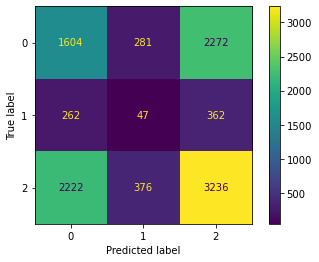

In [74]:
dummy = DummyClassifier(random_state=42)
dummy.fit(X_train, y_train)
print(dummy.score(X_test, y_test))

plot_confusion_matrix(dummy, X_test, y_test);

### Logistic Regression

Test data model score:
 The accuracy score is: 0.7504
 The recall score is: 0.7504
 The F1 score is: 0.7275
 The precision score is: 0.7384
 The cross validation score of accuracy is: 0.7491


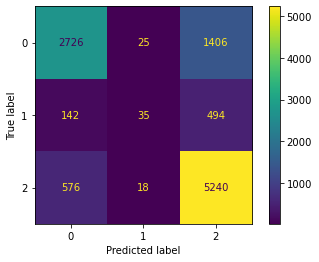

In [75]:
pipe_lr = Pipeline([('ss', StandardScaler()), 
                    ('lr', LogisticRegression())])
pipe_lr.fit(X_train, y_train)
test_preds = pipe_lr.predict(X_test)

print("Test data model score:")
lr_score = model_score(pipe_lr, X_test, test_preds, y_test)

### K Neighbors

In [ ]:
knn = KNeighborsClassifier()
grid = {
    'n_neighbors' : [5, 10, 15, 20, 25, 40]
}

#knn_grid_search = GridSearchCV(knn, grid, cv=3)
#knn_grid_search.fit(X_train, y_train)

#knn_grid_search.best_params_

In [ ]:
knn = KNeighborsClassifier()
grid = {
    'n_neighbors' : [7, 8, 9, 10, 11, 12, 13]
}

#knn_grid_search = GridSearchCV(knn, grid, cv=3)
#knn_grid_search.fit(X_train, y_train)

#knn_grid_search.best_params_

Test data model score:
 The accuracy score is: 0.7603
 The recall score is: 0.7603
 The F1 score is: 0.7512
 The precision score is: 0.7493
 The cross validation score of accuracy is: 0.7136


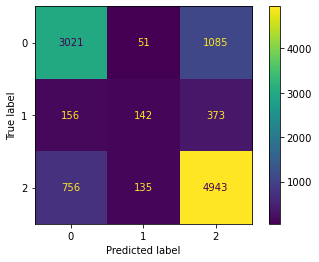

In [76]:
pipe_knn = Pipeline([('ss', StandardScaler()), 
                    ('knn', KNeighborsClassifier(n_neighbors=9))])
pipe_knn.fit(X_train, y_train)
test_preds = pipe_knn.predict(X_test)

print("Test data model score:")
knn_score = model_score(pipe_knn, X_test, test_preds, y_test)

In [88]:
# Check for training and test sets
# Predict on training and test sets
training_preds = pipe_knn.predict(X_train)
test_preds = pipe_knn.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 80.23%
Validation accuracy: 76.03%


### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt_grid = {
    'criterion' : ['entropy', 'gini'],
    'max_depth': [10, 20, 30, 40, 50, 60, None],
    'min_samples_split' : [1, 2, 5, 10, 20, 30],
    'min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_impurity_split' : [None, 0.1, 0.2, 0.3, 0.4, 0.5],
}

#dt_tree = GridSearchCV(estimator=dt, param_grid=dt_grid, cv=5)
#dt_tree.fit(X_train, y_train)

#print(f'Best parameters are {dt_tree.best_params_}')
#print(f'Best score {dt_tree.best_score_}')  #0.768565112
#print(f'Best estimator score {dt_tree.best_estimator_.score(X_test, y_test)}')  #0.779309697

Test data model score:
 The accuracy score is: 0.7799
 The recall score is: 0.7799
 The F1 score is: 0.7746
 The precision score is: 0.7724
 The cross validation score of accuracy is: 0.7383


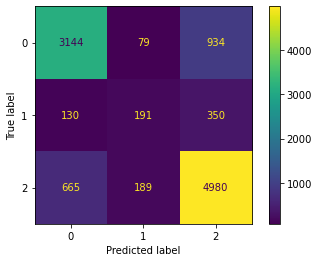

In [79]:
pipe_dt = Pipeline([('ss', StandardScaler()), 
                    ('dt', DecisionTreeClassifier(criterion='gini', max_depth=20, min_impurity_split=0.2, 
                                                  min_samples_split=2))])
pipe_dt.fit(X_train, y_train)
test_preds = pipe_dt.predict(X_test)

print("Test data model score:")
dt_score = model_score(pipe_dt, X_test, test_preds, y_test)

In [92]:
# Predict on training and test sets
training_preds = pipe_dt.predict(X_train)
test_preds = pipe_dt.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 89.28%
Validation accuracy: 77.99%


#### Function to plot feature importances

In [99]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,25))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

#### Decision Tree Feature Importances

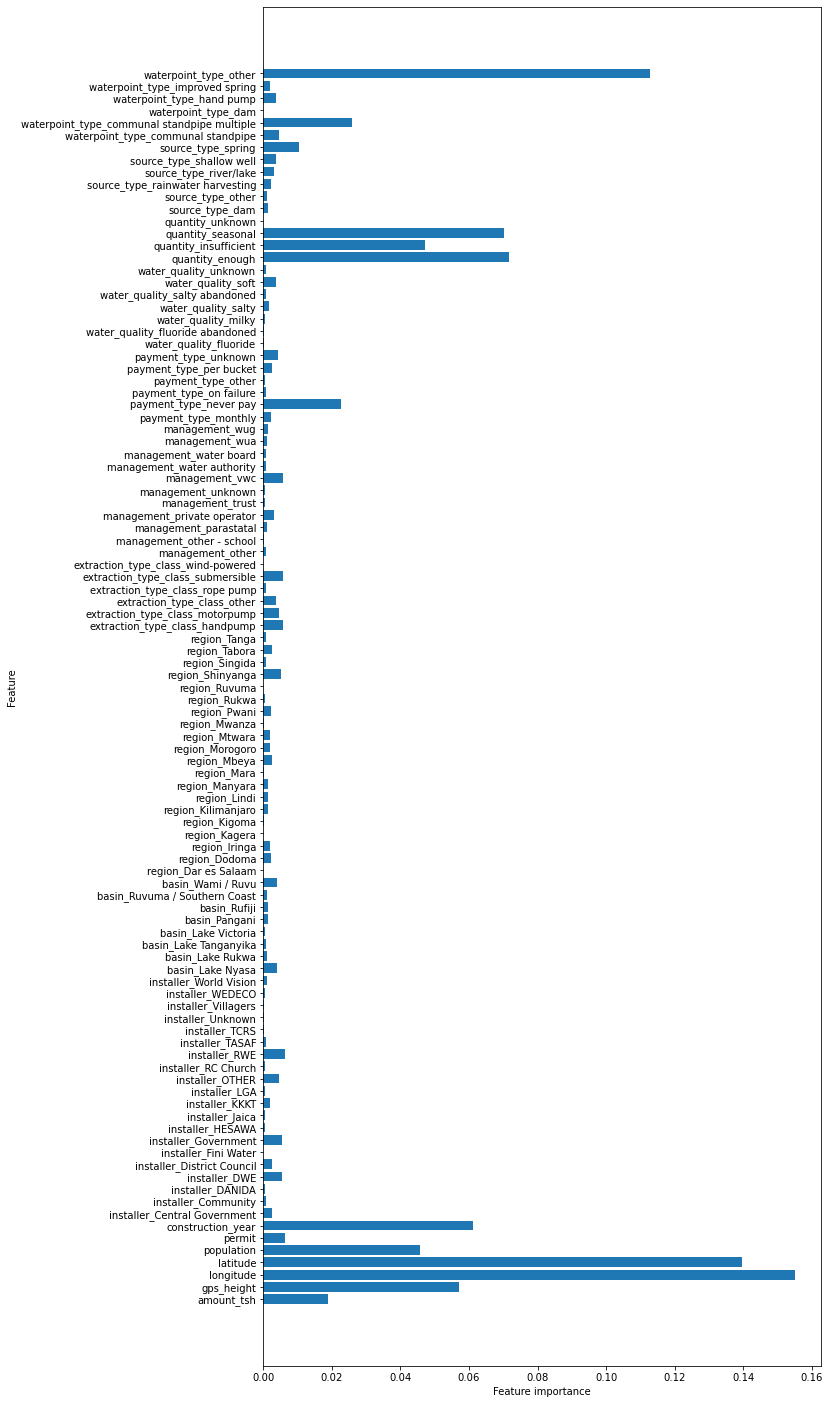

In [100]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=20, min_impurity_split=0.2, min_samples_split=2) 
tree_clf.fit(X_train, y_train)

plot_feature_importances(tree_clf)

### Random Forests

In [80]:
#Instantiate RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

#scores on folds
scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=5)
print(np.mean(scores))

#scores on on test
score = forest.score(X_test, y_test)
print(score)

# grid search on random forest

#grid = {
#    'criterion' : ['entropy', 'gini'],
#    'max_depth': [5,10,15,20, None],
#    'min_impurity_decrease' : [0.0, 0.1, 0.2, 0.3,0.4, 0.5], #values selected based on gini   
#    'min_impurity_split' : [None, 0.1, 0.2, 0.3, 0.4, 0.5], #values selected based on gini
#}
#gs_forest = GridSearchCV(estimator=forest, param_grid=grid, cv=5)
#gs_forest.fit(X_train, y_train)

#print(f'Best parameters are {gs_forest.best_params_}')
#print(f'Best score {gs_forest.best_score_}')
#print(f'Best estimator score {gs_forest.best_estimator_.score(X_test, y_test)}')

0.6932494460317925
0.6998686925529919


Test data model score:
 The accuracy score is: 0.8119
 The recall score is: 0.8119
 The F1 score is: 0.8015
 The precision score is: 0.8058
 The cross validation score of accuracy is: 0.7802


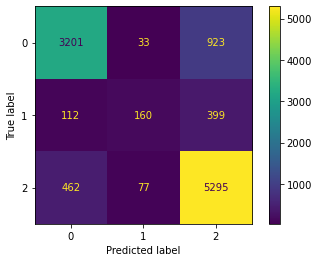

In [81]:
# Make pipeline
pipe_rf = Pipeline([('ss', StandardScaler()), 
                    ('RF', RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=20, min_impurity_split=0.1))])
pipe_rf.fit(X_train, y_train)
test_preds = pipe_rf.predict(X_test)

# Print metrics
print("Test data model score:")
rf_score = model_score(pipe_rf, X_test, test_preds, y_test)

In [94]:
# Predict on training and test sets
training_preds = pipe_rf.predict(X_train)
test_preds = pipe_rf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 93.2%
Validation accuracy: 81.19%


#### Random Forests Feature Importances

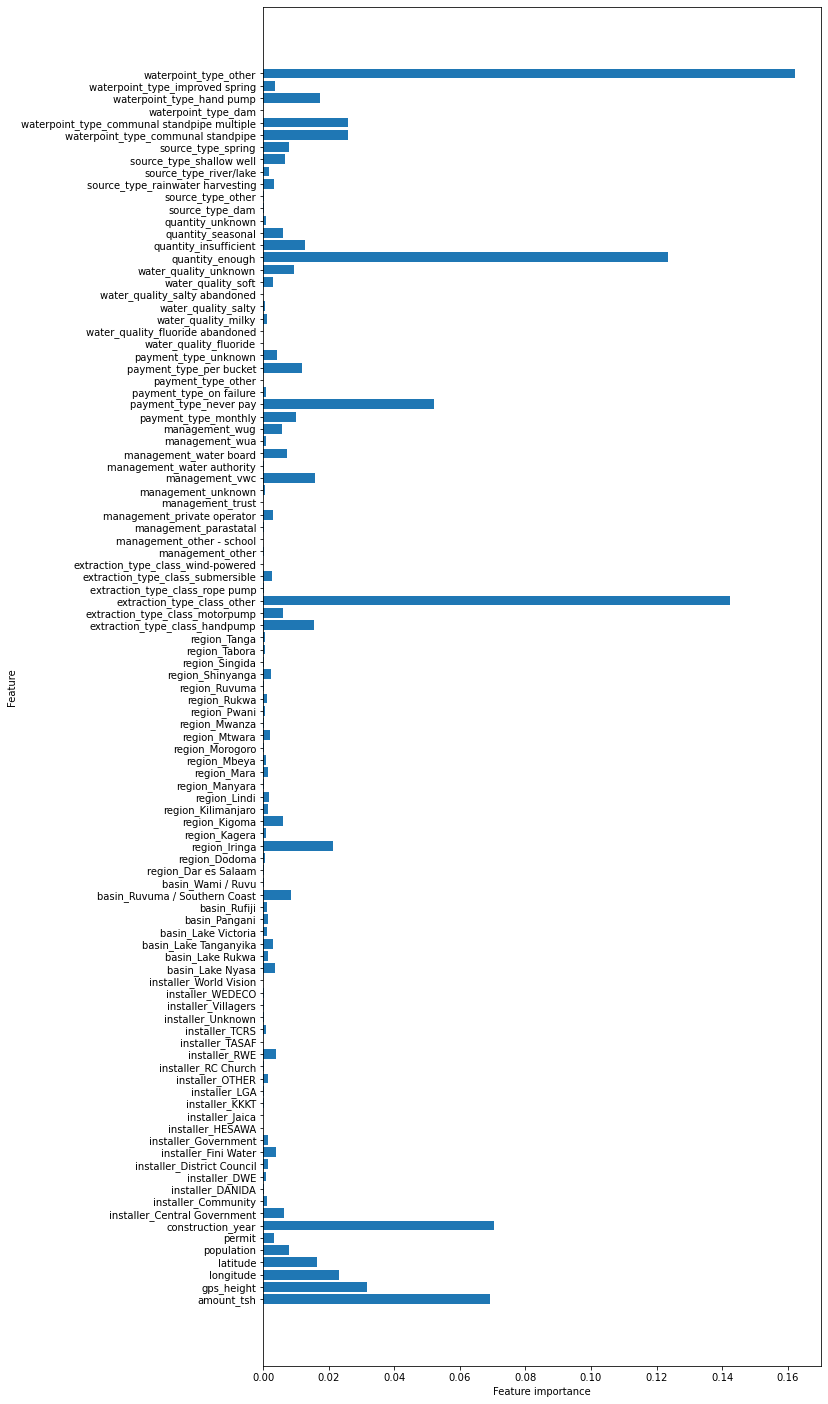

In [97]:
plot_feature_importances(forest)

### XG Boost

In [82]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train, y_train)

print("Test data model score:")
xgb_model_score = model_score(xgb, X_test, test_preds, y_test)

Training Accuracy: 84.46%
Validation accuracy: 80.41%


In [84]:
xgb = XGBClassifier()
grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100, 250, 500],
}

#gs_xgb = GridSearchCV(estimator=xgb, param_grid=grid, cv=5)
#gs_xgb.fit(X_train, y_train)

#print(f'Best parameters are {gs_xgb.best_params_}')
#print(f'Best score {gs_xgb.best_score_}')  
#print(f'Best estimator score {gs_xgb.best_estimator_.score(X_test, y_test)}')  

Best parameters are {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 250, 'subsample': 0.7}
Best score 0.8085446178591844
Best estimator score 0.8177640217595198


Test data model score:
 The accuracy score is: 0.8178
 The recall score is: 0.8178
 The F1 score is: 0.8091
 The precision score is: 0.8122
 The cross validation score of accuracy is: 0.7817


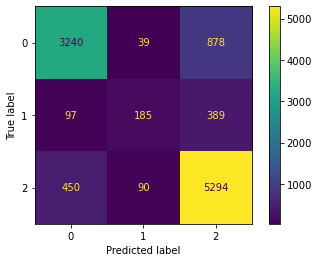

In [137]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=2,
                   n_estimators=250, subsample=0.7)
xgb.fit(X_train, y_train)
test_preds = xgb.predict(X_test)

print("Test data model score:")
dt_score = model_score(xgb, X_test, test_preds, y_test)

In [95]:
# Predict on training and test sets
training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 92.5%
Validation accuracy: 81.78%


#### XGB Feature Importances 

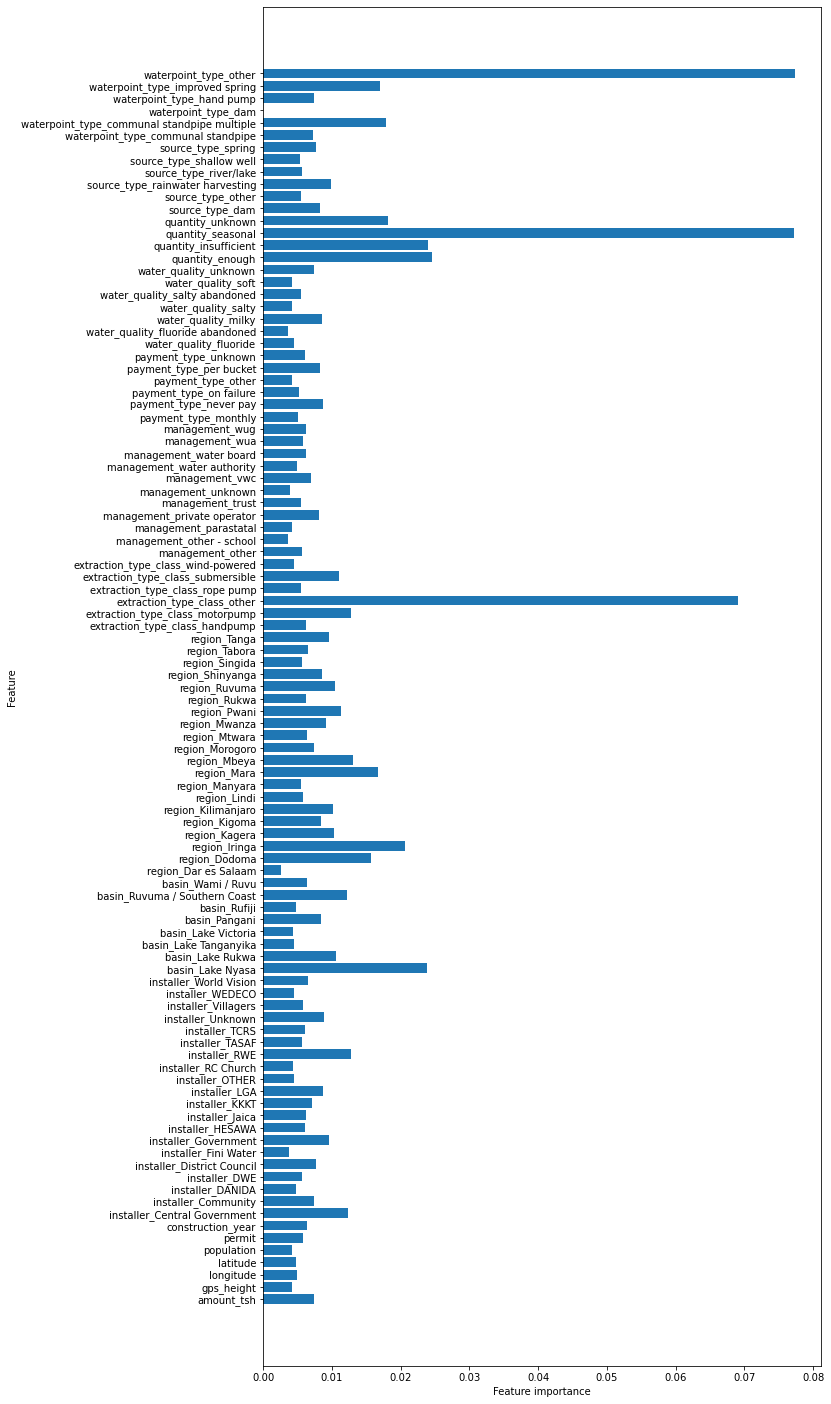

In [102]:
plot_feature_importances(xgb)

#### SMOTE and XGBoost

In [106]:
# Apply SMOTE oversampling 

oversample = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_smote.value_counts())

2    23192
0    16672
1     2783
Name: status, dtype: int64
2    23192
1    23192
0    23192
Name: status, dtype: int64


Test data model score:
 The accuracy score is: 0.7977
 The recall score is: 0.7977
 The F1 score is: 0.7981
 The precision score is: 0.7995
 The cross validation score of accuracy is: 0.7817


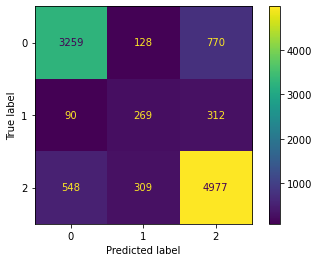

In [108]:
xgb_smote = XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=2,
                   n_estimators=250, subsample=0.7)
xgb_smote.fit(X_train_smote, y_train_smote)
test_preds = xgb_smote.predict(X_test)

print("Test data model score:")
dt_score = model_score(xgb_smote, X_test, test_preds, y_test)

In [111]:
# Predict on training and test sets
training_preds = xgb_smote.predict(X_train)
test_preds = xgb_smote.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 91.75%
Validation accuracy: 79.77%


### ROC AUC Analysis

In [138]:
y_binary_test = label_binarize(y_test, classes=[0, 1, 2])

dt_model_pred_proba = pipe_dt.predict_proba(X_test)
rf_model_pred_proba = pipe_rf.predict_proba(X_test)
knn_model_pred_proba = pipe_knn.predict_proba(X_test)
log_model_pred_proba = pipe_lr.predict_proba(X_test)
dummy_model_pred_proba = dummy.predict_proba(X_test)
xgb_model_pred_proba = xgb.predict_proba(X_test)

dt_test = roc_auc_score(y_binary_test, dt_model_pred_proba, multi_class='ovr')
rf_auc = roc_auc_score(y_binary_test, rf_model_pred_proba, multi_class='ovr')
knn_auc = roc_auc_score(y_binary_test, knn_model_pred_proba, multi_class='ovr')
log_model_auc = roc_auc_score(y_binary_test, log_model_pred_proba, multi_class='ovr')
dummy_auc = roc_auc_score(y_binary_test, dummy_model_pred_proba, multi_class='ovr')
xgb_auc = roc_auc_score(y_binary_test, xgb_model_pred_proba, multi_class='ovr')

print(f'The AUC score for our baseline model is: {round(dummy_auc, 4)}')
print(f'The AUC score for our decision tree model is: {round(dt_test, 4)}')
print(f'The AUC score for our random forest model is: {round(rf_auc, 4)}')
print(f'The AUC score for our k nearest neighbor model is: {round(knn_auc, 4)}')      
print(f'The AUC score for our logistic regression model is: {round(log_model_auc, 4)}')
print(f'The AUC score for our XG Boost model is: {round(xgb_auc, 4)}')

The AUC score for our baseline model is: 0.5029
The AUC score for our decision tree model is: 0.7686
The AUC score for our random forest model is: 0.8997
The AUC score for our k nearest neighbor model is: 0.8503
The AUC score for our logistic regression model is: 0.8315
The AUC score for our XG Boost model is: 0.9045


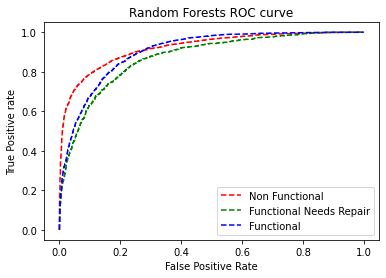

In [145]:
fig, ax = plt.subplots()

n_class = 3

fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, rf_model_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Non Functional')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Functional Needs Repair')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Functional')
plt.title('Random Forests ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best'); 

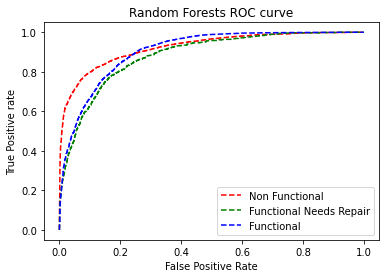

In [146]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, xgb_model_pred_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Non Functional')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Functional Needs Repair')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Functional')
plt.title('Random Forests ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best'); 

## Conclusions

Multiple linear regression analysis was used to build a model to predict housing prices in King County, WA. After 4 iterations from our baseline model, the results of the final regression model (Model D) indicated that 83 predictors explained 85.2% of the variance in the dataset(R2= 0.852). The RMSE of the final model was $108,603.30, which is the error in our price prediction. Difference between train and test set metrics showed that our model was not overfitted or underfitted.  All of the independent variables used in the model were significant predictors of sale price with p-values less than 0.05.

Following are features that have the most positive effect on sale price:

* For every 1 square foot of living space, the price is increased by 0.03%.
* Location is 2nd highest indicator of price. Our top 10 zipcodes (98039, 98004, 98112, 98109, 98119, 98102, 98105, 98040, 98199, 98107) were 142 to 281% higher in price than our baseline zipcode of 98001.

Following are features that have the most negative impact on sale price:
* Homes with a basement decreases the price by 6.11%.
* Homes with 3 floors decreases the price by 7.49%.  More floors is less desirable.

Following are some other notable conclusions:

* Price for homes with a waterfront are 64.5% higher than homes without a waterfront.
* Homes that have been renovated in the last 30 years will increase the price by 8.40%.
* Homes with a view rated as 4 (highest rating- i.e. Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, etc) increase the price by 45.59%.

Future work to improve on this model would be to make multiple models in different price ranges (i.e. 100k - 500k, 500k - 1 million, etc). Our model has limitations due to the wide range of prices in the dataset such as an error of $108,000 in predicting the price.  Another interesting extension to this project for future work is adding school districts grade into the model.